In [136]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.applications import VGG16
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils import np_utils

In [137]:
def create_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [138]:
create_dir('../Data')
create_dir('../Data/Logs')
create_dir('../Data/Human')
create_dir('../Data/Dataframes')
create_dir('../Data/Bottleneck_Features')

In [139]:
human_angry = glob.glob("../Data/Human/Training/Angry/*")
#human_angry.remove('../Data/Human/Angry\\Thumbs.db')
print("Number of images in Angry emotion = "+str(len(human_angry)))

Number of images in Angry emotion = 3995


In [140]:
human_angry_folderName = [os.path.split(i)[0]+'/' for i in human_angry]
human_angry_imageName = [os.path.split(i)[1] for i in human_angry]
human_angry_emotion = [["Angry"]*len(human_angry)][0]
human_angry_label = [1]*len(human_angry)
len(human_angry_folderName), len(human_angry_imageName), len(human_angry_emotion), len(human_angry_label)

(3995, 3995, 3995, 3995)

In [141]:
df_angry = pd.DataFrame()
df_angry["folderName"] = human_angry_folderName
df_angry["imageName"] = human_angry_imageName
df_angry["Emotion"] = human_angry_emotion
df_angry["Labels"] = human_angry_label
df_angry.head()

folderName              imageName Emotion  Labels
0  ../Data/Human/Training/Angry/  Training_10005289.jpg   Angry       1
1  ../Data/Human/Training/Angry/  Training_10031442.jpg   Angry       1
2  ../Data/Human/Training/Angry/  Training_10054582.jpg   Angry       1
3  ../Data/Human/Training/Angry/  Training_10058163.jpg   Angry       1
4  ../Data/Human/Training/Angry/  Training_10066339.jpg   Angry       1

In [142]:
human_disgust = glob.glob("../Data/Human/Training/Disgust/*")
#human_disgust.remove('../Data/Human/Disgust\\Thumbs.db')
print("Number of images in Disgust emotion = "+str(len(human_disgust)))

Number of images in Disgust emotion = 436


In [143]:
human_disgust_folderName = [os.path.split(i)[0]+"/" for i in human_disgust]
human_disgust_imageName = [os.path.split(i)[1] for i in human_disgust]
human_disgust_emotion = [["Disgust"]*len(human_disgust)][0]
human_disgust_label = [2]*len(human_disgust)

len(human_disgust_folderName), len(human_disgust_imageName), len(human_disgust_emotion), len(human_disgust_label)

(436, 436, 436, 436)

In [144]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = human_disgust_folderName
df_disgust["imageName"] = human_disgust_imageName
df_disgust["Emotion"] = human_disgust_emotion
df_disgust["Labels"] = human_disgust_label
df_disgust.head()

folderName              imageName  Emotion  Labels
0  ../Data/Human/Training/Disgust/  Training_10143308.jpg  Disgust       2
1  ../Data/Human/Training/Disgust/  Training_10218024.jpg  Disgust       2
2  ../Data/Human/Training/Disgust/  Training_10580978.jpg  Disgust       2
3  ../Data/Human/Training/Disgust/  Training_10879814.jpg  Disgust       2
4  ../Data/Human/Training/Disgust/  Training_10887102.jpg  Disgust       2

In [145]:
human_fear = glob.glob("../Data/Human/Training/Fear/*")
#human_fear.remove('../Data/Human/Fear\\Thumbs.db')
print("Number of images in Fear emotion = "+str(len(human_fear)))

Number of images in Fear emotion = 4097


In [146]:
human_fear_folderName = [os.path.split(i)[0]+"/" for i in human_fear]
human_fear_imageName = [os.path.split(i)[1] for i in human_fear]
human_fear_emotion = [["Fear"]*len(human_fear)][0]
human_fear_label = [3]*len(human_fear)

len(human_fear_folderName), len(human_fear_imageName), len(human_fear_emotion), len(human_fear_label)

(4097, 4097, 4097, 4097)

In [147]:
df_fear = pd.DataFrame()
df_fear["folderName"] = human_fear_folderName
df_fear["imageName"] = human_fear_imageName
df_fear["Emotion"] = human_fear_emotion
df_fear["Labels"] = human_fear_label
df_fear.head()

folderName              imageName Emotion  Labels
0  ../Data/Human/Training/Fear/  Training_10009750.jpg    Fear       3
1  ../Data/Human/Training/Fear/   Training_1001335.jpg    Fear       3
2  ../Data/Human/Training/Fear/  Training_10037633.jpg    Fear       3
3  ../Data/Human/Training/Fear/  Training_10039030.jpg    Fear       3
4  ../Data/Human/Training/Fear/  Training_10060597.jpg    Fear       3

In [148]:
human_happy = glob.glob("../Data/Human/Training/Happy/*")
#human_happy.remove('../Data/Human/Happy\\Thumbs.db')
print("Number of images in Happy emotion = "+str(len(human_happy)))

Number of images in Happy emotion = 7215


In [149]:
human_happy_folderName = [os.path.split(i)[0]+"/" for i in human_happy]
human_happy_imageName = [os.path.split(i)[1] for i in human_happy]
human_happy_emotion = [["Happy"]*len(human_happy)][0]
human_happy_label = [4]*len(human_happy)

len(human_happy_folderName), len(human_happy_imageName), len(human_happy_emotion), len(human_happy_label)

(7215, 7215, 7215, 7215)

In [150]:
df_happy = pd.DataFrame()
df_happy["folderName"] = human_happy_folderName
df_happy["imageName"] = human_happy_imageName
df_happy["Emotion"] = human_happy_emotion
df_happy["Labels"] = human_happy_label
df_happy.head()

folderName              imageName Emotion  Labels
0  ../Data/Human/Training/Happy/  Training_10002375.jpg   Happy       4
1  ../Data/Human/Training/Happy/  Training_10007084.jpg   Happy       4
2  ../Data/Human/Training/Happy/  Training_10016482.jpg   Happy       4
3  ../Data/Human/Training/Happy/  Training_10025192.jpg   Happy       4
4  ../Data/Human/Training/Happy/  Training_10035698.jpg   Happy       4

In [151]:
human_neutral = glob.glob("../Data/Human/Training/Neutral/*")
#human_neutral.remove('../Data/Human/Neutral\\Thumbs.db')
print("Number of images in Neutral emotion = "+str(len(human_neutral)))

Number of images in Neutral emotion = 4965


In [152]:
human_neutral_folderName = [os.path.split(i)[0]+"/" for i in human_neutral]
human_neutral_imageName = [os.path.split(i)[1] for i in human_neutral]
human_neutral_emotion = [["Neutral"]*len(human_neutral)][0]
human_neutral_label = [5]*len(human_neutral)

len(human_neutral_folderName), len(human_neutral_imageName), len(human_neutral_emotion), len(human_neutral_label)

(4965, 4965, 4965, 4965)

In [153]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = human_neutral_folderName
df_neutral["imageName"] = human_neutral_imageName
df_neutral["Emotion"] = human_neutral_emotion
df_neutral["Labels"] = human_neutral_label
df_neutral.head()

folderName              imageName  Emotion  Labels
0  ../Data/Human/Training/Neutral/  Training_10000852.jpg  Neutral       5
1  ../Data/Human/Training/Neutral/  Training_10016182.jpg  Neutral       5
2  ../Data/Human/Training/Neutral/  Training_10020446.jpg  Neutral       5
3  ../Data/Human/Training/Neutral/  Training_10049486.jpg  Neutral       5
4  ../Data/Human/Training/Neutral/  Training_10062056.jpg  Neutral       5

In [154]:
human_sad = glob.glob("../Data/Human/Training/Sad/*")
#human_sad.remove('../Data/Human/Sad\\Thumbs.db')
print("Number of images in Sad emotion = "+str(len(human_sad)))

Number of images in Sad emotion = 4830


In [155]:
human_sad_folderName = [os.path.split(i)[0]+"/" for i in human_sad]
human_sad_imageName = [os.path.split(i)[1] for i in human_sad]
human_sad_emotion = [["Sad"]*len(human_sad)][0]
human_sad_label = [6]*len(human_sad)

len(human_sad_folderName), len(human_sad_imageName), len(human_sad_emotion), len(human_sad_label)

(4830, 4830, 4830, 4830)

In [156]:
df_sad = pd.DataFrame()
df_sad["folderName"] = human_sad_folderName
df_sad["imageName"] = human_sad_imageName
df_sad["Emotion"] = human_sad_emotion
df_sad["Labels"] = human_sad_label
df_sad.head()

folderName              imageName Emotion  Labels
0  ../Data/Human/Training/Sad/  Training_10005685.jpg     Sad       6
1  ../Data/Human/Training/Sad/  Training_10007585.jpg     Sad       6
2  ../Data/Human/Training/Sad/  Training_10007784.jpg     Sad       6
3  ../Data/Human/Training/Sad/  Training_10026516.jpg     Sad       6
4  ../Data/Human/Training/Sad/  Training_10026825.jpg     Sad       6

In [157]:
human_surprise = glob.glob("../Data/Human/Training/Surprise/*")
#human_surprise.remove('../Data/Human/Surprise\\Thumbs.db')
print("Number of images in Surprise emotion = "+str(len(human_surprise)))

Number of images in Surprise emotion = 3171


In [158]:
human_surprise_folderName = [os.path.split(i)[0]+"/" for i in human_surprise]
human_surprise_imageName = [os.path.split(i)[1] for i in human_surprise]
human_surprise_emotion = [["Surprise"]*len(human_surprise)][0]
human_surprise_label = [7]*len(human_surprise)

len(human_surprise_folderName), len(human_surprise_imageName), len(human_surprise_emotion), len(human_surprise_label)

(3171, 3171, 3171, 3171)

In [159]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = human_surprise_folderName
df_surprise["imageName"] = human_surprise_imageName
df_surprise["Emotion"] = human_surprise_emotion
df_surprise["Labels"] = human_surprise_label
df_surprise.head()

folderName              imageName   Emotion  Labels
0  ../Data/Human/Training/Surprise/  Training_10028140.jpg  Surprise       7
1  ../Data/Human/Training/Surprise/  Training_10080953.jpg  Surprise       7
2  ../Data/Human/Training/Surprise/  Training_10098353.jpg  Surprise       7
3  ../Data/Human/Training/Surprise/  Training_10219176.jpg  Surprise       7
4  ../Data/Human/Training/Surprise/  Training_10228951.jpg  Surprise       7

In [160]:
length = df_angry.shape[0] + df_disgust.shape[0] + df_fear.shape[0] + df_happy.shape[0] + df_neutral.shape[0] + df_sad.shape[0] + df_surprise.shape[0]
print("Total number of images in all the emotions = "+str(length))

Total number of images in all the emotions = 28709


In [161]:
frames = [df_angry, df_disgust, df_fear, df_happy, df_neutral, df_sad, df_surprise]
Final_human = pd.concat(frames)
Final_human.shape

(28709, 4)

In [162]:
Final_human.reset_index(inplace = True, drop = True)
Final_human = Final_human.sample(frac = 1.0)   #shuffling the dataframe
Final_human.reset_index(inplace = True, drop = True)
Final_human.head()

folderName              imageName  Emotion  Labels
0  ../Data/Human/Training/Neutral/  Training_69584259.jpg  Neutral       5
1      ../Data/Human/Training/Sad/  Training_75324226.jpg      Sad       6
2      ../Data/Human/Training/Sad/  Training_98264152.jpg      Sad       6
3     ../Data/Human/Training/Fear/   Training_2439095.jpg     Fear       3
4    ../Data/Human/Training/Angry/  Training_13819098.jpg    Angry       1

In [163]:
df_human_train_data, df_human_test = train_test_split(Final_human, stratify=Final_human["Labels"], test_size = 0.197860)
df_human_train, df_human_cv = train_test_split(df_human_train_data, stratify=df_human_train_data["Labels"], test_size = 0.166666)
df_human_train.shape, df_human_cv.shape, df_human_test.shape 

((19190, 4), (3838, 4), (5681, 4))

In [164]:
df_human_train.reset_index(inplace = True, drop = True)
df_human_train.to_pickle("../Data/Dataframes/Human/df_human_train.pkl")

df_human_cv.reset_index(inplace = True, drop = True)
df_human_cv.to_pickle("../Data/Dataframes/Human/df_human_cv.pkl")

df_human_test.reset_index(inplace = True, drop = True)
df_human_test.to_pickle("../Data/Dataframes/Human/df_human_test.pkl")

In [165]:
df_human_train = pd.read_pickle("../Data/Dataframes/Human/df_human_train.pkl")
df_human_train.head()

folderName              imageName  Emotion  Labels
0      ../Data/Human/Training/Sad/  Training_12147737.jpg      Sad       6
1    ../Data/Human/Training/Angry/  Training_10834950.jpg    Angry       1
2  ../Data/Human/Training/Disgust/   Training_2859156.jpg  Disgust       2
3     ../Data/Human/Training/Fear/  Training_28705300.jpg     Fear       3
4      ../Data/Human/Training/Sad/  Training_33834220.jpg      Sad       6

In [166]:
df_human_train.shape

(19190, 4)

In [167]:
df_human_cv = pd.read_pickle("../Data/Dataframes/Human/df_human_cv.pkl")
df_human_cv.head()

folderName              imageName  Emotion  Labels
0  ../Data/Human/Training/Neutral/   Training_1677267.jpg  Neutral       5
1    ../Data/Human/Training/Happy/  Training_81906597.jpg    Happy       4
2  ../Data/Human/Training/Neutral/   Training_1717023.jpg  Neutral       5
3    ../Data/Human/Training/Angry/  Training_62886098.jpg    Angry       1
4    ../Data/Human/Training/Angry/  Training_82650105.jpg    Angry       1

In [168]:
df_human_cv.shape

(3838, 4)

In [169]:
df_human_test = pd.read_pickle("../Data/Dataframes/Human/df_human_test.pkl")
df_human_test.head()

folderName              imageName  Emotion  Labels
0  ../Data/Human/Training/Disgust/  Training_85010566.jpg  Disgust       2
1     ../Data/Human/Training/Fear/  Training_63911856.jpg     Fear       3
2      ../Data/Human/Training/Sad/  Training_31650593.jpg      Sad       6
3      ../Data/Human/Training/Sad/  Training_82944413.jpg      Sad       6
4  ../Data/Human/Training/Neutral/  Training_23367083.jpg  Neutral       5

In [170]:
df_human_test.shape

(5681, 4)

In [171]:
df_temp_train = df_human_train.sort_values(by = "Labels", inplace = False)
df_temp_cv = df_human_cv.sort_values(by = "Labels", inplace = False)
df_temp_test = df_human_test.sort_values(by = "Labels", inplace = False)

TrainData_distribution = df_human_train["Emotion"].value_counts().sort_index()
CVData_distribution = df_human_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_human_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)

In [172]:
TrainData_distribution_sorted

[('Happy', 4823),
 ('Neutral', 3319),
 ('Sad', 3228),
 ('Fear', 2738),
 ('Angry', 2670),
 ('Surprise', 2120),
 ('Disgust', 292)]

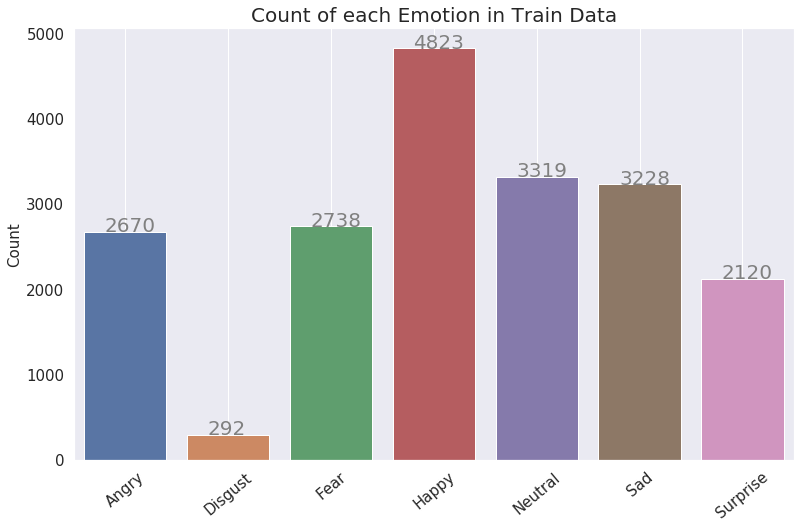

Number of training data points in class Happy = 4823(25.1329%)
Number of training data points in class Neutral = 3319(17.2955%)
Number of training data points in class Sad = 3228(16.8213%)
Number of training data points in class Fear = 2738(14.2678%)
Number of training data points in class Angry = 2670(13.9135%)
Number of training data points in class Surprise = 2120(11.0474%)
Number of training data points in class Disgust = 292(1.5216%)
--------------------------------------------------------------------------------


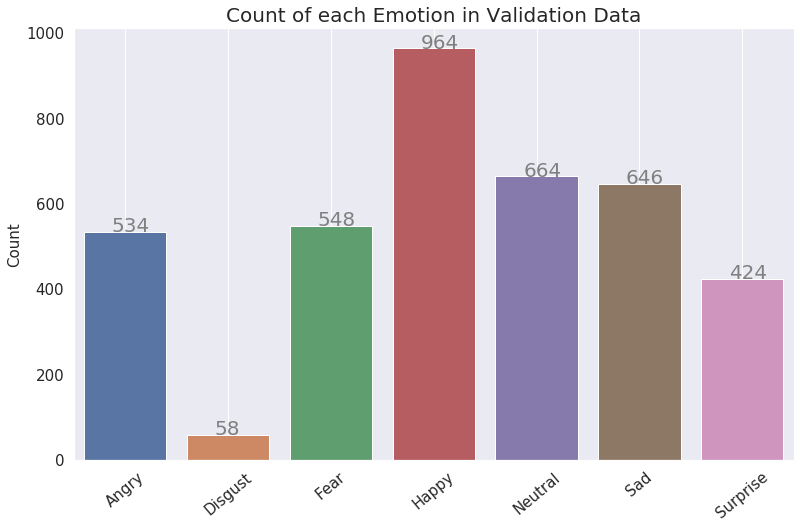

Number of training data points in class Happy = 964(25.1172%)
Number of training data points in class Neutral = 664(17.3007%)
Number of training data points in class Sad = 646(16.8317%)
Number of training data points in class Fear = 548(14.2783%)
Number of training data points in class Angry = 534(13.9135%)
Number of training data points in class Surprise = 424(11.0474%)
Number of training data points in class Disgust = 58(1.5112%)
--------------------------------------------------------------------------------


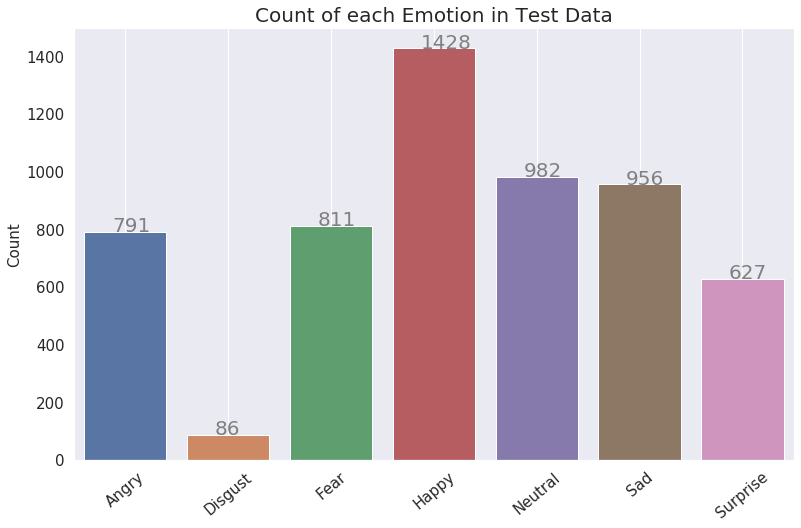

Number of training data points in class Happy = 1428(25.1364%)
Number of training data points in class Neutral = 982(17.2857%)
Number of training data points in class Sad = 956(16.828%)
Number of training data points in class Fear = 811(14.2757%)
Number of training data points in class Angry = 791(13.9236%)
Number of training data points in class Surprise = 627(11.0368%)
Number of training data points in class Disgust = 86(1.5138%)


In [173]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_test.shape[0])*100), 4))+"%)")

In [174]:
# def convt_to_gray(df):
#     count = 0
#     for i in range(len(df)):
#         path1 = df["folderName"][i]
#         path2 = df["imageName"][i]
#         img = cv2.imread(os.path.join(path1, path2))
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         cv2.imwrite(os.path.join(path1, path2), gray)
#         count += 1
#     print("Total number of images converted and saved = "+str(count))

In [175]:
# convt_to_gray(df_human_train)

In [176]:
# convt_to_gray(df_human_cv)

In [177]:
# convt_to_gray(df_human_test)

In [178]:
# #detect the face in image using HAAR cascade then crop it then resize it and finally save it.
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
# #download this xml file from link: https://github.com/opencv/opencv/tree/master/data/haarcascades.
# def face_det_crop_resize(img_path):
#     img = cv2.imread(img_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
#     for (x,y,w,h) in faces:
#         face_clip = img[y:y+h, x:x+w]  #cropping the face in image
#         cv2.imwrite(img_path, cv2.resize(face_clip, (48, 48)))  #resizing image then saving it

In [179]:
# for i, d in df_human_train.iterrows():
#     img_path = os.path.join(d["folderName"], d["imageName"])
#     face_det_crop_resize(img_path)

In [180]:
# for i, d in df_human_cv.iterrows():
#     img_path = os.path.join(d["folderName"], d["imageName"])
#     face_det_crop_resize(img_path)

In [181]:
# for i, d in df_human_test.iterrows():
#     img_path = os.path.join(d["folderName"], d["imageName"])
#     face_det_crop_resize(img_path)

In [182]:
combined_train = df_human_train
combined_train.shape

(19190, 4)

In [183]:
combined_train = combined_train.sample(frac = 1.0)  #shuffling the dataframe
combined_train.reset_index(inplace = True, drop = True)
combined_train.to_pickle("../Data/Dataframes/combined_train.pkl")

In [184]:
Train_Combined = pd.read_pickle("../Data/Dataframes/combined_train.pkl")
CV_Humans = pd.read_pickle("../Data/Dataframes/Human/df_human_cv.pkl")
Test_Humans = pd.read_pickle("../Data/Dataframes/Human/df_human_test.pkl")

Train_Combined.shape, CV_Humans.shape, Test_Humans.shape

((19190, 4), (3838, 4), (5681, 4))

In [185]:
TrainCombined_batch_pointer = 0
CVHumans_batch_pointer = 0
CVAnimated_batch_pointer = 0
TestHumans_batch_pointer = 0
TestAnimated_batch_pointer = 0

In [186]:
TrainCombined_Labels = pd.get_dummies(Train_Combined["Labels"]).as_matrix()
TrainCombined_Labels.shape

/home/ke/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(19190, 7)

In [187]:
def loadCombinedTrainBatch(batch_size):
    global TrainCombined_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["folderName"]
        path2 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TrainCombined_Labels[TrainCombined_batch_pointer + i]) #appending corresponding labels
        
    TrainCombined_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [188]:
#creating bottleneck features for train data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"
create_dir(SAVEDIR)
create_dir(SAVEDIR_LABELS)
batch_size = 10
for i in range(int(len(Train_Combined)/batch_size)):
    x, y = loadCombinedTrainBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

Bottleneck features for batch 76 created and saved

Batch 77 loaded
Creating bottleneck features for batch 77
Bottleneck features for batch 77 created and saved

Batch 78 loaded
Creating bottleneck features for batch 78
Bottleneck features for batch 78 created and saved

Batch 79 loaded
Creating bottleneck features for batch 79
Bottleneck features for batch 79 created and saved

Batch 80 loaded
Creating bottleneck features for batch 80
Bottleneck features for batch 80 created and saved

Batch 81 loaded
Creating bottleneck features for batch 81
Bottleneck features for batch 81 created and saved

Batch 82 loaded
Creating bottleneck features for batch 82
Bottleneck features for batch 82 created and saved

Batch 83 loaded
Creating bottleneck features for batch 83
Bottleneck features for batch 83 created and saved

Batch 84 loaded
Creating bottleneck features for batch 84
Bottleneck features for batch 84 created and saved

Batch 85 loaded
Creating bottleneck features for batch 85
Bottleneck

Bottleneck features for batch 150 created and saved

Batch 151 loaded
Creating bottleneck features for batch 151
Bottleneck features for batch 151 created and saved

Batch 152 loaded
Creating bottleneck features for batch 152
Bottleneck features for batch 152 created and saved

Batch 153 loaded
Creating bottleneck features for batch 153
Bottleneck features for batch 153 created and saved

Batch 154 loaded
Creating bottleneck features for batch 154
Bottleneck features for batch 154 created and saved

Batch 155 loaded
Creating bottleneck features for batch 155
Bottleneck features for batch 155 created and saved

Batch 156 loaded
Creating bottleneck features for batch 156
Bottleneck features for batch 156 created and saved

Batch 157 loaded
Creating bottleneck features for batch 157
Bottleneck features for batch 157 created and saved

Batch 158 loaded
Creating bottleneck features for batch 158
Bottleneck features for batch 158 created and saved

Batch 159 loaded
Creating bottleneck featur

Bottleneck features for batch 223 created and saved

Batch 224 loaded
Creating bottleneck features for batch 224
Bottleneck features for batch 224 created and saved

Batch 225 loaded
Creating bottleneck features for batch 225
Bottleneck features for batch 225 created and saved

Batch 226 loaded
Creating bottleneck features for batch 226
Bottleneck features for batch 226 created and saved

Batch 227 loaded
Creating bottleneck features for batch 227
Bottleneck features for batch 227 created and saved

Batch 228 loaded
Creating bottleneck features for batch 228
Bottleneck features for batch 228 created and saved

Batch 229 loaded
Creating bottleneck features for batch 229
Bottleneck features for batch 229 created and saved

Batch 230 loaded
Creating bottleneck features for batch 230
Bottleneck features for batch 230 created and saved

Batch 231 loaded
Creating bottleneck features for batch 231
Bottleneck features for batch 231 created and saved

Batch 232 loaded
Creating bottleneck featur

Bottleneck features for batch 296 created and saved

Batch 297 loaded
Creating bottleneck features for batch 297
Bottleneck features for batch 297 created and saved

Batch 298 loaded
Creating bottleneck features for batch 298
Bottleneck features for batch 298 created and saved

Batch 299 loaded
Creating bottleneck features for batch 299
Bottleneck features for batch 299 created and saved

Batch 300 loaded
Creating bottleneck features for batch 300
Bottleneck features for batch 300 created and saved

Batch 301 loaded
Creating bottleneck features for batch 301
Bottleneck features for batch 301 created and saved

Batch 302 loaded
Creating bottleneck features for batch 302
Bottleneck features for batch 302 created and saved

Batch 303 loaded
Creating bottleneck features for batch 303
Bottleneck features for batch 303 created and saved

Batch 304 loaded
Creating bottleneck features for batch 304
Bottleneck features for batch 304 created and saved

Batch 305 loaded
Creating bottleneck featur

Bottleneck features for batch 369 created and saved

Batch 370 loaded
Creating bottleneck features for batch 370
Bottleneck features for batch 370 created and saved

Batch 371 loaded
Creating bottleneck features for batch 371
Bottleneck features for batch 371 created and saved

Batch 372 loaded
Creating bottleneck features for batch 372
Bottleneck features for batch 372 created and saved

Batch 373 loaded
Creating bottleneck features for batch 373
Bottleneck features for batch 373 created and saved

Batch 374 loaded
Creating bottleneck features for batch 374
Bottleneck features for batch 374 created and saved

Batch 375 loaded
Creating bottleneck features for batch 375
Bottleneck features for batch 375 created and saved

Batch 376 loaded
Creating bottleneck features for batch 376
Bottleneck features for batch 376 created and saved

Batch 377 loaded
Creating bottleneck features for batch 377
Bottleneck features for batch 377 created and saved

Batch 378 loaded
Creating bottleneck featur

Bottleneck features for batch 442 created and saved

Batch 443 loaded
Creating bottleneck features for batch 443
Bottleneck features for batch 443 created and saved

Batch 444 loaded
Creating bottleneck features for batch 444
Bottleneck features for batch 444 created and saved

Batch 445 loaded
Creating bottleneck features for batch 445
Bottleneck features for batch 445 created and saved

Batch 446 loaded
Creating bottleneck features for batch 446
Bottleneck features for batch 446 created and saved

Batch 447 loaded
Creating bottleneck features for batch 447
Bottleneck features for batch 447 created and saved

Batch 448 loaded
Creating bottleneck features for batch 448
Bottleneck features for batch 448 created and saved

Batch 449 loaded
Creating bottleneck features for batch 449
Bottleneck features for batch 449 created and saved

Batch 450 loaded
Creating bottleneck features for batch 450
Bottleneck features for batch 450 created and saved

Batch 451 loaded
Creating bottleneck featur

Bottleneck features for batch 515 created and saved

Batch 516 loaded
Creating bottleneck features for batch 516
Bottleneck features for batch 516 created and saved

Batch 517 loaded
Creating bottleneck features for batch 517
Bottleneck features for batch 517 created and saved

Batch 518 loaded
Creating bottleneck features for batch 518
Bottleneck features for batch 518 created and saved

Batch 519 loaded
Creating bottleneck features for batch 519
Bottleneck features for batch 519 created and saved

Batch 520 loaded
Creating bottleneck features for batch 520
Bottleneck features for batch 520 created and saved

Batch 521 loaded
Creating bottleneck features for batch 521
Bottleneck features for batch 521 created and saved

Batch 522 loaded
Creating bottleneck features for batch 522
Bottleneck features for batch 522 created and saved

Batch 523 loaded
Creating bottleneck features for batch 523
Bottleneck features for batch 523 created and saved

Batch 524 loaded
Creating bottleneck featur

Bottleneck features for batch 588 created and saved

Batch 589 loaded
Creating bottleneck features for batch 589
Bottleneck features for batch 589 created and saved

Batch 590 loaded
Creating bottleneck features for batch 590
Bottleneck features for batch 590 created and saved

Batch 591 loaded
Creating bottleneck features for batch 591
Bottleneck features for batch 591 created and saved

Batch 592 loaded
Creating bottleneck features for batch 592
Bottleneck features for batch 592 created and saved

Batch 593 loaded
Creating bottleneck features for batch 593
Bottleneck features for batch 593 created and saved

Batch 594 loaded
Creating bottleneck features for batch 594
Bottleneck features for batch 594 created and saved

Batch 595 loaded
Creating bottleneck features for batch 595
Bottleneck features for batch 595 created and saved

Batch 596 loaded
Creating bottleneck features for batch 596
Bottleneck features for batch 596 created and saved

Batch 597 loaded
Creating bottleneck featur

Bottleneck features for batch 661 created and saved

Batch 662 loaded
Creating bottleneck features for batch 662
Bottleneck features for batch 662 created and saved

Batch 663 loaded
Creating bottleneck features for batch 663
Bottleneck features for batch 663 created and saved

Batch 664 loaded
Creating bottleneck features for batch 664
Bottleneck features for batch 664 created and saved

Batch 665 loaded
Creating bottleneck features for batch 665
Bottleneck features for batch 665 created and saved

Batch 666 loaded
Creating bottleneck features for batch 666
Bottleneck features for batch 666 created and saved

Batch 667 loaded
Creating bottleneck features for batch 667
Bottleneck features for batch 667 created and saved

Batch 668 loaded
Creating bottleneck features for batch 668
Bottleneck features for batch 668 created and saved

Batch 669 loaded
Creating bottleneck features for batch 669
Bottleneck features for batch 669 created and saved

Batch 670 loaded
Creating bottleneck featur

Bottleneck features for batch 734 created and saved

Batch 735 loaded
Creating bottleneck features for batch 735
Bottleneck features for batch 735 created and saved

Batch 736 loaded
Creating bottleneck features for batch 736
Bottleneck features for batch 736 created and saved

Batch 737 loaded
Creating bottleneck features for batch 737
Bottleneck features for batch 737 created and saved

Batch 738 loaded
Creating bottleneck features for batch 738
Bottleneck features for batch 738 created and saved

Batch 739 loaded
Creating bottleneck features for batch 739
Bottleneck features for batch 739 created and saved

Batch 740 loaded
Creating bottleneck features for batch 740
Bottleneck features for batch 740 created and saved

Batch 741 loaded
Creating bottleneck features for batch 741
Bottleneck features for batch 741 created and saved

Batch 742 loaded
Creating bottleneck features for batch 742
Bottleneck features for batch 742 created and saved

Batch 743 loaded
Creating bottleneck featur

Bottleneck features for batch 807 created and saved

Batch 808 loaded
Creating bottleneck features for batch 808
Bottleneck features for batch 808 created and saved

Batch 809 loaded
Creating bottleneck features for batch 809
Bottleneck features for batch 809 created and saved

Batch 810 loaded
Creating bottleneck features for batch 810
Bottleneck features for batch 810 created and saved

Batch 811 loaded
Creating bottleneck features for batch 811
Bottleneck features for batch 811 created and saved

Batch 812 loaded
Creating bottleneck features for batch 812
Bottleneck features for batch 812 created and saved

Batch 813 loaded
Creating bottleneck features for batch 813
Bottleneck features for batch 813 created and saved

Batch 814 loaded
Creating bottleneck features for batch 814
Bottleneck features for batch 814 created and saved

Batch 815 loaded
Creating bottleneck features for batch 815
Bottleneck features for batch 815 created and saved

Batch 816 loaded
Creating bottleneck featur

Bottleneck features for batch 880 created and saved

Batch 881 loaded
Creating bottleneck features for batch 881
Bottleneck features for batch 881 created and saved

Batch 882 loaded
Creating bottleneck features for batch 882
Bottleneck features for batch 882 created and saved

Batch 883 loaded
Creating bottleneck features for batch 883
Bottleneck features for batch 883 created and saved

Batch 884 loaded
Creating bottleneck features for batch 884
Bottleneck features for batch 884 created and saved

Batch 885 loaded
Creating bottleneck features for batch 885
Bottleneck features for batch 885 created and saved

Batch 886 loaded
Creating bottleneck features for batch 886
Bottleneck features for batch 886 created and saved

Batch 887 loaded
Creating bottleneck features for batch 887
Bottleneck features for batch 887 created and saved

Batch 888 loaded
Creating bottleneck features for batch 888
Bottleneck features for batch 888 created and saved

Batch 889 loaded
Creating bottleneck featur

Bottleneck features for batch 953 created and saved

Batch 954 loaded
Creating bottleneck features for batch 954
Bottleneck features for batch 954 created and saved

Batch 955 loaded
Creating bottleneck features for batch 955
Bottleneck features for batch 955 created and saved

Batch 956 loaded
Creating bottleneck features for batch 956
Bottleneck features for batch 956 created and saved

Batch 957 loaded
Creating bottleneck features for batch 957
Bottleneck features for batch 957 created and saved

Batch 958 loaded
Creating bottleneck features for batch 958
Bottleneck features for batch 958 created and saved

Batch 959 loaded
Creating bottleneck features for batch 959
Bottleneck features for batch 959 created and saved

Batch 960 loaded
Creating bottleneck features for batch 960
Bottleneck features for batch 960 created and saved

Batch 961 loaded
Creating bottleneck features for batch 961
Bottleneck features for batch 961 created and saved

Batch 962 loaded
Creating bottleneck featur

Bottleneck features for batch 1025 created and saved

Batch 1026 loaded
Creating bottleneck features for batch 1026
Bottleneck features for batch 1026 created and saved

Batch 1027 loaded
Creating bottleneck features for batch 1027
Bottleneck features for batch 1027 created and saved

Batch 1028 loaded
Creating bottleneck features for batch 1028
Bottleneck features for batch 1028 created and saved

Batch 1029 loaded
Creating bottleneck features for batch 1029
Bottleneck features for batch 1029 created and saved

Batch 1030 loaded
Creating bottleneck features for batch 1030
Bottleneck features for batch 1030 created and saved

Batch 1031 loaded
Creating bottleneck features for batch 1031
Bottleneck features for batch 1031 created and saved

Batch 1032 loaded
Creating bottleneck features for batch 1032
Bottleneck features for batch 1032 created and saved

Batch 1033 loaded
Creating bottleneck features for batch 1033
Bottleneck features for batch 1033 created and saved

Batch 1034 loaded


Bottleneck features for batch 1096 created and saved

Batch 1097 loaded
Creating bottleneck features for batch 1097
Bottleneck features for batch 1097 created and saved

Batch 1098 loaded
Creating bottleneck features for batch 1098
Bottleneck features for batch 1098 created and saved

Batch 1099 loaded
Creating bottleneck features for batch 1099
Bottleneck features for batch 1099 created and saved

Batch 1100 loaded
Creating bottleneck features for batch 1100
Bottleneck features for batch 1100 created and saved

Batch 1101 loaded
Creating bottleneck features for batch 1101
Bottleneck features for batch 1101 created and saved

Batch 1102 loaded
Creating bottleneck features for batch 1102
Bottleneck features for batch 1102 created and saved

Batch 1103 loaded
Creating bottleneck features for batch 1103
Bottleneck features for batch 1103 created and saved

Batch 1104 loaded
Creating bottleneck features for batch 1104
Bottleneck features for batch 1104 created and saved

Batch 1105 loaded


Bottleneck features for batch 1167 created and saved

Batch 1168 loaded
Creating bottleneck features for batch 1168
Bottleneck features for batch 1168 created and saved

Batch 1169 loaded
Creating bottleneck features for batch 1169
Bottleneck features for batch 1169 created and saved

Batch 1170 loaded
Creating bottleneck features for batch 1170
Bottleneck features for batch 1170 created and saved

Batch 1171 loaded
Creating bottleneck features for batch 1171
Bottleneck features for batch 1171 created and saved

Batch 1172 loaded
Creating bottleneck features for batch 1172
Bottleneck features for batch 1172 created and saved

Batch 1173 loaded
Creating bottleneck features for batch 1173
Bottleneck features for batch 1173 created and saved

Batch 1174 loaded
Creating bottleneck features for batch 1174
Bottleneck features for batch 1174 created and saved

Batch 1175 loaded
Creating bottleneck features for batch 1175
Bottleneck features for batch 1175 created and saved

Batch 1176 loaded


Bottleneck features for batch 1238 created and saved

Batch 1239 loaded
Creating bottleneck features for batch 1239
Bottleneck features for batch 1239 created and saved

Batch 1240 loaded
Creating bottleneck features for batch 1240
Bottleneck features for batch 1240 created and saved

Batch 1241 loaded
Creating bottleneck features for batch 1241
Bottleneck features for batch 1241 created and saved

Batch 1242 loaded
Creating bottleneck features for batch 1242
Bottleneck features for batch 1242 created and saved

Batch 1243 loaded
Creating bottleneck features for batch 1243
Bottleneck features for batch 1243 created and saved

Batch 1244 loaded
Creating bottleneck features for batch 1244
Bottleneck features for batch 1244 created and saved

Batch 1245 loaded
Creating bottleneck features for batch 1245
Bottleneck features for batch 1245 created and saved

Batch 1246 loaded
Creating bottleneck features for batch 1246
Bottleneck features for batch 1246 created and saved

Batch 1247 loaded


Bottleneck features for batch 1309 created and saved

Batch 1310 loaded
Creating bottleneck features for batch 1310
Bottleneck features for batch 1310 created and saved

Batch 1311 loaded
Creating bottleneck features for batch 1311
Bottleneck features for batch 1311 created and saved

Batch 1312 loaded
Creating bottleneck features for batch 1312
Bottleneck features for batch 1312 created and saved

Batch 1313 loaded
Creating bottleneck features for batch 1313
Bottleneck features for batch 1313 created and saved

Batch 1314 loaded
Creating bottleneck features for batch 1314
Bottleneck features for batch 1314 created and saved

Batch 1315 loaded
Creating bottleneck features for batch 1315
Bottleneck features for batch 1315 created and saved

Batch 1316 loaded
Creating bottleneck features for batch 1316
Bottleneck features for batch 1316 created and saved

Batch 1317 loaded
Creating bottleneck features for batch 1317
Bottleneck features for batch 1317 created and saved

Batch 1318 loaded


Bottleneck features for batch 1380 created and saved

Batch 1381 loaded
Creating bottleneck features for batch 1381
Bottleneck features for batch 1381 created and saved

Batch 1382 loaded
Creating bottleneck features for batch 1382
Bottleneck features for batch 1382 created and saved

Batch 1383 loaded
Creating bottleneck features for batch 1383
Bottleneck features for batch 1383 created and saved

Batch 1384 loaded
Creating bottleneck features for batch 1384
Bottleneck features for batch 1384 created and saved

Batch 1385 loaded
Creating bottleneck features for batch 1385
Bottleneck features for batch 1385 created and saved

Batch 1386 loaded
Creating bottleneck features for batch 1386
Bottleneck features for batch 1386 created and saved

Batch 1387 loaded
Creating bottleneck features for batch 1387
Bottleneck features for batch 1387 created and saved

Batch 1388 loaded
Creating bottleneck features for batch 1388
Bottleneck features for batch 1388 created and saved

Batch 1389 loaded


Bottleneck features for batch 1451 created and saved

Batch 1452 loaded
Creating bottleneck features for batch 1452
Bottleneck features for batch 1452 created and saved

Batch 1453 loaded
Creating bottleneck features for batch 1453
Bottleneck features for batch 1453 created and saved

Batch 1454 loaded
Creating bottleneck features for batch 1454
Bottleneck features for batch 1454 created and saved

Batch 1455 loaded
Creating bottleneck features for batch 1455
Bottleneck features for batch 1455 created and saved

Batch 1456 loaded
Creating bottleneck features for batch 1456
Bottleneck features for batch 1456 created and saved

Batch 1457 loaded
Creating bottleneck features for batch 1457
Bottleneck features for batch 1457 created and saved

Batch 1458 loaded
Creating bottleneck features for batch 1458
Bottleneck features for batch 1458 created and saved

Batch 1459 loaded
Creating bottleneck features for batch 1459
Bottleneck features for batch 1459 created and saved

Batch 1460 loaded


Bottleneck features for batch 1522 created and saved

Batch 1523 loaded
Creating bottleneck features for batch 1523
Bottleneck features for batch 1523 created and saved

Batch 1524 loaded
Creating bottleneck features for batch 1524
Bottleneck features for batch 1524 created and saved

Batch 1525 loaded
Creating bottleneck features for batch 1525
Bottleneck features for batch 1525 created and saved

Batch 1526 loaded
Creating bottleneck features for batch 1526
Bottleneck features for batch 1526 created and saved

Batch 1527 loaded
Creating bottleneck features for batch 1527
Bottleneck features for batch 1527 created and saved

Batch 1528 loaded
Creating bottleneck features for batch 1528
Bottleneck features for batch 1528 created and saved

Batch 1529 loaded
Creating bottleneck features for batch 1529
Bottleneck features for batch 1529 created and saved

Batch 1530 loaded
Creating bottleneck features for batch 1530
Bottleneck features for batch 1530 created and saved

Batch 1531 loaded


Bottleneck features for batch 1593 created and saved

Batch 1594 loaded
Creating bottleneck features for batch 1594
Bottleneck features for batch 1594 created and saved

Batch 1595 loaded
Creating bottleneck features for batch 1595
Bottleneck features for batch 1595 created and saved

Batch 1596 loaded
Creating bottleneck features for batch 1596
Bottleneck features for batch 1596 created and saved

Batch 1597 loaded
Creating bottleneck features for batch 1597
Bottleneck features for batch 1597 created and saved

Batch 1598 loaded
Creating bottleneck features for batch 1598
Bottleneck features for batch 1598 created and saved

Batch 1599 loaded
Creating bottleneck features for batch 1599
Bottleneck features for batch 1599 created and saved

Batch 1600 loaded
Creating bottleneck features for batch 1600
Bottleneck features for batch 1600 created and saved

Batch 1601 loaded
Creating bottleneck features for batch 1601
Bottleneck features for batch 1601 created and saved

Batch 1602 loaded


Bottleneck features for batch 1664 created and saved

Batch 1665 loaded
Creating bottleneck features for batch 1665
Bottleneck features for batch 1665 created and saved

Batch 1666 loaded
Creating bottleneck features for batch 1666
Bottleneck features for batch 1666 created and saved

Batch 1667 loaded
Creating bottleneck features for batch 1667
Bottleneck features for batch 1667 created and saved

Batch 1668 loaded
Creating bottleneck features for batch 1668
Bottleneck features for batch 1668 created and saved

Batch 1669 loaded
Creating bottleneck features for batch 1669
Bottleneck features for batch 1669 created and saved

Batch 1670 loaded
Creating bottleneck features for batch 1670
Bottleneck features for batch 1670 created and saved

Batch 1671 loaded
Creating bottleneck features for batch 1671
Bottleneck features for batch 1671 created and saved

Batch 1672 loaded
Creating bottleneck features for batch 1672
Bottleneck features for batch 1672 created and saved

Batch 1673 loaded


Bottleneck features for batch 1735 created and saved

Batch 1736 loaded
Creating bottleneck features for batch 1736
Bottleneck features for batch 1736 created and saved

Batch 1737 loaded
Creating bottleneck features for batch 1737
Bottleneck features for batch 1737 created and saved

Batch 1738 loaded
Creating bottleneck features for batch 1738
Bottleneck features for batch 1738 created and saved

Batch 1739 loaded
Creating bottleneck features for batch 1739
Bottleneck features for batch 1739 created and saved

Batch 1740 loaded
Creating bottleneck features for batch 1740
Bottleneck features for batch 1740 created and saved

Batch 1741 loaded
Creating bottleneck features for batch 1741
Bottleneck features for batch 1741 created and saved

Batch 1742 loaded
Creating bottleneck features for batch 1742
Bottleneck features for batch 1742 created and saved

Batch 1743 loaded
Creating bottleneck features for batch 1743
Bottleneck features for batch 1743 created and saved

Batch 1744 loaded


Bottleneck features for batch 1806 created and saved

Batch 1807 loaded
Creating bottleneck features for batch 1807
Bottleneck features for batch 1807 created and saved

Batch 1808 loaded
Creating bottleneck features for batch 1808
Bottleneck features for batch 1808 created and saved

Batch 1809 loaded
Creating bottleneck features for batch 1809
Bottleneck features for batch 1809 created and saved

Batch 1810 loaded
Creating bottleneck features for batch 1810
Bottleneck features for batch 1810 created and saved

Batch 1811 loaded
Creating bottleneck features for batch 1811
Bottleneck features for batch 1811 created and saved

Batch 1812 loaded
Creating bottleneck features for batch 1812
Bottleneck features for batch 1812 created and saved

Batch 1813 loaded
Creating bottleneck features for batch 1813
Bottleneck features for batch 1813 created and saved

Batch 1814 loaded
Creating bottleneck features for batch 1814
Bottleneck features for batch 1814 created and saved

Batch 1815 loaded


Bottleneck features for batch 1877 created and saved

Batch 1878 loaded
Creating bottleneck features for batch 1878
Bottleneck features for batch 1878 created and saved

Batch 1879 loaded
Creating bottleneck features for batch 1879
Bottleneck features for batch 1879 created and saved

Batch 1880 loaded
Creating bottleneck features for batch 1880
Bottleneck features for batch 1880 created and saved

Batch 1881 loaded
Creating bottleneck features for batch 1881
Bottleneck features for batch 1881 created and saved

Batch 1882 loaded
Creating bottleneck features for batch 1882
Bottleneck features for batch 1882 created and saved

Batch 1883 loaded
Creating bottleneck features for batch 1883
Bottleneck features for batch 1883 created and saved

Batch 1884 loaded
Creating bottleneck features for batch 1884
Bottleneck features for batch 1884 created and saved

Batch 1885 loaded
Creating bottleneck features for batch 1885
Bottleneck features for batch 1885 created and saved

Batch 1886 loaded


In [190]:
CVHumans_Labels = pd.get_dummies(CV_Humans["Labels"]).as_matrix()
CVHumans_Labels.shape

/home/ke/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(3838, 7)

In [191]:
def loadCVHumanBatch(batch_size):
    global CVHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = CV_Humans.iloc[CVHumans_batch_pointer + i]["folderName"]
        path2 = CV_Humans.iloc[CVHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(CVHumans_Labels[CVHumans_batch_pointer + i]) #appending corresponding labels
        
    CVHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [192]:
#creating bottleneck features for CV Human data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"
create_dir(SAVEDIR)
create_dir(SAVEDIR_LABELS)
batch_size = 10
for i in range(int(len(CV_Humans)/batch_size)):
    x, y = loadCVHumanBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

Bottleneck features for batch 76 created and saved

Batch 77 loaded
Creating bottleneck features for batch 77
Bottleneck features for batch 77 created and saved

Batch 78 loaded
Creating bottleneck features for batch 78
Bottleneck features for batch 78 created and saved

Batch 79 loaded
Creating bottleneck features for batch 79
Bottleneck features for batch 79 created and saved

Batch 80 loaded
Creating bottleneck features for batch 80
Bottleneck features for batch 80 created and saved

Batch 81 loaded
Creating bottleneck features for batch 81
Bottleneck features for batch 81 created and saved

Batch 82 loaded
Creating bottleneck features for batch 82
Bottleneck features for batch 82 created and saved

Batch 83 loaded
Creating bottleneck features for batch 83
Bottleneck features for batch 83 created and saved

Batch 84 loaded
Creating bottleneck features for batch 84
Bottleneck features for batch 84 created and saved

Batch 85 loaded
Creating bottleneck features for batch 85
Bottleneck

Bottleneck features for batch 150 created and saved

Batch 151 loaded
Creating bottleneck features for batch 151
Bottleneck features for batch 151 created and saved

Batch 152 loaded
Creating bottleneck features for batch 152
Bottleneck features for batch 152 created and saved

Batch 153 loaded
Creating bottleneck features for batch 153
Bottleneck features for batch 153 created and saved

Batch 154 loaded
Creating bottleneck features for batch 154
Bottleneck features for batch 154 created and saved

Batch 155 loaded
Creating bottleneck features for batch 155
Bottleneck features for batch 155 created and saved

Batch 156 loaded
Creating bottleneck features for batch 156
Bottleneck features for batch 156 created and saved

Batch 157 loaded
Creating bottleneck features for batch 157
Bottleneck features for batch 157 created and saved

Batch 158 loaded
Creating bottleneck features for batch 158
Bottleneck features for batch 158 created and saved

Batch 159 loaded
Creating bottleneck featur

Bottleneck features for batch 223 created and saved

Batch 224 loaded
Creating bottleneck features for batch 224
Bottleneck features for batch 224 created and saved

Batch 225 loaded
Creating bottleneck features for batch 225
Bottleneck features for batch 225 created and saved

Batch 226 loaded
Creating bottleneck features for batch 226
Bottleneck features for batch 226 created and saved

Batch 227 loaded
Creating bottleneck features for batch 227
Bottleneck features for batch 227 created and saved

Batch 228 loaded
Creating bottleneck features for batch 228
Bottleneck features for batch 228 created and saved

Batch 229 loaded
Creating bottleneck features for batch 229
Bottleneck features for batch 229 created and saved

Batch 230 loaded
Creating bottleneck features for batch 230
Bottleneck features for batch 230 created and saved

Batch 231 loaded
Creating bottleneck features for batch 231
Bottleneck features for batch 231 created and saved

Batch 232 loaded
Creating bottleneck featur

Bottleneck features for batch 296 created and saved

Batch 297 loaded
Creating bottleneck features for batch 297
Bottleneck features for batch 297 created and saved

Batch 298 loaded
Creating bottleneck features for batch 298
Bottleneck features for batch 298 created and saved

Batch 299 loaded
Creating bottleneck features for batch 299
Bottleneck features for batch 299 created and saved

Batch 300 loaded
Creating bottleneck features for batch 300
Bottleneck features for batch 300 created and saved

Batch 301 loaded
Creating bottleneck features for batch 301
Bottleneck features for batch 301 created and saved

Batch 302 loaded
Creating bottleneck features for batch 302
Bottleneck features for batch 302 created and saved

Batch 303 loaded
Creating bottleneck features for batch 303
Bottleneck features for batch 303 created and saved

Batch 304 loaded
Creating bottleneck features for batch 304
Bottleneck features for batch 304 created and saved

Batch 305 loaded
Creating bottleneck featur

Bottleneck features for batch 369 created and saved

Batch 370 loaded
Creating bottleneck features for batch 370
Bottleneck features for batch 370 created and saved

Batch 371 loaded
Creating bottleneck features for batch 371
Bottleneck features for batch 371 created and saved

Batch 372 loaded
Creating bottleneck features for batch 372
Bottleneck features for batch 372 created and saved

Batch 373 loaded
Creating bottleneck features for batch 373
Bottleneck features for batch 373 created and saved

Batch 374 loaded
Creating bottleneck features for batch 374
Bottleneck features for batch 374 created and saved

Batch 375 loaded
Creating bottleneck features for batch 375
Bottleneck features for batch 375 created and saved

Batch 376 loaded
Creating bottleneck features for batch 376
Bottleneck features for batch 376 created and saved

Batch 377 loaded
Creating bottleneck features for batch 377
Bottleneck features for batch 377 created and saved

Batch 378 loaded
Creating bottleneck featur

In [193]:
TestHuman_Labels = pd.get_dummies(Test_Humans["Labels"]).as_matrix()
TestHuman_Labels.shape

/home/ke/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(5681, 7)

In [194]:
def loadTestHumansBatch(batch_size):
    global TestHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Test_Humans.iloc[TestHumans_batch_pointer + i]["folderName"]
        path2 = Test_Humans.iloc[TestHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestHuman_Labels[TestHumans_batch_pointer + i]) #appending corresponding labels
        
    TestHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [195]:
#creating bottleneck features for Test Humans data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_TestHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/TestHumans_Labels/"
create_dir(SAVEDIR)
create_dir(SAVEDIR_LABELS)
batch_size = 10
for i in range(int(len(Test_Humans)/batch_size)):
    x, y = loadTestHumansBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

leftover_points = len(Test_Humans) - TestHumans_batch_pointer
x, y = loadTestHumansBatch(leftover_points)
np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(int(len(Test_Humans)/batch_size) + 1)), y)
bottleneck_features = model.predict(x)
np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(int(len(Test_Humans)/batch_size) + 1)), bottleneck_features)

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

Bottleneck features for batch 76 created and saved

Batch 77 loaded
Creating bottleneck features for batch 77
Bottleneck features for batch 77 created and saved

Batch 78 loaded
Creating bottleneck features for batch 78
Bottleneck features for batch 78 created and saved

Batch 79 loaded
Creating bottleneck features for batch 79
Bottleneck features for batch 79 created and saved

Batch 80 loaded
Creating bottleneck features for batch 80
Bottleneck features for batch 80 created and saved

Batch 81 loaded
Creating bottleneck features for batch 81
Bottleneck features for batch 81 created and saved

Batch 82 loaded
Creating bottleneck features for batch 82
Bottleneck features for batch 82 created and saved

Batch 83 loaded
Creating bottleneck features for batch 83
Bottleneck features for batch 83 created and saved

Batch 84 loaded
Creating bottleneck features for batch 84
Bottleneck features for batch 84 created and saved

Batch 85 loaded
Creating bottleneck features for batch 85
Bottleneck

Bottleneck features for batch 150 created and saved

Batch 151 loaded
Creating bottleneck features for batch 151
Bottleneck features for batch 151 created and saved

Batch 152 loaded
Creating bottleneck features for batch 152
Bottleneck features for batch 152 created and saved

Batch 153 loaded
Creating bottleneck features for batch 153
Bottleneck features for batch 153 created and saved

Batch 154 loaded
Creating bottleneck features for batch 154
Bottleneck features for batch 154 created and saved

Batch 155 loaded
Creating bottleneck features for batch 155
Bottleneck features for batch 155 created and saved

Batch 156 loaded
Creating bottleneck features for batch 156
Bottleneck features for batch 156 created and saved

Batch 157 loaded
Creating bottleneck features for batch 157
Bottleneck features for batch 157 created and saved

Batch 158 loaded
Creating bottleneck features for batch 158
Bottleneck features for batch 158 created and saved

Batch 159 loaded
Creating bottleneck featur

Bottleneck features for batch 223 created and saved

Batch 224 loaded
Creating bottleneck features for batch 224
Bottleneck features for batch 224 created and saved

Batch 225 loaded
Creating bottleneck features for batch 225
Bottleneck features for batch 225 created and saved

Batch 226 loaded
Creating bottleneck features for batch 226
Bottleneck features for batch 226 created and saved

Batch 227 loaded
Creating bottleneck features for batch 227
Bottleneck features for batch 227 created and saved

Batch 228 loaded
Creating bottleneck features for batch 228
Bottleneck features for batch 228 created and saved

Batch 229 loaded
Creating bottleneck features for batch 229
Bottleneck features for batch 229 created and saved

Batch 230 loaded
Creating bottleneck features for batch 230
Bottleneck features for batch 230 created and saved

Batch 231 loaded
Creating bottleneck features for batch 231
Bottleneck features for batch 231 created and saved

Batch 232 loaded
Creating bottleneck featur

Bottleneck features for batch 296 created and saved

Batch 297 loaded
Creating bottleneck features for batch 297
Bottleneck features for batch 297 created and saved

Batch 298 loaded
Creating bottleneck features for batch 298
Bottleneck features for batch 298 created and saved

Batch 299 loaded
Creating bottleneck features for batch 299
Bottleneck features for batch 299 created and saved

Batch 300 loaded
Creating bottleneck features for batch 300
Bottleneck features for batch 300 created and saved

Batch 301 loaded
Creating bottleneck features for batch 301
Bottleneck features for batch 301 created and saved

Batch 302 loaded
Creating bottleneck features for batch 302
Bottleneck features for batch 302 created and saved

Batch 303 loaded
Creating bottleneck features for batch 303
Bottleneck features for batch 303 created and saved

Batch 304 loaded
Creating bottleneck features for batch 304
Bottleneck features for batch 304 created and saved

Batch 305 loaded
Creating bottleneck featur

Bottleneck features for batch 369 created and saved

Batch 370 loaded
Creating bottleneck features for batch 370
Bottleneck features for batch 370 created and saved

Batch 371 loaded
Creating bottleneck features for batch 371
Bottleneck features for batch 371 created and saved

Batch 372 loaded
Creating bottleneck features for batch 372
Bottleneck features for batch 372 created and saved

Batch 373 loaded
Creating bottleneck features for batch 373
Bottleneck features for batch 373 created and saved

Batch 374 loaded
Creating bottleneck features for batch 374
Bottleneck features for batch 374 created and saved

Batch 375 loaded
Creating bottleneck features for batch 375
Bottleneck features for batch 375 created and saved

Batch 376 loaded
Creating bottleneck features for batch 376
Bottleneck features for batch 376 created and saved

Batch 377 loaded
Creating bottleneck features for batch 377
Bottleneck features for batch 377 created and saved

Batch 378 loaded
Creating bottleneck featur

Bottleneck features for batch 442 created and saved

Batch 443 loaded
Creating bottleneck features for batch 443
Bottleneck features for batch 443 created and saved

Batch 444 loaded
Creating bottleneck features for batch 444
Bottleneck features for batch 444 created and saved

Batch 445 loaded
Creating bottleneck features for batch 445
Bottleneck features for batch 445 created and saved

Batch 446 loaded
Creating bottleneck features for batch 446
Bottleneck features for batch 446 created and saved

Batch 447 loaded
Creating bottleneck features for batch 447
Bottleneck features for batch 447 created and saved

Batch 448 loaded
Creating bottleneck features for batch 448
Bottleneck features for batch 448 created and saved

Batch 449 loaded
Creating bottleneck features for batch 449
Bottleneck features for batch 449 created and saved

Batch 450 loaded
Creating bottleneck features for batch 450
Bottleneck features for batch 450 created and saved

Batch 451 loaded
Creating bottleneck featur

Bottleneck features for batch 515 created and saved

Batch 516 loaded
Creating bottleneck features for batch 516
Bottleneck features for batch 516 created and saved

Batch 517 loaded
Creating bottleneck features for batch 517
Bottleneck features for batch 517 created and saved

Batch 518 loaded
Creating bottleneck features for batch 518
Bottleneck features for batch 518 created and saved

Batch 519 loaded
Creating bottleneck features for batch 519
Bottleneck features for batch 519 created and saved

Batch 520 loaded
Creating bottleneck features for batch 520
Bottleneck features for batch 520 created and saved

Batch 521 loaded
Creating bottleneck features for batch 521
Bottleneck features for batch 521 created and saved

Batch 522 loaded
Creating bottleneck features for batch 522
Bottleneck features for batch 522 created and saved

Batch 523 loaded
Creating bottleneck features for batch 523
Bottleneck features for batch 523 created and saved

Batch 524 loaded
Creating bottleneck featur

In [196]:
no_of_classes = 7

In [197]:
#model architecture
def model(input_shape):
    model = Sequential()
        
    model.add(Dense(512, activation='relu', input_dim = input_shape))
    model.add(Dropout(0.1))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim = no_of_classes, activation='softmax')) 
    
    return model

In [198]:
#training the model
SAVEDIR_COMB_TRAIN = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_COMB_TRAIN_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"

SAVEDIR_CV_HUMANS = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_CV_HUMANS_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"

#SAVEDIR_CV_ANIME = "../Data/Bottleneck_Features/Bottleneck_CVAnimated/"
#SAVEDIR_CV_ANIME_LABELS =  "../Data/Bottleneck_Features/CVAnimated_Labels/"

SAVER = "../Data/Model_Save/"
create_dir(SAVER)
input_shape = 1*1*512   #this is the shape of bottleneck feature of each image which comes after passing the image through VGG-16


model = model(input_shape)
# model.load_weights(os.path.join(SAVER, "model.h5"))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

epochs = 20
batch_size = 10
step = 0
combTrain_bottleneck_files = int(len(Train_Combined) / batch_size)
CVHuman_bottleneck_files = int(len(CV_Humans) / batch_size)
#CVAnime_bottleneck_files = int(len(CV_Animated) / batch_size)
epoch_number, CombTrain_loss, CombTrain_acc, CVHuman_loss, CVHuman_acc = [], [], [], [], [] 

for epoch in range(epochs):
    avg_epoch_CombTr_loss, avg_epoch_CombTr_acc, avg_epoch_CVHum_loss, avg_epoch_CVHum_acc = 0, 0, 0, 0
    epoch_number.append(epoch + 1)
    
    for i in range(combTrain_bottleneck_files):
        
        step += 1
        
        #loading batch of train bottleneck features for training MLP.
        X_CombTrain_load = np.load(os.path.join(SAVEDIR_COMB_TRAIN, "bottleneck_{}.npy".format(i+1)))
        X_CombTrain = X_CombTrain_load.reshape(X_CombTrain_load.shape[0], X_CombTrain_load.shape[1]*X_CombTrain_load.shape[2]*X_CombTrain_load.shape[3])
        Y_CombTrain = np.load(os.path.join(SAVEDIR_COMB_TRAIN_LABELS, "bottleneck_labels_{}.npy".format(i+1)))
        
        #loading batch of Human CV bottleneck features for cross-validation.
        X_CVHuman_load = np.load(os.path.join(SAVEDIR_CV_HUMANS, "bottleneck_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        X_CVHuman = X_CVHuman_load.reshape(X_CVHuman_load.shape[0], X_CVHuman_load.shape[1]*X_CVHuman_load.shape[2]*X_CVHuman_load.shape[3])
        Y_CVHuman = np.load(os.path.join(SAVEDIR_CV_HUMANS_LABELS, "bottleneck_labels_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        
        #loading batch of animated CV bottleneck features for cross-validation.
        #X_CVAnime_load = np.load(os.path.join(SAVEDIR_CV_ANIME, "bottleneck_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        #X_CVAnime = X_CVAnime_load.reshape(X_CVAnime_load.shape[0], X_CVAnime_load.shape[1]*X_CVAnime_load.shape[2]*X_CVAnime_load.shape[3])
        #Y_CVAnime = np.load(os.path.join(SAVEDIR_CV_ANIME_LABELS, "bottleneck_labels_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        
        CombTrain_Loss, CombTrain_Accuracy = model.train_on_batch(X_CombTrain, Y_CombTrain) #train the model on batch
        CVHuman_Loss, CVHuman_Accuracy = model.test_on_batch(X_CVHuman, Y_CVHuman) #cross validate the model on CV Human batch
        #CVAnime_Loss, CVAnime_Accuracy = model.test_on_batch(X_CVAnime, Y_CVAnime) #cross validate the model on CV Animated batch
        
        print("Epoch: {}, Step: {}, CombTr_Loss: {}, CombTr_Acc: {}, CVHum_Loss: {}, CVHum_Acc: {}".format(epoch+1, step, np.round(float(CombTrain_Loss), 2), np.round(float(CombTrain_Accuracy), 2), np.round(float(CVHuman_Loss), 2), np.round(float(CVHuman_Accuracy), 2)))
        
        avg_epoch_CombTr_loss += CombTrain_Loss / combTrain_bottleneck_files
        avg_epoch_CombTr_acc += CombTrain_Accuracy / combTrain_bottleneck_files
        avg_epoch_CVHum_loss += CVHuman_Loss / combTrain_bottleneck_files
        avg_epoch_CVHum_acc += CVHuman_Accuracy / combTrain_bottleneck_files
        #avg_epoch_CVAnime_loss += CVAnime_Loss / combTrain_bottleneck_files
        #avg_epoch_CVAnime_acc += CVAnime_Accuracy / combTrain_bottleneck_files
        
    print("Avg_CombTrain_Loss: {}, Avg_CombTrain_Acc: {}, Avg_CVHum_Loss: {}, Avg_CVHum_Acc: {}".format(np.round(float(avg_epoch_CombTr_loss), 2), np.round(float(avg_epoch_CombTr_acc), 2), np.round(float(avg_epoch_CVHum_loss), 2), np.round(float(avg_epoch_CVHum_acc), 2)))

    CombTrain_loss.append(avg_epoch_CombTr_loss)
    CombTrain_acc.append(avg_epoch_CombTr_acc)
    CVHuman_loss.append(avg_epoch_CVHum_loss)
    CVHuman_acc.append(avg_epoch_CVHum_acc)
    #CVAnime_loss.append(avg_epoch_CVAnime_loss)
    #CVAnime_acc.append(avg_epoch_CVAnime_acc)
    
    model.save(os.path.join(SAVER, "model.h5"))  #saving the model on each epoc
    model.save_weights(os.path.join(SAVER, "model_weights.h5")) #saving the weights of model on each epoch
    print("Model and weights saved at epoch {}".format(epoch + 1))
          
log_frame = pd.DataFrame(columns = ["Epoch", "Comb_Train_Loss", "Comb_Train_Accuracy", "CVHuman_Loss", "CVHuman_Accuracy", "CVAnime_Loss", "CVAnime_Accuracy"])
log_frame["Epoch"] = epoch_number
log_frame["Comb_Train_Loss"] = CombTrain_loss
log_frame["Comb_Train_Accuracy"] = CombTrain_acc
log_frame["CVHuman_Loss"] = CVHuman_loss
log_frame["CVHuman_Accuracy"] = CVHuman_acc
#log_frame["CVAnime_Loss"] = CVAnime_loss
#log_frame["CVAnime_Accuracy"] = CVAnime_acc
log_frame.to_csv("../Data/Logs/Log.csv", index = False)

/home/ke/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=7)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 455       
Total para

Epoch: 1, Step: 82, CombTr_Loss: 1.98, CombTr_Acc: 0.2, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 1, Step: 83, CombTr_Loss: 1.95, CombTr_Acc: 0.1, CVHum_Loss: 2.08, CVHum_Acc: 0.5
Epoch: 1, Step: 84, CombTr_Loss: 1.97, CombTr_Acc: 0.1, CVHum_Loss: 1.8, CVHum_Acc: 0.3
Epoch: 1, Step: 85, CombTr_Loss: 1.84, CombTr_Acc: 0.1, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 1, Step: 86, CombTr_Loss: 1.8, CombTr_Acc: 0.2, CVHum_Loss: 2.77, CVHum_Acc: 0.1
Epoch: 1, Step: 87, CombTr_Loss: 1.86, CombTr_Acc: 0.5, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 1, Step: 88, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 1, Step: 89, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 1, Step: 90, CombTr_Loss: 1.89, CombTr_Acc: 0.2, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 1, Step: 91, CombTr_Loss: 1.88, CombTr_Acc: 0.2, CVHum_Loss: 2.96, CVHum_Acc: 0.0
Epoch: 1, Step: 92, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 2.4, CVHum_Acc: 0.2
Epoch: 1, Step: 93, Comb

Epoch: 1, Step: 176, CombTr_Loss: 1.8, CombTr_Acc: 0.3, CVHum_Loss: 2.85, CVHum_Acc: 0.2
Epoch: 1, Step: 177, CombTr_Loss: 1.85, CombTr_Acc: 0.2, CVHum_Loss: 2.89, CVHum_Acc: 0.4
Epoch: 1, Step: 178, CombTr_Loss: 1.51, CombTr_Acc: 0.5, CVHum_Loss: 2.48, CVHum_Acc: 0.3
Epoch: 1, Step: 179, CombTr_Loss: 2.16, CombTr_Acc: 0.3, CVHum_Loss: 3.62, CVHum_Acc: 0.0
Epoch: 1, Step: 180, CombTr_Loss: 1.65, CombTr_Acc: 0.5, CVHum_Loss: 3.57, CVHum_Acc: 0.1
Epoch: 1, Step: 181, CombTr_Loss: 1.67, CombTr_Acc: 0.5, CVHum_Loss: 2.94, CVHum_Acc: 0.2
Epoch: 1, Step: 182, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 2.62, CVHum_Acc: 0.3
Epoch: 1, Step: 183, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 2.14, CVHum_Acc: 0.5
Epoch: 1, Step: 184, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 2.76, CVHum_Acc: 0.2
Epoch: 1, Step: 185, CombTr_Loss: 1.63, CombTr_Acc: 0.5, CVHum_Loss: 3.9, CVHum_Acc: 0.1
Epoch: 1, Step: 186, CombTr_Loss: 2.03, CombTr_Acc: 0.2, CVHum_Loss: 2.55, CVHum_Acc: 0.2
Epoch: 1, Ste

Epoch: 1, Step: 269, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 1, Step: 270, CombTr_Loss: 1.98, CombTr_Acc: 0.2, CVHum_Loss: 2.23, CVHum_Acc: 0.5
Epoch: 1, Step: 271, CombTr_Loss: 1.86, CombTr_Acc: 0.3, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 1, Step: 272, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.2
Epoch: 1, Step: 273, CombTr_Loss: 1.73, CombTr_Acc: 0.3, CVHum_Loss: 2.42, CVHum_Acc: 0.2
Epoch: 1, Step: 274, CombTr_Loss: 2.09, CombTr_Acc: 0.2, CVHum_Loss: 1.82, CVHum_Acc: 0.1
Epoch: 1, Step: 275, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 2.2, CVHum_Acc: 0.2
Epoch: 1, Step: 276, CombTr_Loss: 1.81, CombTr_Acc: 0.3, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 1, Step: 277, CombTr_Loss: 1.84, CombTr_Acc: 0.4, CVHum_Loss: 2.61, CVHum_Acc: 0.1
Epoch: 1, Step: 278, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 1, Step: 279, CombTr_Loss: 2.13, CombTr_Acc: 0.1, CVHum_Loss: 2.56, CVHum_Acc: 0.3
Epoch: 1, St

Epoch: 1, Step: 363, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.83, CVHum_Acc: 0.2
Epoch: 1, Step: 364, CombTr_Loss: 1.92, CombTr_Acc: 0.2, CVHum_Loss: 1.78, CVHum_Acc: 0.2
Epoch: 1, Step: 365, CombTr_Loss: 1.9, CombTr_Acc: 0.2, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 1, Step: 366, CombTr_Loss: 1.89, CombTr_Acc: 0.3, CVHum_Loss: 1.62, CVHum_Acc: 0.6
Epoch: 1, Step: 367, CombTr_Loss: 1.69, CombTr_Acc: 0.1, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 1, Step: 368, CombTr_Loss: 1.62, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.2
Epoch: 1, Step: 369, CombTr_Loss: 2.16, CombTr_Acc: 0.3, CVHum_Loss: 2.27, CVHum_Acc: 0.0
Epoch: 1, Step: 370, CombTr_Loss: 1.79, CombTr_Acc: 0.1, CVHum_Loss: 1.96, CVHum_Acc: 0.2
Epoch: 1, Step: 371, CombTr_Loss: 2.13, CombTr_Acc: 0.1, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 1, Step: 372, CombTr_Loss: 2.29, CombTr_Acc: 0.1, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 1, Step: 373, CombTr_Loss: 2.2, CombTr_Acc: 0.2, CVHum_Loss: 1.54, CVHum_Acc: 0.3
Epoch: 1, St

Epoch: 1, Step: 457, CombTr_Loss: 1.69, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.7
Epoch: 1, Step: 458, CombTr_Loss: 1.92, CombTr_Acc: 0.3, CVHum_Loss: 2.41, CVHum_Acc: 0.2
Epoch: 1, Step: 459, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 1, Step: 460, CombTr_Loss: 2.11, CombTr_Acc: 0.2, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 1, Step: 461, CombTr_Loss: 1.2, CombTr_Acc: 0.4, CVHum_Loss: 1.98, CVHum_Acc: 0.1
Epoch: 1, Step: 462, CombTr_Loss: 1.8, CombTr_Acc: 0.0, CVHum_Loss: 1.92, CVHum_Acc: 0.6
Epoch: 1, Step: 463, CombTr_Loss: 2.0, CombTr_Acc: 0.0, CVHum_Loss: 1.72, CVHum_Acc: 0.4
Epoch: 1, Step: 464, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.44, CVHum_Acc: 0.6
Epoch: 1, Step: 465, CombTr_Loss: 2.12, CombTr_Acc: 0.1, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 1, Step: 466, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 2.06, CVHum_Acc: 0.3
Epoch: 1, Step: 467, CombTr_Loss: 1.33, CombTr_Acc: 0.3, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 1, Ste

Epoch: 1, Step: 550, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.85, CVHum_Acc: 0.2
Epoch: 1, Step: 551, CombTr_Loss: 2.05, CombTr_Acc: 0.1, CVHum_Loss: 2.28, CVHum_Acc: 0.0
Epoch: 1, Step: 552, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 1.95, CVHum_Acc: 0.3
Epoch: 1, Step: 553, CombTr_Loss: 1.27, CombTr_Acc: 0.7, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 1, Step: 554, CombTr_Loss: 1.78, CombTr_Acc: 0.3, CVHum_Loss: 2.13, CVHum_Acc: 0.1
Epoch: 1, Step: 555, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 1, Step: 556, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.1
Epoch: 1, Step: 557, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.46, CVHum_Acc: 0.6
Epoch: 1, Step: 558, CombTr_Loss: 1.61, CombTr_Acc: 0.2, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 1, Step: 559, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 1.32, CVHum_Acc: 0.4
Epoch: 1, Step: 560, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 2.1, CVHum_Acc: 0.1
Epoch: 1, Ste

Epoch: 1, Step: 646, CombTr_Loss: 1.97, CombTr_Acc: 0.0, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 1, Step: 647, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 1, Step: 648, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 1, Step: 649, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 1, Step: 650, CombTr_Loss: 1.81, CombTr_Acc: 0.3, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 1, Step: 651, CombTr_Loss: 1.3, CombTr_Acc: 0.7, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 1, Step: 652, CombTr_Loss: 1.79, CombTr_Acc: 0.2, CVHum_Loss: 1.67, CVHum_Acc: 0.2
Epoch: 1, Step: 653, CombTr_Loss: 1.64, CombTr_Acc: 0.2, CVHum_Loss: 2.19, CVHum_Acc: 0.2
Epoch: 1, Step: 654, CombTr_Loss: 1.24, CombTr_Acc: 0.7, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 1, Step: 655, CombTr_Loss: 1.83, CombTr_Acc: 0.2, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 1, Step: 656, CombTr_Loss: 1.79, CombTr_Acc: 0.2, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 1, S

Epoch: 1, Step: 738, CombTr_Loss: 1.44, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 1, Step: 739, CombTr_Loss: 1.72, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.2
Epoch: 1, Step: 740, CombTr_Loss: 2.06, CombTr_Acc: 0.0, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 1, Step: 741, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 1, Step: 742, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 1, Step: 743, CombTr_Loss: 1.63, CombTr_Acc: 0.2, CVHum_Loss: 1.32, CVHum_Acc: 0.3
Epoch: 1, Step: 744, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 1, Step: 745, CombTr_Loss: 1.24, CombTr_Acc: 0.7, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 1, Step: 746, CombTr_Loss: 1.65, CombTr_Acc: 0.2, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 1, Step: 747, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 1, Step: 748, CombTr_Loss: 1.26, CombTr_Acc: 0.7, CVHum_Loss: 1.91, CVHum_Acc: 0.3
Epoch: 1, St

Epoch: 1, Step: 831, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 1.76, CVHum_Acc: 0.5
Epoch: 1, Step: 832, CombTr_Loss: 2.17, CombTr_Acc: 0.2, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 1, Step: 833, CombTr_Loss: 1.93, CombTr_Acc: 0.1, CVHum_Loss: 2.46, CVHum_Acc: 0.3
Epoch: 1, Step: 834, CombTr_Loss: 1.51, CombTr_Acc: 0.1, CVHum_Loss: 2.41, CVHum_Acc: 0.2
Epoch: 1, Step: 835, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 1, Step: 836, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.96, CVHum_Acc: 0.3
Epoch: 1, Step: 837, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 2.39, CVHum_Acc: 0.1
Epoch: 1, Step: 838, CombTr_Loss: 1.74, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 1, Step: 839, CombTr_Loss: 1.81, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.2
Epoch: 1, Step: 840, CombTr_Loss: 1.83, CombTr_Acc: 0.2, CVHum_Loss: 1.91, CVHum_Acc: 0.4
Epoch: 1, Step: 841, CombTr_Loss: 1.78, CombTr_Acc: 0.2, CVHum_Loss: 2.34, CVHum_Acc: 0.0
Epoch: 1, 

Epoch: 1, Step: 924, CombTr_Loss: 1.94, CombTr_Acc: 0.0, CVHum_Loss: 1.95, CVHum_Acc: 0.2
Epoch: 1, Step: 925, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 1, Step: 926, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.2
Epoch: 1, Step: 927, CombTr_Loss: 1.95, CombTr_Acc: 0.2, CVHum_Loss: 1.34, CVHum_Acc: 0.5
Epoch: 1, Step: 928, CombTr_Loss: 1.9, CombTr_Acc: 0.1, CVHum_Loss: 2.27, CVHum_Acc: 0.2
Epoch: 1, Step: 929, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.67, CVHum_Acc: 0.2
Epoch: 1, Step: 930, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 1, Step: 931, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.37, CVHum_Acc: 0.6
Epoch: 1, Step: 932, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 1, Step: 933, CombTr_Loss: 1.74, CombTr_Acc: 0.3, CVHum_Loss: 1.74, CVHum_Acc: 0.1
Epoch: 1, Step: 934, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 1, Step

Epoch: 1, Step: 1018, CombTr_Loss: 1.12, CombTr_Acc: 0.8, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 1, Step: 1019, CombTr_Loss: 1.34, CombTr_Acc: 0.3, CVHum_Loss: 2.02, CVHum_Acc: 0.3
Epoch: 1, Step: 1020, CombTr_Loss: 1.51, CombTr_Acc: 0.5, CVHum_Loss: 2.07, CVHum_Acc: 0.4
Epoch: 1, Step: 1021, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.2
Epoch: 1, Step: 1022, CombTr_Loss: 1.81, CombTr_Acc: 0.2, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 1, Step: 1023, CombTr_Loss: 1.2, CombTr_Acc: 0.8, CVHum_Loss: 2.12, CVHum_Acc: 0.2
Epoch: 1, Step: 1024, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 1, Step: 1025, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 1, Step: 1026, CombTr_Loss: 1.82, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.3
Epoch: 1, Step: 1027, CombTr_Loss: 1.6, CombTr_Acc: 0.2, CVHum_Loss: 1.85, CVHum_Acc: 0.1
Epoch: 1, Step: 1028, CombTr_Loss: 1.93, CombTr_Acc: 0.3, CVHum_Loss: 1.46, CVHum_Acc: 0.4
E

Epoch: 1, Step: 1109, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 2.73, CVHum_Acc: 0.2
Epoch: 1, Step: 1110, CombTr_Loss: 2.12, CombTr_Acc: 0.1, CVHum_Loss: 4.75, CVHum_Acc: 0.1
Epoch: 1, Step: 1111, CombTr_Loss: 1.48, CombTr_Acc: 0.3, CVHum_Loss: 3.07, CVHum_Acc: 0.2
Epoch: 1, Step: 1112, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 2.91, CVHum_Acc: 0.3
Epoch: 1, Step: 1113, CombTr_Loss: 1.68, CombTr_Acc: 0.2, CVHum_Loss: 2.18, CVHum_Acc: 0.4
Epoch: 1, Step: 1114, CombTr_Loss: 1.26, CombTr_Acc: 0.4, CVHum_Loss: 4.61, CVHum_Acc: 0.3
Epoch: 1, Step: 1115, CombTr_Loss: 1.8, CombTr_Acc: 0.5, CVHum_Loss: 3.85, CVHum_Acc: 0.0
Epoch: 1, Step: 1116, CombTr_Loss: 1.75, CombTr_Acc: 0.4, CVHum_Loss: 4.03, CVHum_Acc: 0.0
Epoch: 1, Step: 1117, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.92, CVHum_Acc: 0.5
Epoch: 1, Step: 1118, CombTr_Loss: 1.68, CombTr_Acc: 0.4, CVHum_Loss: 2.8, CVHum_Acc: 0.4
Epoch: 1, Step: 1119, CombTr_Loss: 1.32, CombTr_Acc: 0.6, CVHum_Loss: 3.56, CVHum_Acc: 0.2
E

Epoch: 1, Step: 1202, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.98, CVHum_Acc: 0.2
Epoch: 1, Step: 1203, CombTr_Loss: 2.12, CombTr_Acc: 0.3, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 1, Step: 1204, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 2.1, CVHum_Acc: 0.1
Epoch: 1, Step: 1205, CombTr_Loss: 1.81, CombTr_Acc: 0.2, CVHum_Loss: 2.05, CVHum_Acc: 0.1
Epoch: 1, Step: 1206, CombTr_Loss: 1.85, CombTr_Acc: 0.3, CVHum_Loss: 2.21, CVHum_Acc: 0.0
Epoch: 1, Step: 1207, CombTr_Loss: 1.93, CombTr_Acc: 0.2, CVHum_Loss: 2.23, CVHum_Acc: 0.2
Epoch: 1, Step: 1208, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 1, Step: 1209, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.89, CVHum_Acc: 0.0
Epoch: 1, Step: 1210, CombTr_Loss: 1.57, CombTr_Acc: 0.2, CVHum_Loss: 2.03, CVHum_Acc: 0.2
Epoch: 1, Step: 1211, CombTr_Loss: 1.66, CombTr_Acc: 0.2, CVHum_Loss: 3.06, CVHum_Acc: 0.0
Epoch: 1, Step: 1212, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 2.08, CVHum_Acc: 0.3
Ep

Epoch: 1, Step: 1293, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.8, CVHum_Acc: 0.5
Epoch: 1, Step: 1294, CombTr_Loss: 1.91, CombTr_Acc: 0.3, CVHum_Loss: 1.4, CVHum_Acc: 0.3
Epoch: 1, Step: 1295, CombTr_Loss: 2.37, CombTr_Acc: 0.1, CVHum_Loss: 1.28, CVHum_Acc: 0.7
Epoch: 1, Step: 1296, CombTr_Loss: 1.62, CombTr_Acc: 0.3, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 1, Step: 1297, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 1, Step: 1298, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 1, Step: 1299, CombTr_Loss: 1.69, CombTr_Acc: 0.2, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 1, Step: 1300, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.83, CVHum_Acc: 0.2
Epoch: 1, Step: 1301, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 1, Step: 1302, CombTr_Loss: 1.46, CombTr_Acc: 0.2, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 1, Step: 1303, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.4
E

Epoch: 1, Step: 1387, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 2.08, CVHum_Acc: 0.2
Epoch: 1, Step: 1388, CombTr_Loss: 1.65, CombTr_Acc: 0.4, CVHum_Loss: 1.8, CVHum_Acc: 0.4
Epoch: 1, Step: 1389, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 2.3, CVHum_Acc: 0.5
Epoch: 1, Step: 1390, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 1, Step: 1391, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 2.51, CVHum_Acc: 0.2
Epoch: 1, Step: 1392, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 2.28, CVHum_Acc: 0.2
Epoch: 1, Step: 1393, CombTr_Loss: 1.68, CombTr_Acc: 0.3, CVHum_Loss: 1.82, CVHum_Acc: 0.4
Epoch: 1, Step: 1394, CombTr_Loss: 1.85, CombTr_Acc: 0.3, CVHum_Loss: 2.06, CVHum_Acc: 0.1
Epoch: 1, Step: 1395, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.82, CVHum_Acc: 0.5
Epoch: 1, Step: 1396, CombTr_Loss: 1.49, CombTr_Acc: 0.7, CVHum_Loss: 1.76, CVHum_Acc: 0.5
Epoch: 1, Step: 1397, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.4
E

Epoch: 1, Step: 1480, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.2
Epoch: 1, Step: 1481, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 1, Step: 1482, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.59, CVHum_Acc: 0.3
Epoch: 1, Step: 1483, CombTr_Loss: 1.4, CombTr_Acc: 0.7, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 1, Step: 1484, CombTr_Loss: 1.89, CombTr_Acc: 0.3, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 1, Step: 1485, CombTr_Loss: 1.73, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 1, Step: 1486, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.6
Epoch: 1, Step: 1487, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.64, CVHum_Acc: 0.2
Epoch: 1, Step: 1488, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.2
Epoch: 1, Step: 1489, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 1.96, CVHum_Acc: 0.2
Epoch: 1, Step: 1490, CombTr_Loss: 1.25, CombTr_Acc: 0.7, CVHum_Loss: 1.68, CVHum_Acc: 0.2
Ep

Epoch: 1, Step: 1572, CombTr_Loss: 1.45, CombTr_Acc: 0.6, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 1, Step: 1573, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.61, CVHum_Acc: 0.5
Epoch: 1, Step: 1574, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 2.03, CVHum_Acc: 0.1
Epoch: 1, Step: 1575, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 1.78, CVHum_Acc: 0.5
Epoch: 1, Step: 1576, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 1, Step: 1577, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.75, CVHum_Acc: 0.5
Epoch: 1, Step: 1578, CombTr_Loss: 1.13, CombTr_Acc: 0.7, CVHum_Loss: 2.71, CVHum_Acc: 0.3
Epoch: 1, Step: 1579, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.93, CVHum_Acc: 0.1
Epoch: 1, Step: 1580, CombTr_Loss: 1.32, CombTr_Acc: 0.6, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 1, Step: 1581, CombTr_Loss: 1.48, CombTr_Acc: 0.5, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 1, Step: 1582, CombTr_Loss: 1.64, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.4

Epoch: 1, Step: 1664, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.39, CVHum_Acc: 0.6
Epoch: 1, Step: 1665, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 1, Step: 1666, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.0
Epoch: 1, Step: 1667, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 1, Step: 1668, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.99, CVHum_Acc: 0.3
Epoch: 1, Step: 1669, CombTr_Loss: 1.57, CombTr_Acc: 0.5, CVHum_Loss: 1.37, CVHum_Acc: 0.8
Epoch: 1, Step: 1670, CombTr_Loss: 1.71, CombTr_Acc: 0.2, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 1, Step: 1671, CombTr_Loss: 1.7, CombTr_Acc: 0.2, CVHum_Loss: 1.7, CVHum_Acc: 0.1
Epoch: 1, Step: 1672, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 1, Step: 1673, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 1, Step: 1674, CombTr_Loss: 1.87, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoc

Epoch: 1, Step: 1758, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 2.01, CVHum_Acc: 0.3
Epoch: 1, Step: 1759, CombTr_Loss: 1.9, CombTr_Acc: 0.2, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 1, Step: 1760, CombTr_Loss: 1.62, CombTr_Acc: 0.2, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 1, Step: 1761, CombTr_Loss: 1.6, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 1, Step: 1762, CombTr_Loss: 1.57, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 1, Step: 1763, CombTr_Loss: 1.6, CombTr_Acc: 0.6, CVHum_Loss: 1.42, CVHum_Acc: 0.6
Epoch: 1, Step: 1764, CombTr_Loss: 1.4, CombTr_Acc: 0.3, CVHum_Loss: 1.86, CVHum_Acc: 0.1
Epoch: 1, Step: 1765, CombTr_Loss: 1.37, CombTr_Acc: 0.6, CVHum_Loss: 1.35, CVHum_Acc: 0.3
Epoch: 1, Step: 1766, CombTr_Loss: 1.46, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 1, Step: 1767, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.3
Epoch: 1, Step: 1768, CombTr_Loss: 1.36, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epo

Epoch: 1, Step: 1850, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 2.08, CVHum_Acc: 0.2
Epoch: 1, Step: 1851, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 2.14, CVHum_Acc: 0.1
Epoch: 1, Step: 1852, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.75, CVHum_Acc: 0.4
Epoch: 1, Step: 1853, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.91, CVHum_Acc: 0.3
Epoch: 1, Step: 1854, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 2.28, CVHum_Acc: 0.3
Epoch: 1, Step: 1855, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 1, Step: 1856, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.5
Epoch: 1, Step: 1857, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 1, Step: 1858, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 1, Step: 1859, CombTr_Loss: 1.9, CombTr_Acc: 0.2, CVHum_Loss: 2.18, CVHum_Acc: 0.1
Epoch: 1, Step: 1860, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.4


Epoch: 2, Step: 1945, CombTr_Loss: 1.48, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 2, Step: 1946, CombTr_Loss: 1.67, CombTr_Acc: 0.2, CVHum_Loss: 1.89, CVHum_Acc: 0.2
Epoch: 2, Step: 1947, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.41, CVHum_Acc: 0.6
Epoch: 2, Step: 1948, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 2, Step: 1949, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.84, CVHum_Acc: 0.1
Epoch: 2, Step: 1950, CombTr_Loss: 1.75, CombTr_Acc: 0.3, CVHum_Loss: 1.39, CVHum_Acc: 0.3
Epoch: 2, Step: 1951, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 2, Step: 1952, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.5
Epoch: 2, Step: 1953, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 2, Step: 1954, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 2.01, CVHum_Acc: 0.5
Epoch: 2, Step: 1955, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.79, CVHum_Acc: 0.6
Ep

Epoch: 2, Step: 2039, CombTr_Loss: 1.9, CombTr_Acc: 0.1, CVHum_Loss: 1.62, CVHum_Acc: 0.5
Epoch: 2, Step: 2040, CombTr_Loss: 1.84, CombTr_Acc: 0.3, CVHum_Loss: 1.74, CVHum_Acc: 0.1
Epoch: 2, Step: 2041, CombTr_Loss: 1.54, CombTr_Acc: 0.2, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 2, Step: 2042, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 2.12, CVHum_Acc: 0.2
Epoch: 2, Step: 2043, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.83, CVHum_Acc: 0.2
Epoch: 2, Step: 2044, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 2, Step: 2045, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 2.03, CVHum_Acc: 0.1
Epoch: 2, Step: 2046, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 2, Step: 2047, CombTr_Loss: 1.95, CombTr_Acc: 0.1, CVHum_Loss: 1.13, CVHum_Acc: 0.6
Epoch: 2, Step: 2048, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.75, CVHum_Acc: 0.4
Epoch: 2, Step: 2049, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.5
Ep

Epoch: 2, Step: 2133, CombTr_Loss: 1.62, CombTr_Acc: 0.3, CVHum_Loss: 1.35, CVHum_Acc: 0.3
Epoch: 2, Step: 2134, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 2, Step: 2135, CombTr_Loss: 1.6, CombTr_Acc: 0.2, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 2, Step: 2136, CombTr_Loss: 1.77, CombTr_Acc: 0.3, CVHum_Loss: 2.01, CVHum_Acc: 0.4
Epoch: 2, Step: 2137, CombTr_Loss: 1.75, CombTr_Acc: 0.2, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 2, Step: 2138, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 2.95, CVHum_Acc: 0.1
Epoch: 2, Step: 2139, CombTr_Loss: 1.69, CombTr_Acc: 0.7, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 2, Step: 2140, CombTr_Loss: 1.45, CombTr_Acc: 0.3, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 2, Step: 2141, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.95, CVHum_Acc: 0.4
Epoch: 2, Step: 2142, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 2.17, CVHum_Acc: 0.2
Epoch: 2, Step: 2143, CombTr_Loss: 1.81, CombTr_Acc: 0.3, CVHum_Loss: 1.18, CVHum_Acc: 0.5
Ep

Epoch: 2, Step: 2230, CombTr_Loss: 1.49, CombTr_Acc: 0.5, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 2, Step: 2231, CombTr_Loss: 1.98, CombTr_Acc: 0.2, CVHum_Loss: 1.84, CVHum_Acc: 0.4
Epoch: 2, Step: 2232, CombTr_Loss: 1.52, CombTr_Acc: 0.2, CVHum_Loss: 1.83, CVHum_Acc: 0.4
Epoch: 2, Step: 2233, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 2, Step: 2234, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.61, CVHum_Acc: 0.8
Epoch: 2, Step: 2235, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.6
Epoch: 2, Step: 2236, CombTr_Loss: 1.74, CombTr_Acc: 0.4, CVHum_Loss: 1.91, CVHum_Acc: 0.4
Epoch: 2, Step: 2237, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.2
Epoch: 2, Step: 2238, CombTr_Loss: 1.46, CombTr_Acc: 0.3, CVHum_Loss: 1.83, CVHum_Acc: 0.1
Epoch: 2, Step: 2239, CombTr_Loss: 1.61, CombTr_Acc: 0.2, CVHum_Loss: 1.4, CVHum_Acc: 0.3
Epoch: 2, Step: 2240, CombTr_Loss: 1.6, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch

Epoch: 2, Step: 2327, CombTr_Loss: 1.76, CombTr_Acc: 0.2, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 2, Step: 2328, CombTr_Loss: 1.55, CombTr_Acc: 0.3, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 2, Step: 2329, CombTr_Loss: 1.75, CombTr_Acc: 0.2, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 2, Step: 2330, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 2, Step: 2331, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.57, CVHum_Acc: 0.6
Epoch: 2, Step: 2332, CombTr_Loss: 1.67, CombTr_Acc: 0.2, CVHum_Loss: 1.64, CVHum_Acc: 0.2
Epoch: 2, Step: 2333, CombTr_Loss: 1.51, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 2, Step: 2334, CombTr_Loss: 2.41, CombTr_Acc: 0.1, CVHum_Loss: 1.9, CVHum_Acc: 0.2
Epoch: 2, Step: 2335, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 2, Step: 2336, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 2, Step: 2337, CombTr_Loss: 1.74, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.5
Ep

Epoch: 2, Step: 2423, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 2.14, CVHum_Acc: 0.2
Epoch: 2, Step: 2424, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 2.17, CVHum_Acc: 0.1
Epoch: 2, Step: 2425, CombTr_Loss: 1.87, CombTr_Acc: 0.2, CVHum_Loss: 2.29, CVHum_Acc: 0.1
Epoch: 2, Step: 2426, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 2.01, CVHum_Acc: 0.1
Epoch: 2, Step: 2427, CombTr_Loss: 1.83, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 2, Step: 2428, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 2.31, CVHum_Acc: 0.2
Epoch: 2, Step: 2429, CombTr_Loss: 1.62, CombTr_Acc: 0.2, CVHum_Loss: 1.83, CVHum_Acc: 0.3
Epoch: 2, Step: 2430, CombTr_Loss: 1.45, CombTr_Acc: 0.3, CVHum_Loss: 1.13, CVHum_Acc: 0.5
Epoch: 2, Step: 2431, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 2.18, CVHum_Acc: 0.2
Epoch: 2, Step: 2432, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.46, CVHum_Acc: 0.5
Epoch: 2, Step: 2433, CombTr_Loss: 2.08, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.3

Epoch: 2, Step: 2514, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 2, Step: 2515, CombTr_Loss: 1.65, CombTr_Acc: 0.2, CVHum_Loss: 1.95, CVHum_Acc: 0.3
Epoch: 2, Step: 2516, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 2, Step: 2517, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 2, Step: 2518, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 2, Step: 2519, CombTr_Loss: 1.48, CombTr_Acc: 0.6, CVHum_Loss: 1.87, CVHum_Acc: 0.2
Epoch: 2, Step: 2520, CombTr_Loss: 1.59, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 2, Step: 2521, CombTr_Loss: 1.15, CombTr_Acc: 0.7, CVHum_Loss: 2.63, CVHum_Acc: 0.0
Epoch: 2, Step: 2522, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 1.8, CVHum_Acc: 0.4
Epoch: 2, Step: 2523, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 2, Step: 2524, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.83, CVHum_Acc: 0.4
E

Epoch: 2, Step: 2610, CombTr_Loss: 1.91, CombTr_Acc: 0.3, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 2, Step: 2611, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 2.51, CVHum_Acc: 0.0
Epoch: 2, Step: 2612, CombTr_Loss: 1.81, CombTr_Acc: 0.2, CVHum_Loss: 2.79, CVHum_Acc: 0.1
Epoch: 2, Step: 2613, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 2.48, CVHum_Acc: 0.3
Epoch: 2, Step: 2614, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 3.47, CVHum_Acc: 0.1
Epoch: 2, Step: 2615, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 2.63, CVHum_Acc: 0.2
Epoch: 2, Step: 2616, CombTr_Loss: 2.27, CombTr_Acc: 0.3, CVHum_Loss: 2.46, CVHum_Acc: 0.3
Epoch: 2, Step: 2617, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 3.11, CVHum_Acc: 0.0
Epoch: 2, Step: 2618, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 3.12, CVHum_Acc: 0.2
Epoch: 2, Step: 2619, CombTr_Loss: 1.73, CombTr_Acc: 0.5, CVHum_Loss: 2.36, CVHum_Acc: 0.2
Epoch: 2, Step: 2620, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.88, CVHum_Acc: 0.1

Epoch: 2, Step: 2704, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 2, Step: 2705, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 2, Step: 2706, CombTr_Loss: 1.21, CombTr_Acc: 0.8, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 2, Step: 2707, CombTr_Loss: 1.65, CombTr_Acc: 0.4, CVHum_Loss: 1.58, CVHum_Acc: 0.2
Epoch: 2, Step: 2708, CombTr_Loss: 1.75, CombTr_Acc: 0.1, CVHum_Loss: 1.46, CVHum_Acc: 0.2
Epoch: 2, Step: 2709, CombTr_Loss: 1.62, CombTr_Acc: 0.3, CVHum_Loss: 2.09, CVHum_Acc: 0.1
Epoch: 2, Step: 2710, CombTr_Loss: 1.37, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 2, Step: 2711, CombTr_Loss: 2.06, CombTr_Acc: 0.1, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 2, Step: 2712, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 2.13, CVHum_Acc: 0.2
Epoch: 2, Step: 2713, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 2, Step: 2714, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.3
E

Epoch: 2, Step: 2800, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.05, CVHum_Acc: 0.7
Epoch: 2, Step: 2801, CombTr_Loss: 1.46, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.3
Epoch: 2, Step: 2802, CombTr_Loss: 1.52, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 2, Step: 2803, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 2, Step: 2804, CombTr_Loss: 1.54, CombTr_Acc: 0.2, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 2, Step: 2805, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 2, Step: 2806, CombTr_Loss: 1.68, CombTr_Acc: 0.0, CVHum_Loss: 2.0, CVHum_Acc: 0.2
Epoch: 2, Step: 2807, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.9, CVHum_Acc: 0.2
Epoch: 2, Step: 2808, CombTr_Loss: 1.86, CombTr_Acc: 0.1, CVHum_Loss: 2.13, CVHum_Acc: 0.1
Epoch: 2, Step: 2809, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 2.02, CVHum_Acc: 0.4
Epoch: 2, Step: 2810, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.26, CVHum_Acc: 0.5
E

Epoch: 2, Step: 2896, CombTr_Loss: 2.1, CombTr_Acc: 0.2, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 2, Step: 2897, CombTr_Loss: 1.77, CombTr_Acc: 0.3, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 2, Step: 2898, CombTr_Loss: 1.64, CombTr_Acc: 0.2, CVHum_Loss: 1.7, CVHum_Acc: 0.2
Epoch: 2, Step: 2899, CombTr_Loss: 1.67, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.6
Epoch: 2, Step: 2900, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 2, Step: 2901, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.2
Epoch: 2, Step: 2902, CombTr_Loss: 1.68, CombTr_Acc: 0.3, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 2, Step: 2903, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 2, Step: 2904, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 2.73, CVHum_Acc: 0.0
Epoch: 2, Step: 2905, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 2, Step: 2906, CombTr_Loss: 1.6, CombTr_Acc: 0.2, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epo

Epoch: 2, Step: 2992, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.1
Epoch: 2, Step: 2993, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.1, CVHum_Acc: 0.7
Epoch: 2, Step: 2994, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 2, Step: 2995, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.71, CVHum_Acc: 0.2
Epoch: 2, Step: 2996, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.23, CVHum_Acc: 0.7
Epoch: 2, Step: 2997, CombTr_Loss: 1.8, CombTr_Acc: 0.4, CVHum_Loss: 1.83, CVHum_Acc: 0.5
Epoch: 2, Step: 2998, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 2, Step: 2999, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 2, Step: 3000, CombTr_Loss: 1.85, CombTr_Acc: 0.2, CVHum_Loss: 1.74, CVHum_Acc: 0.5
Epoch: 2, Step: 3001, CombTr_Loss: 1.83, CombTr_Acc: 0.4, CVHum_Loss: 1.99, CVHum_Acc: 0.1
Epoch: 2, Step: 3002, CombTr_Loss: 1.67, CombTr_Acc: 0.2, CVHum_Loss: 1.48, CVHum_Acc: 0.4
E

Epoch: 2, Step: 3086, CombTr_Loss: 1.93, CombTr_Acc: 0.2, CVHum_Loss: 1.91, CVHum_Acc: 0.2
Epoch: 2, Step: 3087, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.34, CVHum_Acc: 0.7
Epoch: 2, Step: 3088, CombTr_Loss: 1.68, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.6
Epoch: 2, Step: 3089, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 2, Step: 3090, CombTr_Loss: 1.72, CombTr_Acc: 0.4, CVHum_Loss: 1.52, CVHum_Acc: 0.1
Epoch: 2, Step: 3091, CombTr_Loss: 1.75, CombTr_Acc: 0.4, CVHum_Loss: 1.02, CVHum_Acc: 0.8
Epoch: 2, Step: 3092, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.8, CVHum_Acc: 0.4
Epoch: 2, Step: 3093, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 2, Step: 3094, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 2, Step: 3095, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 2, Step: 3096, CombTr_Loss: 1.71, CombTr_Acc: 0.2, CVHum_Loss: 1.21, CVHum_Acc: 0.7
Epo

Epoch: 2, Step: 3177, CombTr_Loss: 1.79, CombTr_Acc: 0.2, CVHum_Loss: 1.48, CVHum_Acc: 0.3
Epoch: 2, Step: 3178, CombTr_Loss: 1.94, CombTr_Acc: 0.2, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 2, Step: 3179, CombTr_Loss: 1.48, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 2, Step: 3180, CombTr_Loss: 1.45, CombTr_Acc: 0.3, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 2, Step: 3181, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.6, CVHum_Acc: 0.2
Epoch: 2, Step: 3182, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.6
Epoch: 2, Step: 3183, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 2, Step: 3184, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 2, Step: 3185, CombTr_Loss: 1.48, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 2, Step: 3186, CombTr_Loss: 1.49, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 2, Step: 3187, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Ep

Epoch: 2, Step: 3269, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 2, Step: 3270, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.7, CVHum_Acc: 0.5
Epoch: 2, Step: 3271, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 2, Step: 3272, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 2, Step: 3273, CombTr_Loss: 1.24, CombTr_Acc: 0.7, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 2, Step: 3274, CombTr_Loss: 1.11, CombTr_Acc: 0.7, CVHum_Loss: 1.47, CVHum_Acc: 0.6
Epoch: 2, Step: 3275, CombTr_Loss: 1.69, CombTr_Acc: 0.5, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 2, Step: 3276, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.14, CVHum_Acc: 0.6
Epoch: 2, Step: 3277, CombTr_Loss: 1.51, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 2, Step: 3278, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 1.32, CVHum_Acc: 0.5
Epoch: 2, Step: 3279, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.18, CVHum_Acc: 0.7
E

Epoch: 2, Step: 3365, CombTr_Loss: 1.67, CombTr_Acc: 0.2, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 2, Step: 3366, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.2
Epoch: 2, Step: 3367, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 2, Step: 3368, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 1.22, CVHum_Acc: 0.4
Epoch: 2, Step: 3369, CombTr_Loss: 1.67, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 2, Step: 3370, CombTr_Loss: 1.61, CombTr_Acc: 0.2, CVHum_Loss: 1.75, CVHum_Acc: 0.2
Epoch: 2, Step: 3371, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 1.66, CVHum_Acc: 0.2
Epoch: 2, Step: 3372, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.92, CVHum_Acc: 0.1
Epoch: 2, Step: 3373, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 1.82, CVHum_Acc: 0.2
Epoch: 2, Step: 3374, CombTr_Loss: 1.71, CombTr_Acc: 0.2, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 2, Step: 3375, CombTr_Loss: 1.74, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.1

Epoch: 2, Step: 3461, CombTr_Loss: 1.43, CombTr_Acc: 0.3, CVHum_Loss: 1.47, CVHum_Acc: 0.3
Epoch: 2, Step: 3462, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 2, Step: 3463, CombTr_Loss: 1.85, CombTr_Acc: 0.3, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 2, Step: 3464, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 2.03, CVHum_Acc: 0.2
Epoch: 2, Step: 3465, CombTr_Loss: 1.65, CombTr_Acc: 0.1, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 2, Step: 3466, CombTr_Loss: 1.76, CombTr_Acc: 0.4, CVHum_Loss: 1.9, CVHum_Acc: 0.1
Epoch: 2, Step: 3467, CombTr_Loss: 1.68, CombTr_Acc: 0.3, CVHum_Loss: 2.04, CVHum_Acc: 0.3
Epoch: 2, Step: 3468, CombTr_Loss: 1.83, CombTr_Acc: 0.1, CVHum_Loss: 1.62, CVHum_Acc: 0.5
Epoch: 2, Step: 3469, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 1.83, CVHum_Acc: 0.3
Epoch: 2, Step: 3470, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 2, Step: 3471, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 1.36, CVHum_Acc: 0.6


Epoch: 2, Step: 3553, CombTr_Loss: 2.02, CombTr_Acc: 0.2, CVHum_Loss: 1.55, CVHum_Acc: 0.3
Epoch: 2, Step: 3554, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 2.59, CVHum_Acc: 0.2
Epoch: 2, Step: 3555, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 2, Step: 3556, CombTr_Loss: 1.5, CombTr_Acc: 0.7, CVHum_Loss: 1.75, CVHum_Acc: 0.2
Epoch: 2, Step: 3557, CombTr_Loss: 1.24, CombTr_Acc: 0.4, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 2, Step: 3558, CombTr_Loss: 1.62, CombTr_Acc: 0.5, CVHum_Loss: 1.85, CVHum_Acc: 0.2
Epoch: 2, Step: 3559, CombTr_Loss: 2.04, CombTr_Acc: 0.2, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 2, Step: 3560, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 2, Step: 3561, CombTr_Loss: 1.73, CombTr_Acc: 0.1, CVHum_Loss: 1.91, CVHum_Acc: 0.2
Epoch: 2, Step: 3562, CombTr_Loss: 2.0, CombTr_Acc: 0.1, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 2, Step: 3563, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 1.42, CVHum_Acc: 0.8
E

Epoch: 2, Step: 3646, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 2.07, CVHum_Acc: 0.2
Epoch: 2, Step: 3647, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 2, Step: 3648, CombTr_Loss: 1.99, CombTr_Acc: 0.1, CVHum_Loss: 2.32, CVHum_Acc: 0.1
Epoch: 2, Step: 3649, CombTr_Loss: 1.64, CombTr_Acc: 0.3, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 2, Step: 3650, CombTr_Loss: 1.76, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 2, Step: 3651, CombTr_Loss: 2.1, CombTr_Acc: 0.1, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 2, Step: 3652, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.3, CVHum_Acc: 0.3
Epoch: 2, Step: 3653, CombTr_Loss: 2.25, CombTr_Acc: 0.3, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 2, Step: 3654, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 2, Step: 3655, CombTr_Loss: 2.13, CombTr_Acc: 0.2, CVHum_Loss: 1.68, CVHum_Acc: 0.5
Epoch: 2, Step: 3656, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoc

Epoch: 2, Step: 3741, CombTr_Loss: 1.8, CombTr_Acc: 0.2, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 2, Step: 3742, CombTr_Loss: 1.58, CombTr_Acc: 0.2, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 2, Step: 3743, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 2, Step: 3744, CombTr_Loss: 1.54, CombTr_Acc: 0.2, CVHum_Loss: 1.87, CVHum_Acc: 0.2
Epoch: 2, Step: 3745, CombTr_Loss: 1.78, CombTr_Acc: 0.3, CVHum_Loss: 1.15, CVHum_Acc: 0.6
Epoch: 2, Step: 3746, CombTr_Loss: 1.53, CombTr_Acc: 0.6, CVHum_Loss: 1.94, CVHum_Acc: 0.3
Epoch: 2, Step: 3747, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 2, Step: 3748, CombTr_Loss: 1.55, CombTr_Acc: 0.3, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 2, Step: 3749, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 2, Step: 3750, CombTr_Loss: 1.85, CombTr_Acc: 0.2, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 2, Step: 3751, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 0.99, CVHum_Acc: 0.6
E

Epoch: 2, Step: 3836, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 2, Step: 3837, CombTr_Loss: 1.77, CombTr_Acc: 0.3, CVHum_Loss: 1.63, CVHum_Acc: 0.5
Epoch: 2, Step: 3838, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Avg_CombTrain_Loss: 1.61, Avg_CombTrain_Acc: 0.37, Avg_CVHum_Loss: 1.67, Avg_CVHum_Acc: 0.35
Model and weights saved at epoch 2
Epoch: 3, Step: 3839, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.77, CVHum_Acc: 0.1
Epoch: 3, Step: 3840, CombTr_Loss: 1.34, CombTr_Acc: 0.6, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 3, Step: 3841, CombTr_Loss: 1.58, CombTr_Acc: 0.2, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 3, Step: 3842, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 3, Step: 3843, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.72, CVHum_Acc: 0.2
Epoch: 3, Step: 3844, CombTr_Loss: 1.79, CombTr_Acc: 0.4, CVHum_Loss: 1.32, CVHum_Acc: 0.4
Epoch: 3, Step: 3845, CombTr_Loss: 1.23, CombTr_Acc: 0

Epoch: 3, Step: 3928, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 3, Step: 3929, CombTr_Loss: 1.51, CombTr_Acc: 0.5, CVHum_Loss: 1.97, CVHum_Acc: 0.5
Epoch: 3, Step: 3930, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 3, Step: 3931, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 3, Step: 3932, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.3
Epoch: 3, Step: 3933, CombTr_Loss: 2.14, CombTr_Acc: 0.3, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 3, Step: 3934, CombTr_Loss: 1.14, CombTr_Acc: 0.5, CVHum_Loss: 2.07, CVHum_Acc: 0.2
Epoch: 3, Step: 3935, CombTr_Loss: 1.73, CombTr_Acc: 0.2, CVHum_Loss: 1.75, CVHum_Acc: 0.5
Epoch: 3, Step: 3936, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 2.44, CVHum_Acc: 0.2
Epoch: 3, Step: 3937, CombTr_Loss: 1.85, CombTr_Acc: 0.4, CVHum_Loss: 2.54, CVHum_Acc: 0.1
Epoch: 3, Step: 3938, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 1.81, CVHum_Acc: 0.3
E

Epoch: 3, Step: 4019, CombTr_Loss: 1.36, CombTr_Acc: 0.4, CVHum_Loss: 1.81, CVHum_Acc: 0.4
Epoch: 3, Step: 4020, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 2.01, CVHum_Acc: 0.2
Epoch: 3, Step: 4021, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.45, CVHum_Acc: 0.3
Epoch: 3, Step: 4022, CombTr_Loss: 1.33, CombTr_Acc: 0.6, CVHum_Loss: 2.25, CVHum_Acc: 0.3
Epoch: 3, Step: 4023, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.91, CVHum_Acc: 0.2
Epoch: 3, Step: 4024, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 2.0, CVHum_Acc: 0.2
Epoch: 3, Step: 4025, CombTr_Loss: 1.48, CombTr_Acc: 0.5, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 3, Step: 4026, CombTr_Loss: 1.94, CombTr_Acc: 0.3, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 3, Step: 4027, CombTr_Loss: 1.63, CombTr_Acc: 0.2, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 3, Step: 4028, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 3, Step: 4029, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 2.15, CVHum_Acc: 0.1


Epoch: 3, Step: 4111, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 2.2, CVHum_Acc: 0.1
Epoch: 3, Step: 4112, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 2.01, CVHum_Acc: 0.2
Epoch: 3, Step: 4113, CombTr_Loss: 1.46, CombTr_Acc: 0.3, CVHum_Loss: 2.04, CVHum_Acc: 0.2
Epoch: 3, Step: 4114, CombTr_Loss: 1.7, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 3, Step: 4115, CombTr_Loss: 1.68, CombTr_Acc: 0.5, CVHum_Loss: 2.24, CVHum_Acc: 0.2
Epoch: 3, Step: 4116, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.99, CVHum_Acc: 0.4
Epoch: 3, Step: 4117, CombTr_Loss: 1.92, CombTr_Acc: 0.1, CVHum_Loss: 2.12, CVHum_Acc: 0.3
Epoch: 3, Step: 4118, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 3, Step: 4119, CombTr_Loss: 1.51, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 3, Step: 4120, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 3, Step: 4121, CombTr_Loss: 1.22, CombTr_Acc: 0.7, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Ep

Epoch: 3, Step: 4202, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.79, CVHum_Acc: 0.2
Epoch: 3, Step: 4203, CombTr_Loss: 1.95, CombTr_Acc: 0.1, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 3, Step: 4204, CombTr_Loss: 1.87, CombTr_Acc: 0.1, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 3, Step: 4205, CombTr_Loss: 1.59, CombTr_Acc: 0.2, CVHum_Loss: 2.31, CVHum_Acc: 0.2
Epoch: 3, Step: 4206, CombTr_Loss: 1.57, CombTr_Acc: 0.2, CVHum_Loss: 2.42, CVHum_Acc: 0.1
Epoch: 3, Step: 4207, CombTr_Loss: 1.89, CombTr_Acc: 0.2, CVHum_Loss: 2.46, CVHum_Acc: 0.1
Epoch: 3, Step: 4208, CombTr_Loss: 1.88, CombTr_Acc: 0.3, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 3, Step: 4209, CombTr_Loss: 1.93, CombTr_Acc: 0.2, CVHum_Loss: 2.12, CVHum_Acc: 0.2
Epoch: 3, Step: 4210, CombTr_Loss: 2.05, CombTr_Acc: 0.4, CVHum_Loss: 2.04, CVHum_Acc: 0.2
Epoch: 3, Step: 4211, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 3, Step: 4212, CombTr_Loss: 1.81, CombTr_Acc: 0.1, CVHum_Loss: 1.98, CVHum_Acc: 0.1
E

Epoch: 3, Step: 4298, CombTr_Loss: 1.8, CombTr_Acc: 0.3, CVHum_Loss: 2.24, CVHum_Acc: 0.1
Epoch: 3, Step: 4299, CombTr_Loss: 1.09, CombTr_Acc: 0.9, CVHum_Loss: 1.9, CVHum_Acc: 0.1
Epoch: 3, Step: 4300, CombTr_Loss: 1.74, CombTr_Acc: 0.1, CVHum_Loss: 1.53, CVHum_Acc: 0.6
Epoch: 3, Step: 4301, CombTr_Loss: 1.72, CombTr_Acc: 0.1, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 3, Step: 4302, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.4, CVHum_Acc: 0.4
Epoch: 3, Step: 4303, CombTr_Loss: 2.0, CombTr_Acc: 0.2, CVHum_Loss: 1.34, CVHum_Acc: 0.3
Epoch: 3, Step: 4304, CombTr_Loss: 1.58, CombTr_Acc: 0.2, CVHum_Loss: 2.27, CVHum_Acc: 0.3
Epoch: 3, Step: 4305, CombTr_Loss: 1.22, CombTr_Acc: 0.4, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 3, Step: 4306, CombTr_Loss: 1.72, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 3, Step: 4307, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 2.16, CVHum_Acc: 0.2
Epoch: 3, Step: 4308, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epo

Epoch: 3, Step: 4393, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.78, CVHum_Acc: 0.2
Epoch: 3, Step: 4394, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 3, Step: 4395, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.87, CVHum_Acc: 0.2
Epoch: 3, Step: 4396, CombTr_Loss: 1.55, CombTr_Acc: 0.3, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 3, Step: 4397, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 1.36, CVHum_Acc: 0.4
Epoch: 3, Step: 4398, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.96, CVHum_Acc: 0.3
Epoch: 3, Step: 4399, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 3, Step: 4400, CombTr_Loss: 1.83, CombTr_Acc: 0.2, CVHum_Loss: 1.62, CVHum_Acc: 0.5
Epoch: 3, Step: 4401, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 3, Step: 4402, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 3, Step: 4403, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 1.88, CVHum_Acc: 0.3
E

Epoch: 3, Step: 4489, CombTr_Loss: 1.36, CombTr_Acc: 0.7, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 3, Step: 4490, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 3, Step: 4491, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 2.02, CVHum_Acc: 0.2
Epoch: 3, Step: 4492, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.6
Epoch: 3, Step: 4493, CombTr_Loss: 1.89, CombTr_Acc: 0.3, CVHum_Loss: 1.13, CVHum_Acc: 0.8
Epoch: 3, Step: 4494, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 3, Step: 4495, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 3, Step: 4496, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 3, Step: 4497, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.5, CVHum_Acc: 0.5
Epoch: 3, Step: 4498, CombTr_Loss: 1.64, CombTr_Acc: 0.2, CVHum_Loss: 2.22, CVHum_Acc: 0.1
Epoch: 3, Step: 4499, CombTr_Loss: 1.64, CombTr_Acc: 0.3, CVHum_Loss: 1.66, CVHum_Acc: 0.5
E

Epoch: 3, Step: 4582, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 3, Step: 4583, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_Acc: 0.2
Epoch: 3, Step: 4584, CombTr_Loss: 1.67, CombTr_Acc: 0.2, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 3, Step: 4585, CombTr_Loss: 1.43, CombTr_Acc: 0.7, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 3, Step: 4586, CombTr_Loss: 1.12, CombTr_Acc: 0.7, CVHum_Loss: 1.96, CVHum_Acc: 0.1
Epoch: 3, Step: 4587, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 3, Step: 4588, CombTr_Loss: 1.56, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 3, Step: 4589, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 3, Step: 4590, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 1.44, CVHum_Acc: 0.3
Epoch: 3, Step: 4591, CombTr_Loss: 1.22, CombTr_Acc: 0.7, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 3, Step: 4592, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Ep

Epoch: 3, Step: 4674, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 3, Step: 4675, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 1.85, CVHum_Acc: 0.2
Epoch: 3, Step: 4676, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 3, Step: 4677, CombTr_Loss: 1.48, CombTr_Acc: 0.6, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 3, Step: 4678, CombTr_Loss: 1.97, CombTr_Acc: 0.2, CVHum_Loss: 1.44, CVHum_Acc: 0.6
Epoch: 3, Step: 4679, CombTr_Loss: 1.83, CombTr_Acc: 0.2, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 3, Step: 4680, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.3
Epoch: 3, Step: 4681, CombTr_Loss: 1.49, CombTr_Acc: 0.3, CVHum_Loss: 1.99, CVHum_Acc: 0.1
Epoch: 3, Step: 4682, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 3, Step: 4683, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.6
Epoch: 3, Step: 4684, CombTr_Loss: 2.22, CombTr_Acc: 0.2, CVHum_Loss: 1.33, CVHum_Acc: 0.5
E

Epoch: 3, Step: 4768, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 3, Step: 4769, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.39, CVHum_Acc: 0.7
Epoch: 3, Step: 4770, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.39, CVHum_Acc: 0.4
Epoch: 3, Step: 4771, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 3, Step: 4772, CombTr_Loss: 1.33, CombTr_Acc: 0.6, CVHum_Loss: 1.48, CVHum_Acc: 0.3
Epoch: 3, Step: 4773, CombTr_Loss: 1.89, CombTr_Acc: 0.4, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 3, Step: 4774, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 3, Step: 4775, CombTr_Loss: 1.72, CombTr_Acc: 0.4, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 3, Step: 4776, CombTr_Loss: 1.57, CombTr_Acc: 0.3, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 3, Step: 4777, CombTr_Loss: 1.65, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 3, Step: 4778, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.56, CVHum_Acc: 0.3
E

Epoch: 3, Step: 4859, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 3, Step: 4860, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.43, CVHum_Acc: 0.3
Epoch: 3, Step: 4861, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.82, CVHum_Acc: 0.3
Epoch: 3, Step: 4862, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 3, Step: 4863, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 3, Step: 4864, CombTr_Loss: 1.68, CombTr_Acc: 0.3, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 3, Step: 4865, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 3, Step: 4866, CombTr_Loss: 1.84, CombTr_Acc: 0.3, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 3, Step: 4867, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.4, CVHum_Acc: 0.3
Epoch: 3, Step: 4868, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 3, Step: 4869, CombTr_Loss: 1.48, CombTr_Acc: 0.2, CVHum_Loss: 1.21, CVHum_Acc: 0.4
Epo

Epoch: 3, Step: 4951, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 3, Step: 4952, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 0.96, CVHum_Acc: 0.8
Epoch: 3, Step: 4953, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 3, Step: 4954, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 3, Step: 4955, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.3
Epoch: 3, Step: 4956, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 3, Step: 4957, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 3, Step: 4958, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 3, Step: 4959, CombTr_Loss: 2.02, CombTr_Acc: 0.3, CVHum_Loss: 1.28, CVHum_Acc: 0.4
Epoch: 3, Step: 4960, CombTr_Loss: 1.87, CombTr_Acc: 0.1, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 3, Step: 4961, CombTr_Loss: 1.67, CombTr_Acc: 0.4, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epo

Epoch: 3, Step: 5049, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 2.45, CVHum_Acc: 0.3
Epoch: 3, Step: 5050, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.86, CVHum_Acc: 0.4
Epoch: 3, Step: 5051, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 3, Step: 5052, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.21, CVHum_Acc: 0.4
Epoch: 3, Step: 5053, CombTr_Loss: 2.0, CombTr_Acc: 0.1, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 3, Step: 5054, CombTr_Loss: 1.55, CombTr_Acc: 0.5, CVHum_Loss: 1.79, CVHum_Acc: 0.4
Epoch: 3, Step: 5055, CombTr_Loss: 1.79, CombTr_Acc: 0.4, CVHum_Loss: 1.36, CVHum_Acc: 0.6
Epoch: 3, Step: 5056, CombTr_Loss: 1.49, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 3, Step: 5057, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 3, Step: 5058, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 2.1, CVHum_Acc: 0.2
Epoch: 3, Step: 5059, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum_Acc: 0.5
E

Epoch: 3, Step: 5146, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 3, Step: 5147, CombTr_Loss: 1.48, CombTr_Acc: 0.3, CVHum_Loss: 1.58, CVHum_Acc: 0.5
Epoch: 3, Step: 5148, CombTr_Loss: 1.76, CombTr_Acc: 0.4, CVHum_Loss: 1.26, CVHum_Acc: 0.6
Epoch: 3, Step: 5149, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 1.95, CVHum_Acc: 0.3
Epoch: 3, Step: 5150, CombTr_Loss: 1.5, CombTr_Acc: 0.7, CVHum_Loss: 1.47, CVHum_Acc: 0.3
Epoch: 3, Step: 5151, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 3, Step: 5152, CombTr_Loss: 1.53, CombTr_Acc: 0.6, CVHum_Loss: 1.17, CVHum_Acc: 0.7
Epoch: 3, Step: 5153, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 3, Step: 5154, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 3, Step: 5155, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 3, Step: 5156, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.75, CVHum_Acc: 0.4
E

Epoch: 3, Step: 5243, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 3, Step: 5244, CombTr_Loss: 1.72, CombTr_Acc: 0.4, CVHum_Loss: 1.65, CVHum_Acc: 0.2
Epoch: 3, Step: 5245, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 3, Step: 5246, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.2
Epoch: 3, Step: 5247, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum_Acc: 0.7
Epoch: 3, Step: 5248, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 3, Step: 5249, CombTr_Loss: 1.55, CombTr_Acc: 0.5, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 3, Step: 5250, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 3, Step: 5251, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 3, Step: 5252, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 1.0, CVHum_Acc: 0.7
Epoch: 3, Step: 5253, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.77, CVHum_Acc: 0.2
Ep

Epoch: 3, Step: 5335, CombTr_Loss: 1.89, CombTr_Acc: 0.1, CVHum_Loss: 1.2, CVHum_Acc: 0.7
Epoch: 3, Step: 5336, CombTr_Loss: 1.11, CombTr_Acc: 0.8, CVHum_Loss: 1.46, CVHum_Acc: 0.5
Epoch: 3, Step: 5337, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 3, Step: 5338, CombTr_Loss: 1.87, CombTr_Acc: 0.4, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 3, Step: 5339, CombTr_Loss: 1.5, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 3, Step: 5340, CombTr_Loss: 1.33, CombTr_Acc: 0.7, CVHum_Loss: 1.31, CVHum_Acc: 0.3
Epoch: 3, Step: 5341, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 3, Step: 5342, CombTr_Loss: 1.75, CombTr_Acc: 0.3, CVHum_Loss: 1.32, CVHum_Acc: 0.5
Epoch: 3, Step: 5343, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 3, Step: 5344, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.28, CVHum_Acc: 0.6
Epoch: 3, Step: 5345, CombTr_Loss: 1.15, CombTr_Acc: 0.7, CVHum_Loss: 1.45, CVHum_Acc: 0.5
E

Epoch: 3, Step: 5429, CombTr_Loss: 1.17, CombTr_Acc: 0.7, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 3, Step: 5430, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 3, Step: 5431, CombTr_Loss: 1.48, CombTr_Acc: 0.4, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 3, Step: 5432, CombTr_Loss: 1.54, CombTr_Acc: 0.6, CVHum_Loss: 2.31, CVHum_Acc: 0.2
Epoch: 3, Step: 5433, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 2.07, CVHum_Acc: 0.0
Epoch: 3, Step: 5434, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 3, Step: 5435, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.44, CVHum_Acc: 0.6
Epoch: 3, Step: 5436, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 3, Step: 5437, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 1.81, CVHum_Acc: 0.3
Epoch: 3, Step: 5438, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.48, CVHum_Acc: 0.3
Epoch: 3, Step: 5439, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.42, CVHum_Acc: 0.4


Epoch: 3, Step: 5527, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 2.17, CVHum_Acc: 0.3
Epoch: 3, Step: 5528, CombTr_Loss: 1.59, CombTr_Acc: 0.2, CVHum_Loss: 2.09, CVHum_Acc: 0.1
Epoch: 3, Step: 5529, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.72, CVHum_Acc: 0.2
Epoch: 3, Step: 5530, CombTr_Loss: 1.59, CombTr_Acc: 0.2, CVHum_Loss: 1.82, CVHum_Acc: 0.3
Epoch: 3, Step: 5531, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.96, CVHum_Acc: 0.2
Epoch: 3, Step: 5532, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 2.24, CVHum_Acc: 0.1
Epoch: 3, Step: 5533, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 3, Step: 5534, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 3, Step: 5535, CombTr_Loss: 1.05, CombTr_Acc: 0.7, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 3, Step: 5536, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 3, Step: 5537, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 1.57, CVHum_Acc: 0.3


Epoch: 3, Step: 5624, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 2.0, CVHum_Acc: 0.1
Epoch: 3, Step: 5625, CombTr_Loss: 1.89, CombTr_Acc: 0.2, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 3, Step: 5626, CombTr_Loss: 1.46, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 3, Step: 5627, CombTr_Loss: 1.52, CombTr_Acc: 0.5, CVHum_Loss: 2.12, CVHum_Acc: 0.2
Epoch: 3, Step: 5628, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 3, Step: 5629, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 1.94, CVHum_Acc: 0.2
Epoch: 3, Step: 5630, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 1.29, CVHum_Acc: 0.4
Epoch: 3, Step: 5631, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.87, CVHum_Acc: 0.5
Epoch: 3, Step: 5632, CombTr_Loss: 1.78, CombTr_Acc: 0.3, CVHum_Loss: 1.5, CVHum_Acc: 0.2
Epoch: 3, Step: 5633, CombTr_Loss: 1.32, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 3, Step: 5634, CombTr_Loss: 1.48, CombTr_Acc: 0.3, CVHum_Loss: 1.14, CVHum_Acc: 0.6
Ep

Epoch: 3, Step: 5715, CombTr_Loss: 1.5, CombTr_Acc: 0.2, CVHum_Loss: 1.24, CVHum_Acc: 0.7
Epoch: 3, Step: 5716, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 3, Step: 5717, CombTr_Loss: 1.62, CombTr_Acc: 0.3, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 3, Step: 5718, CombTr_Loss: 2.3, CombTr_Acc: 0.0, CVHum_Loss: 1.12, CVHum_Acc: 0.5
Epoch: 3, Step: 5719, CombTr_Loss: 1.53, CombTr_Acc: 0.6, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 3, Step: 5720, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 3, Step: 5721, CombTr_Loss: 1.49, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 3, Step: 5722, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 3, Step: 5723, CombTr_Loss: 1.85, CombTr_Acc: 0.3, CVHum_Loss: 1.47, CVHum_Acc: 0.2
Epoch: 3, Step: 5724, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 3, Step: 5725, CombTr_Loss: 2.07, CombTr_Acc: 0.5, CVHum_Loss: 1.83, CVHum_Acc: 0.2
Ep

Epoch: 4, Step: 5808, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 4, Step: 5809, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 4, Step: 5810, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 1.85, CVHum_Acc: 0.3
Epoch: 4, Step: 5811, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 4, Step: 5812, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.83, CVHum_Acc: 0.2
Epoch: 4, Step: 5813, CombTr_Loss: 1.55, CombTr_Acc: 0.5, CVHum_Loss: 1.82, CVHum_Acc: 0.4
Epoch: 4, Step: 5814, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 4, Step: 5815, CombTr_Loss: 0.88, CombTr_Acc: 0.8, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 4, Step: 5816, CombTr_Loss: 1.84, CombTr_Acc: 0.2, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 4, Step: 5817, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 1.34, CVHum_Acc: 0.3
Epoch: 4, Step: 5818, CombTr_Loss: 1.65, CombTr_Acc: 0.2, CVHum_Loss: 1.7, CVHum_Acc: 0.4
E

Epoch: 4, Step: 5903, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 1.22, CVHum_Acc: 0.4
Epoch: 4, Step: 5904, CombTr_Loss: 2.17, CombTr_Acc: 0.1, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 4, Step: 5905, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 4, Step: 5906, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 1.34, CVHum_Acc: 0.7
Epoch: 4, Step: 5907, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.6
Epoch: 4, Step: 5908, CombTr_Loss: 1.97, CombTr_Acc: 0.2, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 4, Step: 5909, CombTr_Loss: 1.53, CombTr_Acc: 0.6, CVHum_Loss: 1.72, CVHum_Acc: 0.0
Epoch: 4, Step: 5910, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.84, CVHum_Acc: 0.4
Epoch: 4, Step: 5911, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 4, Step: 5912, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.36, CVHum_Acc: 0.3
Epoch: 4, Step: 5913, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.56, CVHum_Acc: 0.3

Epoch: 4, Step: 5995, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 2.06, CVHum_Acc: 0.1
Epoch: 4, Step: 5996, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.87, CVHum_Acc: 0.3
Epoch: 4, Step: 5997, CombTr_Loss: 1.86, CombTr_Acc: 0.4, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 4, Step: 5998, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.91, CVHum_Acc: 0.3
Epoch: 4, Step: 5999, CombTr_Loss: 2.14, CombTr_Acc: 0.2, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 4, Step: 6000, CombTr_Loss: 1.64, CombTr_Acc: 0.2, CVHum_Loss: 1.81, CVHum_Acc: 0.4
Epoch: 4, Step: 6001, CombTr_Loss: 2.19, CombTr_Acc: 0.3, CVHum_Loss: 1.88, CVHum_Acc: 0.2
Epoch: 4, Step: 6002, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 4, Step: 6003, CombTr_Loss: 1.77, CombTr_Acc: 0.5, CVHum_Loss: 1.75, CVHum_Acc: 0.2
Epoch: 4, Step: 6004, CombTr_Loss: 1.95, CombTr_Acc: 0.3, CVHum_Loss: 1.58, CVHum_Acc: 0.5
Epoch: 4, Step: 6005, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.4


Epoch: 4, Step: 6091, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 1.72, CVHum_Acc: 0.5
Epoch: 4, Step: 6092, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.98, CVHum_Acc: 0.3
Epoch: 4, Step: 6093, CombTr_Loss: 1.5, CombTr_Acc: 0.2, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 4, Step: 6094, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.2
Epoch: 4, Step: 6095, CombTr_Loss: 1.48, CombTr_Acc: 0.3, CVHum_Loss: 1.8, CVHum_Acc: 0.2
Epoch: 4, Step: 6096, CombTr_Loss: 1.76, CombTr_Acc: 0.2, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 4, Step: 6097, CombTr_Loss: 1.93, CombTr_Acc: 0.2, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 4, Step: 6098, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 1.55, CVHum_Acc: 0.3
Epoch: 4, Step: 6099, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 4, Step: 6100, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 4, Step: 6101, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epo

Epoch: 4, Step: 6190, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 4, Step: 6191, CombTr_Loss: 1.92, CombTr_Acc: 0.2, CVHum_Loss: 1.46, CVHum_Acc: 0.5
Epoch: 4, Step: 6192, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 4, Step: 6193, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 4, Step: 6194, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 1.69, CVHum_Acc: 0.2
Epoch: 4, Step: 6195, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.91, CVHum_Acc: 0.2
Epoch: 4, Step: 6196, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.85, CVHum_Acc: 0.1
Epoch: 4, Step: 6197, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 4, Step: 6198, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.2
Epoch: 4, Step: 6199, CombTr_Loss: 1.89, CombTr_Acc: 0.2, CVHum_Loss: 1.09, CVHum_Acc: 0.6
Epoch: 4, Step: 6200, CombTr_Loss: 1.82, CombTr_Acc: 0.2, CVHum_Loss: 1.39, CVHum_Acc: 0.6


Epoch: 4, Step: 6288, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 4, Step: 6289, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 4, Step: 6290, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 4, Step: 6291, CombTr_Loss: 1.75, CombTr_Acc: 0.2, CVHum_Loss: 1.57, CVHum_Acc: 0.2
Epoch: 4, Step: 6292, CombTr_Loss: 2.0, CombTr_Acc: 0.3, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 4, Step: 6293, CombTr_Loss: 1.75, CombTr_Acc: 0.1, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 4, Step: 6294, CombTr_Loss: 1.5, CombTr_Acc: 0.6, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 4, Step: 6295, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 4, Step: 6296, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 4, Step: 6297, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.1
Epoch: 4, Step: 6298, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 2.03, CVHum_Acc: 0.2
Ep

Epoch: 4, Step: 6379, CombTr_Loss: 1.82, CombTr_Acc: 0.4, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 4, Step: 6380, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 4, Step: 6381, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 4, Step: 6382, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 4, Step: 6383, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 4, Step: 6384, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.2
Epoch: 4, Step: 6385, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 4, Step: 6386, CombTr_Loss: 1.68, CombTr_Acc: 0.3, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 4, Step: 6387, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 4, Step: 6388, CombTr_Loss: 1.59, CombTr_Acc: 0.2, CVHum_Loss: 1.82, CVHum_Acc: 0.3
Epoch: 4, Step: 6389, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.1

Epoch: 4, Step: 6471, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 4, Step: 6472, CombTr_Loss: 1.65, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 4, Step: 6473, CombTr_Loss: 1.63, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.0
Epoch: 4, Step: 6474, CombTr_Loss: 1.2, CombTr_Acc: 0.8, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 4, Step: 6475, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 2.12, CVHum_Acc: 0.3
Epoch: 4, Step: 6476, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.1, CVHum_Acc: 0.7
Epoch: 4, Step: 6477, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 4, Step: 6478, CombTr_Loss: 2.15, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.4
Epoch: 4, Step: 6479, CombTr_Loss: 1.9, CombTr_Acc: 0.3, CVHum_Loss: 1.34, CVHum_Acc: 0.5
Epoch: 4, Step: 6480, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 4, Step: 6481, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 

Epoch: 4, Step: 6566, CombTr_Loss: 1.37, CombTr_Acc: 0.3, CVHum_Loss: 1.74, CVHum_Acc: 0.6
Epoch: 4, Step: 6567, CombTr_Loss: 1.49, CombTr_Acc: 0.3, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 4, Step: 6568, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 4, Step: 6569, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 2.13, CVHum_Acc: 0.2
Epoch: 4, Step: 6570, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.89, CVHum_Acc: 0.2
Epoch: 4, Step: 6571, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.53, CVHum_Acc: 0.2
Epoch: 4, Step: 6572, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.95, CVHum_Acc: 0.3
Epoch: 4, Step: 6573, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.47, CVHum_Acc: 0.3
Epoch: 4, Step: 6574, CombTr_Loss: 1.68, CombTr_Acc: 0.2, CVHum_Loss: 1.72, CVHum_Acc: 0.1
Epoch: 4, Step: 6575, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 4, Step: 6576, CombTr_Loss: 1.96, CombTr_Acc: 0.2, CVHum_Loss: 1.29, CVHum_Acc: 0.6
E

Epoch: 4, Step: 6661, CombTr_Loss: 2.18, CombTr_Acc: 0.1, CVHum_Loss: 1.78, CVHum_Acc: 0.2
Epoch: 4, Step: 6662, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.55, CVHum_Acc: 0.1
Epoch: 4, Step: 6663, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 2.23, CVHum_Acc: 0.3
Epoch: 4, Step: 6664, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 0.95, CVHum_Acc: 0.6
Epoch: 4, Step: 6665, CombTr_Loss: 1.23, CombTr_Acc: 0.7, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 4, Step: 6666, CombTr_Loss: 1.72, CombTr_Acc: 0.1, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 4, Step: 6667, CombTr_Loss: 2.42, CombTr_Acc: 0.1, CVHum_Loss: 2.35, CVHum_Acc: 0.4
Epoch: 4, Step: 6668, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.35, CVHum_Acc: 0.4
Epoch: 4, Step: 6669, CombTr_Loss: 1.34, CombTr_Acc: 0.8, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 4, Step: 6670, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.26, CVHum_Acc: 0.4
Epoch: 4, Step: 6671, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.4

Epoch: 4, Step: 6756, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.12, CVHum_Acc: 0.4
Epoch: 4, Step: 6757, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 4, Step: 6758, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 4, Step: 6759, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 4, Step: 6760, CombTr_Loss: 1.08, CombTr_Acc: 0.7, CVHum_Loss: 1.53, CVHum_Acc: 0.6
Epoch: 4, Step: 6761, CombTr_Loss: 1.88, CombTr_Acc: 0.3, CVHum_Loss: 2.84, CVHum_Acc: 0.2
Epoch: 4, Step: 6762, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 4, Step: 6763, CombTr_Loss: 1.03, CombTr_Acc: 0.9, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 4, Step: 6764, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 1.92, CVHum_Acc: 0.4
Epoch: 4, Step: 6765, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 4, Step: 6766, CombTr_Loss: 1.46, CombTr_Acc: 0.3, CVHum_Loss: 1.57, CVHum_Acc: 0.4


Epoch: 4, Step: 6849, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.5, CVHum_Acc: 0.6
Epoch: 4, Step: 6850, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 2.32, CVHum_Acc: 0.2
Epoch: 4, Step: 6851, CombTr_Loss: 1.26, CombTr_Acc: 0.7, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 4, Step: 6852, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 4, Step: 6853, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 2.13, CVHum_Acc: 0.3
Epoch: 4, Step: 6854, CombTr_Loss: 1.8, CombTr_Acc: 0.4, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 4, Step: 6855, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.2
Epoch: 4, Step: 6856, CombTr_Loss: 1.3, CombTr_Acc: 0.3, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 4, Step: 6857, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 4, Step: 6858, CombTr_Loss: 1.57, CombTr_Acc: 0.3, CVHum_Loss: 2.05, CVHum_Acc: 0.3
Epoch: 4, Step: 6859, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.05, CVHum_Acc: 0.9
Epo

Epoch: 4, Step: 6942, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 4, Step: 6943, CombTr_Loss: 1.52, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 4, Step: 6944, CombTr_Loss: 1.95, CombTr_Acc: 0.3, CVHum_Loss: 2.0, CVHum_Acc: 0.2
Epoch: 4, Step: 6945, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 4, Step: 6946, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 4, Step: 6947, CombTr_Loss: 1.54, CombTr_Acc: 0.2, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 4, Step: 6948, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.98, CVHum_Acc: 0.1
Epoch: 4, Step: 6949, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.5
Epoch: 4, Step: 6950, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 4, Step: 6951, CombTr_Loss: 1.57, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 4, Step: 6952, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss: 2.21, CVHum_Acc: 0.1
E

Epoch: 4, Step: 7039, CombTr_Loss: 2.2, CombTr_Acc: 0.0, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 4, Step: 7040, CombTr_Loss: 1.87, CombTr_Acc: 0.1, CVHum_Loss: 1.8, CVHum_Acc: 0.3
Epoch: 4, Step: 7041, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.5, CVHum_Acc: 0.5
Epoch: 4, Step: 7042, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.82, CVHum_Acc: 0.3
Epoch: 4, Step: 7043, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.13, CVHum_Acc: 0.6
Epoch: 4, Step: 7044, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 4, Step: 7045, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.87, CVHum_Acc: 0.2
Epoch: 4, Step: 7046, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 4, Step: 7047, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 4, Step: 7048, CombTr_Loss: 1.63, CombTr_Acc: 0.1, CVHum_Loss: 1.26, CVHum_Acc: 0.6
Epoch: 4, Step: 7049, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epo

Epoch: 4, Step: 7135, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.82, CVHum_Acc: 0.5
Epoch: 4, Step: 7136, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.07, CVHum_Acc: 0.5
Epoch: 4, Step: 7137, CombTr_Loss: 1.4, CombTr_Acc: 0.3, CVHum_Loss: 1.21, CVHum_Acc: 0.5
Epoch: 4, Step: 7138, CombTr_Loss: 1.87, CombTr_Acc: 0.2, CVHum_Loss: 2.1, CVHum_Acc: 0.3
Epoch: 4, Step: 7139, CombTr_Loss: 2.09, CombTr_Acc: 0.2, CVHum_Loss: 1.08, CVHum_Acc: 0.6
Epoch: 4, Step: 7140, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 4, Step: 7141, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.2
Epoch: 4, Step: 7142, CombTr_Loss: 1.85, CombTr_Acc: 0.2, CVHum_Loss: 1.55, CVHum_Acc: 0.3
Epoch: 4, Step: 7143, CombTr_Loss: 1.97, CombTr_Acc: 0.1, CVHum_Loss: 1.7, CVHum_Acc: 0.5
Epoch: 4, Step: 7144, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.94, CVHum_Acc: 0.2
Epoch: 4, Step: 7145, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Ep

Epoch: 4, Step: 7228, CombTr_Loss: 1.99, CombTr_Acc: 0.1, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 4, Step: 7229, CombTr_Loss: 1.96, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 4, Step: 7230, CombTr_Loss: 1.91, CombTr_Acc: 0.3, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 4, Step: 7231, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.44, CVHum_Acc: 0.6
Epoch: 4, Step: 7232, CombTr_Loss: 1.88, CombTr_Acc: 0.3, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 4, Step: 7233, CombTr_Loss: 1.19, CombTr_Acc: 0.4, CVHum_Loss: 1.94, CVHum_Acc: 0.2
Epoch: 4, Step: 7234, CombTr_Loss: 1.83, CombTr_Acc: 0.1, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 4, Step: 7235, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 4, Step: 7236, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.97, CVHum_Acc: 0.2
Epoch: 4, Step: 7237, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.63, CVHum_Acc: 0.2
Epoch: 4, Step: 7238, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 1.65, CVHum_Acc: 0.1


Epoch: 4, Step: 7320, CombTr_Loss: 1.57, CombTr_Acc: 0.5, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 4, Step: 7321, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 4, Step: 7322, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.67, CVHum_Acc: 0.5
Epoch: 4, Step: 7323, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 4, Step: 7324, CombTr_Loss: 1.37, CombTr_Acc: 0.6, CVHum_Loss: 1.77, CVHum_Acc: 0.5
Epoch: 4, Step: 7325, CombTr_Loss: 1.73, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 4, Step: 7326, CombTr_Loss: 1.6, CombTr_Acc: 0.2, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 4, Step: 7327, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 4, Step: 7328, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 4, Step: 7329, CombTr_Loss: 1.34, CombTr_Acc: 0.3, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 4, Step: 7330, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.5


Epoch: 4, Step: 7417, CombTr_Loss: 1.21, CombTr_Acc: 0.7, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 4, Step: 7418, CombTr_Loss: 1.39, CombTr_Acc: 0.6, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 4, Step: 7419, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 4, Step: 7420, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 2.0, CVHum_Acc: 0.2
Epoch: 4, Step: 7421, CombTr_Loss: 1.45, CombTr_Acc: 0.6, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 4, Step: 7422, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 4, Step: 7423, CombTr_Loss: 1.62, CombTr_Acc: 0.3, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 4, Step: 7424, CombTr_Loss: 1.6, CombTr_Acc: 0.1, CVHum_Loss: 1.22, CVHum_Acc: 0.7
Epoch: 4, Step: 7425, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 2.03, CVHum_Acc: 0.4
Epoch: 4, Step: 7426, CombTr_Loss: 1.42, CombTr_Acc: 0.6, CVHum_Loss: 1.22, CVHum_Acc: 0.9
Epoch: 4, Step: 7427, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Ep

Epoch: 4, Step: 7514, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.52, CVHum_Acc: 0.5
Epoch: 4, Step: 7515, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.86, CVHum_Acc: 0.4
Epoch: 4, Step: 7516, CombTr_Loss: 1.84, CombTr_Acc: 0.2, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 4, Step: 7517, CombTr_Loss: 1.66, CombTr_Acc: 0.2, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 4, Step: 7518, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 4, Step: 7519, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.09, CVHum_Acc: 0.6
Epoch: 4, Step: 7520, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.31, CVHum_Acc: 0.4
Epoch: 4, Step: 7521, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 4, Step: 7522, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.21, CVHum_Acc: 0.7
Epoch: 4, Step: 7523, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.2
Epoch: 4, Step: 7524, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.2
E

Epoch: 4, Step: 7610, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 4, Step: 7611, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.99, CVHum_Acc: 0.1
Epoch: 4, Step: 7612, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 4, Step: 7613, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.82, CVHum_Acc: 0.1
Epoch: 4, Step: 7614, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.2
Epoch: 4, Step: 7615, CombTr_Loss: 1.38, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 4, Step: 7616, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.91, CVHum_Acc: 0.2
Epoch: 4, Step: 7617, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 4, Step: 7618, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.5
Epoch: 4, Step: 7619, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 4, Step: 7620, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Ep

Epoch: 5, Step: 7699, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.05, CVHum_Acc: 0.6
Epoch: 5, Step: 7700, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.5
Epoch: 5, Step: 7701, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.52, CVHum_Acc: 0.5
Epoch: 5, Step: 7702, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.86, CVHum_Acc: 0.1
Epoch: 5, Step: 7703, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 5, Step: 7704, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1.32, CVHum_Acc: 0.5
Epoch: 5, Step: 7705, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 5, Step: 7706, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 5, Step: 7707, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.4, CVHum_Acc: 0.3
Epoch: 5, Step: 7708, CombTr_Loss: 1.14, CombTr_Acc: 0.7, CVHum_Loss: 2.03, CVHum_Acc: 0.4
Epoch: 5, Step: 7709, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch

Epoch: 5, Step: 7794, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.4, CVHum_Acc: 0.6
Epoch: 5, Step: 7795, CombTr_Loss: 1.4, CombTr_Acc: 0.2, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 5, Step: 7796, CombTr_Loss: 1.78, CombTr_Acc: 0.3, CVHum_Loss: 1.82, CVHum_Acc: 0.3
Epoch: 5, Step: 7797, CombTr_Loss: 1.66, CombTr_Acc: 0.5, CVHum_Loss: 2.03, CVHum_Acc: 0.2
Epoch: 5, Step: 7798, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.87, CVHum_Acc: 0.3
Epoch: 5, Step: 7799, CombTr_Loss: 1.94, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 5, Step: 7800, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.95, CVHum_Acc: 0.4
Epoch: 5, Step: 7801, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.22, CVHum_Acc: 0.8
Epoch: 5, Step: 7802, CombTr_Loss: 1.72, CombTr_Acc: 0.5, CVHum_Loss: 2.11, CVHum_Acc: 0.2
Epoch: 5, Step: 7803, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 2.02, CVHum_Acc: 0.2
Epoch: 5, Step: 7804, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 0.99, CVHum_Acc: 0.7
E

Epoch: 5, Step: 7887, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 5, Step: 7888, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.75, CVHum_Acc: 0.4
Epoch: 5, Step: 7889, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 5, Step: 7890, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 1.31, CVHum_Acc: 0.4
Epoch: 5, Step: 7891, CombTr_Loss: 1.3, CombTr_Acc: 0.7, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 5, Step: 7892, CombTr_Loss: 1.5, CombTr_Acc: 0.3, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 5, Step: 7893, CombTr_Loss: 1.75, CombTr_Acc: 0.1, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 5, Step: 7894, CombTr_Loss: 1.73, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 5, Step: 7895, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 2.43, CVHum_Acc: 0.2
Epoch: 5, Step: 7896, CombTr_Loss: 1.45, CombTr_Acc: 0.7, CVHum_Loss: 1.61, CVHum_Acc: 0.5
Epoch: 5, Step: 7897, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1.22, CVHum_Acc: 0.5
Epoch:

Epoch: 5, Step: 7981, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 5, Step: 7982, CombTr_Loss: 1.28, CombTr_Acc: 0.4, CVHum_Loss: 1.52, CVHum_Acc: 0.5
Epoch: 5, Step: 7983, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 1.96, CVHum_Acc: 0.3
Epoch: 5, Step: 7984, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 0.92, CVHum_Acc: 0.7
Epoch: 5, Step: 7985, CombTr_Loss: 1.37, CombTr_Acc: 0.3, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 5, Step: 7986, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 5, Step: 7987, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.14, CVHum_Acc: 0.7
Epoch: 5, Step: 7988, CombTr_Loss: 1.87, CombTr_Acc: 0.2, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 5, Step: 7989, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 2.06, CVHum_Acc: 0.2
Epoch: 5, Step: 7990, CombTr_Loss: 1.37, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 5, Step: 7991, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.83, CVHum_Acc: 0.2

Epoch: 5, Step: 8076, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 5, Step: 8077, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 5, Step: 8078, CombTr_Loss: 1.53, CombTr_Acc: 0.7, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 5, Step: 8079, CombTr_Loss: 1.75, CombTr_Acc: 0.7, CVHum_Loss: 1.53, CVHum_Acc: 0.6
Epoch: 5, Step: 8080, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 5, Step: 8081, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 5, Step: 8082, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.08, CVHum_Acc: 0.7
Epoch: 5, Step: 8083, CombTr_Loss: 1.83, CombTr_Acc: 0.3, CVHum_Loss: 1.9, CVHum_Acc: 0.5
Epoch: 5, Step: 8084, CombTr_Loss: 1.85, CombTr_Acc: 0.2, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 5, Step: 8085, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.9, CVHum_Acc: 0.2
Epoch: 5, Step: 8086, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epo

Epoch: 5, Step: 8168, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 5, Step: 8169, CombTr_Loss: 1.53, CombTr_Acc: 0.3, CVHum_Loss: 2.03, CVHum_Acc: 0.2
Epoch: 5, Step: 8170, CombTr_Loss: 1.65, CombTr_Acc: 0.2, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 5, Step: 8171, CombTr_Loss: 1.83, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 5, Step: 8172, CombTr_Loss: 1.53, CombTr_Acc: 0.3, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 5, Step: 8173, CombTr_Loss: 1.47, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.5
Epoch: 5, Step: 8174, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 5, Step: 8175, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.27, CVHum_Acc: 0.6
Epoch: 5, Step: 8176, CombTr_Loss: 1.75, CombTr_Acc: 0.4, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 5, Step: 8177, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 5, Step: 8178, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 1.34, CVHum_Acc: 0.3


Epoch: 5, Step: 8260, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.71, CVHum_Acc: 0.2
Epoch: 5, Step: 8261, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.89, CVHum_Acc: 0.4
Epoch: 5, Step: 8262, CombTr_Loss: 1.2, CombTr_Acc: 0.7, CVHum_Loss: 1.64, CVHum_Acc: 0.2
Epoch: 5, Step: 8263, CombTr_Loss: 1.61, CombTr_Acc: 0.1, CVHum_Loss: 1.62, CVHum_Acc: 0.6
Epoch: 5, Step: 8264, CombTr_Loss: 1.65, CombTr_Acc: 0.2, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 5, Step: 8265, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 5, Step: 8266, CombTr_Loss: 2.11, CombTr_Acc: 0.2, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 5, Step: 8267, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.44, CVHum_Acc: 0.6
Epoch: 5, Step: 8268, CombTr_Loss: 1.86, CombTr_Acc: 0.5, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 5, Step: 8269, CombTr_Loss: 2.01, CombTr_Acc: 0.1, CVHum_Loss: 1.14, CVHum_Acc: 0.5
Epoch: 5, Step: 8270, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.6


Epoch: 5, Step: 8351, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 2.02, CVHum_Acc: 0.3
Epoch: 5, Step: 8352, CombTr_Loss: 1.52, CombTr_Acc: 0.2, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 5, Step: 8353, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 0.94, CVHum_Acc: 0.7
Epoch: 5, Step: 8354, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 5, Step: 8355, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 5, Step: 8356, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 5, Step: 8357, CombTr_Loss: 1.17, CombTr_Acc: 0.7, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 5, Step: 8358, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 5, Step: 8359, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epoch: 5, Step: 8360, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.82, CVHum_Acc: 0.2
Epoch: 5, Step: 8361, CombTr_Loss: 1.43, CombTr_Acc: 0.6, CVHum_Loss: 2.17, CVHum_Acc: 0.1
Ep

Epoch: 5, Step: 8446, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.15, CVHum_Acc: 0.5
Epoch: 5, Step: 8447, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.38, CVHum_Acc: 0.3
Epoch: 5, Step: 8448, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 1.26, CVHum_Acc: 0.4
Epoch: 5, Step: 8449, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 5, Step: 8450, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 5, Step: 8451, CombTr_Loss: 1.45, CombTr_Acc: 0.3, CVHum_Loss: 1.28, CVHum_Acc: 0.6
Epoch: 5, Step: 8452, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.3, CVHum_Acc: 0.4
Epoch: 5, Step: 8453, CombTr_Loss: 2.1, CombTr_Acc: 0.2, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 5, Step: 8454, CombTr_Loss: 1.61, CombTr_Acc: 0.6, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 5, Step: 8455, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 1.8, CVHum_Acc: 0.2
Epoch: 5, Step: 8456, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoc

Epoch: 5, Step: 8543, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 5, Step: 8544, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 5, Step: 8545, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 2.41, CVHum_Acc: 0.1
Epoch: 5, Step: 8546, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 5, Step: 8547, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 5, Step: 8548, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 5, Step: 8549, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.87, CVHum_Acc: 0.2
Epoch: 5, Step: 8550, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 1.66, CVHum_Acc: 0.5
Epoch: 5, Step: 8551, CombTr_Loss: 1.74, CombTr_Acc: 0.1, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 5, Step: 8552, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 5, Step: 8553, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.56, CVHum_Acc: 0.5

Epoch: 5, Step: 8635, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 5, Step: 8636, CombTr_Loss: 2.1, CombTr_Acc: 0.2, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 5, Step: 8637, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 2.0, CVHum_Acc: 0.1
Epoch: 5, Step: 8638, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 1.12, CVHum_Acc: 0.8
Epoch: 5, Step: 8639, CombTr_Loss: 2.03, CombTr_Acc: 0.2, CVHum_Loss: 2.18, CVHum_Acc: 0.1
Epoch: 5, Step: 8640, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 1.51, CVHum_Acc: 0.2
Epoch: 5, Step: 8641, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 1.48, CVHum_Acc: 0.3
Epoch: 5, Step: 8642, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 5, Step: 8643, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 1.39, CVHum_Acc: 0.3
Epoch: 5, Step: 8644, CombTr_Loss: 1.8, CombTr_Acc: 0.3, CVHum_Loss: 1.83, CVHum_Acc: 0.4
Epoch: 5, Step: 8645, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Ep

Epoch: 5, Step: 8728, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 2.14, CVHum_Acc: 0.4
Epoch: 5, Step: 8729, CombTr_Loss: 1.77, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.6
Epoch: 5, Step: 8730, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 5, Step: 8731, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 5, Step: 8732, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 5, Step: 8733, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.6
Epoch: 5, Step: 8734, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.8, CVHum_Acc: 0.2
Epoch: 5, Step: 8735, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.82, CVHum_Acc: 0.4
Epoch: 5, Step: 8736, CombTr_Loss: 1.37, CombTr_Acc: 0.8, CVHum_Loss: 1.01, CVHum_Acc: 0.8
Epoch: 5, Step: 8737, CombTr_Loss: 1.94, CombTr_Acc: 0.0, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 5, Step: 8738, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.39, CVHum_Acc: 0.5
E

Epoch: 5, Step: 8824, CombTr_Loss: 1.02, CombTr_Acc: 0.8, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 5, Step: 8825, CombTr_Loss: 1.34, CombTr_Acc: 0.3, CVHum_Loss: 1.23, CVHum_Acc: 0.5
Epoch: 5, Step: 8826, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 2.0, CVHum_Acc: 0.3
Epoch: 5, Step: 8827, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.5
Epoch: 5, Step: 8828, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 5, Step: 8829, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 1.09, CVHum_Acc: 0.5
Epoch: 5, Step: 8830, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epoch: 5, Step: 8831, CombTr_Loss: 1.96, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 5, Step: 8832, CombTr_Loss: 1.48, CombTr_Acc: 0.4, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 5, Step: 8833, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 5, Step: 8834, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.17, CVHum_Acc: 0.5
Epoc

Epoch: 5, Step: 8921, CombTr_Loss: 1.87, CombTr_Acc: 0.2, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 5, Step: 8922, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 5, Step: 8923, CombTr_Loss: 1.89, CombTr_Acc: 0.2, CVHum_Loss: 1.83, CVHum_Acc: 0.1
Epoch: 5, Step: 8924, CombTr_Loss: 1.3, CombTr_Acc: 0.6, CVHum_Loss: 2.39, CVHum_Acc: 0.3
Epoch: 5, Step: 8925, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.58, CVHum_Acc: 0.6
Epoch: 5, Step: 8926, CombTr_Loss: 1.34, CombTr_Acc: 0.6, CVHum_Loss: 1.85, CVHum_Acc: 0.3
Epoch: 5, Step: 8927, CombTr_Loss: 1.21, CombTr_Acc: 0.7, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 5, Step: 8928, CombTr_Loss: 1.87, CombTr_Acc: 0.4, CVHum_Loss: 2.39, CVHum_Acc: 0.2
Epoch: 5, Step: 8929, CombTr_Loss: 2.04, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 5, Step: 8930, CombTr_Loss: 1.92, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_Acc: 0.3
Epoch: 5, Step: 8931, CombTr_Loss: 1.32, CombTr_Acc: 0.7, CVHum_Loss: 1.74, CVHum_Acc: 0.4


Epoch: 5, Step: 9013, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 5, Step: 9014, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 1.54, CVHum_Acc: 0.2
Epoch: 5, Step: 9015, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 5, Step: 9016, CombTr_Loss: 1.8, CombTr_Acc: 0.4, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 5, Step: 9017, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 5, Step: 9018, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 5, Step: 9019, CombTr_Loss: 1.25, CombTr_Acc: 0.7, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 5, Step: 9020, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.98, CVHum_Acc: 0.2
Epoch: 5, Step: 9021, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.27, CVHum_Acc: 0.6
Epoch: 5, Step: 9022, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 2.06, CVHum_Acc: 0.1
Epoch: 5, Step: 9023, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.74, CVHum_Acc: 0.2
E

Epoch: 5, Step: 9106, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 5, Step: 9107, CombTr_Loss: 1.66, CombTr_Acc: 0.5, CVHum_Loss: 1.48, CVHum_Acc: 0.3
Epoch: 5, Step: 9108, CombTr_Loss: 1.16, CombTr_Acc: 0.7, CVHum_Loss: 1.11, CVHum_Acc: 0.7
Epoch: 5, Step: 9109, CombTr_Loss: 1.71, CombTr_Acc: 0.2, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 5, Step: 9110, CombTr_Loss: 1.14, CombTr_Acc: 0.7, CVHum_Loss: 1.25, CVHum_Acc: 0.6
Epoch: 5, Step: 9111, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 2.24, CVHum_Acc: 0.3
Epoch: 5, Step: 9112, CombTr_Loss: 0.99, CombTr_Acc: 0.8, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 5, Step: 9113, CombTr_Loss: 2.04, CombTr_Acc: 0.1, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 5, Step: 9114, CombTr_Loss: 1.87, CombTr_Acc: 0.2, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 5, Step: 9115, CombTr_Loss: 1.82, CombTr_Acc: 0.1, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 5, Step: 9116, CombTr_Loss: 1.91, CombTr_Acc: 0.2, CVHum_Loss: 1.34, CVHum_Acc: 0.6

Epoch: 5, Step: 9201, CombTr_Loss: 1.5, CombTr_Acc: 0.3, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 5, Step: 9202, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 2.01, CVHum_Acc: 0.3
Epoch: 5, Step: 9203, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.21, CVHum_Acc: 0.7
Epoch: 5, Step: 9204, CombTr_Loss: 1.9, CombTr_Acc: 0.5, CVHum_Loss: 1.25, CVHum_Acc: 0.6
Epoch: 5, Step: 9205, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 1.07, CVHum_Acc: 0.7
Epoch: 5, Step: 9206, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 2.02, CVHum_Acc: 0.3
Epoch: 5, Step: 9207, CombTr_Loss: 1.18, CombTr_Acc: 0.7, CVHum_Loss: 1.44, CVHum_Acc: 0.3
Epoch: 5, Step: 9208, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 5, Step: 9209, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 5, Step: 9210, CombTr_Loss: 1.09, CombTr_Acc: 0.8, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 5, Step: 9211, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Ep

Epoch: 5, Step: 9292, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.15, CVHum_Acc: 0.4
Epoch: 5, Step: 9293, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 5, Step: 9294, CombTr_Loss: 1.68, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum_Acc: 0.3
Epoch: 5, Step: 9295, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 5, Step: 9296, CombTr_Loss: 1.7, CombTr_Acc: 0.1, CVHum_Loss: 1.77, CVHum_Acc: 0.2
Epoch: 5, Step: 9297, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum_Acc: 0.4
Epoch: 5, Step: 9298, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 5, Step: 9299, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 5, Step: 9300, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 5, Step: 9301, CombTr_Loss: 1.43, CombTr_Acc: 0.3, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 5, Step: 9302, CombTr_Loss: 1.24, CombTr_Acc: 0.7, CVHum_Loss: 1.2, CVHum_Acc: 0.5
Epoc

Epoch: 5, Step: 9384, CombTr_Loss: 1.96, CombTr_Acc: 0.1, CVHum_Loss: 1.33, CVHum_Acc: 0.6
Epoch: 5, Step: 9385, CombTr_Loss: 0.99, CombTr_Acc: 0.8, CVHum_Loss: 2.09, CVHum_Acc: 0.3
Epoch: 5, Step: 9386, CombTr_Loss: 1.65, CombTr_Acc: 0.5, CVHum_Loss: 1.54, CVHum_Acc: 0.2
Epoch: 5, Step: 9387, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.15, CVHum_Acc: 0.5
Epoch: 5, Step: 9388, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 5, Step: 9389, CombTr_Loss: 1.79, CombTr_Acc: 0.2, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 5, Step: 9390, CombTr_Loss: 1.73, CombTr_Acc: 0.3, CVHum_Loss: 1.64, CVHum_Acc: 0.2
Epoch: 5, Step: 9391, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 5, Step: 9392, CombTr_Loss: 1.5, CombTr_Acc: 0.3, CVHum_Loss: 2.1, CVHum_Acc: 0.2
Epoch: 5, Step: 9393, CombTr_Loss: 1.86, CombTr_Acc: 0.4, CVHum_Loss: 1.25, CVHum_Acc: 0.8
Epoch: 5, Step: 9394, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.31, CVHum_Acc: 0.4
E

Epoch: 5, Step: 9476, CombTr_Loss: 1.25, CombTr_Acc: 0.7, CVHum_Loss: 1.98, CVHum_Acc: 0.3
Epoch: 5, Step: 9477, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.12, CVHum_Acc: 0.6
Epoch: 5, Step: 9478, CombTr_Loss: 1.62, CombTr_Acc: 0.5, CVHum_Loss: 1.89, CVHum_Acc: 0.1
Epoch: 5, Step: 9479, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.18, CVHum_Acc: 0.7
Epoch: 5, Step: 9480, CombTr_Loss: 1.79, CombTr_Acc: 0.4, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 5, Step: 9481, CombTr_Loss: 1.39, CombTr_Acc: 0.6, CVHum_Loss: 1.63, CVHum_Acc: 0.1
Epoch: 5, Step: 9482, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 5, Step: 9483, CombTr_Loss: 1.76, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 5, Step: 9484, CombTr_Loss: 1.14, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 5, Step: 9485, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.98, CVHum_Acc: 0.4
Epoch: 5, Step: 9486, CombTr_Loss: 1.93, CombTr_Acc: 0.2, CVHum_Loss: 1.31, CVHum_Acc: 0.6
E

Epoch: 5, Step: 9567, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.2
Epoch: 5, Step: 9568, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 1.0, CVHum_Acc: 0.7
Epoch: 5, Step: 9569, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 5, Step: 9570, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 5, Step: 9571, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 5, Step: 9572, CombTr_Loss: 1.88, CombTr_Acc: 0.3, CVHum_Loss: 1.43, CVHum_Acc: 0.6
Epoch: 5, Step: 9573, CombTr_Loss: 1.73, CombTr_Acc: 0.2, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 5, Step: 9574, CombTr_Loss: 1.78, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.6
Epoch: 5, Step: 9575, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 5, Step: 9576, CombTr_Loss: 1.62, CombTr_Acc: 0.5, CVHum_Loss: 1.82, CVHum_Acc: 0.4
Epoch: 5, Step: 9577, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epo

Epoch: 6, Step: 9660, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.35, CVHum_Acc: 0.7
Epoch: 6, Step: 9661, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 6, Step: 9662, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 6, Step: 9663, CombTr_Loss: 1.84, CombTr_Acc: 0.1, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 6, Step: 9664, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 6, Step: 9665, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 6, Step: 9666, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 2.24, CVHum_Acc: 0.1
Epoch: 6, Step: 9667, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 6, Step: 9668, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 6, Step: 9669, CombTr_Loss: 1.46, CombTr_Acc: 0.3, CVHum_Loss: 1.17, CVHum_Acc: 0.5
Epoch: 6, Step: 9670, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.99, CVHum_Acc: 0.3
Ep

Epoch: 6, Step: 9754, CombTr_Loss: 1.89, CombTr_Acc: 0.3, CVHum_Loss: 1.85, CVHum_Acc: 0.3
Epoch: 6, Step: 9755, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 6, Step: 9756, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 6, Step: 9757, CombTr_Loss: 1.53, CombTr_Acc: 0.6, CVHum_Loss: 2.21, CVHum_Acc: 0.3
Epoch: 6, Step: 9758, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 6, Step: 9759, CombTr_Loss: 1.54, CombTr_Acc: 0.2, CVHum_Loss: 1.1, CVHum_Acc: 0.6
Epoch: 6, Step: 9760, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.21, CVHum_Acc: 0.6
Epoch: 6, Step: 9761, CombTr_Loss: 1.08, CombTr_Acc: 0.7, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 6, Step: 9762, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 6, Step: 9763, CombTr_Loss: 2.41, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 6, Step: 9764, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 2.05, CVHum_Acc: 0.2


Epoch: 6, Step: 9850, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 6, Step: 9851, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 6, Step: 9852, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 2.0, CVHum_Acc: 0.1
Epoch: 6, Step: 9853, CombTr_Loss: 1.7, CombTr_Acc: 0.2, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 6, Step: 9854, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.87, CVHum_Acc: 0.3
Epoch: 6, Step: 9855, CombTr_Loss: 1.79, CombTr_Acc: 0.1, CVHum_Loss: 0.96, CVHum_Acc: 0.8
Epoch: 6, Step: 9856, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.5
Epoch: 6, Step: 9857, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.39, CVHum_Acc: 0.4
Epoch: 6, Step: 9858, CombTr_Loss: 1.38, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.2
Epoch: 6, Step: 9859, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.31, CVHum_Acc: 0.6
Epoch: 6, Step: 9860, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 0.96, CVHum_Acc: 0.7
Ep

Epoch: 6, Step: 9947, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 6, Step: 9948, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 6, Step: 9949, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 6, Step: 9950, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 6, Step: 9951, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 6, Step: 9952, CombTr_Loss: 1.89, CombTr_Acc: 0.3, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 6, Step: 9953, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 6, Step: 9954, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 6, Step: 9955, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.13, CVHum_Acc: 0.5
Epoch: 6, Step: 9956, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 1.21, CVHum_Acc: 0.5
Epoch: 6, Step: 9957, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.58, CVHum_Acc: 0.4


Epoch: 6, Step: 10040, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 2.21, CVHum_Acc: 0.1
Epoch: 6, Step: 10041, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 2.0, CVHum_Acc: 0.1
Epoch: 6, Step: 10042, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 6, Step: 10043, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 6, Step: 10044, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.62, CVHum_Acc: 0.2
Epoch: 6, Step: 10045, CombTr_Loss: 1.71, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_Acc: 0.3
Epoch: 6, Step: 10046, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 6, Step: 10047, CombTr_Loss: 1.99, CombTr_Acc: 0.2, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 6, Step: 10048, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.46, CVHum_Acc: 0.5
Epoch: 6, Step: 10049, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.2
Epoch: 6, Step: 10050, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.8, CVHum_

Epoch: 6, Step: 10132, CombTr_Loss: 1.47, CombTr_Acc: 0.6, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 6, Step: 10133, CombTr_Loss: 1.18, CombTr_Acc: 0.7, CVHum_Loss: 1.7, CVHum_Acc: 0.2
Epoch: 6, Step: 10134, CombTr_Loss: 1.1, CombTr_Acc: 0.7, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 6, Step: 10135, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.2
Epoch: 6, Step: 10136, CombTr_Loss: 1.7, CombTr_Acc: 0.1, CVHum_Loss: 2.26, CVHum_Acc: 0.1
Epoch: 6, Step: 10137, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 6, Step: 10138, CombTr_Loss: 2.09, CombTr_Acc: 0.2, CVHum_Loss: 1.4, CVHum_Acc: 0.6
Epoch: 6, Step: 10139, CombTr_Loss: 1.43, CombTr_Acc: 0.3, CVHum_Loss: 1.22, CVHum_Acc: 0.4
Epoch: 6, Step: 10140, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 2.34, CVHum_Acc: 0.2
Epoch: 6, Step: 10141, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 6, Step: 10142, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 1.33, CVHum_A

Epoch: 6, Step: 10226, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 6, Step: 10227, CombTr_Loss: 1.49, CombTr_Acc: 0.5, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 6, Step: 10228, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 6, Step: 10229, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 2.15, CVHum_Acc: 0.4
Epoch: 6, Step: 10230, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 6, Step: 10231, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.93, CVHum_Acc: 0.3
Epoch: 6, Step: 10232, CombTr_Loss: 1.34, CombTr_Acc: 0.6, CVHum_Loss: 2.11, CVHum_Acc: 0.3
Epoch: 6, Step: 10233, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.75, CVHum_Acc: 0.2
Epoch: 6, Step: 10234, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 6, Step: 10235, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 2.36, CVHum_Acc: 0.2
Epoch: 6, Step: 10236, CombTr_Loss: 1.68, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHu

Epoch: 6, Step: 10318, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.2
Epoch: 6, Step: 10319, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 6, Step: 10320, CombTr_Loss: 2.11, CombTr_Acc: 0.2, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 6, Step: 10321, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 6, Step: 10322, CombTr_Loss: 1.41, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.5
Epoch: 6, Step: 10323, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.08, CVHum_Acc: 0.6
Epoch: 6, Step: 10324, CombTr_Loss: 1.84, CombTr_Acc: 0.2, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 6, Step: 10325, CombTr_Loss: 1.74, CombTr_Acc: 0.4, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 6, Step: 10326, CombTr_Loss: 1.9, CombTr_Acc: 0.1, CVHum_Loss: 1.16, CVHum_Acc: 0.6
Epoch: 6, Step: 10327, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 6, Step: 10328, CombTr_Loss: 2.12, CombTr_Acc: 0.0, CVHum_Loss: 1.54, CVHum_

Epoch: 6, Step: 10409, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 6, Step: 10410, CombTr_Loss: 1.63, CombTr_Acc: 0.2, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 6, Step: 10411, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 6, Step: 10412, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 1.8, CVHum_Acc: 0.3
Epoch: 6, Step: 10413, CombTr_Loss: 1.87, CombTr_Acc: 0.4, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 6, Step: 10414, CombTr_Loss: 1.89, CombTr_Acc: 0.3, CVHum_Loss: 1.2, CVHum_Acc: 0.4
Epoch: 6, Step: 10415, CombTr_Loss: 1.17, CombTr_Acc: 0.7, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 6, Step: 10416, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 2.17, CVHum_Acc: 0.0
Epoch: 6, Step: 10417, CombTr_Loss: 2.05, CombTr_Acc: 0.3, CVHum_Loss: 2.15, CVHum_Acc: 0.0
Epoch: 6, Step: 10418, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 6, Step: 10419, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.69, CVHum_

Epoch: 6, Step: 10506, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 6, Step: 10507, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 6, Step: 10508, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 1.32, CVHum_Acc: 0.3
Epoch: 6, Step: 10509, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 6, Step: 10510, CombTr_Loss: 2.1, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 6, Step: 10511, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.3, CVHum_Acc: 0.7
Epoch: 6, Step: 10512, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 6, Step: 10513, CombTr_Loss: 1.88, CombTr_Acc: 0.2, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 6, Step: 10514, CombTr_Loss: 0.91, CombTr_Acc: 0.7, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 6, Step: 10515, CombTr_Loss: 2.04, CombTr_Acc: 0.2, CVHum_Loss: 1.64, CVHum_Acc: 0.2
Epoch: 6, Step: 10516, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc

Epoch: 6, Step: 10598, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 6, Step: 10599, CombTr_Loss: 1.84, CombTr_Acc: 0.4, CVHum_Loss: 2.05, CVHum_Acc: 0.2
Epoch: 6, Step: 10600, CombTr_Loss: 1.11, CombTr_Acc: 0.7, CVHum_Loss: 1.62, CVHum_Acc: 0.6
Epoch: 6, Step: 10601, CombTr_Loss: 1.0, CombTr_Acc: 0.8, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 6, Step: 10602, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum_Acc: 0.1
Epoch: 6, Step: 10603, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 6, Step: 10604, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_Acc: 0.5
Epoch: 6, Step: 10605, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.7, CVHum_Acc: 0.2
Epoch: 6, Step: 10606, CombTr_Loss: 1.54, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 6, Step: 10607, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 6, Step: 10608, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.77, CVHum_Ac

Epoch: 6, Step: 10688, CombTr_Loss: 0.9, CombTr_Acc: 0.7, CVHum_Loss: 2.08, CVHum_Acc: 0.2
Epoch: 6, Step: 10689, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.94, CVHum_Acc: 0.3
Epoch: 6, Step: 10690, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 6, Step: 10691, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.85, CVHum_Acc: 0.2
Epoch: 6, Step: 10692, CombTr_Loss: 1.83, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 6, Step: 10693, CombTr_Loss: 1.14, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.2
Epoch: 6, Step: 10694, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.58, CVHum_Acc: 0.2
Epoch: 6, Step: 10695, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 6, Step: 10696, CombTr_Loss: 1.58, CombTr_Acc: 0.2, CVHum_Loss: 2.06, CVHum_Acc: 0.4
Epoch: 6, Step: 10697, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.1, CVHum_Acc: 0.6
Epoch: 6, Step: 10698, CombTr_Loss: 1.7, CombTr_Acc: 0.6, CVHum_Loss: 1.4, CVHum_Ac

Epoch: 6, Step: 10784, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.28, CVHum_Acc: 0.4
Epoch: 6, Step: 10785, CombTr_Loss: 1.49, CombTr_Acc: 0.3, CVHum_Loss: 1.64, CVHum_Acc: 0.6
Epoch: 6, Step: 10786, CombTr_Loss: 1.3, CombTr_Acc: 0.6, CVHum_Loss: 1.9, CVHum_Acc: 0.1
Epoch: 6, Step: 10787, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.87, CVHum_Acc: 0.7
Epoch: 6, Step: 10788, CombTr_Loss: 1.87, CombTr_Acc: 0.4, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 6, Step: 10789, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 6, Step: 10790, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 2.25, CVHum_Acc: 0.2
Epoch: 6, Step: 10791, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 2.01, CVHum_Acc: 0.2
Epoch: 6, Step: 10792, CombTr_Loss: 1.32, CombTr_Acc: 0.6, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 6, Step: 10793, CombTr_Loss: 1.62, CombTr_Acc: 0.3, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 6, Step: 10794, CombTr_Loss: 1.35, CombTr_Acc: 0.3, CVHum_Loss: 1.45, CVHum

Epoch: 6, Step: 10878, CombTr_Loss: 1.71, CombTr_Acc: 0.1, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 6, Step: 10879, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 6, Step: 10880, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.82, CVHum_Acc: 0.3
Epoch: 6, Step: 10881, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.12, CVHum_Acc: 0.7
Epoch: 6, Step: 10882, CombTr_Loss: 1.51, CombTr_Acc: 0.2, CVHum_Loss: 1.49, CVHum_Acc: 0.2
Epoch: 6, Step: 10883, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 6, Step: 10884, CombTr_Loss: 1.75, CombTr_Acc: 0.3, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 6, Step: 10885, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.34, CVHum_Acc: 0.5
Epoch: 6, Step: 10886, CombTr_Loss: 1.77, CombTr_Acc: 0.1, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 6, Step: 10887, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.2
Epoch: 6, Step: 10888, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum

Epoch: 6, Step: 10972, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 6, Step: 10973, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.5
Epoch: 6, Step: 10974, CombTr_Loss: 1.39, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.6
Epoch: 6, Step: 10975, CombTr_Loss: 1.36, CombTr_Acc: 0.3, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 6, Step: 10976, CombTr_Loss: 2.08, CombTr_Acc: 0.2, CVHum_Loss: 1.86, CVHum_Acc: 0.4
Epoch: 6, Step: 10977, CombTr_Loss: 1.85, CombTr_Acc: 0.2, CVHum_Loss: 1.21, CVHum_Acc: 0.6
Epoch: 6, Step: 10978, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.3
Epoch: 6, Step: 10979, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 6, Step: 10980, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 6, Step: 10981, CombTr_Loss: 1.72, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 6, Step: 10982, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum

Epoch: 6, Step: 11064, CombTr_Loss: 1.37, CombTr_Acc: 0.6, CVHum_Loss: 1.2, CVHum_Acc: 0.7
Epoch: 6, Step: 11065, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 6, Step: 11066, CombTr_Loss: 2.02, CombTr_Acc: 0.3, CVHum_Loss: 1.89, CVHum_Acc: 0.2
Epoch: 6, Step: 11067, CombTr_Loss: 1.85, CombTr_Acc: 0.3, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 6, Step: 11068, CombTr_Loss: 1.8, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 6, Step: 11069, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 6, Step: 11070, CombTr_Loss: 1.9, CombTr_Acc: 0.3, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 6, Step: 11071, CombTr_Loss: 1.02, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum_Acc: 0.2
Epoch: 6, Step: 11072, CombTr_Loss: 1.74, CombTr_Acc: 0.1, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 6, Step: 11073, CombTr_Loss: 1.75, CombTr_Acc: 0.3, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 6, Step: 11074, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 2.0, CVHum_Ac

Epoch: 6, Step: 11155, CombTr_Loss: 1.09, CombTr_Acc: 0.7, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 6, Step: 11156, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 6, Step: 11157, CombTr_Loss: 1.77, CombTr_Acc: 0.5, CVHum_Loss: 1.95, CVHum_Acc: 0.3
Epoch: 6, Step: 11158, CombTr_Loss: 1.49, CombTr_Acc: 0.5, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 6, Step: 11159, CombTr_Loss: 1.73, CombTr_Acc: 0.2, CVHum_Loss: 1.67, CVHum_Acc: 0.5
Epoch: 6, Step: 11160, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.5
Epoch: 6, Step: 11161, CombTr_Loss: 1.28, CombTr_Acc: 0.7, CVHum_Loss: 1.2, CVHum_Acc: 0.4
Epoch: 6, Step: 11162, CombTr_Loss: 1.37, CombTr_Acc: 0.6, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 6, Step: 11163, CombTr_Loss: 1.83, CombTr_Acc: 0.6, CVHum_Loss: 1.86, CVHum_Acc: 0.4
Epoch: 6, Step: 11164, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 6, Step: 11165, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 2.0, CVHum_

Epoch: 6, Step: 11245, CombTr_Loss: 1.63, CombTr_Acc: 0.5, CVHum_Loss: 1.0, CVHum_Acc: 0.6
Epoch: 6, Step: 11246, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 0.94, CVHum_Acc: 0.8
Epoch: 6, Step: 11247, CombTr_Loss: 1.6, CombTr_Acc: 0.2, CVHum_Loss: 1.85, CVHum_Acc: 0.4
Epoch: 6, Step: 11248, CombTr_Loss: 1.11, CombTr_Acc: 0.7, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 6, Step: 11249, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 2.0, CVHum_Acc: 0.2
Epoch: 6, Step: 11250, CombTr_Loss: 1.87, CombTr_Acc: 0.3, CVHum_Loss: 1.69, CVHum_Acc: 0.2
Epoch: 6, Step: 11251, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 2.16, CVHum_Acc: 0.5
Epoch: 6, Step: 11252, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.29, CVHum_Acc: 0.7
Epoch: 6, Step: 11253, CombTr_Loss: 2.04, CombTr_Acc: 0.3, CVHum_Loss: 1.91, CVHum_Acc: 0.2
Epoch: 6, Step: 11254, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 6, Step: 11255, CombTr_Loss: 1.18, CombTr_Acc: 0.7, CVHum_Loss: 1.16, CVHum_A

Epoch: 6, Step: 11337, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.22, CVHum_Acc: 0.6
Epoch: 6, Step: 11338, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 6, Step: 11339, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 6, Step: 11340, CombTr_Loss: 1.79, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 6, Step: 11341, CombTr_Loss: 1.13, CombTr_Acc: 0.8, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 6, Step: 11342, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.64, CVHum_Acc: 0.5
Epoch: 6, Step: 11343, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.51, CVHum_Acc: 0.3
Epoch: 6, Step: 11344, CombTr_Loss: 1.74, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 6, Step: 11345, CombTr_Loss: 1.32, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 6, Step: 11346, CombTr_Loss: 1.76, CombTr_Acc: 0.7, CVHum_Loss: 2.48, CVHum_Acc: 0.2
Epoch: 6, Step: 11347, CombTr_Loss: 1.9, CombTr_Acc: 0.3, CVHum_Loss: 1.47, CVHum

Epoch: 6, Step: 11433, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 6, Step: 11434, CombTr_Loss: 1.69, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum_Acc: 0.2
Epoch: 6, Step: 11435, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.18, CVHum_Acc: 0.8
Epoch: 6, Step: 11436, CombTr_Loss: 1.88, CombTr_Acc: 0.4, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 6, Step: 11437, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 6, Step: 11438, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 0.97, CVHum_Acc: 0.7
Epoch: 6, Step: 11439, CombTr_Loss: 1.73, CombTr_Acc: 0.3, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 6, Step: 11440, CombTr_Loss: 1.59, CombTr_Acc: 0.5, CVHum_Loss: 1.8, CVHum_Acc: 0.5
Epoch: 6, Step: 11441, CombTr_Loss: 1.83, CombTr_Acc: 0.3, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 6, Step: 11442, CombTr_Loss: 1.21, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 6, Step: 11443, CombTr_Loss: 1.18, CombTr_Acc: 0.7, CVHum_Loss: 1.73, CVHu

Epoch: 7, Step: 11527, CombTr_Loss: 1.12, CombTr_Acc: 0.5, CVHum_Loss: 2.4, CVHum_Acc: 0.3
Epoch: 7, Step: 11528, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.99, CVHum_Acc: 0.3
Epoch: 7, Step: 11529, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 7, Step: 11530, CombTr_Loss: 1.67, CombTr_Acc: 0.1, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 7, Step: 11531, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.3
Epoch: 7, Step: 11532, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 7, Step: 11533, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 1.02, CVHum_Acc: 0.6
Epoch: 7, Step: 11534, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.26, CVHum_Acc: 0.6
Epoch: 7, Step: 11535, CombTr_Loss: 2.0, CombTr_Acc: 0.2, CVHum_Loss: 1.04, CVHum_Acc: 0.8
Epoch: 7, Step: 11536, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 1.32, CVHum_Acc: 0.5
Epoch: 7, Step: 11537, CombTr_Loss: 0.89, CombTr_Acc: 0.9, CVHum_Loss: 1.08, CVHum_A

Epoch: 7, Step: 11623, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.39, CVHum_Acc: 0.4
Epoch: 7, Step: 11624, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 2.06, CVHum_Acc: 0.3
Epoch: 7, Step: 11625, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.35, CVHum_Acc: 0.4
Epoch: 7, Step: 11626, CombTr_Loss: 2.01, CombTr_Acc: 0.4, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 7, Step: 11627, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 7, Step: 11628, CombTr_Loss: 1.14, CombTr_Acc: 0.5, CVHum_Loss: 1.82, CVHum_Acc: 0.6
Epoch: 7, Step: 11629, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 7, Step: 11630, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 7, Step: 11631, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 7, Step: 11632, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.19, CVHum_Acc: 0.7
Epoch: 7, Step: 11633, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.34, CVHu

Epoch: 7, Step: 11716, CombTr_Loss: 1.68, CombTr_Acc: 0.3, CVHum_Loss: 2.01, CVHum_Acc: 0.4
Epoch: 7, Step: 11717, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 7, Step: 11718, CombTr_Loss: 1.38, CombTr_Acc: 0.1, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 7, Step: 11719, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 7, Step: 11720, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 1.26, CVHum_Acc: 0.4
Epoch: 7, Step: 11721, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.62, CVHum_Acc: 0.5
Epoch: 7, Step: 11722, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 0.89, CVHum_Acc: 0.5
Epoch: 7, Step: 11723, CombTr_Loss: 1.09, CombTr_Acc: 0.7, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 7, Step: 11724, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.19, CVHum_Acc: 0.4
Epoch: 7, Step: 11725, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 7, Step: 11726, CombTr_Loss: 1.68, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHu

Epoch: 7, Step: 11809, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.89, CVHum_Acc: 0.2
Epoch: 7, Step: 11810, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.18, CVHum_Acc: 0.5
Epoch: 7, Step: 11811, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 7, Step: 11812, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 7, Step: 11813, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 7, Step: 11814, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 1.0, CVHum_Acc: 0.7
Epoch: 7, Step: 11815, CombTr_Loss: 1.74, CombTr_Acc: 0.3, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 7, Step: 11816, CombTr_Loss: 2.06, CombTr_Acc: 0.2, CVHum_Loss: 1.96, CVHum_Acc: 0.1
Epoch: 7, Step: 11817, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 2.06, CVHum_Acc: 0.2
Epoch: 7, Step: 11818, CombTr_Loss: 1.81, CombTr_Acc: 0.3, CVHum_Loss: 1.98, CVHum_Acc: 0.1
Epoch: 7, Step: 11819, CombTr_Loss: 1.33, CombTr_Acc: 0.6, CVHum_Loss: 1.37, CVHum

Epoch: 7, Step: 11905, CombTr_Loss: 1.62, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 7, Step: 11906, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.39, CVHum_Acc: 0.4
Epoch: 7, Step: 11907, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 7, Step: 11908, CombTr_Loss: 1.87, CombTr_Acc: 0.2, CVHum_Loss: 1.49, CVHum_Acc: 0.6
Epoch: 7, Step: 11909, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 7, Step: 11910, CombTr_Loss: 1.52, CombTr_Acc: 0.2, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 7, Step: 11911, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.5
Epoch: 7, Step: 11912, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.92, CVHum_Acc: 0.1
Epoch: 7, Step: 11913, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.95, CVHum_Acc: 0.2
Epoch: 7, Step: 11914, CombTr_Loss: 1.34, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 7, Step: 11915, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.67, CVH

Epoch: 7, Step: 11996, CombTr_Loss: 1.94, CombTr_Acc: 0.1, CVHum_Loss: 2.29, CVHum_Acc: 0.3
Epoch: 7, Step: 11997, CombTr_Loss: 2.1, CombTr_Acc: 0.2, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 7, Step: 11998, CombTr_Loss: 1.42, CombTr_Acc: 0.6, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 7, Step: 11999, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 7, Step: 12000, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 2.9, CVHum_Acc: 0.1
Epoch: 7, Step: 12001, CombTr_Loss: 1.15, CombTr_Acc: 0.7, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 7, Step: 12002, CombTr_Loss: 1.75, CombTr_Acc: 0.5, CVHum_Loss: 1.83, CVHum_Acc: 0.2
Epoch: 7, Step: 12003, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.5
Epoch: 7, Step: 12004, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 7, Step: 12005, CombTr_Loss: 1.08, CombTr_Acc: 0.7, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 7, Step: 12006, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.48, CVHum_Ac

Epoch: 7, Step: 12088, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 7, Step: 12089, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.3, CVHum_Acc: 0.7
Epoch: 7, Step: 12090, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 7, Step: 12091, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.2
Epoch: 7, Step: 12092, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.98, CVHum_Acc: 0.1
Epoch: 7, Step: 12093, CombTr_Loss: 1.52, CombTr_Acc: 0.5, CVHum_Loss: 1.21, CVHum_Acc: 0.5
Epoch: 7, Step: 12094, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 2.04, CVHum_Acc: 0.2
Epoch: 7, Step: 12095, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 7, Step: 12096, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.2
Epoch: 7, Step: 12097, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.35, CVHum_Acc: 0.4
Epoch: 7, Step: 12098, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum

Epoch: 7, Step: 12182, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.32, CVHum_Acc: 0.3
Epoch: 7, Step: 12183, CombTr_Loss: 1.82, CombTr_Acc: 0.3, CVHum_Loss: 1.9, CVHum_Acc: 0.5
Epoch: 7, Step: 12184, CombTr_Loss: 1.84, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.6
Epoch: 7, Step: 12185, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 7, Step: 12186, CombTr_Loss: 0.92, CombTr_Acc: 0.8, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 7, Step: 12187, CombTr_Loss: 1.8, CombTr_Acc: 0.3, CVHum_Loss: 1.55, CVHum_Acc: 0.3
Epoch: 7, Step: 12188, CombTr_Loss: 2.1, CombTr_Acc: 0.2, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 7, Step: 12189, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 2.14, CVHum_Acc: 0.2
Epoch: 7, Step: 12190, CombTr_Loss: 1.67, CombTr_Acc: 0.2, CVHum_Loss: 1.77, CVHum_Acc: 0.5
Epoch: 7, Step: 12191, CombTr_Loss: 1.37, CombTr_Acc: 0.2, CVHum_Loss: 0.87, CVHum_Acc: 0.8
Epoch: 7, Step: 12192, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 1.98, CVHum_

Epoch: 7, Step: 12272, CombTr_Loss: 2.08, CombTr_Acc: 0.3, CVHum_Loss: 1.1, CVHum_Acc: 0.6
Epoch: 7, Step: 12273, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 7, Step: 12274, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.98, CVHum_Acc: 0.3
Epoch: 7, Step: 12275, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.34, CVHum_Acc: 0.5
Epoch: 7, Step: 12276, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.36, CVHum_Acc: 0.4
Epoch: 7, Step: 12277, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.02, CVHum_Acc: 0.6
Epoch: 7, Step: 12278, CombTr_Loss: 1.65, CombTr_Acc: 0.5, CVHum_Loss: 1.79, CVHum_Acc: 0.2
Epoch: 7, Step: 12279, CombTr_Loss: 1.57, CombTr_Acc: 0.2, CVHum_Loss: 1.77, CVHum_Acc: 0.2
Epoch: 7, Step: 12280, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 7, Step: 12281, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 7, Step: 12282, CombTr_Loss: 1.67, CombTr_Acc: 0.4, CVHum_Loss: 1.46, CVHu

Epoch: 7, Step: 12366, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 7, Step: 12367, CombTr_Loss: 1.18, CombTr_Acc: 0.7, CVHum_Loss: 1.27, CVHum_Acc: 0.6
Epoch: 7, Step: 12368, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.62, CVHum_Acc: 0.5
Epoch: 7, Step: 12369, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.4, CVHum_Acc: 0.4
Epoch: 7, Step: 12370, CombTr_Loss: 2.02, CombTr_Acc: 0.1, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 7, Step: 12371, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 7, Step: 12372, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 7, Step: 12373, CombTr_Loss: 1.67, CombTr_Acc: 0.2, CVHum_Loss: 1.51, CVHum_Acc: 0.3
Epoch: 7, Step: 12374, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 7, Step: 12375, CombTr_Loss: 1.91, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.7
Epoch: 7, Step: 12376, CombTr_Loss: 1.85, CombTr_Acc: 0.2, CVHum_Loss: 1.63, CVHu

Epoch: 7, Step: 12457, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 2.28, CVHum_Acc: 0.1
Epoch: 7, Step: 12458, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 7, Step: 12459, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.6
Epoch: 7, Step: 12460, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.6
Epoch: 7, Step: 12461, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 7, Step: 12462, CombTr_Loss: 1.66, CombTr_Acc: 0.7, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 7, Step: 12463, CombTr_Loss: 1.65, CombTr_Acc: 0.4, CVHum_Loss: 1.22, CVHum_Acc: 0.4
Epoch: 7, Step: 12464, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 2.6, CVHum_Acc: 0.1
Epoch: 7, Step: 12465, CombTr_Loss: 1.55, CombTr_Acc: 0.5, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 7, Step: 12466, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 7, Step: 12467, CombTr_Loss: 1.03, CombTr_Acc: 0.8, CVHum_Loss: 1.31, CVHum_

Epoch: 7, Step: 12551, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.21, CVHum_Acc: 0.5
Epoch: 7, Step: 12552, CombTr_Loss: 2.79, CombTr_Acc: 0.1, CVHum_Loss: 1.73, CVHum_Acc: 0.5
Epoch: 7, Step: 12553, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 7, Step: 12554, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.78, CVHum_Acc: 0.2
Epoch: 7, Step: 12555, CombTr_Loss: 1.74, CombTr_Acc: 0.5, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 7, Step: 12556, CombTr_Loss: 0.97, CombTr_Acc: 0.6, CVHum_Loss: 1.23, CVHum_Acc: 0.5
Epoch: 7, Step: 12557, CombTr_Loss: 1.3, CombTr_Acc: 0.6, CVHum_Loss: 1.94, CVHum_Acc: 0.3
Epoch: 7, Step: 12558, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 7, Step: 12559, CombTr_Loss: 1.82, CombTr_Acc: 0.2, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 7, Step: 12560, CombTr_Loss: 1.57, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.3
Epoch: 7, Step: 12561, CombTr_Loss: 1.47, CombTr_Acc: 0.6, CVHum_Loss: 0.94, CVHum

Epoch: 7, Step: 12645, CombTr_Loss: 1.76, CombTr_Acc: 0.2, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 7, Step: 12646, CombTr_Loss: 2.08, CombTr_Acc: 0.2, CVHum_Loss: 1.9, CVHum_Acc: 0.5
Epoch: 7, Step: 12647, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 7, Step: 12648, CombTr_Loss: 2.0, CombTr_Acc: 0.2, CVHum_Loss: 1.45, CVHum_Acc: 0.2
Epoch: 7, Step: 12649, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 7, Step: 12650, CombTr_Loss: 1.14, CombTr_Acc: 0.7, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 7, Step: 12651, CombTr_Loss: 1.68, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 7, Step: 12652, CombTr_Loss: 1.93, CombTr_Acc: 0.3, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 7, Step: 12653, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss: 1.29, CVHum_Acc: 0.4
Epoch: 7, Step: 12654, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 7, Step: 12655, CombTr_Loss: 1.87, CombTr_Acc: 0.1, CVHum_Loss: 1.05, CVHum

Epoch: 7, Step: 12737, CombTr_Loss: 1.97, CombTr_Acc: 0.3, CVHum_Loss: 1.15, CVHum_Acc: 0.7
Epoch: 7, Step: 12738, CombTr_Loss: 1.34, CombTr_Acc: 0.7, CVHum_Loss: 2.01, CVHum_Acc: 0.3
Epoch: 7, Step: 12739, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.4, CVHum_Acc: 0.3
Epoch: 7, Step: 12740, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 2.04, CVHum_Acc: 0.1
Epoch: 7, Step: 12741, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 7, Step: 12742, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.18, CVHum_Acc: 0.7
Epoch: 7, Step: 12743, CombTr_Loss: 1.37, CombTr_Acc: 0.3, CVHum_Loss: 1.26, CVHum_Acc: 0.6
Epoch: 7, Step: 12744, CombTr_Loss: 1.68, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 7, Step: 12745, CombTr_Loss: 1.55, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 7, Step: 12746, CombTr_Loss: 1.48, CombTr_Acc: 0.3, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 7, Step: 12747, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.24, CVHum

Epoch: 7, Step: 12830, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 7, Step: 12831, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 7, Step: 12832, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 7, Step: 12833, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 7, Step: 12834, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 7, Step: 12835, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 1.86, CVHum_Acc: 0.5
Epoch: 7, Step: 12836, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 7, Step: 12837, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 7, Step: 12838, CombTr_Loss: 1.13, CombTr_Acc: 0.7, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 7, Step: 12839, CombTr_Loss: 2.13, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 7, Step: 12840, CombTr_Loss: 1.26, CombTr_Acc: 0.3, CVHum_Loss: 2.09, CVHu

Epoch: 7, Step: 12925, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.75, CVHum_Acc: 0.4
Epoch: 7, Step: 12926, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.2
Epoch: 7, Step: 12927, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 7, Step: 12928, CombTr_Loss: 1.32, CombTr_Acc: 0.3, CVHum_Loss: 0.81, CVHum_Acc: 0.8
Epoch: 7, Step: 12929, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 7, Step: 12930, CombTr_Loss: 1.64, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.6
Epoch: 7, Step: 12931, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 7, Step: 12932, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 7, Step: 12933, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 7, Step: 12934, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 7, Step: 12935, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.67, CVHu

Epoch: 7, Step: 13019, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.36, CVHum_Acc: 0.4
Epoch: 7, Step: 13020, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 7, Step: 13021, CombTr_Loss: 1.02, CombTr_Acc: 0.7, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epoch: 7, Step: 13022, CombTr_Loss: 1.68, CombTr_Acc: 0.5, CVHum_Loss: 1.94, CVHum_Acc: 0.1
Epoch: 7, Step: 13023, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 1.09, CVHum_Acc: 0.6
Epoch: 7, Step: 13024, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.12, CVHum_Acc: 0.7
Epoch: 7, Step: 13025, CombTr_Loss: 1.22, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 7, Step: 13026, CombTr_Loss: 1.78, CombTr_Acc: 0.2, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 7, Step: 13027, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.6
Epoch: 7, Step: 13028, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 7, Step: 13029, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum

Epoch: 7, Step: 13111, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 7, Step: 13112, CombTr_Loss: 1.81, CombTr_Acc: 0.4, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 7, Step: 13113, CombTr_Loss: 1.9, CombTr_Acc: 0.2, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 7, Step: 13114, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 7, Step: 13115, CombTr_Loss: 1.41, CombTr_Acc: 0.3, CVHum_Loss: 1.25, CVHum_Acc: 0.3
Epoch: 7, Step: 13116, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 7, Step: 13117, CombTr_Loss: 1.18, CombTr_Acc: 0.8, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 7, Step: 13118, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 7, Step: 13119, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 7, Step: 13120, CombTr_Loss: 1.0, CombTr_Acc: 0.6, CVHum_Loss: 1.21, CVHum_Acc: 0.7
Epoch: 7, Step: 13121, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 2.24, CVHum_

Epoch: 7, Step: 13207, CombTr_Loss: 1.3, CombTr_Acc: 0.6, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 7, Step: 13208, CombTr_Loss: 1.72, CombTr_Acc: 0.4, CVHum_Loss: 2.25, CVHum_Acc: 0.1
Epoch: 7, Step: 13209, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 7, Step: 13210, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 7, Step: 13211, CombTr_Loss: 0.98, CombTr_Acc: 0.5, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 7, Step: 13212, CombTr_Loss: 0.84, CombTr_Acc: 0.7, CVHum_Loss: 1.27, CVHum_Acc: 0.6
Epoch: 7, Step: 13213, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 7, Step: 13214, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.83, CVHum_Acc: 0.3
Epoch: 7, Step: 13215, CombTr_Loss: 1.57, CombTr_Acc: 0.5, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 7, Step: 13216, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 7, Step: 13217, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.35, CVHum_A

Epoch: 7, Step: 13297, CombTr_Loss: 1.75, CombTr_Acc: 0.3, CVHum_Loss: 1.82, CVHum_Acc: 0.1
Epoch: 7, Step: 13298, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.3
Epoch: 7, Step: 13299, CombTr_Loss: 1.83, CombTr_Acc: 0.3, CVHum_Loss: 1.8, CVHum_Acc: 0.4
Epoch: 7, Step: 13300, CombTr_Loss: 1.25, CombTr_Acc: 0.7, CVHum_Loss: 2.0, CVHum_Acc: 0.1
Epoch: 7, Step: 13301, CombTr_Loss: 1.67, CombTr_Acc: 0.4, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 7, Step: 13302, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 7, Step: 13303, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 7, Step: 13304, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 7, Step: 13305, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 7, Step: 13306, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 7, Step: 13307, CombTr_Loss: 1.63, CombTr_Acc: 0.5, CVHum_Loss: 1.9, CVHum_A

Epoch: 7, Step: 13387, CombTr_Loss: 1.18, CombTr_Acc: 0.7, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 7, Step: 13388, CombTr_Loss: 1.12, CombTr_Acc: 0.7, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 7, Step: 13389, CombTr_Loss: 1.65, CombTr_Acc: 0.4, CVHum_Loss: 1.52, CVHum_Acc: 0.5
Epoch: 7, Step: 13390, CombTr_Loss: 1.91, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 7, Step: 13391, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.28, CVHum_Acc: 0.4
Epoch: 7, Step: 13392, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.07, CVHum_Acc: 0.6
Epoch: 7, Step: 13393, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 7, Step: 13394, CombTr_Loss: 2.23, CombTr_Acc: 0.1, CVHum_Loss: 1.01, CVHum_Acc: 0.5
Epoch: 7, Step: 13395, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.77, CVHum_Acc: 0.2
Epoch: 7, Step: 13396, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 7, Step: 13397, CombTr_Loss: 1.26, CombTr_Acc: 0.7, CVHum_Loss: 1.44, CVH

Epoch: 8, Step: 13481, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 8, Step: 13482, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 2.21, CVHum_Acc: 0.1
Epoch: 8, Step: 13483, CombTr_Loss: 1.36, CombTr_Acc: 0.3, CVHum_Loss: 2.9, CVHum_Acc: 0.5
Epoch: 8, Step: 13484, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 8, Step: 13485, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 8, Step: 13486, CombTr_Loss: 1.22, CombTr_Acc: 0.2, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 8, Step: 13487, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 8, Step: 13488, CombTr_Loss: 0.8, CombTr_Acc: 0.9, CVHum_Loss: 1.87, CVHum_Acc: 0.2
Epoch: 8, Step: 13489, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 2.01, CVHum_Acc: 0.3
Epoch: 8, Step: 13490, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 8, Step: 13491, CombTr_Loss: 0.78, CombTr_Acc: 0.9, CVHum_Loss: 1.83, CVHum_A

Epoch: 8, Step: 13576, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 1.32, CVHum_Acc: 0.5
Epoch: 8, Step: 13577, CombTr_Loss: 1.49, CombTr_Acc: 0.5, CVHum_Loss: 1.98, CVHum_Acc: 0.6
Epoch: 8, Step: 13578, CombTr_Loss: 1.64, CombTr_Acc: 0.6, CVHum_Loss: 1.23, CVHum_Acc: 0.4
Epoch: 8, Step: 13579, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.31, CVHum_Acc: 0.4
Epoch: 8, Step: 13580, CombTr_Loss: 2.38, CombTr_Acc: 0.2, CVHum_Loss: 1.27, CVHum_Acc: 0.6
Epoch: 8, Step: 13581, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 8, Step: 13582, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 8, Step: 13583, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.6
Epoch: 8, Step: 13584, CombTr_Loss: 1.88, CombTr_Acc: 0.1, CVHum_Loss: 1.91, CVHum_Acc: 0.5
Epoch: 8, Step: 13585, CombTr_Loss: 1.61, CombTr_Acc: 0.2, CVHum_Loss: 1.23, CVHum_Acc: 0.5
Epoch: 8, Step: 13586, CombTr_Loss: 0.86, CombTr_Acc: 0.7, CVHum_Loss: 2.19, CVH

Epoch: 8, Step: 13671, CombTr_Loss: 1.22, CombTr_Acc: 0.4, CVHum_Loss: 1.98, CVHum_Acc: 0.4
Epoch: 8, Step: 13672, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 8, Step: 13673, CombTr_Loss: 1.83, CombTr_Acc: 0.4, CVHum_Loss: 1.82, CVHum_Acc: 0.2
Epoch: 8, Step: 13674, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.91, CVHum_Acc: 0.2
Epoch: 8, Step: 13675, CombTr_Loss: 2.42, CombTr_Acc: 0.1, CVHum_Loss: 2.22, CVHum_Acc: 0.2
Epoch: 8, Step: 13676, CombTr_Loss: 1.59, CombTr_Acc: 0.2, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 8, Step: 13677, CombTr_Loss: 1.89, CombTr_Acc: 0.2, CVHum_Loss: 1.66, CVHum_Acc: 0.2
Epoch: 8, Step: 13678, CombTr_Loss: 1.32, CombTr_Acc: 0.3, CVHum_Loss: 1.7, CVHum_Acc: 0.5
Epoch: 8, Step: 13679, CombTr_Loss: 2.02, CombTr_Acc: 0.3, CVHum_Loss: 1.6, CVHum_Acc: 0.6
Epoch: 8, Step: 13680, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.87, CVHum_Acc: 0.3
Epoch: 8, Step: 13681, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_A

Epoch: 8, Step: 13766, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 8, Step: 13767, CombTr_Loss: 1.45, CombTr_Acc: 0.3, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 8, Step: 13768, CombTr_Loss: 1.33, CombTr_Acc: 0.6, CVHum_Loss: 2.02, CVHum_Acc: 0.3
Epoch: 8, Step: 13769, CombTr_Loss: 1.43, CombTr_Acc: 0.3, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epoch: 8, Step: 13770, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.31, CVHum_Acc: 0.4
Epoch: 8, Step: 13771, CombTr_Loss: 1.28, CombTr_Acc: 0.4, CVHum_Loss: 1.8, CVHum_Acc: 0.3
Epoch: 8, Step: 13772, CombTr_Loss: 1.87, CombTr_Acc: 0.1, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 8, Step: 13773, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.2
Epoch: 8, Step: 13774, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 8, Step: 13775, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 8, Step: 13776, CombTr_Loss: 1.65, CombTr_Acc: 0.5, CVHum_Loss: 1.58, CVHum

Epoch: 8, Step: 13860, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 8, Step: 13861, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 8, Step: 13862, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.83, CVHum_Acc: 0.3
Epoch: 8, Step: 13863, CombTr_Loss: 1.36, CombTr_Acc: 0.4, CVHum_Loss: 1.67, CVHum_Acc: 0.5
Epoch: 8, Step: 13864, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.2
Epoch: 8, Step: 13865, CombTr_Loss: 1.89, CombTr_Acc: 0.1, CVHum_Loss: 2.15, CVHum_Acc: 0.2
Epoch: 8, Step: 13866, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 8, Step: 13867, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 1.62, CVHum_Acc: 0.5
Epoch: 8, Step: 13868, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 2.05, CVHum_Acc: 0.3
Epoch: 8, Step: 13869, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 8, Step: 13870, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss: 1.61, CVHu

Epoch: 8, Step: 13951, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 8, Step: 13952, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.89, CVHum_Acc: 0.2
Epoch: 8, Step: 13953, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.01, CVHum_Acc: 0.9
Epoch: 8, Step: 13954, CombTr_Loss: 1.17, CombTr_Acc: 0.7, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 8, Step: 13955, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.2
Epoch: 8, Step: 13956, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 8, Step: 13957, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.18, CVHum_Acc: 0.5
Epoch: 8, Step: 13958, CombTr_Loss: 1.05, CombTr_Acc: 0.7, CVHum_Loss: 1.32, CVHum_Acc: 0.5
Epoch: 8, Step: 13959, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 8, Step: 13960, CombTr_Loss: 1.36, CombTr_Acc: 0.4, CVHum_Loss: 2.0, CVHum_Acc: 0.5
Epoch: 8, Step: 13961, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 1.09, CVHu

Epoch: 8, Step: 14045, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 8, Step: 14046, CombTr_Loss: 1.05, CombTr_Acc: 0.7, CVHum_Loss: 1.0, CVHum_Acc: 0.8
Epoch: 8, Step: 14047, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.34, CVHum_Acc: 0.5
Epoch: 8, Step: 14048, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 8, Step: 14049, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.17, CVHum_Acc: 0.5
Epoch: 8, Step: 14050, CombTr_Loss: 1.83, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 8, Step: 14051, CombTr_Loss: 1.57, CombTr_Acc: 0.6, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 8, Step: 14052, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 8, Step: 14053, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.82, CVHum_Acc: 0.2
Epoch: 8, Step: 14054, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 2.29, CVHum_Acc: 0.2
Epoch: 8, Step: 14055, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_

Epoch: 8, Step: 14139, CombTr_Loss: 1.39, CombTr_Acc: 0.3, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 8, Step: 14140, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.91, CVHum_Acc: 0.3
Epoch: 8, Step: 14141, CombTr_Loss: 1.88, CombTr_Acc: 0.3, CVHum_Loss: 1.75, CVHum_Acc: 0.2
Epoch: 8, Step: 14142, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.6
Epoch: 8, Step: 14143, CombTr_Loss: 1.96, CombTr_Acc: 0.0, CVHum_Loss: 1.99, CVHum_Acc: 0.3
Epoch: 8, Step: 14144, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 8, Step: 14145, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 8, Step: 14146, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 1.91, CVHum_Acc: 0.4
Epoch: 8, Step: 14147, CombTr_Loss: 1.57, CombTr_Acc: 0.3, CVHum_Loss: 1.91, CVHum_Acc: 0.3
Epoch: 8, Step: 14148, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.36, CVHum_Acc: 0.7
Epoch: 8, Step: 14149, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.58, CVHum

Epoch: 8, Step: 14229, CombTr_Loss: 1.46, CombTr_Acc: 0.6, CVHum_Loss: 1.96, CVHum_Acc: 0.2
Epoch: 8, Step: 14230, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 8, Step: 14231, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.8, CVHum_Acc: 0.2
Epoch: 8, Step: 14232, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 8, Step: 14233, CombTr_Loss: 1.81, CombTr_Acc: 0.4, CVHum_Loss: 1.87, CVHum_Acc: 0.4
Epoch: 8, Step: 14234, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.95, CVHum_Acc: 0.4
Epoch: 8, Step: 14235, CombTr_Loss: 2.18, CombTr_Acc: 0.1, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 8, Step: 14236, CombTr_Loss: 1.64, CombTr_Acc: 0.3, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 8, Step: 14237, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 2.15, CVHum_Acc: 0.1
Epoch: 8, Step: 14238, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.13, CVHum_Acc: 0.7
Epoch: 8, Step: 14239, CombTr_Loss: 1.47, CombTr_Acc: 0.2, CVHum_Loss: 1.27, CVHu

Epoch: 8, Step: 14320, CombTr_Loss: 1.59, CombTr_Acc: 0.2, CVHum_Loss: 1.95, CVHum_Acc: 0.3
Epoch: 8, Step: 14321, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 2.13, CVHum_Acc: 0.1
Epoch: 8, Step: 14322, CombTr_Loss: 1.55, CombTr_Acc: 0.6, CVHum_Loss: 1.22, CVHum_Acc: 0.5
Epoch: 8, Step: 14323, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 2.0, CVHum_Acc: 0.4
Epoch: 8, Step: 14324, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 8, Step: 14325, CombTr_Loss: 1.35, CombTr_Acc: 0.3, CVHum_Loss: 1.85, CVHum_Acc: 0.3
Epoch: 8, Step: 14326, CombTr_Loss: 1.71, CombTr_Acc: 0.2, CVHum_Loss: 1.94, CVHum_Acc: 0.3
Epoch: 8, Step: 14327, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 8, Step: 14328, CombTr_Loss: 1.71, CombTr_Acc: 0.1, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 8, Step: 14329, CombTr_Loss: 1.83, CombTr_Acc: 0.2, CVHum_Loss: 1.83, CVHum_Acc: 0.1
Epoch: 8, Step: 14330, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 2.0, CVHum_

Epoch: 8, Step: 14413, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 8, Step: 14414, CombTr_Loss: 1.12, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.5
Epoch: 8, Step: 14415, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.3
Epoch: 8, Step: 14416, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.95, CVHum_Acc: 0.2
Epoch: 8, Step: 14417, CombTr_Loss: 1.34, CombTr_Acc: 0.6, CVHum_Loss: 1.5, CVHum_Acc: 0.5
Epoch: 8, Step: 14418, CombTr_Loss: 0.9, CombTr_Acc: 0.8, CVHum_Loss: 2.9, CVHum_Acc: 0.2
Epoch: 8, Step: 14419, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 8, Step: 14420, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.35, CVHum_Acc: 0.4
Epoch: 8, Step: 14421, CombTr_Loss: 1.91, CombTr_Acc: 0.3, CVHum_Loss: 2.17, CVHum_Acc: 0.3
Epoch: 8, Step: 14422, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 2.03, CVHum_Acc: 0.2
Epoch: 8, Step: 14423, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.25, CVHum_

Epoch: 8, Step: 14505, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 8, Step: 14506, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 8, Step: 14507, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.22, CVHum_Acc: 0.6
Epoch: 8, Step: 14508, CombTr_Loss: 1.35, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 8, Step: 14509, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.4, CVHum_Acc: 0.3
Epoch: 8, Step: 14510, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 0.89, CVHum_Acc: 0.8
Epoch: 8, Step: 14511, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 2.06, CVHum_Acc: 0.3
Epoch: 8, Step: 14512, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 8, Step: 14513, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.75, CVHum_Acc: 0.5
Epoch: 8, Step: 14514, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 8, Step: 14515, CombTr_Loss: 1.43, CombTr_Acc: 0.6, CVHum_Loss: 1.61, CVHum

Epoch: 8, Step: 14598, CombTr_Loss: 1.49, CombTr_Acc: 0.3, CVHum_Loss: 1.8, CVHum_Acc: 0.2
Epoch: 8, Step: 14599, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 8, Step: 14600, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.83, CVHum_Acc: 0.0
Epoch: 8, Step: 14601, CombTr_Loss: 1.45, CombTr_Acc: 0.3, CVHum_Loss: 1.15, CVHum_Acc: 0.7
Epoch: 8, Step: 14602, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.67, CVHum_Acc: 0.6
Epoch: 8, Step: 14603, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 8, Step: 14604, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 8, Step: 14605, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.0, CVHum_Acc: 0.6
Epoch: 8, Step: 14606, CombTr_Loss: 1.03, CombTr_Acc: 0.8, CVHum_Loss: 1.71, CVHum_Acc: 0.7
Epoch: 8, Step: 14607, CombTr_Loss: 1.08, CombTr_Acc: 0.7, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 8, Step: 14608, CombTr_Loss: 1.07, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_

Epoch: 8, Step: 14688, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 8, Step: 14689, CombTr_Loss: 1.02, CombTr_Acc: 0.7, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 8, Step: 14690, CombTr_Loss: 1.53, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 8, Step: 14691, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 8, Step: 14692, CombTr_Loss: 1.76, CombTr_Acc: 0.2, CVHum_Loss: 2.06, CVHum_Acc: 0.1
Epoch: 8, Step: 14693, CombTr_Loss: 1.26, CombTr_Acc: 0.7, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 8, Step: 14694, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.6
Epoch: 8, Step: 14695, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.3
Epoch: 8, Step: 14696, CombTr_Loss: 1.08, CombTr_Acc: 0.4, CVHum_Loss: 1.79, CVHum_Acc: 0.4
Epoch: 8, Step: 14697, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 8, Step: 14698, CombTr_Loss: 1.15, CombTr_Acc: 0.4, CVHum_Loss: 1.17, CVH

Epoch: 8, Step: 14782, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 8, Step: 14783, CombTr_Loss: 0.78, CombTr_Acc: 0.8, CVHum_Loss: 1.67, CVHum_Acc: 0.2
Epoch: 8, Step: 14784, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 8, Step: 14785, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 8, Step: 14786, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.94, CVHum_Acc: 0.4
Epoch: 8, Step: 14787, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss: 1.89, CVHum_Acc: 0.1
Epoch: 8, Step: 14788, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.03, CVHum_Acc: 0.6
Epoch: 8, Step: 14789, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 8, Step: 14790, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.04, CVHum_Acc: 0.5
Epoch: 8, Step: 14791, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 8, Step: 14792, CombTr_Loss: 1.68, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum

Epoch: 8, Step: 14878, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 1.33, CVHum_Acc: 0.6
Epoch: 8, Step: 14879, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.3
Epoch: 8, Step: 14880, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 8, Step: 14881, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.6
Epoch: 8, Step: 14882, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.23, CVHum_Acc: 0.4
Epoch: 8, Step: 14883, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 8, Step: 14884, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 8, Step: 14885, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 8, Step: 14886, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 8, Step: 14887, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 8, Step: 14888, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Ac

Epoch: 8, Step: 14968, CombTr_Loss: 1.54, CombTr_Acc: 0.2, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 8, Step: 14969, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 8, Step: 14970, CombTr_Loss: 1.43, CombTr_Acc: 0.3, CVHum_Loss: 1.28, CVHum_Acc: 0.4
Epoch: 8, Step: 14971, CombTr_Loss: 1.91, CombTr_Acc: 0.5, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 8, Step: 14972, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.11, CVHum_Acc: 0.6
Epoch: 8, Step: 14973, CombTr_Loss: 1.41, CombTr_Acc: 0.3, CVHum_Loss: 2.08, CVHum_Acc: 0.4
Epoch: 8, Step: 14974, CombTr_Loss: 1.51, CombTr_Acc: 0.5, CVHum_Loss: 1.26, CVHum_Acc: 0.7
Epoch: 8, Step: 14975, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 8, Step: 14976, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.5
Epoch: 8, Step: 14977, CombTr_Loss: 1.84, CombTr_Acc: 0.2, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 8, Step: 14978, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 2.39, CVHu

Epoch: 8, Step: 15058, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.2
Epoch: 8, Step: 15059, CombTr_Loss: 1.22, CombTr_Acc: 0.7, CVHum_Loss: 1.21, CVHum_Acc: 0.6
Epoch: 8, Step: 15060, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.15, CVHum_Acc: 0.7
Epoch: 8, Step: 15061, CombTr_Loss: 2.2, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 8, Step: 15062, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.6
Epoch: 8, Step: 15063, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 8, Step: 15064, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 2.12, CVHum_Acc: 0.1
Epoch: 8, Step: 15065, CombTr_Loss: 0.99, CombTr_Acc: 0.8, CVHum_Loss: 1.58, CVHum_Acc: 0.6
Epoch: 8, Step: 15066, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 8, Step: 15067, CombTr_Loss: 1.87, CombTr_Acc: 0.4, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 8, Step: 15068, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 2.91, CVHum_A

Epoch: 8, Step: 15152, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.7
Epoch: 8, Step: 15153, CombTr_Loss: 1.72, CombTr_Acc: 0.6, CVHum_Loss: 2.12, CVHum_Acc: 0.3
Epoch: 8, Step: 15154, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.3
Epoch: 8, Step: 15155, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.4, CVHum_Acc: 0.6
Epoch: 8, Step: 15156, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 1.93, CVHum_Acc: 0.2
Epoch: 8, Step: 15157, CombTr_Loss: 1.2, CombTr_Acc: 0.7, CVHum_Loss: 1.48, CVHum_Acc: 0.6
Epoch: 8, Step: 15158, CombTr_Loss: 1.32, CombTr_Acc: 0.6, CVHum_Loss: 2.05, CVHum_Acc: 0.4
Epoch: 8, Step: 15159, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 1.25, CVHum_Acc: 0.4
Epoch: 8, Step: 15160, CombTr_Loss: 1.62, CombTr_Acc: 0.2, CVHum_Loss: 2.47, CVHum_Acc: 0.1
Epoch: 8, Step: 15161, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 8, Step: 15162, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 2.25, CVHum_

Epoch: 8, Step: 15248, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 0.87, CVHum_Acc: 0.7
Epoch: 8, Step: 15249, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.2
Epoch: 8, Step: 15250, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 8, Step: 15251, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 2.08, CVHum_Acc: 0.2
Epoch: 8, Step: 15252, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 8, Step: 15253, CombTr_Loss: 1.15, CombTr_Acc: 0.7, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 8, Step: 15254, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 2.1, CVHum_Acc: 0.3
Epoch: 8, Step: 15255, CombTr_Loss: 1.56, CombTr_Acc: 0.2, CVHum_Loss: 1.53, CVHum_Acc: 0.3
Epoch: 8, Step: 15256, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 8, Step: 15257, CombTr_Loss: 1.43, CombTr_Acc: 0.3, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 8, Step: 15258, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 2.05, CVHu

Epoch: 8, Step: 15342, CombTr_Loss: 1.68, CombTr_Acc: 0.4, CVHum_Loss: 2.05, CVHum_Acc: 0.2
Epoch: 8, Step: 15343, CombTr_Loss: 1.09, CombTr_Acc: 0.7, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 8, Step: 15344, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.4
Epoch: 8, Step: 15345, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 1.28, CVHum_Acc: 0.7
Epoch: 8, Step: 15346, CombTr_Loss: 1.63, CombTr_Acc: 0.5, CVHum_Loss: 1.98, CVHum_Acc: 0.4
Epoch: 8, Step: 15347, CombTr_Loss: 1.55, CombTr_Acc: 0.2, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 8, Step: 15348, CombTr_Loss: 0.9, CombTr_Acc: 0.6, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 8, Step: 15349, CombTr_Loss: 1.82, CombTr_Acc: 0.2, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 8, Step: 15350, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 8, Step: 15351, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 8, Step: 15352, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.29, CVHum_

Epoch: 9, Step: 15434, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 9, Step: 15435, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 2.29, CVHum_Acc: 0.6
Epoch: 9, Step: 15436, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 9, Step: 15437, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 9, Step: 15438, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.92, CVHum_Acc: 0.5
Epoch: 9, Step: 15439, CombTr_Loss: 1.8, CombTr_Acc: 0.3, CVHum_Loss: 1.05, CVHum_Acc: 0.6
Epoch: 9, Step: 15440, CombTr_Loss: 1.22, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 9, Step: 15441, CombTr_Loss: 1.4, CombTr_Acc: 0.3, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 9, Step: 15442, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 9, Step: 15443, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 2.22, CVHum_Acc: 0.3
Epoch: 9, Step: 15444, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.44, CVHum_Acc

Epoch: 9, Step: 15527, CombTr_Loss: 1.58, CombTr_Acc: 0.2, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 9, Step: 15528, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.25, CVHum_Acc: 0.6
Epoch: 9, Step: 15529, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 2.07, CVHum_Acc: 0.2
Epoch: 9, Step: 15530, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHum_Acc: 0.3
Epoch: 9, Step: 15531, CombTr_Loss: 1.72, CombTr_Acc: 0.5, CVHum_Loss: 1.25, CVHum_Acc: 0.6
Epoch: 9, Step: 15532, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.42, CVHum_Acc: 0.6
Epoch: 9, Step: 15533, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 9, Step: 15534, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 9, Step: 15535, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.28, CVHum_Acc: 0.6
Epoch: 9, Step: 15536, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 2.41, CVHum_Acc: 0.3
Epoch: 9, Step: 15537, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHu

Epoch: 9, Step: 15619, CombTr_Loss: 1.53, CombTr_Acc: 0.3, CVHum_Loss: 1.85, CVHum_Acc: 0.3
Epoch: 9, Step: 15620, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 9, Step: 15621, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 0.85, CVHum_Acc: 1.0
Epoch: 9, Step: 15622, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 9, Step: 15623, CombTr_Loss: 1.74, CombTr_Acc: 0.2, CVHum_Loss: 1.22, CVHum_Acc: 0.6
Epoch: 9, Step: 15624, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 9, Step: 15625, CombTr_Loss: 1.02, CombTr_Acc: 0.7, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 9, Step: 15626, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 2.13, CVHum_Acc: 0.2
Epoch: 9, Step: 15627, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.2, CVHum_Acc: 0.5
Epoch: 9, Step: 15628, CombTr_Loss: 1.52, CombTr_Acc: 0.5, CVHum_Loss: 1.31, CVHum_Acc: 0.3
Epoch: 9, Step: 15629, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.9, CVHum

Epoch: 9, Step: 15709, CombTr_Loss: 1.85, CombTr_Acc: 0.5, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 9, Step: 15710, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 9, Step: 15711, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.93, CVHum_Acc: 0.2
Epoch: 9, Step: 15712, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.15, CVHum_Acc: 0.5
Epoch: 9, Step: 15713, CombTr_Loss: 1.62, CombTr_Acc: 0.3, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 9, Step: 15714, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.21, CVHum_Acc: 0.5
Epoch: 9, Step: 15715, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.34, CVHum_Acc: 0.3
Epoch: 9, Step: 15716, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 9, Step: 15717, CombTr_Loss: 1.69, CombTr_Acc: 0.5, CVHum_Loss: 1.78, CVHum_Acc: 0.5
Epoch: 9, Step: 15718, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.46, CVHum_Acc: 0.5
Epoch: 9, Step: 15719, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVH

Epoch: 9, Step: 15800, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 9, Step: 15801, CombTr_Loss: 1.89, CombTr_Acc: 0.2, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 9, Step: 15802, CombTr_Loss: 1.71, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.4
Epoch: 9, Step: 15803, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 9, Step: 15804, CombTr_Loss: 2.05, CombTr_Acc: 0.2, CVHum_Loss: 1.5, CVHum_Acc: 0.2
Epoch: 9, Step: 15805, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 9, Step: 15806, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 9, Step: 15807, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 9, Step: 15808, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.6, CVHum_Acc: 0.6
Epoch: 9, Step: 15809, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.14, CVHum_Acc: 0.7
Epoch: 9, Step: 15810, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.94, CVHum_

Epoch: 9, Step: 15890, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 9, Step: 15891, CombTr_Loss: 0.91, CombTr_Acc: 0.8, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 9, Step: 15892, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 9, Step: 15893, CombTr_Loss: 1.76, CombTr_Acc: 0.1, CVHum_Loss: 2.14, CVHum_Acc: 0.1
Epoch: 9, Step: 15894, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 9, Step: 15895, CombTr_Loss: 2.06, CombTr_Acc: 0.1, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 9, Step: 15896, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.48, CVHum_Acc: 0.2
Epoch: 9, Step: 15897, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 2.26, CVHum_Acc: 0.4
Epoch: 9, Step: 15898, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 1.73, CVHum_Acc: 0.5
Epoch: 9, Step: 15899, CombTr_Loss: 1.64, CombTr_Acc: 0.3, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 9, Step: 15900, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_

Epoch: 9, Step: 15981, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 9, Step: 15982, CombTr_Loss: 1.88, CombTr_Acc: 0.2, CVHum_Loss: 1.72, CVHum_Acc: 0.2
Epoch: 9, Step: 15983, CombTr_Loss: 1.38, CombTr_Acc: 0.3, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 9, Step: 15984, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.75, CVHum_Acc: 0.2
Epoch: 9, Step: 15985, CombTr_Loss: 0.96, CombTr_Acc: 0.8, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 9, Step: 15986, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 9, Step: 15987, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 9, Step: 15988, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.82, CVHum_Acc: 0.4
Epoch: 9, Step: 15989, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.9, CVHum_Acc: 0.2
Epoch: 9, Step: 15990, CombTr_Loss: 1.48, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.3
Epoch: 9, Step: 15991, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.54, CVHu

Epoch: 9, Step: 16074, CombTr_Loss: 1.94, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 9, Step: 16075, CombTr_Loss: 1.46, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 9, Step: 16076, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.21, CVHum_Acc: 0.6
Epoch: 9, Step: 16077, CombTr_Loss: 2.05, CombTr_Acc: 0.3, CVHum_Loss: 1.42, CVHum_Acc: 0.6
Epoch: 9, Step: 16078, CombTr_Loss: 1.56, CombTr_Acc: 0.5, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 9, Step: 16079, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 9, Step: 16080, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.2, CVHum_Acc: 0.5
Epoch: 9, Step: 16081, CombTr_Loss: 1.84, CombTr_Acc: 0.2, CVHum_Loss: 1.15, CVHum_Acc: 0.6
Epoch: 9, Step: 16082, CombTr_Loss: 1.81, CombTr_Acc: 0.5, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 9, Step: 16083, CombTr_Loss: 1.76, CombTr_Acc: 0.2, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 9, Step: 16084, CombTr_Loss: 0.97, CombTr_Acc: 0.7, CVHum_Loss: 1.29, CVHu

Epoch: 9, Step: 16166, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 9, Step: 16167, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.91, CVHum_Acc: 0.3
Epoch: 9, Step: 16168, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 9, Step: 16169, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.5
Epoch: 9, Step: 16170, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.83, CVHum_Acc: 0.4
Epoch: 9, Step: 16171, CombTr_Loss: 1.83, CombTr_Acc: 0.3, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 9, Step: 16172, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 9, Step: 16173, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 2.14, CVHum_Acc: 0.3
Epoch: 9, Step: 16174, CombTr_Loss: 1.83, CombTr_Acc: 0.4, CVHum_Loss: 1.94, CVHum_Acc: 0.2
Epoch: 9, Step: 16175, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 9, Step: 16176, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVH

Epoch: 9, Step: 16256, CombTr_Loss: 1.73, CombTr_Acc: 0.3, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 9, Step: 16257, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.44, CVHum_Acc: 0.6
Epoch: 9, Step: 16258, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 9, Step: 16259, CombTr_Loss: 1.5, CombTr_Acc: 0.2, CVHum_Loss: 0.94, CVHum_Acc: 0.7
Epoch: 9, Step: 16260, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 9, Step: 16261, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 9, Step: 16262, CombTr_Loss: 2.26, CombTr_Acc: 0.2, CVHum_Loss: 2.38, CVHum_Acc: 0.2
Epoch: 9, Step: 16263, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.2, CVHum_Acc: 0.4
Epoch: 9, Step: 16264, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 1.14, CVHum_Acc: 0.6
Epoch: 9, Step: 16265, CombTr_Loss: 1.03, CombTr_Acc: 0.7, CVHum_Loss: 1.21, CVHum_Acc: 0.7
Epoch: 9, Step: 16266, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.97, CVHum

Epoch: 9, Step: 16352, CombTr_Loss: 1.3, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 9, Step: 16353, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 9, Step: 16354, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 9, Step: 16355, CombTr_Loss: 0.94, CombTr_Acc: 0.6, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 9, Step: 16356, CombTr_Loss: 1.84, CombTr_Acc: 0.3, CVHum_Loss: 2.11, CVHum_Acc: 0.3
Epoch: 9, Step: 16357, CombTr_Loss: 1.05, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.4
Epoch: 9, Step: 16358, CombTr_Loss: 0.95, CombTr_Acc: 0.8, CVHum_Loss: 1.51, CVHum_Acc: 0.3
Epoch: 9, Step: 16359, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 2.11, CVHum_Acc: 0.3
Epoch: 9, Step: 16360, CombTr_Loss: 1.13, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 9, Step: 16361, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 9, Step: 16362, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHu

Epoch: 9, Step: 16443, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 9, Step: 16444, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 9, Step: 16445, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 2.14, CVHum_Acc: 0.2
Epoch: 9, Step: 16446, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.99, CVHum_Acc: 0.3
Epoch: 9, Step: 16447, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.85, CVHum_Acc: 0.3
Epoch: 9, Step: 16448, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 2.14, CVHum_Acc: 0.2
Epoch: 9, Step: 16449, CombTr_Loss: 1.69, CombTr_Acc: 0.5, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 9, Step: 16450, CombTr_Loss: 1.09, CombTr_Acc: 0.7, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 9, Step: 16451, CombTr_Loss: 1.03, CombTr_Acc: 0.5, CVHum_Loss: 1.77, CVHum_Acc: 0.2
Epoch: 9, Step: 16452, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.75, CVHum_Acc: 0.5
Epoch: 9, Step: 16453, CombTr_Loss: 1.48, CombTr_Acc: 0.2, CVHum_Loss: 2.56, CVHum

Epoch: 9, Step: 16533, CombTr_Loss: 0.93, CombTr_Acc: 0.8, CVHum_Loss: 2.21, CVHum_Acc: 0.2
Epoch: 9, Step: 16534, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 9, Step: 16535, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.16, CVHum_Acc: 0.6
Epoch: 9, Step: 16536, CombTr_Loss: 1.35, CombTr_Acc: 0.7, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 9, Step: 16537, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 9, Step: 16538, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 9, Step: 16539, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 2.08, CVHum_Acc: 0.1
Epoch: 9, Step: 16540, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 9, Step: 16541, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epoch: 9, Step: 16542, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 9, Step: 16543, CombTr_Loss: 1.41, CombTr_Acc: 0.6, CVHum_Loss: 1.83, CVHum

Epoch: 9, Step: 16627, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 9, Step: 16628, CombTr_Loss: 1.05, CombTr_Acc: 0.7, CVHum_Loss: 1.96, CVHum_Acc: 0.3
Epoch: 9, Step: 16629, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 0.92, CVHum_Acc: 0.7
Epoch: 9, Step: 16630, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 9, Step: 16631, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.2
Epoch: 9, Step: 16632, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 9, Step: 16633, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 9, Step: 16634, CombTr_Loss: 1.81, CombTr_Acc: 0.4, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 9, Step: 16635, CombTr_Loss: 1.82, CombTr_Acc: 0.1, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 9, Step: 16636, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 1.34, CVHum_Acc: 0.5
Epoch: 9, Step: 16637, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.8, CVHu

Epoch: 9, Step: 16723, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.84, CVHum_Acc: 0.4
Epoch: 9, Step: 16724, CombTr_Loss: 1.51, CombTr_Acc: 0.5, CVHum_Loss: 2.19, CVHum_Acc: 0.2
Epoch: 9, Step: 16725, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 9, Step: 16726, CombTr_Loss: 1.68, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 9, Step: 16727, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_Acc: 0.5
Epoch: 9, Step: 16728, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.17, CVHum_Acc: 0.7
Epoch: 9, Step: 16729, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 1.83, CVHum_Acc: 0.4
Epoch: 9, Step: 16730, CombTr_Loss: 1.04, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_Acc: 0.6
Epoch: 9, Step: 16731, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.03, CVHum_Acc: 0.7
Epoch: 9, Step: 16732, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 1.2, CVHum_Acc: 0.5
Epoch: 9, Step: 16733, CombTr_Loss: 1.68, CombTr_Acc: 0.3, CVHum_Loss: 2.07, CVHum

Epoch: 9, Step: 16814, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 9, Step: 16815, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 9, Step: 16816, CombTr_Loss: 1.46, CombTr_Acc: 0.6, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 9, Step: 16817, CombTr_Loss: 1.32, CombTr_Acc: 0.6, CVHum_Loss: 1.94, CVHum_Acc: 0.3
Epoch: 9, Step: 16818, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.3
Epoch: 9, Step: 16819, CombTr_Loss: 1.41, CombTr_Acc: 0.3, CVHum_Loss: 1.67, CVHum_Acc: 0.2
Epoch: 9, Step: 16820, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 9, Step: 16821, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.16, CVHum_Acc: 0.6
Epoch: 9, Step: 16822, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.51, CVHum_Acc: 0.3
Epoch: 9, Step: 16823, CombTr_Loss: 1.96, CombTr_Acc: 0.1, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 9, Step: 16824, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.45, CVHu

Epoch: 9, Step: 16904, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 2.16, CVHum_Acc: 0.4
Epoch: 9, Step: 16905, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 9, Step: 16906, CombTr_Loss: 1.78, CombTr_Acc: 0.3, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 9, Step: 16907, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 0.93, CVHum_Acc: 0.7
Epoch: 9, Step: 16908, CombTr_Loss: 1.7, CombTr_Acc: 0.0, CVHum_Loss: 1.75, CVHum_Acc: 0.4
Epoch: 9, Step: 16909, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 9, Step: 16910, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 9, Step: 16911, CombTr_Loss: 1.87, CombTr_Acc: 0.4, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 9, Step: 16912, CombTr_Loss: 1.07, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 9, Step: 16913, CombTr_Loss: 1.65, CombTr_Acc: 0.4, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 9, Step: 16914, CombTr_Loss: 1.86, CombTr_Acc: 0.5, CVHum_Loss: 2.19, CVHu

Epoch: 9, Step: 16998, CombTr_Loss: 1.23, CombTr_Acc: 0.7, CVHum_Loss: 1.95, CVHum_Acc: 0.4
Epoch: 9, Step: 16999, CombTr_Loss: 1.75, CombTr_Acc: 0.1, CVHum_Loss: 1.23, CVHum_Acc: 0.7
Epoch: 9, Step: 17000, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 9, Step: 17001, CombTr_Loss: 1.08, CombTr_Acc: 0.4, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 9, Step: 17002, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.22, CVHum_Acc: 0.4
Epoch: 9, Step: 17003, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.12, CVHum_Acc: 0.7
Epoch: 9, Step: 17004, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 9, Step: 17005, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 9, Step: 17006, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 2.09, CVHum_Acc: 0.1
Epoch: 9, Step: 17007, CombTr_Loss: 1.89, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 9, Step: 17008, CombTr_Loss: 1.41, CombTr_Acc: 0.6, CVHum_Loss: 2.44, CVHum

Epoch: 9, Step: 17088, CombTr_Loss: 1.95, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 9, Step: 17089, CombTr_Loss: 1.85, CombTr_Acc: 0.4, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 9, Step: 17090, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.12, CVHum_Acc: 0.6
Epoch: 9, Step: 17091, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.5
Epoch: 9, Step: 17092, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.33, CVHum_Acc: 0.3
Epoch: 9, Step: 17093, CombTr_Loss: 1.62, CombTr_Acc: 0.1, CVHum_Loss: 2.0, CVHum_Acc: 0.3
Epoch: 9, Step: 17094, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.15, CVHum_Acc: 0.6
Epoch: 9, Step: 17095, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.29, CVHum_Acc: 0.4
Epoch: 9, Step: 17096, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 9, Step: 17097, CombTr_Loss: 1.88, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.6
Epoch: 9, Step: 17098, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.43, CVHum

Epoch: 9, Step: 17179, CombTr_Loss: 1.27, CombTr_Acc: 0.7, CVHum_Loss: 1.86, CVHum_Acc: 0.4
Epoch: 9, Step: 17180, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 9, Step: 17181, CombTr_Loss: 1.23, CombTr_Acc: 0.3, CVHum_Loss: 1.25, CVHum_Acc: 0.4
Epoch: 9, Step: 17182, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 1.33, CVHum_Acc: 0.3
Epoch: 9, Step: 17183, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 9, Step: 17184, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 1.02, CVHum_Acc: 0.6
Epoch: 9, Step: 17185, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 2.03, CVHum_Acc: 0.3
Epoch: 9, Step: 17186, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 2.08, CVHum_Acc: 0.3
Epoch: 9, Step: 17187, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.59, CVHum_Acc: 0.3
Epoch: 9, Step: 17188, CombTr_Loss: 1.16, CombTr_Acc: 0.7, CVHum_Loss: 2.13, CVHum_Acc: 0.3
Epoch: 9, Step: 17189, CombTr_Loss: 1.0, CombTr_Acc: 0.5, CVHum_Loss: 1.38, CVHum

Model and weights saved at epoch 9
Epoch: 10, Step: 17272, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 10, Step: 17273, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 2.02, CVHum_Acc: 0.4
Epoch: 10, Step: 17274, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.39, CVHum_Acc: 0.4
Epoch: 10, Step: 17275, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.15, CVHum_Acc: 0.4
Epoch: 10, Step: 17276, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 10, Step: 17277, CombTr_Loss: 1.63, CombTr_Acc: 0.5, CVHum_Loss: 1.35, CVHum_Acc: 0.3
Epoch: 10, Step: 17278, CombTr_Loss: 0.96, CombTr_Acc: 0.7, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 10, Step: 17279, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.9, CVHum_Acc: 0.2
Epoch: 10, Step: 17280, CombTr_Loss: 1.12, CombTr_Acc: 0.3, CVHum_Loss: 1.33, CVHum_Acc: 0.8
Epoch: 10, Step: 17281, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 1.2, CVHum_Acc: 0.5
Epoch: 10, Step: 17282, CombTr_Loss: 1

Epoch: 10, Step: 17367, CombTr_Loss: 0.91, CombTr_Acc: 0.8, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 10, Step: 17368, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 10, Step: 17369, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 2.01, CVHum_Acc: 0.3
Epoch: 10, Step: 17370, CombTr_Loss: 1.66, CombTr_Acc: 0.6, CVHum_Loss: 2.49, CVHum_Acc: 0.1
Epoch: 10, Step: 17371, CombTr_Loss: 1.1, CombTr_Acc: 0.8, CVHum_Loss: 1.66, CVHum_Acc: 0.6
Epoch: 10, Step: 17372, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.5
Epoch: 10, Step: 17373, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 1.2, CVHum_Acc: 0.4
Epoch: 10, Step: 17374, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 3.65, CVHum_Acc: 0.1
Epoch: 10, Step: 17375, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 10, Step: 17376, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 10, Step: 17377, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.4

Epoch: 10, Step: 17459, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 1.85, CVHum_Acc: 0.3
Epoch: 10, Step: 17460, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 10, Step: 17461, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 10, Step: 17462, CombTr_Loss: 0.67, CombTr_Acc: 0.9, CVHum_Loss: 1.71, CVHum_Acc: 0.2
Epoch: 10, Step: 17463, CombTr_Loss: 1.71, CombTr_Acc: 0.4, CVHum_Loss: 1.34, CVHum_Acc: 0.6
Epoch: 10, Step: 17464, CombTr_Loss: 1.39, CombTr_Acc: 0.3, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 10, Step: 17465, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.28, CVHum_Acc: 0.4
Epoch: 10, Step: 17466, CombTr_Loss: 1.48, CombTr_Acc: 0.3, CVHum_Loss: 2.61, CVHum_Acc: 0.0
Epoch: 10, Step: 17467, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.13, CVHum_Acc: 0.6
Epoch: 10, Step: 17468, CombTr_Loss: 0.91, CombTr_Acc: 0.7, CVHum_Loss: 2.25, CVHum_Acc: 0.3
Epoch: 10, Step: 17469, CombTr_Loss: 1.35, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 10, Step: 17550, CombTr_Loss: 1.87, CombTr_Acc: 0.1, CVHum_Loss: 1.34, CVHum_Acc: 0.6
Epoch: 10, Step: 17551, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 10, Step: 17552, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 1.14, CVHum_Acc: 0.6
Epoch: 10, Step: 17553, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 10, Step: 17554, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 0.84, CVHum_Acc: 0.8
Epoch: 10, Step: 17555, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 1.75, CVHum_Acc: 0.5
Epoch: 10, Step: 17556, CombTr_Loss: 1.53, CombTr_Acc: 0.6, CVHum_Loss: 1.54, CVHum_Acc: 0.2
Epoch: 10, Step: 17557, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 2.02, CVHum_Acc: 0.4
Epoch: 10, Step: 17558, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 10, Step: 17559, CombTr_Loss: 1.12, CombTr_Acc: 0.7, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 10, Step: 17560, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss

Epoch: 10, Step: 17646, CombTr_Loss: 2.18, CombTr_Acc: 0.2, CVHum_Loss: 0.94, CVHum_Acc: 0.6
Epoch: 10, Step: 17647, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 10, Step: 17648, CombTr_Loss: 1.46, CombTr_Acc: 0.6, CVHum_Loss: 2.32, CVHum_Acc: 0.4
Epoch: 10, Step: 17649, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.12, CVHum_Acc: 0.6
Epoch: 10, Step: 17650, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.26, CVHum_Acc: 0.4
Epoch: 10, Step: 17651, CombTr_Loss: 1.77, CombTr_Acc: 0.4, CVHum_Loss: 1.05, CVHum_Acc: 0.6
Epoch: 10, Step: 17652, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 10, Step: 17653, CombTr_Loss: 1.89, CombTr_Acc: 0.3, CVHum_Loss: 1.27, CVHum_Acc: 0.3
Epoch: 10, Step: 17654, CombTr_Loss: 1.54, CombTr_Acc: 0.2, CVHum_Loss: 1.34, CVHum_Acc: 0.6
Epoch: 10, Step: 17655, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 10, Step: 17656, CombTr_Loss: 1.74, CombTr_Acc: 0.4, CVHum_Loss

Epoch: 10, Step: 17736, CombTr_Loss: 2.04, CombTr_Acc: 0.2, CVHum_Loss: 1.34, CVHum_Acc: 0.3
Epoch: 10, Step: 17737, CombTr_Loss: 1.76, CombTr_Acc: 0.2, CVHum_Loss: 2.11, CVHum_Acc: 0.6
Epoch: 10, Step: 17738, CombTr_Loss: 1.22, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.3
Epoch: 10, Step: 17739, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 10, Step: 17740, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 1.78, CVHum_Acc: 0.5
Epoch: 10, Step: 17741, CombTr_Loss: 1.88, CombTr_Acc: 0.2, CVHum_Loss: 0.99, CVHum_Acc: 0.5
Epoch: 10, Step: 17742, CombTr_Loss: 2.04, CombTr_Acc: 0.3, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 10, Step: 17743, CombTr_Loss: 1.19, CombTr_Acc: 0.7, CVHum_Loss: 1.32, CVHum_Acc: 0.5
Epoch: 10, Step: 17744, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 10, Step: 17745, CombTr_Loss: 0.84, CombTr_Acc: 0.7, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 10, Step: 17746, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss:

Epoch: 10, Step: 17831, CombTr_Loss: 1.46, CombTr_Acc: 0.3, CVHum_Loss: 2.0, CVHum_Acc: 0.3
Epoch: 10, Step: 17832, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 10, Step: 17833, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 10, Step: 17834, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 10, Step: 17835, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.3
Epoch: 10, Step: 17836, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 10, Step: 17837, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.35, CVHum_Acc: 0.3
Epoch: 10, Step: 17838, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 2.9, CVHum_Acc: 0.2
Epoch: 10, Step: 17839, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.25, CVHum_Acc: 0.7
Epoch: 10, Step: 17840, CombTr_Loss: 1.99, CombTr_Acc: 0.2, CVHum_Loss: 1.72, CVHum_Acc: 0.4
Epoch: 10, Step: 17841, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 

Epoch: 10, Step: 17924, CombTr_Loss: 1.15, CombTr_Acc: 0.4, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 10, Step: 17925, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.06, CVHum_Acc: 0.6
Epoch: 10, Step: 17926, CombTr_Loss: 1.71, CombTr_Acc: 0.4, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 10, Step: 17927, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 10, Step: 17928, CombTr_Loss: 1.04, CombTr_Acc: 0.5, CVHum_Loss: 2.22, CVHum_Acc: 0.3
Epoch: 10, Step: 17929, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 10, Step: 17930, CombTr_Loss: 1.54, CombTr_Acc: 0.6, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 10, Step: 17931, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 10, Step: 17932, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 10, Step: 17933, CombTr_Loss: 1.01, CombTr_Acc: 0.8, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 10, Step: 17934, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 10, Step: 18018, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 10, Step: 18019, CombTr_Loss: 0.96, CombTr_Acc: 0.8, CVHum_Loss: 1.94, CVHum_Acc: 0.2
Epoch: 10, Step: 18020, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 10, Step: 18021, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.46, CVHum_Acc: 0.5
Epoch: 10, Step: 18022, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.2
Epoch: 10, Step: 18023, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 10, Step: 18024, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 10, Step: 18025, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum_Acc: 0.1
Epoch: 10, Step: 18026, CombTr_Loss: 1.91, CombTr_Acc: 0.5, CVHum_Loss: 1.39, CVHum_Acc: 0.3
Epoch: 10, Step: 18027, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.61, CVHum_Acc: 0.2
Epoch: 10, Step: 18028, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 10, Step: 18108, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 10, Step: 18109, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.3
Epoch: 10, Step: 18110, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.5
Epoch: 10, Step: 18111, CombTr_Loss: 1.94, CombTr_Acc: 0.2, CVHum_Loss: 1.21, CVHum_Acc: 0.7
Epoch: 10, Step: 18112, CombTr_Loss: 1.8, CombTr_Acc: 0.2, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 10, Step: 18113, CombTr_Loss: 1.5, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.3
Epoch: 10, Step: 18114, CombTr_Loss: 1.57, CombTr_Acc: 0.5, CVHum_Loss: 1.94, CVHum_Acc: 0.2
Epoch: 10, Step: 18115, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.96, CVHum_Acc: 0.3
Epoch: 10, Step: 18116, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.01, CVHum_Acc: 0.7
Epoch: 10, Step: 18117, CombTr_Loss: 2.21, CombTr_Acc: 0.3, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 10, Step: 18118, CombTr_Loss: 0.8, CombTr_Acc: 0.8, CVHum_Loss: 1.

Epoch: 10, Step: 18200, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 10, Step: 18201, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.27, CVHum_Acc: 0.3
Epoch: 10, Step: 18202, CombTr_Loss: 1.65, CombTr_Acc: 0.4, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 10, Step: 18203, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 10, Step: 18204, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.6
Epoch: 10, Step: 18205, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.87, CVHum_Acc: 0.2
Epoch: 10, Step: 18206, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 2.23, CVHum_Acc: 0.3
Epoch: 10, Step: 18207, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.13, CVHum_Acc: 0.6
Epoch: 10, Step: 18208, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 10, Step: 18209, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 10, Step: 18210, CombTr_Loss: 1.67, CombTr_Acc: 0.1, CVHum_Loss

Epoch: 10, Step: 18290, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 1.88, CVHum_Acc: 0.2
Epoch: 10, Step: 18291, CombTr_Loss: 1.25, CombTr_Acc: 0.7, CVHum_Loss: 2.32, CVHum_Acc: 0.3
Epoch: 10, Step: 18292, CombTr_Loss: 1.56, CombTr_Acc: 0.5, CVHum_Loss: 1.26, CVHum_Acc: 0.4
Epoch: 10, Step: 18293, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 10, Step: 18294, CombTr_Loss: 1.51, CombTr_Acc: 0.6, CVHum_Loss: 2.05, CVHum_Acc: 0.3
Epoch: 10, Step: 18295, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.89, CVHum_Acc: 0.5
Epoch: 10, Step: 18296, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.48, CVHum_Acc: 0.3
Epoch: 10, Step: 18297, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.12, CVHum_Acc: 0.5
Epoch: 10, Step: 18298, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 1.85, CVHum_Acc: 0.4
Epoch: 10, Step: 18299, CombTr_Loss: 1.95, CombTr_Acc: 0.2, CVHum_Loss: 1.36, CVHum_Acc: 0.4
Epoch: 10, Step: 18300, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss:

Epoch: 10, Step: 18384, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 10, Step: 18385, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 10, Step: 18386, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 1.13, CVHum_Acc: 0.5
Epoch: 10, Step: 18387, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 10, Step: 18388, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 10, Step: 18389, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 10, Step: 18390, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 10, Step: 18391, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 10, Step: 18392, CombTr_Loss: 1.88, CombTr_Acc: 0.4, CVHum_Loss: 2.14, CVHum_Acc: 0.4
Epoch: 10, Step: 18393, CombTr_Loss: 1.68, CombTr_Acc: 0.2, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 10, Step: 18394, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss:

Epoch: 10, Step: 18473, CombTr_Loss: 1.51, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 10, Step: 18474, CombTr_Loss: 1.87, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.5
Epoch: 10, Step: 18475, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 2.0, CVHum_Acc: 0.3
Epoch: 10, Step: 18476, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.89, CVHum_Acc: 0.2
Epoch: 10, Step: 18477, CombTr_Loss: 2.18, CombTr_Acc: 0.2, CVHum_Loss: 1.57, CVHum_Acc: 0.2
Epoch: 10, Step: 18478, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 10, Step: 18479, CombTr_Loss: 1.41, CombTr_Acc: 0.7, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 10, Step: 18480, CombTr_Loss: 1.27, CombTr_Acc: 0.3, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 10, Step: 18481, CombTr_Loss: 1.1, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 10, Step: 18482, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 2.24, CVHum_Acc: 0.3
Epoch: 10, Step: 18483, CombTr_Loss: 1.48, CombTr_Acc: 0.4, CVHum_Loss: 2.

Epoch: 10, Step: 18566, CombTr_Loss: 1.77, CombTr_Acc: 0.1, CVHum_Loss: 1.26, CVHum_Acc: 0.4
Epoch: 10, Step: 18567, CombTr_Loss: 1.49, CombTr_Acc: 0.2, CVHum_Loss: 1.16, CVHum_Acc: 0.7
Epoch: 10, Step: 18568, CombTr_Loss: 1.53, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 10, Step: 18569, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 10, Step: 18570, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1.22, CVHum_Acc: 0.6
Epoch: 10, Step: 18571, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.7
Epoch: 10, Step: 18572, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.07, CVHum_Acc: 0.7
Epoch: 10, Step: 18573, CombTr_Loss: 1.03, CombTr_Acc: 0.5, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 10, Step: 18574, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 10, Step: 18575, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 10, Step: 18576, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.

Epoch: 10, Step: 18658, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 10, Step: 18659, CombTr_Loss: 1.26, CombTr_Acc: 0.4, CVHum_Loss: 1.72, CVHum_Acc: 0.4
Epoch: 10, Step: 18660, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 10, Step: 18661, CombTr_Loss: 1.18, CombTr_Acc: 0.4, CVHum_Loss: 2.14, CVHum_Acc: 0.2
Epoch: 10, Step: 18662, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 10, Step: 18663, CombTr_Loss: 1.02, CombTr_Acc: 0.5, CVHum_Loss: 1.95, CVHum_Acc: 0.4
Epoch: 10, Step: 18664, CombTr_Loss: 1.18, CombTr_Acc: 0.7, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 10, Step: 18665, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 1.66, CVHum_Acc: 0.5
Epoch: 10, Step: 18666, CombTr_Loss: 1.57, CombTr_Acc: 0.2, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 10, Step: 18667, CombTr_Loss: 1.16, CombTr_Acc: 0.7, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 10, Step: 18668, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss:

Epoch: 10, Step: 18751, CombTr_Loss: 1.04, CombTr_Acc: 0.8, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 10, Step: 18752, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.83, CVHum_Acc: 0.2
Epoch: 10, Step: 18753, CombTr_Loss: 1.06, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 10, Step: 18754, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 10, Step: 18755, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 2.31, CVHum_Acc: 0.2
Epoch: 10, Step: 18756, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 1.15, CVHum_Acc: 0.6
Epoch: 10, Step: 18757, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 10, Step: 18758, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 1.6, CVHum_Acc: 0.5
Epoch: 10, Step: 18759, CombTr_Loss: 0.98, CombTr_Acc: 0.8, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 10, Step: 18760, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 10, Step: 18761, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 10, Step: 18841, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.93, CVHum_Acc: 0.3
Epoch: 10, Step: 18842, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 10, Step: 18843, CombTr_Loss: 1.15, CombTr_Acc: 0.4, CVHum_Loss: 1.2, CVHum_Acc: 0.4
Epoch: 10, Step: 18844, CombTr_Loss: 0.92, CombTr_Acc: 0.8, CVHum_Loss: 1.75, CVHum_Acc: 0.4
Epoch: 10, Step: 18845, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.75, CVHum_Acc: 0.1
Epoch: 10, Step: 18846, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 10, Step: 18847, CombTr_Loss: 1.27, CombTr_Acc: 0.3, CVHum_Loss: 1.31, CVHum_Acc: 0.6
Epoch: 10, Step: 18848, CombTr_Loss: 1.13, CombTr_Acc: 0.5, CVHum_Loss: 1.38, CVHum_Acc: 0.6
Epoch: 10, Step: 18849, CombTr_Loss: 0.84, CombTr_Acc: 0.8, CVHum_Loss: 2.07, CVHum_Acc: 0.2
Epoch: 10, Step: 18850, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 10, Step: 18851, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1

Epoch: 10, Step: 18933, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 10, Step: 18934, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 10, Step: 18935, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 10, Step: 18936, CombTr_Loss: 1.64, CombTr_Acc: 0.3, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 10, Step: 18937, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.92, CVHum_Acc: 0.4
Epoch: 10, Step: 18938, CombTr_Loss: 1.28, CombTr_Acc: 0.4, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 10, Step: 18939, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.8, CVHum_Acc: 0.3
Epoch: 10, Step: 18940, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.42, CVHum_Acc: 0.7
Epoch: 10, Step: 18941, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 10, Step: 18942, CombTr_Loss: 1.63, CombTr_Acc: 0.2, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 10, Step: 18943, CombTr_Loss: 1.16, CombTr_Acc: 0.4, CVHum_Loss: 2.

Epoch: 10, Step: 19026, CombTr_Loss: 1.55, CombTr_Acc: 0.2, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 10, Step: 19027, CombTr_Loss: 1.14, CombTr_Acc: 0.7, CVHum_Loss: 1.14, CVHum_Acc: 0.6
Epoch: 10, Step: 19028, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 10, Step: 19029, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 2.09, CVHum_Acc: 0.3
Epoch: 10, Step: 19030, CombTr_Loss: 1.49, CombTr_Acc: 0.2, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 10, Step: 19031, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 2.02, CVHum_Acc: 0.2
Epoch: 10, Step: 19032, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.41, CVHum_Acc: 0.3
Epoch: 10, Step: 19033, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.06, CVHum_Acc: 0.5
Epoch: 10, Step: 19034, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 10, Step: 19035, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 10, Step: 19036, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 10, Step: 19115, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.97, CVHum_Acc: 0.2
Epoch: 10, Step: 19116, CombTr_Loss: 1.68, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.5
Epoch: 10, Step: 19117, CombTr_Loss: 1.84, CombTr_Acc: 0.2, CVHum_Loss: 1.4, CVHum_Acc: 0.4
Epoch: 10, Step: 19118, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.88, CVHum_Acc: 0.2
Epoch: 10, Step: 19119, CombTr_Loss: 0.97, CombTr_Acc: 0.7, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 10, Step: 19120, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.95, CVHum_Acc: 0.2
Epoch: 10, Step: 19121, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 2.07, CVHum_Acc: 0.4
Epoch: 10, Step: 19122, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 10, Step: 19123, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.25, CVHum_Acc: 0.7
Epoch: 10, Step: 19124, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 10, Step: 19125, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 2.

Epoch: 11, Step: 19204, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.6
Epoch: 11, Step: 19205, CombTr_Loss: 1.32, CombTr_Acc: 0.3, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 11, Step: 19206, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 11, Step: 19207, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 11, Step: 19208, CombTr_Loss: 1.24, CombTr_Acc: 0.7, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 11, Step: 19209, CombTr_Loss: 0.93, CombTr_Acc: 0.7, CVHum_Loss: 1.02, CVHum_Acc: 0.6
Epoch: 11, Step: 19210, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.6
Epoch: 11, Step: 19211, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.0, CVHum_Acc: 0.7
Epoch: 11, Step: 19212, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 11, Step: 19213, CombTr_Loss: 0.61, CombTr_Acc: 0.9, CVHum_Loss: 1.02, CVHum_Acc: 0.8
Epoch: 11, Step: 19214, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 1.

Epoch: 11, Step: 19295, CombTr_Loss: 1.13, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 11, Step: 19296, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 11, Step: 19297, CombTr_Loss: 1.6, CombTr_Acc: 0.5, CVHum_Loss: 1.93, CVHum_Acc: 0.2
Epoch: 11, Step: 19298, CombTr_Loss: 1.71, CombTr_Acc: 0.2, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 11, Step: 19299, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.18, CVHum_Acc: 0.6
Epoch: 11, Step: 19300, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.94, CVHum_Acc: 0.4
Epoch: 11, Step: 19301, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 11, Step: 19302, CombTr_Loss: 1.9, CombTr_Acc: 0.4, CVHum_Loss: 1.9, CVHum_Acc: 0.2
Epoch: 11, Step: 19303, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 11, Step: 19304, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 2.04, CVHum_Acc: 0.5
Epoch: 11, Step: 19305, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.

Epoch: 11, Step: 19384, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 11, Step: 19385, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 2.24, CVHum_Acc: 0.2
Epoch: 11, Step: 19386, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 0.97, CVHum_Acc: 0.6
Epoch: 11, Step: 19387, CombTr_Loss: 1.02, CombTr_Acc: 0.7, CVHum_Loss: 2.27, CVHum_Acc: 0.1
Epoch: 11, Step: 19388, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum_Acc: 0.3
Epoch: 11, Step: 19389, CombTr_Loss: 2.22, CombTr_Acc: 0.2, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 11, Step: 19390, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 11, Step: 19391, CombTr_Loss: 1.53, CombTr_Acc: 0.3, CVHum_Loss: 2.02, CVHum_Acc: 0.2
Epoch: 11, Step: 19392, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.5
Epoch: 11, Step: 19393, CombTr_Loss: 1.02, CombTr_Acc: 0.7, CVHum_Loss: 1.6, CVHum_Acc: 0.3
Epoch: 11, Step: 19394, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 11, Step: 19474, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.81, CVHum_Acc: 0.3
Epoch: 11, Step: 19475, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 11, Step: 19476, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 2.02, CVHum_Acc: 0.3
Epoch: 11, Step: 19477, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 11, Step: 19478, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 11, Step: 19479, CombTr_Loss: 1.64, CombTr_Acc: 0.5, CVHum_Loss: 2.23, CVHum_Acc: 0.1
Epoch: 11, Step: 19480, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.65, CVHum_Acc: 0.5
Epoch: 11, Step: 19481, CombTr_Loss: 1.22, CombTr_Acc: 0.8, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 11, Step: 19482, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.86, CVHum_Acc: 0.4
Epoch: 11, Step: 19483, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 2.13, CVHum_Acc: 0.1
Epoch: 11, Step: 19484, CombTr_Loss: 1.3, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 11, Step: 19567, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 2.39, CVHum_Acc: 0.3
Epoch: 11, Step: 19568, CombTr_Loss: 1.34, CombTr_Acc: 0.6, CVHum_Loss: 1.01, CVHum_Acc: 0.6
Epoch: 11, Step: 19569, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.24, CVHum_Acc: 0.3
Epoch: 11, Step: 19570, CombTr_Loss: 1.69, CombTr_Acc: 0.5, CVHum_Loss: 0.81, CVHum_Acc: 0.8
Epoch: 11, Step: 19571, CombTr_Loss: 1.08, CombTr_Acc: 0.8, CVHum_Loss: 1.94, CVHum_Acc: 0.4
Epoch: 11, Step: 19572, CombTr_Loss: 1.81, CombTr_Acc: 0.4, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 11, Step: 19573, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 11, Step: 19574, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 11, Step: 19575, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.85, CVHum_Acc: 0.3
Epoch: 11, Step: 19576, CombTr_Loss: 0.9, CombTr_Acc: 0.6, CVHum_Loss: 1.3, CVHum_Acc: 0.7
Epoch: 11, Step: 19577, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 

Epoch: 11, Step: 19656, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 2.24, CVHum_Acc: 0.5
Epoch: 11, Step: 19657, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 1.32, CVHum_Acc: 0.3
Epoch: 11, Step: 19658, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 11, Step: 19659, CombTr_Loss: 0.65, CombTr_Acc: 0.9, CVHum_Loss: 1.93, CVHum_Acc: 0.4
Epoch: 11, Step: 19660, CombTr_Loss: 1.76, CombTr_Acc: 0.4, CVHum_Loss: 1.02, CVHum_Acc: 0.7
Epoch: 11, Step: 19661, CombTr_Loss: 1.92, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 11, Step: 19662, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 11, Step: 19663, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 11, Step: 19664, CombTr_Loss: 0.86, CombTr_Acc: 0.8, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 11, Step: 19665, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.5
Epoch: 11, Step: 19666, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss:

Epoch: 11, Step: 19747, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 11, Step: 19748, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.61, CVHum_Acc: 0.5
Epoch: 11, Step: 19749, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 11, Step: 19750, CombTr_Loss: 1.44, CombTr_Acc: 0.2, CVHum_Loss: 1.93, CVHum_Acc: 0.2
Epoch: 11, Step: 19751, CombTr_Loss: 0.92, CombTr_Acc: 0.8, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 11, Step: 19752, CombTr_Loss: 1.35, CombTr_Acc: 0.3, CVHum_Loss: 1.47, CVHum_Acc: 0.6
Epoch: 11, Step: 19753, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 11, Step: 19754, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 11, Step: 19755, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 11, Step: 19756, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 11, Step: 19757, CombTr_Loss: 1.5, CombTr_Acc: 0.5, CVHum_Loss:

Epoch: 11, Step: 19841, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 11, Step: 19842, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.04, CVHum_Acc: 0.7
Epoch: 11, Step: 19843, CombTr_Loss: 1.15, CombTr_Acc: 0.4, CVHum_Loss: 1.91, CVHum_Acc: 0.2
Epoch: 11, Step: 19844, CombTr_Loss: 0.97, CombTr_Acc: 0.7, CVHum_Loss: 1.08, CVHum_Acc: 0.6
Epoch: 11, Step: 19845, CombTr_Loss: 1.65, CombTr_Acc: 0.5, CVHum_Loss: 1.59, CVHum_Acc: 0.3
Epoch: 11, Step: 19846, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 11, Step: 19847, CombTr_Loss: 0.84, CombTr_Acc: 0.6, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 11, Step: 19848, CombTr_Loss: 1.45, CombTr_Acc: 0.3, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 11, Step: 19849, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.21, CVHum_Acc: 0.6
Epoch: 11, Step: 19850, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 11, Step: 19851, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss:

Epoch: 11, Step: 19932, CombTr_Loss: 1.49, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.3
Epoch: 11, Step: 19933, CombTr_Loss: 1.25, CombTr_Acc: 0.3, CVHum_Loss: 1.13, CVHum_Acc: 0.6
Epoch: 11, Step: 19934, CombTr_Loss: 1.3, CombTr_Acc: 0.6, CVHum_Loss: 1.35, CVHum_Acc: 0.4
Epoch: 11, Step: 19935, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 1.34, CVHum_Acc: 0.6
Epoch: 11, Step: 19936, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.12, CVHum_Acc: 0.7
Epoch: 11, Step: 19937, CombTr_Loss: 1.14, CombTr_Acc: 0.7, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 11, Step: 19938, CombTr_Loss: 0.93, CombTr_Acc: 0.8, CVHum_Loss: 1.83, CVHum_Acc: 0.3
Epoch: 11, Step: 19939, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 11, Step: 19940, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 11, Step: 19941, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 1.85, CVHum_Acc: 0.1
Epoch: 11, Step: 19942, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.

Epoch: 11, Step: 20022, CombTr_Loss: 1.83, CombTr_Acc: 0.5, CVHum_Loss: 1.31, CVHum_Acc: 0.4
Epoch: 11, Step: 20023, CombTr_Loss: 1.88, CombTr_Acc: 0.2, CVHum_Loss: 1.93, CVHum_Acc: 0.3
Epoch: 11, Step: 20024, CombTr_Loss: 1.52, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 11, Step: 20025, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 1.28, CVHum_Acc: 0.3
Epoch: 11, Step: 20026, CombTr_Loss: 1.49, CombTr_Acc: 0.3, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 11, Step: 20027, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 11, Step: 20028, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.71, CVHum_Acc: 0.2
Epoch: 11, Step: 20029, CombTr_Loss: 1.23, CombTr_Acc: 0.7, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 11, Step: 20030, CombTr_Loss: 2.06, CombTr_Acc: 0.2, CVHum_Loss: 1.18, CVHum_Acc: 0.8
Epoch: 11, Step: 20031, CombTr_Loss: 1.53, CombTr_Acc: 0.3, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 11, Step: 20032, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 11, Step: 20115, CombTr_Loss: 1.13, CombTr_Acc: 0.7, CVHum_Loss: 1.93, CVHum_Acc: 0.1
Epoch: 11, Step: 20116, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 11, Step: 20117, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 0.89, CVHum_Acc: 0.8
Epoch: 11, Step: 20118, CombTr_Loss: 1.75, CombTr_Acc: 0.3, CVHum_Loss: 2.14, CVHum_Acc: 0.1
Epoch: 11, Step: 20119, CombTr_Loss: 1.32, CombTr_Acc: 0.7, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 11, Step: 20120, CombTr_Loss: 1.37, CombTr_Acc: 0.2, CVHum_Loss: 1.17, CVHum_Acc: 0.4
Epoch: 11, Step: 20121, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 11, Step: 20122, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 11, Step: 20123, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 11, Step: 20124, CombTr_Loss: 1.13, CombTr_Acc: 0.5, CVHum_Loss: 1.44, CVHum_Acc: 0.3
Epoch: 11, Step: 20125, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 2.

Epoch: 11, Step: 20206, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.4, CVHum_Acc: 0.4
Epoch: 11, Step: 20207, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.8, CVHum_Acc: 0.4
Epoch: 11, Step: 20208, CombTr_Loss: 0.5, CombTr_Acc: 1.0, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 11, Step: 20209, CombTr_Loss: 0.87, CombTr_Acc: 0.5, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 11, Step: 20210, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 2.29, CVHum_Acc: 0.2
Epoch: 11, Step: 20211, CombTr_Loss: 1.65, CombTr_Acc: 0.5, CVHum_Loss: 1.22, CVHum_Acc: 0.4
Epoch: 11, Step: 20212, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 11, Step: 20213, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 2.11, CVHum_Acc: 0.2
Epoch: 11, Step: 20214, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.83, CVHum_Acc: 0.5
Epoch: 11, Step: 20215, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.34, CVHum_Acc: 0.5
Epoch: 11, Step: 20216, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.1

Epoch: 11, Step: 20298, CombTr_Loss: 0.91, CombTr_Acc: 0.8, CVHum_Loss: 1.48, CVHum_Acc: 0.3
Epoch: 11, Step: 20299, CombTr_Loss: 1.28, CombTr_Acc: 0.4, CVHum_Loss: 2.05, CVHum_Acc: 0.3
Epoch: 11, Step: 20300, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 11, Step: 20301, CombTr_Loss: 1.48, CombTr_Acc: 0.4, CVHum_Loss: 0.95, CVHum_Acc: 0.6
Epoch: 11, Step: 20302, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.4, CVHum_Acc: 0.1
Epoch: 11, Step: 20303, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.6
Epoch: 11, Step: 20304, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 1.15, CVHum_Acc: 0.6
Epoch: 11, Step: 20305, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.12, CVHum_Acc: 0.5
Epoch: 11, Step: 20306, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 11, Step: 20307, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.2, CVHum_Acc: 0.4
Epoch: 11, Step: 20308, CombTr_Loss: 1.02, CombTr_Acc: 0.5, CVHum_Loss: 1

Epoch: 11, Step: 20390, CombTr_Loss: 0.86, CombTr_Acc: 0.8, CVHum_Loss: 1.59, CVHum_Acc: 0.6
Epoch: 11, Step: 20391, CombTr_Loss: 1.26, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 11, Step: 20392, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 11, Step: 20393, CombTr_Loss: 1.94, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 11, Step: 20394, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.98, CVHum_Acc: 0.2
Epoch: 11, Step: 20395, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 11, Step: 20396, CombTr_Loss: 1.87, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 11, Step: 20397, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 11, Step: 20398, CombTr_Loss: 1.52, CombTr_Acc: 0.7, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 11, Step: 20399, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 11, Step: 20400, CombTr_Loss: 1.26, CombTr_Acc: 0.3, CVHum_Loss

Epoch: 11, Step: 20481, CombTr_Loss: 1.79, CombTr_Acc: 0.2, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 11, Step: 20482, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 11, Step: 20483, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 11, Step: 20484, CombTr_Loss: 1.97, CombTr_Acc: 0.3, CVHum_Loss: 1.2, CVHum_Acc: 0.5
Epoch: 11, Step: 20485, CombTr_Loss: 1.89, CombTr_Acc: 0.2, CVHum_Loss: 1.32, CVHum_Acc: 0.4
Epoch: 11, Step: 20486, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.14, CVHum_Acc: 0.7
Epoch: 11, Step: 20487, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 11, Step: 20488, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 1.32, CVHum_Acc: 0.5
Epoch: 11, Step: 20489, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.19, CVHum_Acc: 0.6
Epoch: 11, Step: 20490, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.52, CVHum_Acc: 0.6
Epoch: 11, Step: 20491, CombTr_Loss: 1.04, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 11, Step: 20570, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 1.12, CVHum_Acc: 0.6
Epoch: 11, Step: 20571, CombTr_Loss: 1.43, CombTr_Acc: 0.3, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 11, Step: 20572, CombTr_Loss: 1.78, CombTr_Acc: 0.3, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 11, Step: 20573, CombTr_Loss: 1.02, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 11, Step: 20574, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.6
Epoch: 11, Step: 20575, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.86, CVHum_Acc: 0.4
Epoch: 11, Step: 20576, CombTr_Loss: 1.46, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 11, Step: 20577, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 1.97, CVHum_Acc: 0.2
Epoch: 11, Step: 20578, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 11, Step: 20579, CombTr_Loss: 1.2, CombTr_Acc: 0.7, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 11, Step: 20580, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 11, Step: 20663, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 11, Step: 20664, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.3
Epoch: 11, Step: 20665, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 11, Step: 20666, CombTr_Loss: 0.72, CombTr_Acc: 0.9, CVHum_Loss: 1.9, CVHum_Acc: 0.2
Epoch: 11, Step: 20667, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.97, CVHum_Acc: 0.2
Epoch: 11, Step: 20668, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 11, Step: 20669, CombTr_Loss: 0.67, CombTr_Acc: 1.0, CVHum_Loss: 2.62, CVHum_Acc: 0.1
Epoch: 11, Step: 20670, CombTr_Loss: 0.97, CombTr_Acc: 0.8, CVHum_Loss: 1.71, CVHum_Acc: 0.5
Epoch: 11, Step: 20671, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 1.82, CVHum_Acc: 0.2
Epoch: 11, Step: 20672, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 11, Step: 20673, CombTr_Loss: 0.76, CombTr_Acc: 0.8, CVHum_Loss:

Epoch: 11, Step: 20752, CombTr_Loss: 1.9, CombTr_Acc: 0.5, CVHum_Loss: 2.07, CVHum_Acc: 0.4
Epoch: 11, Step: 20753, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 11, Step: 20754, CombTr_Loss: 1.89, CombTr_Acc: 0.4, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 11, Step: 20755, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.79, CVHum_Acc: 0.5
Epoch: 11, Step: 20756, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 11, Step: 20757, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 2.09, CVHum_Acc: 0.3
Epoch: 11, Step: 20758, CombTr_Loss: 1.66, CombTr_Acc: 0.6, CVHum_Loss: 1.87, CVHum_Acc: 0.2
Epoch: 11, Step: 20759, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 1.82, CVHum_Acc: 0.4
Epoch: 11, Step: 20760, CombTr_Loss: 1.08, CombTr_Acc: 0.5, CVHum_Loss: 2.02, CVHum_Acc: 0.3
Epoch: 11, Step: 20761, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.21, CVHum_Acc: 0.5
Epoch: 11, Step: 20762, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 11, Step: 20846, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 2.59, CVHum_Acc: 0.3
Epoch: 11, Step: 20847, CombTr_Loss: 1.2, CombTr_Acc: 0.7, CVHum_Loss: 1.36, CVHum_Acc: 0.6
Epoch: 11, Step: 20848, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 11, Step: 20849, CombTr_Loss: 1.5, CombTr_Acc: 0.3, CVHum_Loss: 2.16, CVHum_Acc: 0.3
Epoch: 11, Step: 20850, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 11, Step: 20851, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.79, CVHum_Acc: 0.5
Epoch: 11, Step: 20852, CombTr_Loss: 1.2, CombTr_Acc: 0.7, CVHum_Loss: 1.58, CVHum_Acc: 0.5
Epoch: 11, Step: 20853, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 11, Step: 20854, CombTr_Loss: 1.34, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 11, Step: 20855, CombTr_Loss: 1.51, CombTr_Acc: 0.3, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 11, Step: 20856, CombTr_Loss: 1.11, CombTr_Acc: 0.7, CVHum_Loss: 1.

Epoch: 11, Step: 20938, CombTr_Loss: 1.08, CombTr_Acc: 0.7, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 11, Step: 20939, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 11, Step: 20940, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 11, Step: 20941, CombTr_Loss: 1.3, CombTr_Acc: 0.7, CVHum_Loss: 2.53, CVHum_Acc: 0.4
Epoch: 11, Step: 20942, CombTr_Loss: 1.88, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 11, Step: 20943, CombTr_Loss: 1.31, CombTr_Acc: 0.3, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 11, Step: 20944, CombTr_Loss: 1.28, CombTr_Acc: 0.4, CVHum_Loss: 1.91, CVHum_Acc: 0.1
Epoch: 11, Step: 20945, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 11, Step: 20946, CombTr_Loss: 1.15, CombTr_Acc: 0.7, CVHum_Loss: 1.08, CVHum_Acc: 0.5
Epoch: 11, Step: 20947, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 11, Step: 20948, CombTr_Loss: 1.48, CombTr_Acc: 0.5, CVHum_Loss: 2

Epoch: 11, Step: 21032, CombTr_Loss: 0.75, CombTr_Acc: 0.9, CVHum_Loss: 1.69, CVHum_Acc: 0.2
Epoch: 11, Step: 21033, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 0.91, CVHum_Acc: 0.8
Epoch: 11, Step: 21034, CombTr_Loss: 1.43, CombTr_Acc: 0.3, CVHum_Loss: 2.28, CVHum_Acc: 0.2
Epoch: 11, Step: 21035, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 1.86, CVHum_Acc: 0.5
Epoch: 11, Step: 21036, CombTr_Loss: 1.64, CombTr_Acc: 0.3, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 11, Step: 21037, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.39, CVHum_Acc: 0.4
Epoch: 11, Step: 21038, CombTr_Loss: 1.03, CombTr_Acc: 0.7, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 11, Step: 21039, CombTr_Loss: 1.58, CombTr_Acc: 0.2, CVHum_Loss: 1.87, CVHum_Acc: 0.4
Epoch: 11, Step: 21040, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 1.99, CVHum_Acc: 0.4
Epoch: 11, Step: 21041, CombTr_Loss: 1.32, CombTr_Acc: 0.6, CVHum_Loss: 2.21, CVHum_Acc: 0.3
Epoch: 11, Step: 21042, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.

Epoch: 12, Step: 21119, CombTr_Loss: 1.39, CombTr_Acc: 0.3, CVHum_Loss: 1.36, CVHum_Acc: 0.4
Epoch: 12, Step: 21120, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.5
Epoch: 12, Step: 21121, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 12, Step: 21122, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 2.39, CVHum_Acc: 0.3
Epoch: 12, Step: 21123, CombTr_Loss: 1.48, CombTr_Acc: 0.5, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 12, Step: 21124, CombTr_Loss: 1.15, CombTr_Acc: 0.3, CVHum_Loss: 1.9, CVHum_Acc: 0.2
Epoch: 12, Step: 21125, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum_Acc: 0.3
Epoch: 12, Step: 21126, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 12, Step: 21127, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.2
Epoch: 12, Step: 21128, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 0.99, CVHum_Acc: 0.6
Epoch: 12, Step: 21129, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 12, Step: 21210, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 1.83, CVHum_Acc: 0.4
Epoch: 12, Step: 21211, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.16, CVHum_Acc: 0.4
Epoch: 12, Step: 21212, CombTr_Loss: 1.48, CombTr_Acc: 0.5, CVHum_Loss: 4.02, CVHum_Acc: 0.0
Epoch: 12, Step: 21213, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 1.08, CVHum_Acc: 0.5
Epoch: 12, Step: 21214, CombTr_Loss: 1.03, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 12, Step: 21215, CombTr_Loss: 1.08, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 12, Step: 21216, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.95, CVHum_Acc: 0.2
Epoch: 12, Step: 21217, CombTr_Loss: 1.7, CombTr_Acc: 0.2, CVHum_Loss: 1.5, CVHum_Acc: 0.5
Epoch: 12, Step: 21218, CombTr_Loss: 1.02, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 12, Step: 21219, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 2.04, CVHum_Acc: 0.2
Epoch: 12, Step: 21220, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 

Epoch: 12, Step: 21300, CombTr_Loss: 0.62, CombTr_Acc: 0.9, CVHum_Loss: 1.77, CVHum_Acc: 0.2
Epoch: 12, Step: 21301, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 12, Step: 21302, CombTr_Loss: 1.64, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 12, Step: 21303, CombTr_Loss: 1.11, CombTr_Acc: 0.7, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 12, Step: 21304, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 2.15, CVHum_Acc: 0.2
Epoch: 12, Step: 21305, CombTr_Loss: 0.99, CombTr_Acc: 0.5, CVHum_Loss: 1.07, CVHum_Acc: 0.7
Epoch: 12, Step: 21306, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 2.03, CVHum_Acc: 0.3
Epoch: 12, Step: 21307, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 12, Step: 21308, CombTr_Loss: 2.25, CombTr_Acc: 0.2, CVHum_Loss: 1.46, CVHum_Acc: 0.5
Epoch: 12, Step: 21309, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.29, CVHum_Acc: 0.3
Epoch: 12, Step: 21310, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss

Epoch: 12, Step: 21391, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 1.81, CVHum_Acc: 0.5
Epoch: 12, Step: 21392, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 0.91, CVHum_Acc: 0.7
Epoch: 12, Step: 21393, CombTr_Loss: 1.17, CombTr_Acc: 0.3, CVHum_Loss: 2.09, CVHum_Acc: 0.3
Epoch: 12, Step: 21394, CombTr_Loss: 1.56, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 12, Step: 21395, CombTr_Loss: 1.45, CombTr_Acc: 0.3, CVHum_Loss: 1.9, CVHum_Acc: 0.5
Epoch: 12, Step: 21396, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.6
Epoch: 12, Step: 21397, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 12, Step: 21398, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 2.07, CVHum_Acc: 0.2
Epoch: 12, Step: 21399, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 2.03, CVHum_Acc: 0.3
Epoch: 12, Step: 21400, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 1.81, CVHum_Acc: 0.4
Epoch: 12, Step: 21401, CombTr_Loss: 1.62, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 12, Step: 21481, CombTr_Loss: 1.84, CombTr_Acc: 0.4, CVHum_Loss: 2.5, CVHum_Acc: 0.2
Epoch: 12, Step: 21482, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 12, Step: 21483, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.95, CVHum_Acc: 0.2
Epoch: 12, Step: 21484, CombTr_Loss: 2.01, CombTr_Acc: 0.4, CVHum_Loss: 1.11, CVHum_Acc: 0.7
Epoch: 12, Step: 21485, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.27, CVHum_Acc: 0.6
Epoch: 12, Step: 21486, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 2.54, CVHum_Acc: 0.4
Epoch: 12, Step: 21487, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epoch: 12, Step: 21488, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.3, CVHum_Acc: 0.4
Epoch: 12, Step: 21489, CombTr_Loss: 1.76, CombTr_Acc: 0.6, CVHum_Loss: 1.1, CVHum_Acc: 0.8
Epoch: 12, Step: 21490, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 2.26, CVHum_Acc: 0.3
Epoch: 12, Step: 21491, CombTr_Loss: 1.8, CombTr_Acc: 0.4, CVHum_Loss: 1.47,

Epoch: 12, Step: 21573, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 0.97, CVHum_Acc: 0.7
Epoch: 12, Step: 21574, CombTr_Loss: 1.93, CombTr_Acc: 0.4, CVHum_Loss: 1.26, CVHum_Acc: 0.4
Epoch: 12, Step: 21575, CombTr_Loss: 1.73, CombTr_Acc: 0.4, CVHum_Loss: 1.92, CVHum_Acc: 0.5
Epoch: 12, Step: 21576, CombTr_Loss: 0.87, CombTr_Acc: 0.8, CVHum_Loss: 1.36, CVHum_Acc: 0.3
Epoch: 12, Step: 21577, CombTr_Loss: 1.58, CombTr_Acc: 0.2, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 12, Step: 21578, CombTr_Loss: 0.69, CombTr_Acc: 0.9, CVHum_Loss: 1.85, CVHum_Acc: 0.5
Epoch: 12, Step: 21579, CombTr_Loss: 1.67, CombTr_Acc: 0.3, CVHum_Loss: 0.87, CVHum_Acc: 0.6
Epoch: 12, Step: 21580, CombTr_Loss: 1.57, CombTr_Acc: 0.3, CVHum_Loss: 1.68, CVHum_Acc: 0.5
Epoch: 12, Step: 21581, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 12, Step: 21582, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.19, CVHum_Acc: 0.6
Epoch: 12, Step: 21583, CombTr_Loss: 0.81, CombTr_Acc: 0.8, CVHum_Loss:

Epoch: 12, Step: 21669, CombTr_Loss: 1.56, CombTr_Acc: 0.1, CVHum_Loss: 1.85, CVHum_Acc: 0.2
Epoch: 12, Step: 21670, CombTr_Loss: 0.8, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 12, Step: 21671, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 12, Step: 21672, CombTr_Loss: 1.05, CombTr_Acc: 0.7, CVHum_Loss: 1.28, CVHum_Acc: 0.4
Epoch: 12, Step: 21673, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.7, CVHum_Acc: 0.5
Epoch: 12, Step: 21674, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 12, Step: 21675, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.5
Epoch: 12, Step: 21676, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 2.71, CVHum_Acc: 0.2
Epoch: 12, Step: 21677, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 12, Step: 21678, CombTr_Loss: 1.73, CombTr_Acc: 0.1, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 12, Step: 21679, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 1

Epoch: 12, Step: 21761, CombTr_Loss: 1.58, CombTr_Acc: 0.2, CVHum_Loss: 1.07, CVHum_Acc: 0.7
Epoch: 12, Step: 21762, CombTr_Loss: 1.17, CombTr_Acc: 0.4, CVHum_Loss: 1.86, CVHum_Acc: 0.5
Epoch: 12, Step: 21763, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.1, CVHum_Acc: 0.6
Epoch: 12, Step: 21764, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 12, Step: 21765, CombTr_Loss: 1.58, CombTr_Acc: 0.3, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 12, Step: 21766, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 2.15, CVHum_Acc: 0.4
Epoch: 12, Step: 21767, CombTr_Loss: 1.34, CombTr_Acc: 0.3, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 12, Step: 21768, CombTr_Loss: 1.54, CombTr_Acc: 0.6, CVHum_Loss: 1.25, CVHum_Acc: 0.4
Epoch: 12, Step: 21769, CombTr_Loss: 1.78, CombTr_Acc: 0.2, CVHum_Loss: 2.19, CVHum_Acc: 0.2
Epoch: 12, Step: 21770, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 12, Step: 21771, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 12, Step: 21854, CombTr_Loss: 0.79, CombTr_Acc: 0.8, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 12, Step: 21855, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 12, Step: 21856, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.5
Epoch: 12, Step: 21857, CombTr_Loss: 0.99, CombTr_Acc: 0.8, CVHum_Loss: 1.92, CVHum_Acc: 0.1
Epoch: 12, Step: 21858, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 12, Step: 21859, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 12, Step: 21860, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 12, Step: 21861, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 12, Step: 21862, CombTr_Loss: 0.79, CombTr_Acc: 0.6, CVHum_Loss: 1.49, CVHum_Acc: 0.6
Epoch: 12, Step: 21863, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc: 0.2
Epoch: 12, Step: 21864, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss

Epoch: 12, Step: 21943, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.8, CVHum_Acc: 0.2
Epoch: 12, Step: 21944, CombTr_Loss: 1.02, CombTr_Acc: 0.7, CVHum_Loss: 1.41, CVHum_Acc: 0.3
Epoch: 12, Step: 21945, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 12, Step: 21946, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 12, Step: 21947, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.3
Epoch: 12, Step: 21948, CombTr_Loss: 1.23, CombTr_Acc: 0.7, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 12, Step: 21949, CombTr_Loss: 1.97, CombTr_Acc: 0.3, CVHum_Loss: 1.33, CVHum_Acc: 0.7
Epoch: 12, Step: 21950, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.96, CVHum_Acc: 0.3
Epoch: 12, Step: 21951, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.2
Epoch: 12, Step: 21952, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.96, CVHum_Acc: 0.3
Epoch: 12, Step: 21953, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 12, Step: 22033, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 2.03, CVHum_Acc: 0.1
Epoch: 12, Step: 22034, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 12, Step: 22035, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.5
Epoch: 12, Step: 22036, CombTr_Loss: 1.83, CombTr_Acc: 0.2, CVHum_Loss: 0.9, CVHum_Acc: 0.8
Epoch: 12, Step: 22037, CombTr_Loss: 1.84, CombTr_Acc: 0.1, CVHum_Loss: 2.15, CVHum_Acc: 0.3
Epoch: 12, Step: 22038, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 12, Step: 22039, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.32, CVHum_Acc: 0.3
Epoch: 12, Step: 22040, CombTr_Loss: 1.24, CombTr_Acc: 0.4, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 12, Step: 22041, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 12, Step: 22042, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.6
Epoch: 12, Step: 22043, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 12, Step: 22124, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 12, Step: 22125, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 12, Step: 22126, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 12, Step: 22127, CombTr_Loss: 0.5, CombTr_Acc: 1.0, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 12, Step: 22128, CombTr_Loss: 0.73, CombTr_Acc: 0.9, CVHum_Loss: 1.77, CVHum_Acc: 0.6
Epoch: 12, Step: 22129, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 2.37, CVHum_Acc: 0.3
Epoch: 12, Step: 22130, CombTr_Loss: 1.8, CombTr_Acc: 0.4, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 12, Step: 22131, CombTr_Loss: 1.68, CombTr_Acc: 0.3, CVHum_Loss: 1.88, CVHum_Acc: 0.2
Epoch: 12, Step: 22132, CombTr_Loss: 1.16, CombTr_Acc: 0.7, CVHum_Loss: 1.88, CVHum_Acc: 0.2
Epoch: 12, Step: 22133, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 12, Step: 22134, CombTr_Loss: 1.13, CombTr_Acc: 0.5, CVHum_Loss: 1

Epoch: 12, Step: 22218, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 2.25, CVHum_Acc: 0.4
Epoch: 12, Step: 22219, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 12, Step: 22220, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 1.01, CVHum_Acc: 0.4
Epoch: 12, Step: 22221, CombTr_Loss: 1.12, CombTr_Acc: 0.5, CVHum_Loss: 1.48, CVHum_Acc: 0.1
Epoch: 12, Step: 22222, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 12, Step: 22223, CombTr_Loss: 1.03, CombTr_Acc: 0.5, CVHum_Loss: 1.21, CVHum_Acc: 0.5
Epoch: 12, Step: 22224, CombTr_Loss: 1.08, CombTr_Acc: 0.5, CVHum_Loss: 1.08, CVHum_Acc: 0.5
Epoch: 12, Step: 22225, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.4
Epoch: 12, Step: 22226, CombTr_Loss: 1.14, CombTr_Acc: 0.8, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 12, Step: 22227, CombTr_Loss: 0.95, CombTr_Acc: 0.5, CVHum_Loss: 2.0, CVHum_Acc: 0.4
Epoch: 12, Step: 22228, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 12, Step: 22312, CombTr_Loss: 1.91, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 12, Step: 22313, CombTr_Loss: 1.17, CombTr_Acc: 0.7, CVHum_Loss: 1.95, CVHum_Acc: 0.2
Epoch: 12, Step: 22314, CombTr_Loss: 1.68, CombTr_Acc: 0.2, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 12, Step: 22315, CombTr_Loss: 1.72, CombTr_Acc: 0.2, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 12, Step: 22316, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.74, CVHum_Acc: 0.1
Epoch: 12, Step: 22317, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 1.22, CVHum_Acc: 0.6
Epoch: 12, Step: 22318, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 12, Step: 22319, CombTr_Loss: 1.19, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum_Acc: 0.4
Epoch: 12, Step: 22320, CombTr_Loss: 1.74, CombTr_Acc: 0.6, CVHum_Loss: 2.52, CVHum_Acc: 0.2
Epoch: 12, Step: 22321, CombTr_Loss: 1.37, CombTr_Acc: 0.6, CVHum_Loss: 2.3, CVHum_Acc: 0.0
Epoch: 12, Step: 22322, CombTr_Loss: 1.17, CombTr_Acc: 0.4, CVHum_Loss: 

Epoch: 12, Step: 22401, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 12, Step: 22402, CombTr_Loss: 1.14, CombTr_Acc: 0.4, CVHum_Loss: 1.95, CVHum_Acc: 0.4
Epoch: 12, Step: 22403, CombTr_Loss: 1.84, CombTr_Acc: 0.3, CVHum_Loss: 1.18, CVHum_Acc: 0.4
Epoch: 12, Step: 22404, CombTr_Loss: 1.78, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 12, Step: 22405, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.7
Epoch: 12, Step: 22406, CombTr_Loss: 1.37, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 12, Step: 22407, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.4
Epoch: 12, Step: 22408, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.06, CVHum_Acc: 0.5
Epoch: 12, Step: 22409, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.81, CVHum_Acc: 0.6
Epoch: 12, Step: 22410, CombTr_Loss: 0.97, CombTr_Acc: 0.7, CVHum_Loss: 1.34, CVHum_Acc: 0.5
Epoch: 12, Step: 22411, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss

Epoch: 12, Step: 22491, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 1.08, CVHum_Acc: 0.7
Epoch: 12, Step: 22492, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 12, Step: 22493, CombTr_Loss: 1.19, CombTr_Acc: 0.7, CVHum_Loss: 1.18, CVHum_Acc: 0.5
Epoch: 12, Step: 22494, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.81, CVHum_Acc: 0.3
Epoch: 12, Step: 22495, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 12, Step: 22496, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 2.01, CVHum_Acc: 0.0
Epoch: 12, Step: 22497, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 12, Step: 22498, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 12, Step: 22499, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 2.43, CVHum_Acc: 0.1
Epoch: 12, Step: 22500, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 12, Step: 22501, CombTr_Loss: 0.99, CombTr_Acc: 0.5, CVHum_Loss

Epoch: 12, Step: 22584, CombTr_Loss: 1.52, CombTr_Acc: 0.5, CVHum_Loss: 1.94, CVHum_Acc: 0.4
Epoch: 12, Step: 22585, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 2.05, CVHum_Acc: 0.2
Epoch: 12, Step: 22586, CombTr_Loss: 1.53, CombTr_Acc: 0.1, CVHum_Loss: 1.98, CVHum_Acc: 0.2
Epoch: 12, Step: 22587, CombTr_Loss: 1.46, CombTr_Acc: 0.3, CVHum_Loss: 1.46, CVHum_Acc: 0.5
Epoch: 12, Step: 22588, CombTr_Loss: 0.62, CombTr_Acc: 0.9, CVHum_Loss: 2.5, CVHum_Acc: 0.2
Epoch: 12, Step: 22589, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 12, Step: 22590, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.2
Epoch: 12, Step: 22591, CombTr_Loss: 1.2, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 12, Step: 22592, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 12, Step: 22593, CombTr_Loss: 1.42, CombTr_Acc: 0.6, CVHum_Loss: 2.38, CVHum_Acc: 0.2
Epoch: 12, Step: 22594, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 12, Step: 22679, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 2.08, CVHum_Acc: 0.3
Epoch: 12, Step: 22680, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 12, Step: 22681, CombTr_Loss: 1.03, CombTr_Acc: 0.5, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 12, Step: 22682, CombTr_Loss: 0.8, CombTr_Acc: 0.8, CVHum_Loss: 1.64, CVHum_Acc: 0.6
Epoch: 12, Step: 22683, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.88, CVHum_Acc: 0.1
Epoch: 12, Step: 22684, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 12, Step: 22685, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 12, Step: 22686, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.42, CVHum_Acc: 0.6
Epoch: 12, Step: 22687, CombTr_Loss: 0.92, CombTr_Acc: 0.8, CVHum_Loss: 1.72, CVHum_Acc: 0.4
Epoch: 12, Step: 22688, CombTr_Loss: 1.67, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.2
Epoch: 12, Step: 22689, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 12, Step: 22768, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 2.09, CVHum_Acc: 0.3
Epoch: 12, Step: 22769, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.28, CVHum_Acc: 0.6
Epoch: 12, Step: 22770, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.5
Epoch: 12, Step: 22771, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 12, Step: 22772, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 12, Step: 22773, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.22, CVHum_Acc: 0.5
Epoch: 12, Step: 22774, CombTr_Loss: 1.64, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 12, Step: 22775, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 12, Step: 22776, CombTr_Loss: 1.08, CombTr_Acc: 0.4, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 12, Step: 22777, CombTr_Loss: 1.44, CombTr_Acc: 0.6, CVHum_Loss: 2.0, CVHum_Acc: 0.4
Epoch: 12, Step: 22778, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 12, Step: 22859, CombTr_Loss: 0.96, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 12, Step: 22860, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 2.57, CVHum_Acc: 0.4
Epoch: 12, Step: 22861, CombTr_Loss: 1.9, CombTr_Acc: 0.3, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 12, Step: 22862, CombTr_Loss: 1.31, CombTr_Acc: 0.3, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 12, Step: 22863, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 12, Step: 22864, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 12, Step: 22865, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 1.02, CVHum_Acc: 0.6
Epoch: 12, Step: 22866, CombTr_Loss: 1.18, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 12, Step: 22867, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 2.18, CVHum_Acc: 0.2
Epoch: 12, Step: 22868, CombTr_Loss: 1.38, CombTr_Acc: 0.3, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 12, Step: 22869, CombTr_Loss: 1.72, CombTr_Acc: 0.4, CVHum_Loss: 1

Epoch: 12, Step: 22955, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 1.87, CVHum_Acc: 0.5
Epoch: 12, Step: 22956, CombTr_Loss: 1.0, CombTr_Acc: 0.6, CVHum_Loss: 1.8, CVHum_Acc: 0.5
Epoch: 12, Step: 22957, CombTr_Loss: 1.2, CombTr_Acc: 0.4, CVHum_Loss: 2.01, CVHum_Acc: 0.3
Epoch: 12, Step: 22958, CombTr_Loss: 1.55, CombTr_Acc: 0.3, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 12, Step: 22959, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 2.16, CVHum_Acc: 0.4
Epoch: 12, Step: 22960, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 2.02, CVHum_Acc: 0.3
Epoch: 12, Step: 22961, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.19, CVHum_Acc: 0.7
Epoch: 12, Step: 22962, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 12, Step: 22963, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 2.41, CVHum_Acc: 0.1
Epoch: 12, Step: 22964, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 12, Step: 22965, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.73

Epoch: 13, Step: 23048, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 1.84, CVHum_Acc: 0.6
Epoch: 13, Step: 23049, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss: 0.92, CVHum_Acc: 0.7
Epoch: 13, Step: 23050, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.08, CVHum_Acc: 0.5
Epoch: 13, Step: 23051, CombTr_Loss: 0.53, CombTr_Acc: 0.9, CVHum_Loss: 1.15, CVHum_Acc: 0.6
Epoch: 13, Step: 23052, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 13, Step: 23053, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.93, CVHum_Acc: 0.5
Epoch: 13, Step: 23054, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 2.24, CVHum_Acc: 0.3
Epoch: 13, Step: 23055, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.62, CVHum_Acc: 0.2
Epoch: 13, Step: 23056, CombTr_Loss: 1.13, CombTr_Acc: 0.7, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 13, Step: 23057, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.6
Epoch: 13, Step: 23058, CombTr_Loss: 0.61, CombTr_Acc: 0.9, CVHum_Loss

Epoch: 13, Step: 23139, CombTr_Loss: 1.6, CombTr_Acc: 0.5, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 13, Step: 23140, CombTr_Loss: 1.61, CombTr_Acc: 0.5, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 13, Step: 23141, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 13, Step: 23142, CombTr_Loss: 0.87, CombTr_Acc: 0.6, CVHum_Loss: 2.03, CVHum_Acc: 0.5
Epoch: 13, Step: 23143, CombTr_Loss: 0.97, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.5
Epoch: 13, Step: 23144, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 13, Step: 23145, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 1.77, CVHum_Acc: 0.1
Epoch: 13, Step: 23146, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 1.13, CVHum_Acc: 0.7
Epoch: 13, Step: 23147, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.4
Epoch: 13, Step: 23148, CombTr_Loss: 1.7, CombTr_Acc: 0.4, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 13, Step: 23149, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 

Epoch: 13, Step: 23228, CombTr_Loss: 1.18, CombTr_Acc: 0.7, CVHum_Loss: 1.2, CVHum_Acc: 0.5
Epoch: 13, Step: 23229, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.71, CVHum_Acc: 0.2
Epoch: 13, Step: 23230, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 1.99, CVHum_Acc: 0.4
Epoch: 13, Step: 23231, CombTr_Loss: 0.93, CombTr_Acc: 0.7, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 13, Step: 23232, CombTr_Loss: 1.0, CombTr_Acc: 0.5, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 13, Step: 23233, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 13, Step: 23234, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 0.96, CVHum_Acc: 0.6
Epoch: 13, Step: 23235, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 2.06, CVHum_Acc: 0.4
Epoch: 13, Step: 23236, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 0.99, CVHum_Acc: 0.5
Epoch: 13, Step: 23237, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 2.06, CVHum_Acc: 0.4
Epoch: 13, Step: 23238, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1

Epoch: 13, Step: 23320, CombTr_Loss: 1.57, CombTr_Acc: 0.5, CVHum_Loss: 2.01, CVHum_Acc: 0.4
Epoch: 13, Step: 23321, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 2.01, CVHum_Acc: 0.1
Epoch: 13, Step: 23322, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 0.97, CVHum_Acc: 0.8
Epoch: 13, Step: 23323, CombTr_Loss: 1.0, CombTr_Acc: 0.5, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 13, Step: 23324, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.25, CVHum_Acc: 0.4
Epoch: 13, Step: 23325, CombTr_Loss: 1.79, CombTr_Acc: 0.4, CVHum_Loss: 1.21, CVHum_Acc: 0.6
Epoch: 13, Step: 23326, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.3
Epoch: 13, Step: 23327, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 13, Step: 23328, CombTr_Loss: 0.86, CombTr_Acc: 0.8, CVHum_Loss: 1.14, CVHum_Acc: 0.6
Epoch: 13, Step: 23329, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.92, CVHum_Acc: 0.5
Epoch: 13, Step: 23330, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 13, Step: 23411, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.01, CVHum_Acc: 0.7
Epoch: 13, Step: 23412, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.96, CVHum_Acc: 0.4
Epoch: 13, Step: 23413, CombTr_Loss: 1.55, CombTr_Acc: 0.3, CVHum_Loss: 2.03, CVHum_Acc: 0.2
Epoch: 13, Step: 23414, CombTr_Loss: 0.83, CombTr_Acc: 0.6, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 13, Step: 23415, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 13, Step: 23416, CombTr_Loss: 1.79, CombTr_Acc: 0.5, CVHum_Loss: 1.26, CVHum_Acc: 0.6
Epoch: 13, Step: 23417, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.2
Epoch: 13, Step: 23418, CombTr_Loss: 1.87, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 13, Step: 23419, CombTr_Loss: 1.53, CombTr_Acc: 0.4, CVHum_Loss: 2.03, CVHum_Acc: 0.4
Epoch: 13, Step: 23420, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 13, Step: 23421, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 13, Step: 23503, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.45, CVHum_Acc: 0.6
Epoch: 13, Step: 23504, CombTr_Loss: 1.17, CombTr_Acc: 0.4, CVHum_Loss: 1.78, CVHum_Acc: 0.1
Epoch: 13, Step: 23505, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 1.05, CVHum_Acc: 0.5
Epoch: 13, Step: 23506, CombTr_Loss: 1.75, CombTr_Acc: 0.3, CVHum_Loss: 1.22, CVHum_Acc: 0.6
Epoch: 13, Step: 23507, CombTr_Loss: 1.05, CombTr_Acc: 0.7, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 13, Step: 23508, CombTr_Loss: 2.04, CombTr_Acc: 0.1, CVHum_Loss: 2.0, CVHum_Acc: 0.3
Epoch: 13, Step: 23509, CombTr_Loss: 1.49, CombTr_Acc: 0.3, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 13, Step: 23510, CombTr_Loss: 1.99, CombTr_Acc: 0.3, CVHum_Loss: 2.64, CVHum_Acc: 0.2
Epoch: 13, Step: 23511, CombTr_Loss: 1.54, CombTr_Acc: 0.3, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 13, Step: 23512, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 13, Step: 23513, CombTr_Loss: 1.68, CombTr_Acc: 0.2, CVHum_Loss:

Epoch: 13, Step: 23598, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.22, CVHum_Acc: 0.8
Epoch: 13, Step: 23599, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.64, CVHum_Acc: 0.5
Epoch: 13, Step: 23600, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss: 1.55, CVHum_Acc: 0.2
Epoch: 13, Step: 23601, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 13, Step: 23602, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 13, Step: 23603, CombTr_Loss: 0.7, CombTr_Acc: 0.7, CVHum_Loss: 1.42, CVHum_Acc: 0.6
Epoch: 13, Step: 23604, CombTr_Loss: 0.75, CombTr_Acc: 0.9, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 13, Step: 23605, CombTr_Loss: 1.77, CombTr_Acc: 0.2, CVHum_Loss: 1.27, CVHum_Acc: 0.3
Epoch: 13, Step: 23606, CombTr_Loss: 1.59, CombTr_Acc: 0.4, CVHum_Loss: 1.91, CVHum_Acc: 0.3
Epoch: 13, Step: 23607, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.34, CVHum_Acc: 0.3
Epoch: 13, Step: 23608, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 

Epoch: 13, Step: 23689, CombTr_Loss: 1.65, CombTr_Acc: 0.3, CVHum_Loss: 1.61, CVHum_Acc: 0.4
Epoch: 13, Step: 23690, CombTr_Loss: 0.92, CombTr_Acc: 0.7, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 13, Step: 23691, CombTr_Loss: 1.13, CombTr_Acc: 0.8, CVHum_Loss: 1.51, CVHum_Acc: 0.6
Epoch: 13, Step: 23692, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 0.89, CVHum_Acc: 0.7
Epoch: 13, Step: 23693, CombTr_Loss: 1.17, CombTr_Acc: 0.7, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 13, Step: 23694, CombTr_Loss: 1.24, CombTr_Acc: 0.7, CVHum_Loss: 0.95, CVHum_Acc: 0.6
Epoch: 13, Step: 23695, CombTr_Loss: 1.16, CombTr_Acc: 0.7, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 13, Step: 23696, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.18, CVHum_Acc: 0.5
Epoch: 13, Step: 23697, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.93, CVHum_Acc: 0.4
Epoch: 13, Step: 23698, CombTr_Loss: 1.71, CombTr_Acc: 0.4, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 13, Step: 23699, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 13, Step: 23785, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.36, CVHum_Acc: 0.3
Epoch: 13, Step: 23786, CombTr_Loss: 1.86, CombTr_Acc: 0.5, CVHum_Loss: 0.9, CVHum_Acc: 0.6
Epoch: 13, Step: 23787, CombTr_Loss: 1.03, CombTr_Acc: 0.7, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 13, Step: 23788, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 13, Step: 23789, CombTr_Loss: 1.11, CombTr_Acc: 0.7, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 13, Step: 23790, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 13, Step: 23791, CombTr_Loss: 1.42, CombTr_Acc: 0.6, CVHum_Loss: 1.03, CVHum_Acc: 0.6
Epoch: 13, Step: 23792, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.6
Epoch: 13, Step: 23793, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 13, Step: 23794, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 13, Step: 23795, CombTr_Loss: 1.44, CombTr_Acc: 0.4, CVHum_Loss:

Epoch: 13, Step: 23879, CombTr_Loss: 1.32, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.6
Epoch: 13, Step: 23880, CombTr_Loss: 1.38, CombTr_Acc: 0.2, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 13, Step: 23881, CombTr_Loss: 0.91, CombTr_Acc: 0.7, CVHum_Loss: 1.11, CVHum_Acc: 0.6
Epoch: 13, Step: 23882, CombTr_Loss: 1.1, CombTr_Acc: 0.7, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 13, Step: 23883, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 13, Step: 23884, CombTr_Loss: 1.86, CombTr_Acc: 0.2, CVHum_Loss: 1.32, CVHum_Acc: 0.4
Epoch: 13, Step: 23885, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 13, Step: 23886, CombTr_Loss: 1.35, CombTr_Acc: 0.7, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 13, Step: 23887, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 13, Step: 23888, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss: 1.18, CVHum_Acc: 0.6
Epoch: 13, Step: 23889, CombTr_Loss: 1.96, CombTr_Acc: 0.5, CVHum_Loss:

Epoch: 13, Step: 23974, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 13, Step: 23975, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 13, Step: 23976, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 13, Step: 23977, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 13, Step: 23978, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 2.63, CVHum_Acc: 0.2
Epoch: 13, Step: 23979, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 13, Step: 23980, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.12, CVHum_Acc: 0.5
Epoch: 13, Step: 23981, CombTr_Loss: 0.93, CombTr_Acc: 0.8, CVHum_Loss: 1.24, CVHum_Acc: 0.7
Epoch: 13, Step: 23982, CombTr_Loss: 1.5, CombTr_Acc: 0.3, CVHum_Loss: 1.73, CVHum_Acc: 0.5
Epoch: 13, Step: 23983, CombTr_Loss: 0.85, CombTr_Acc: 0.8, CVHum_Loss: 1.5, CVHum_Acc: 0.2
Epoch: 13, Step: 23984, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 13, Step: 24065, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 13, Step: 24066, CombTr_Loss: 2.4, CombTr_Acc: 0.2, CVHum_Loss: 1.62, CVHum_Acc: 0.4
Epoch: 13, Step: 24067, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 1.7, CVHum_Acc: 0.2
Epoch: 13, Step: 24068, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 2.3, CVHum_Acc: 0.4
Epoch: 13, Step: 24069, CombTr_Loss: 1.61, CombTr_Acc: 0.5, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 13, Step: 24070, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 1.18, CVHum_Acc: 0.4
Epoch: 13, Step: 24071, CombTr_Loss: 1.0, CombTr_Acc: 0.8, CVHum_Loss: 1.89, CVHum_Acc: 0.4
Epoch: 13, Step: 24072, CombTr_Loss: 1.79, CombTr_Acc: 0.4, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 13, Step: 24073, CombTr_Loss: 1.69, CombTr_Acc: 0.5, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 13, Step: 24074, CombTr_Loss: 1.13, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 13, Step: 24075, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 0.

Epoch: 13, Step: 24158, CombTr_Loss: 1.74, CombTr_Acc: 0.3, CVHum_Loss: 1.44, CVHum_Acc: 0.7
Epoch: 13, Step: 24159, CombTr_Loss: 1.69, CombTr_Acc: 0.3, CVHum_Loss: 1.5, CVHum_Acc: 0.6
Epoch: 13, Step: 24160, CombTr_Loss: 1.7, CombTr_Acc: 0.5, CVHum_Loss: 1.96, CVHum_Acc: 0.4
Epoch: 13, Step: 24161, CombTr_Loss: 0.79, CombTr_Acc: 0.5, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 13, Step: 24162, CombTr_Loss: 1.92, CombTr_Acc: 0.3, CVHum_Loss: 1.94, CVHum_Acc: 0.2
Epoch: 13, Step: 24163, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.85, CVHum_Acc: 0.2
Epoch: 13, Step: 24164, CombTr_Loss: 0.91, CombTr_Acc: 0.6, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 13, Step: 24165, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.76, CVHum_Acc: 0.1
Epoch: 13, Step: 24166, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.44, CVHum_Acc: 0.3
Epoch: 13, Step: 24167, CombTr_Loss: 0.71, CombTr_Acc: 0.9, CVHum_Loss: 1.45, CVHum_Acc: 0.4
Epoch: 13, Step: 24168, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 13, Step: 24250, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 1.15, CVHum_Acc: 0.7
Epoch: 13, Step: 24251, CombTr_Loss: 1.65, CombTr_Acc: 0.2, CVHum_Loss: 1.24, CVHum_Acc: 0.7
Epoch: 13, Step: 24252, CombTr_Loss: 0.86, CombTr_Acc: 0.6, CVHum_Loss: 2.05, CVHum_Acc: 0.3
Epoch: 13, Step: 24253, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.75, CVHum_Acc: 0.2
Epoch: 13, Step: 24254, CombTr_Loss: 1.15, CombTr_Acc: 0.4, CVHum_Loss: 2.06, CVHum_Acc: 0.2
Epoch: 13, Step: 24255, CombTr_Loss: 1.21, CombTr_Acc: 0.4, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 13, Step: 24256, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 1.06, CVHum_Acc: 0.6
Epoch: 13, Step: 24257, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 13, Step: 24258, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 13, Step: 24259, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 13, Step: 24260, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 2.

Epoch: 13, Step: 24343, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.2
Epoch: 13, Step: 24344, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 13, Step: 24345, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 1.8, CVHum_Acc: 0.3
Epoch: 13, Step: 24346, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.5
Epoch: 13, Step: 24347, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.3
Epoch: 13, Step: 24348, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1.33, CVHum_Acc: 0.6
Epoch: 13, Step: 24349, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 2.09, CVHum_Acc: 0.5
Epoch: 13, Step: 24350, CombTr_Loss: 1.07, CombTr_Acc: 0.5, CVHum_Loss: 1.02, CVHum_Acc: 0.5
Epoch: 13, Step: 24351, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.19, CVHum_Acc: 0.6
Epoch: 13, Step: 24352, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 1.64, CVHum_Acc: 0.5
Epoch: 13, Step: 24353, CombTr_Loss: 1.78, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 13, Step: 24439, CombTr_Loss: 1.05, CombTr_Acc: 0.8, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 13, Step: 24440, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 13, Step: 24441, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.14, CVHum_Acc: 0.5
Epoch: 13, Step: 24442, CombTr_Loss: 1.23, CombTr_Acc: 0.7, CVHum_Loss: 0.8, CVHum_Acc: 0.7
Epoch: 13, Step: 24443, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss: 2.09, CVHum_Acc: 0.2
Epoch: 13, Step: 24444, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.87, CVHum_Acc: 0.3
Epoch: 13, Step: 24445, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 13, Step: 24446, CombTr_Loss: 1.36, CombTr_Acc: 0.4, CVHum_Loss: 1.02, CVHum_Acc: 0.8
Epoch: 13, Step: 24447, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 13, Step: 24448, CombTr_Loss: 1.02, CombTr_Acc: 0.3, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 13, Step: 24449, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1

Epoch: 13, Step: 24533, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 13, Step: 24534, CombTr_Loss: 0.9, CombTr_Acc: 0.6, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 13, Step: 24535, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 13, Step: 24536, CombTr_Loss: 1.71, CombTr_Acc: 0.4, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 13, Step: 24537, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 0.9, CVHum_Acc: 0.4
Epoch: 13, Step: 24538, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.13, CVHum_Acc: 0.5
Epoch: 13, Step: 24539, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 1.22, CVHum_Acc: 0.7
Epoch: 13, Step: 24540, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.08, CVHum_Acc: 0.6
Epoch: 13, Step: 24541, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 2.01, CVHum_Acc: 0.7
Epoch: 13, Step: 24542, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.5
Epoch: 13, Step: 24543, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.4

Epoch: 13, Step: 24626, CombTr_Loss: 1.53, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 13, Step: 24627, CombTr_Loss: 1.49, CombTr_Acc: 0.3, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 13, Step: 24628, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 13, Step: 24629, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.5
Epoch: 13, Step: 24630, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 13, Step: 24631, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.15, CVHum_Acc: 0.7
Epoch: 13, Step: 24632, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 13, Step: 24633, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 13, Step: 24634, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 1.19, CVHum_Acc: 0.7
Epoch: 13, Step: 24635, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 2.51, CVHum_Acc: 0.0
Epoch: 13, Step: 24636, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 13, Step: 24715, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.5
Epoch: 13, Step: 24716, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.5
Epoch: 13, Step: 24717, CombTr_Loss: 1.84, CombTr_Acc: 0.3, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 13, Step: 24718, CombTr_Loss: 1.82, CombTr_Acc: 0.3, CVHum_Loss: 2.33, CVHum_Acc: 0.1
Epoch: 13, Step: 24719, CombTr_Loss: 0.78, CombTr_Acc: 0.8, CVHum_Loss: 1.85, CVHum_Acc: 0.2
Epoch: 13, Step: 24720, CombTr_Loss: 1.72, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 13, Step: 24721, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 13, Step: 24722, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 2.43, CVHum_Acc: 0.3
Epoch: 13, Step: 24723, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 13, Step: 24724, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 1.0, CVHum_Acc: 0.6
Epoch: 13, Step: 24725, CombTr_Loss: 0.66, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 13, Step: 24806, CombTr_Loss: 1.21, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 13, Step: 24807, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.1
Epoch: 13, Step: 24808, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.52, CVHum_Acc: 0.5
Epoch: 13, Step: 24809, CombTr_Loss: 1.21, CombTr_Acc: 0.7, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 13, Step: 24810, CombTr_Loss: 0.91, CombTr_Acc: 0.9, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 13, Step: 24811, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 2.12, CVHum_Acc: 0.2
Epoch: 13, Step: 24812, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 13, Step: 24813, CombTr_Loss: 1.56, CombTr_Acc: 0.3, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 13, Step: 24814, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 2.26, CVHum_Acc: 0.2
Epoch: 13, Step: 24815, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 13, Step: 24816, CombTr_Loss: 1.18, CombTr_Acc: 0.4, CVHum_Loss:

Epoch: 13, Step: 24901, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 13, Step: 24902, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 2.01, CVHum_Acc: 0.3
Epoch: 13, Step: 24903, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 13, Step: 24904, CombTr_Loss: 1.52, CombTr_Acc: 0.5, CVHum_Loss: 1.35, CVHum_Acc: 0.4
Epoch: 13, Step: 24905, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.4
Epoch: 13, Step: 24906, CombTr_Loss: 1.25, CombTr_Acc: 0.6, CVHum_Loss: 1.11, CVHum_Acc: 0.7
Epoch: 13, Step: 24907, CombTr_Loss: 1.43, CombTr_Acc: 0.3, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 13, Step: 24908, CombTr_Loss: 1.72, CombTr_Acc: 0.5, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 13, Step: 24909, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 13, Step: 24910, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 13, Step: 24911, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1

Epoch: 14, Step: 24988, CombTr_Loss: 1.26, CombTr_Acc: 0.4, CVHum_Loss: 1.93, CVHum_Acc: 0.5
Epoch: 14, Step: 24989, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 14, Step: 24990, CombTr_Loss: 1.79, CombTr_Acc: 0.4, CVHum_Loss: 1.52, CVHum_Acc: 0.5
Epoch: 14, Step: 24991, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.06, CVHum_Acc: 0.6
Epoch: 14, Step: 24992, CombTr_Loss: 1.03, CombTr_Acc: 0.8, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 14, Step: 24993, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 2.31, CVHum_Acc: 0.2
Epoch: 14, Step: 24994, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 14, Step: 24995, CombTr_Loss: 0.94, CombTr_Acc: 0.8, CVHum_Loss: 2.43, CVHum_Acc: 0.1
Epoch: 14, Step: 24996, CombTr_Loss: 0.79, CombTr_Acc: 0.9, CVHum_Loss: 1.93, CVHum_Acc: 0.2
Epoch: 14, Step: 24997, CombTr_Loss: 1.39, CombTr_Acc: 0.3, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 14, Step: 24998, CombTr_Loss: 1.07, CombTr_Acc: 0.5, CVHum_Loss

Epoch: 14, Step: 25084, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.31, CVHum_Acc: 0.6
Epoch: 14, Step: 25085, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 14, Step: 25086, CombTr_Loss: 0.91, CombTr_Acc: 0.6, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 14, Step: 25087, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 2.0, CVHum_Acc: 0.2
Epoch: 14, Step: 25088, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 14, Step: 25089, CombTr_Loss: 1.14, CombTr_Acc: 0.7, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 14, Step: 25090, CombTr_Loss: 0.8, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.3
Epoch: 14, Step: 25091, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 2.2, CVHum_Acc: 0.4
Epoch: 14, Step: 25092, CombTr_Loss: 1.44, CombTr_Acc: 0.6, CVHum_Loss: 1.25, CVHum_Acc: 0.4
Epoch: 14, Step: 25093, CombTr_Loss: 0.69, CombTr_Acc: 0.9, CVHum_Loss: 1.59, CVHum_Acc: 0.1
Epoch: 14, Step: 25094, CombTr_Loss: 1.61, CombTr_Acc: 0.5, CVHum_Loss: 1

Epoch: 14, Step: 25177, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss: 0.91, CVHum_Acc: 0.6
Epoch: 14, Step: 25178, CombTr_Loss: 1.68, CombTr_Acc: 0.4, CVHum_Loss: 1.11, CVHum_Acc: 0.4
Epoch: 14, Step: 25179, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 2.15, CVHum_Acc: 0.4
Epoch: 14, Step: 25180, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.14, CVHum_Acc: 0.5
Epoch: 14, Step: 25181, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 14, Step: 25182, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 14, Step: 25183, CombTr_Loss: 0.62, CombTr_Acc: 1.0, CVHum_Loss: 2.06, CVHum_Acc: 0.1
Epoch: 14, Step: 25184, CombTr_Loss: 1.83, CombTr_Acc: 0.4, CVHum_Loss: 1.87, CVHum_Acc: 0.4
Epoch: 14, Step: 25185, CombTr_Loss: 1.24, CombTr_Acc: 0.4, CVHum_Loss: 2.33, CVHum_Acc: 0.0
Epoch: 14, Step: 25186, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 14, Step: 25187, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 

Epoch: 14, Step: 25272, CombTr_Loss: 0.83, CombTr_Acc: 0.5, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 14, Step: 25273, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.61, CVHum_Acc: 0.5
Epoch: 14, Step: 25274, CombTr_Loss: 1.74, CombTr_Acc: 0.4, CVHum_Loss: 1.8, CVHum_Acc: 0.2
Epoch: 14, Step: 25275, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 2.34, CVHum_Acc: 0.1
Epoch: 14, Step: 25276, CombTr_Loss: 1.12, CombTr_Acc: 0.5, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 14, Step: 25277, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 2.52, CVHum_Acc: 0.3
Epoch: 14, Step: 25278, CombTr_Loss: 1.89, CombTr_Acc: 0.2, CVHum_Loss: 2.14, CVHum_Acc: 0.3
Epoch: 14, Step: 25279, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.97, CVHum_Acc: 0.4
Epoch: 14, Step: 25280, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.75, CVHum_Acc: 0.1
Epoch: 14, Step: 25281, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 14, Step: 25282, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 14, Step: 25364, CombTr_Loss: 1.26, CombTr_Acc: 0.4, CVHum_Loss: 1.43, CVHum_Acc: 0.6
Epoch: 14, Step: 25365, CombTr_Loss: 1.54, CombTr_Acc: 0.6, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 14, Step: 25366, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 14, Step: 25367, CombTr_Loss: 0.49, CombTr_Acc: 1.0, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 14, Step: 25368, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.96, CVHum_Acc: 0.2
Epoch: 14, Step: 25369, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 14, Step: 25370, CombTr_Loss: 1.28, CombTr_Acc: 0.3, CVHum_Loss: 1.06, CVHum_Acc: 0.6
Epoch: 14, Step: 25371, CombTr_Loss: 1.01, CombTr_Acc: 0.5, CVHum_Loss: 1.93, CVHum_Acc: 0.5
Epoch: 14, Step: 25372, CombTr_Loss: 1.53, CombTr_Acc: 0.3, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 14, Step: 25373, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 1.53, CVHum_Acc: 0.6
Epoch: 14, Step: 25374, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss:

Epoch: 14, Step: 25457, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 1.98, CVHum_Acc: 0.4
Epoch: 14, Step: 25458, CombTr_Loss: 1.03, CombTr_Acc: 0.5, CVHum_Loss: 1.14, CVHum_Acc: 0.6
Epoch: 14, Step: 25459, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.39, CVHum_Acc: 0.3
Epoch: 14, Step: 25460, CombTr_Loss: 1.24, CombTr_Acc: 0.4, CVHum_Loss: 1.53, CVHum_Acc: 0.3
Epoch: 14, Step: 25461, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 14, Step: 25462, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 14, Step: 25463, CombTr_Loss: 1.49, CombTr_Acc: 0.4, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 14, Step: 25464, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 14, Step: 25465, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 14, Step: 25466, CombTr_Loss: 0.92, CombTr_Acc: 0.6, CVHum_Loss: 1.99, CVHum_Acc: 0.5
Epoch: 14, Step: 25467, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss

Epoch: 14, Step: 25551, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 14, Step: 25552, CombTr_Loss: 0.86, CombTr_Acc: 0.8, CVHum_Loss: 1.98, CVHum_Acc: 0.4
Epoch: 14, Step: 25553, CombTr_Loss: 1.76, CombTr_Acc: 0.5, CVHum_Loss: 1.97, CVHum_Acc: 0.1
Epoch: 14, Step: 25554, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 14, Step: 25555, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.14, CVHum_Acc: 0.6
Epoch: 14, Step: 25556, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 2.4, CVHum_Acc: 0.2
Epoch: 14, Step: 25557, CombTr_Loss: 0.91, CombTr_Acc: 0.8, CVHum_Loss: 1.11, CVHum_Acc: 0.5
Epoch: 14, Step: 25558, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 14, Step: 25559, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 14, Step: 25560, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 14, Step: 25561, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 14, Step: 25642, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.88, CVHum_Acc: 0.6
Epoch: 14, Step: 25643, CombTr_Loss: 1.13, CombTr_Acc: 0.4, CVHum_Loss: 1.88, CVHum_Acc: 0.5
Epoch: 14, Step: 25644, CombTr_Loss: 1.22, CombTr_Acc: 0.7, CVHum_Loss: 1.44, CVHum_Acc: 0.6
Epoch: 14, Step: 25645, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 14, Step: 25646, CombTr_Loss: 0.83, CombTr_Acc: 0.9, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 14, Step: 25647, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 14, Step: 25648, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 14, Step: 25649, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 1.8, CVHum_Acc: 0.3
Epoch: 14, Step: 25650, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 14, Step: 25651, CombTr_Loss: 1.71, CombTr_Acc: 0.6, CVHum_Loss: 1.36, CVHum_Acc: 0.6
Epoch: 14, Step: 25652, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 14, Step: 25733, CombTr_Loss: 1.12, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.5
Epoch: 14, Step: 25734, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 14, Step: 25735, CombTr_Loss: 1.33, CombTr_Acc: 0.6, CVHum_Loss: 1.18, CVHum_Acc: 0.6
Epoch: 14, Step: 25736, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 1.21, CVHum_Acc: 0.6
Epoch: 14, Step: 25737, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 1.72, CVHum_Acc: 0.5
Epoch: 14, Step: 25738, CombTr_Loss: 1.12, CombTr_Acc: 0.5, CVHum_Loss: 1.94, CVHum_Acc: 0.3
Epoch: 14, Step: 25739, CombTr_Loss: 1.69, CombTr_Acc: 0.4, CVHum_Loss: 1.89, CVHum_Acc: 0.4
Epoch: 14, Step: 25740, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.96, CVHum_Acc: 0.3
Epoch: 14, Step: 25741, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.89, CVHum_Acc: 0.4
Epoch: 14, Step: 25742, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 14, Step: 25743, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 14, Step: 25829, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 14, Step: 25830, CombTr_Loss: 1.25, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 14, Step: 25831, CombTr_Loss: 0.9, CombTr_Acc: 0.8, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 14, Step: 25832, CombTr_Loss: 1.14, CombTr_Acc: 0.4, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 14, Step: 25833, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 14, Step: 25834, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 14, Step: 25835, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 14, Step: 25836, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.34, CVHum_Acc: 0.3
Epoch: 14, Step: 25837, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 2.13, CVHum_Acc: 0.5
Epoch: 14, Step: 25838, CombTr_Loss: 1.03, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 14, Step: 25839, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss:

Epoch: 14, Step: 25921, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 14, Step: 25922, CombTr_Loss: 0.89, CombTr_Acc: 0.8, CVHum_Loss: 2.07, CVHum_Acc: 0.5
Epoch: 14, Step: 25923, CombTr_Loss: 1.12, CombTr_Acc: 0.5, CVHum_Loss: 1.52, CVHum_Acc: 0.6
Epoch: 14, Step: 25924, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 14, Step: 25925, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 14, Step: 25926, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.98, CVHum_Acc: 0.1
Epoch: 14, Step: 25927, CombTr_Loss: 0.91, CombTr_Acc: 0.6, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 14, Step: 25928, CombTr_Loss: 0.86, CombTr_Acc: 0.8, CVHum_Loss: 1.7, CVHum_Acc: 0.6
Epoch: 14, Step: 25929, CombTr_Loss: 1.25, CombTr_Acc: 0.7, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 14, Step: 25930, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 14, Step: 25931, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 14, Step: 26010, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 14, Step: 26011, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 2.03, CVHum_Acc: 0.2
Epoch: 14, Step: 26012, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 14, Step: 26013, CombTr_Loss: 1.23, CombTr_Acc: 0.5, CVHum_Loss: 0.9, CVHum_Acc: 0.5
Epoch: 14, Step: 26014, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.83, CVHum_Acc: 0.3
Epoch: 14, Step: 26015, CombTr_Loss: 0.56, CombTr_Acc: 0.9, CVHum_Loss: 2.67, CVHum_Acc: 0.1
Epoch: 14, Step: 26016, CombTr_Loss: 0.69, CombTr_Acc: 0.9, CVHum_Loss: 1.75, CVHum_Acc: 0.4
Epoch: 14, Step: 26017, CombTr_Loss: 0.91, CombTr_Acc: 0.7, CVHum_Loss: 1.43, CVHum_Acc: 0.3
Epoch: 14, Step: 26018, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 14, Step: 26019, CombTr_Loss: 1.34, CombTr_Acc: 0.3, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 14, Step: 26020, CombTr_Loss: 0.88, CombTr_Acc: 0.9, CVHum_Loss: 

Epoch: 14, Step: 26105, CombTr_Loss: 1.03, CombTr_Acc: 0.7, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 14, Step: 26106, CombTr_Loss: 0.98, CombTr_Acc: 0.5, CVHum_Loss: 1.0, CVHum_Acc: 0.6
Epoch: 14, Step: 26107, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 1.71, CVHum_Acc: 0.5
Epoch: 14, Step: 26108, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.31, CVHum_Acc: 0.4
Epoch: 14, Step: 26109, CombTr_Loss: 1.13, CombTr_Acc: 0.7, CVHum_Loss: 2.02, CVHum_Acc: 0.4
Epoch: 14, Step: 26110, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.5
Epoch: 14, Step: 26111, CombTr_Loss: 1.28, CombTr_Acc: 0.4, CVHum_Loss: 1.93, CVHum_Acc: 0.3
Epoch: 14, Step: 26112, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 2.15, CVHum_Acc: 0.3
Epoch: 14, Step: 26113, CombTr_Loss: 1.59, CombTr_Acc: 0.3, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 14, Step: 26114, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.71, CVHum_Acc: 0.2
Epoch: 14, Step: 26115, CombTr_Loss: 0.71, CombTr_Acc: 0.9, CVHum_Loss: 

Epoch: 14, Step: 26196, CombTr_Loss: 1.46, CombTr_Acc: 0.4, CVHum_Loss: 1.62, CVHum_Acc: 0.6
Epoch: 14, Step: 26197, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 2.22, CVHum_Acc: 0.4
Epoch: 14, Step: 26198, CombTr_Loss: 0.94, CombTr_Acc: 0.6, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 14, Step: 26199, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 3.25, CVHum_Acc: 0.1
Epoch: 14, Step: 26200, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 14, Step: 26201, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 14, Step: 26202, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 2.0, CVHum_Acc: 0.3
Epoch: 14, Step: 26203, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 14, Step: 26204, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.7, CVHum_Acc: 0.5
Epoch: 14, Step: 26205, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.36, CVHum_Acc: 0.4
Epoch: 14, Step: 26206, CombTr_Loss: 1.65, CombTr_Acc: 0.4, CVHum_Loss: 2.

Epoch: 14, Step: 26292, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 1.11, CVHum_Acc: 0.6
Epoch: 14, Step: 26293, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 2.57, CVHum_Acc: 0.2
Epoch: 14, Step: 26294, CombTr_Loss: 1.4, CombTr_Acc: 0.4, CVHum_Loss: 2.28, CVHum_Acc: 0.1
Epoch: 14, Step: 26295, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.2
Epoch: 14, Step: 26296, CombTr_Loss: 1.03, CombTr_Acc: 0.7, CVHum_Loss: 1.58, CVHum_Acc: 0.5
Epoch: 14, Step: 26297, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 14, Step: 26298, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 2.35, CVHum_Acc: 0.4
Epoch: 14, Step: 26299, CombTr_Loss: 0.93, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.3
Epoch: 14, Step: 26300, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 2.05, CVHum_Acc: 0.2
Epoch: 14, Step: 26301, CombTr_Loss: 0.93, CombTr_Acc: 0.7, CVHum_Loss: 2.01, CVHum_Acc: 0.2
Epoch: 14, Step: 26302, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 14, Step: 26383, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 14, Step: 26384, CombTr_Loss: 1.48, CombTr_Acc: 0.7, CVHum_Loss: 1.92, CVHum_Acc: 0.4
Epoch: 14, Step: 26385, CombTr_Loss: 1.26, CombTr_Acc: 0.4, CVHum_Loss: 1.94, CVHum_Acc: 0.4
Epoch: 14, Step: 26386, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.3
Epoch: 14, Step: 26387, CombTr_Loss: 1.85, CombTr_Acc: 0.6, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 14, Step: 26388, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 2.08, CVHum_Acc: 0.1
Epoch: 14, Step: 26389, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 1.98, CVHum_Acc: 0.2
Epoch: 14, Step: 26390, CombTr_Loss: 0.85, CombTr_Acc: 0.8, CVHum_Loss: 0.88, CVHum_Acc: 0.8
Epoch: 14, Step: 26391, CombTr_Loss: 1.37, CombTr_Acc: 0.6, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 14, Step: 26392, CombTr_Loss: 1.14, CombTr_Acc: 0.5, CVHum_Loss: 1.29, CVHum_Acc: 0.4
Epoch: 14, Step: 26393, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss

Epoch: 14, Step: 26476, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 0.96, CVHum_Acc: 0.8
Epoch: 14, Step: 26477, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum_Acc: 0.4
Epoch: 14, Step: 26478, CombTr_Loss: 0.76, CombTr_Acc: 0.8, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 14, Step: 26479, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 14, Step: 26480, CombTr_Loss: 1.41, CombTr_Acc: 0.6, CVHum_Loss: 1.76, CVHum_Acc: 0.2
Epoch: 14, Step: 26481, CombTr_Loss: 0.68, CombTr_Acc: 0.8, CVHum_Loss: 1.56, CVHum_Acc: 0.2
Epoch: 14, Step: 26482, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 14, Step: 26483, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 14, Step: 26484, CombTr_Loss: 1.56, CombTr_Acc: 0.2, CVHum_Loss: 1.6, CVHum_Acc: 0.5
Epoch: 14, Step: 26485, CombTr_Loss: 1.7, CombTr_Acc: 0.7, CVHum_Loss: 1.33, CVHum_Acc: 0.4
Epoch: 14, Step: 26486, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 1

Epoch: 14, Step: 26569, CombTr_Loss: 0.77, CombTr_Acc: 0.9, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 14, Step: 26570, CombTr_Loss: 1.41, CombTr_Acc: 0.6, CVHum_Loss: 1.48, CVHum_Acc: 0.6
Epoch: 14, Step: 26571, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 14, Step: 26572, CombTr_Loss: 0.77, CombTr_Acc: 0.7, CVHum_Loss: 1.75, CVHum_Acc: 0.4
Epoch: 14, Step: 26573, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 14, Step: 26574, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.18, CVHum_Acc: 0.7
Epoch: 14, Step: 26575, CombTr_Loss: 1.76, CombTr_Acc: 0.4, CVHum_Loss: 1.28, CVHum_Acc: 0.5
Epoch: 14, Step: 26576, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 1.81, CVHum_Acc: 0.5
Epoch: 14, Step: 26577, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 14, Step: 26578, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 2.88, CVHum_Acc: 0.3
Epoch: 14, Step: 26579, CombTr_Loss: 0.9, CombTr_Acc: 0.9, CVHum_Loss:

Epoch: 14, Step: 26661, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.93, CVHum_Acc: 0.3
Epoch: 14, Step: 26662, CombTr_Loss: 0.78, CombTr_Acc: 0.8, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 14, Step: 26663, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 2.07, CVHum_Acc: 0.2
Epoch: 14, Step: 26664, CombTr_Loss: 1.49, CombTr_Acc: 0.6, CVHum_Loss: 1.61, CVHum_Acc: 0.6
Epoch: 14, Step: 26665, CombTr_Loss: 1.61, CombTr_Acc: 0.2, CVHum_Loss: 1.13, CVHum_Acc: 0.5
Epoch: 14, Step: 26666, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.39, CVHum_Acc: 0.6
Epoch: 14, Step: 26667, CombTr_Loss: 1.37, CombTr_Acc: 0.6, CVHum_Loss: 2.17, CVHum_Acc: 0.2
Epoch: 14, Step: 26668, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 14, Step: 26669, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 14, Step: 26670, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.65, CVHum_Acc: 0.2
Epoch: 14, Step: 26671, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss

Epoch: 14, Step: 26751, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 14, Step: 26752, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 14, Step: 26753, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 2.12, CVHum_Acc: 0.3
Epoch: 14, Step: 26754, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 14, Step: 26755, CombTr_Loss: 1.15, CombTr_Acc: 0.4, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 14, Step: 26756, CombTr_Loss: 1.41, CombTr_Acc: 0.6, CVHum_Loss: 2.11, CVHum_Acc: 0.4
Epoch: 14, Step: 26757, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.31, CVHum_Acc: 0.7
Epoch: 14, Step: 26758, CombTr_Loss: 1.11, CombTr_Acc: 0.3, CVHum_Loss: 1.85, CVHum_Acc: 0.5
Epoch: 14, Step: 26759, CombTr_Loss: 1.18, CombTr_Acc: 0.3, CVHum_Loss: 1.35, CVHum_Acc: 0.3
Epoch: 14, Step: 26760, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.06, CVHum_Acc: 0.7
Epoch: 14, Step: 26761, CombTr_Loss: 1.47, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 14, Step: 26846, CombTr_Loss: 1.14, CombTr_Acc: 0.5, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 14, Step: 26847, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 2.04, CVHum_Acc: 0.3
Epoch: 14, Step: 26848, CombTr_Loss: 1.02, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.4
Epoch: 14, Step: 26849, CombTr_Loss: 0.96, CombTr_Acc: 0.7, CVHum_Loss: 1.09, CVHum_Acc: 0.5
Epoch: 14, Step: 26850, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 2.4, CVHum_Acc: 0.2
Epoch: 14, Step: 26851, CombTr_Loss: 1.03, CombTr_Acc: 0.8, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 14, Step: 26852, CombTr_Loss: 1.73, CombTr_Acc: 0.3, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 14, Step: 26853, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 14, Step: 26854, CombTr_Loss: 1.18, CombTr_Acc: 0.8, CVHum_Loss: 0.93, CVHum_Acc: 0.7
Epoch: 14, Step: 26855, CombTr_Loss: 1.06, CombTr_Acc: 0.4, CVHum_Loss: 1.3, CVHum_Acc: 0.4
Epoch: 14, Step: 26856, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 2.

Epoch: 15, Step: 26936, CombTr_Loss: 0.97, CombTr_Acc: 0.5, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 15, Step: 26937, CombTr_Loss: 0.82, CombTr_Acc: 0.6, CVHum_Loss: 1.82, CVHum_Acc: 0.3
Epoch: 15, Step: 26938, CombTr_Loss: 1.13, CombTr_Acc: 0.7, CVHum_Loss: 1.42, CVHum_Acc: 0.3
Epoch: 15, Step: 26939, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 15, Step: 26940, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 0.91, CVHum_Acc: 0.6
Epoch: 15, Step: 26941, CombTr_Loss: 0.77, CombTr_Acc: 0.7, CVHum_Loss: 1.96, CVHum_Acc: 0.2
Epoch: 15, Step: 26942, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 15, Step: 26943, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 2.66, CVHum_Acc: 0.2
Epoch: 15, Step: 26944, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 15, Step: 26945, CombTr_Loss: 1.04, CombTr_Acc: 0.5, CVHum_Loss: 0.84, CVHum_Acc: 0.7
Epoch: 15, Step: 26946, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss

Epoch: 15, Step: 27028, CombTr_Loss: 1.01, CombTr_Acc: 0.5, CVHum_Loss: 2.43, CVHum_Acc: 0.4
Epoch: 15, Step: 27029, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.5
Epoch: 15, Step: 27030, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 0.97, CVHum_Acc: 0.6
Epoch: 15, Step: 27031, CombTr_Loss: 1.33, CombTr_Acc: 0.3, CVHum_Loss: 1.4, CVHum_Acc: 0.6
Epoch: 15, Step: 27032, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 1.42, CVHum_Acc: 0.2
Epoch: 15, Step: 27033, CombTr_Loss: 0.85, CombTr_Acc: 0.8, CVHum_Loss: 1.46, CVHum_Acc: 0.6
Epoch: 15, Step: 27034, CombTr_Loss: 1.8, CombTr_Acc: 0.3, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 15, Step: 27035, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 2.27, CVHum_Acc: 0.3
Epoch: 15, Step: 27036, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.17, CVHum_Acc: 0.5
Epoch: 15, Step: 27037, CombTr_Loss: 0.8, CombTr_Acc: 0.6, CVHum_Loss: 1.96, CVHum_Acc: 0.2
Epoch: 15, Step: 27038, CombTr_Loss: 1.15, CombTr_Acc: 0.4, CVHum_Loss: 2.

Epoch: 15, Step: 27122, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 15, Step: 27123, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 2.59, CVHum_Acc: 0.2
Epoch: 15, Step: 27124, CombTr_Loss: 1.43, CombTr_Acc: 0.2, CVHum_Loss: 1.8, CVHum_Acc: 0.4
Epoch: 15, Step: 27125, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.5
Epoch: 15, Step: 27126, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 0.75, CVHum_Acc: 0.7
Epoch: 15, Step: 27127, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 2.03, CVHum_Acc: 0.4
Epoch: 15, Step: 27128, CombTr_Loss: 1.4, CombTr_Acc: 0.3, CVHum_Loss: 2.11, CVHum_Acc: 0.2
Epoch: 15, Step: 27129, CombTr_Loss: 1.0, CombTr_Acc: 0.6, CVHum_Loss: 1.42, CVHum_Acc: 0.3
Epoch: 15, Step: 27130, CombTr_Loss: 0.93, CombTr_Acc: 0.7, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epoch: 15, Step: 27131, CombTr_Loss: 0.78, CombTr_Acc: 0.6, CVHum_Loss: 0.91, CVHum_Acc: 0.6
Epoch: 15, Step: 27132, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 2.

Epoch: 15, Step: 27215, CombTr_Loss: 1.12, CombTr_Acc: 0.7, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 15, Step: 27216, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.17, CVHum_Acc: 0.5
Epoch: 15, Step: 27217, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 15, Step: 27218, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 15, Step: 27219, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 1.6, CVHum_Acc: 0.5
Epoch: 15, Step: 27220, CombTr_Loss: 1.43, CombTr_Acc: 0.2, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 15, Step: 27221, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 2.63, CVHum_Acc: 0.5
Epoch: 15, Step: 27222, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 2.03, CVHum_Acc: 0.4
Epoch: 15, Step: 27223, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.5, CVHum_Acc: 0.5
Epoch: 15, Step: 27224, CombTr_Loss: 0.96, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 15, Step: 27225, CombTr_Loss: 1.41, CombTr_Acc: 0.7, CVHum_Loss: 1.

Epoch: 15, Step: 27307, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.99, CVHum_Acc: 0.4
Epoch: 15, Step: 27308, CombTr_Loss: 1.56, CombTr_Acc: 0.4, CVHum_Loss: 1.09, CVHum_Acc: 0.6
Epoch: 15, Step: 27309, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 15, Step: 27310, CombTr_Loss: 1.36, CombTr_Acc: 0.3, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 15, Step: 27311, CombTr_Loss: 0.75, CombTr_Acc: 0.7, CVHum_Loss: 2.42, CVHum_Acc: 0.1
Epoch: 15, Step: 27312, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 1.84, CVHum_Acc: 0.4
Epoch: 15, Step: 27313, CombTr_Loss: 1.17, CombTr_Acc: 0.4, CVHum_Loss: 1.4, CVHum_Acc: 0.4
Epoch: 15, Step: 27314, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.6
Epoch: 15, Step: 27315, CombTr_Loss: 1.71, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.2
Epoch: 15, Step: 27316, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 15, Step: 27317, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 15, Step: 27399, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 15, Step: 27400, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 15, Step: 27401, CombTr_Loss: 1.89, CombTr_Acc: 0.6, CVHum_Loss: 1.63, CVHum_Acc: 0.6
Epoch: 15, Step: 27402, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.22, CVHum_Acc: 0.5
Epoch: 15, Step: 27403, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 15, Step: 27404, CombTr_Loss: 1.01, CombTr_Acc: 0.5, CVHum_Loss: 1.94, CVHum_Acc: 0.2
Epoch: 15, Step: 27405, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss: 1.08, CVHum_Acc: 0.4
Epoch: 15, Step: 27406, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 1.99, CVHum_Acc: 0.3
Epoch: 15, Step: 27407, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 2.25, CVHum_Acc: 0.1
Epoch: 15, Step: 27408, CombTr_Loss: 1.32, CombTr_Acc: 0.3, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 15, Step: 27409, CombTr_Loss: 1.96, CombTr_Acc: 0.3, CVHum_Loss

Epoch: 15, Step: 27490, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 2.92, CVHum_Acc: 0.1
Epoch: 15, Step: 27491, CombTr_Loss: 1.48, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.4
Epoch: 15, Step: 27492, CombTr_Loss: 0.93, CombTr_Acc: 0.8, CVHum_Loss: 1.87, CVHum_Acc: 0.4
Epoch: 15, Step: 27493, CombTr_Loss: 0.92, CombTr_Acc: 0.6, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 15, Step: 27494, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.67, CVHum_Acc: 0.5
Epoch: 15, Step: 27495, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 15, Step: 27496, CombTr_Loss: 1.67, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.2
Epoch: 15, Step: 27497, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 15, Step: 27498, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 15, Step: 27499, CombTr_Loss: 0.91, CombTr_Acc: 0.5, CVHum_Loss: 1.5, CVHum_Acc: 0.5
Epoch: 15, Step: 27500, CombTr_Loss: 0.92, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 15, Step: 27579, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 2.5, CVHum_Acc: 0.4
Epoch: 15, Step: 27580, CombTr_Loss: 1.34, CombTr_Acc: 0.3, CVHum_Loss: 1.87, CVHum_Acc: 0.6
Epoch: 15, Step: 27581, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.58, CVHum_Acc: 0.5
Epoch: 15, Step: 27582, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.56, CVHum_Acc: 0.3
Epoch: 15, Step: 27583, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 15, Step: 27584, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 2.24, CVHum_Acc: 0.4
Epoch: 15, Step: 27585, CombTr_Loss: 1.22, CombTr_Acc: 0.4, CVHum_Loss: 1.05, CVHum_Acc: 0.7
Epoch: 15, Step: 27586, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 1.19, CVHum_Acc: 0.4
Epoch: 15, Step: 27587, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 15, Step: 27588, CombTr_Loss: 1.55, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.2
Epoch: 15, Step: 27589, CombTr_Loss: 1.21, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 15, Step: 27668, CombTr_Loss: 1.87, CombTr_Acc: 0.2, CVHum_Loss: 1.83, CVHum_Acc: 0.4
Epoch: 15, Step: 27669, CombTr_Loss: 1.26, CombTr_Acc: 0.4, CVHum_Loss: 1.91, CVHum_Acc: 0.4
Epoch: 15, Step: 27670, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 2.46, CVHum_Acc: 0.0
Epoch: 15, Step: 27671, CombTr_Loss: 1.57, CombTr_Acc: 0.5, CVHum_Loss: 1.18, CVHum_Acc: 0.4
Epoch: 15, Step: 27672, CombTr_Loss: 1.31, CombTr_Acc: 0.3, CVHum_Loss: 1.05, CVHum_Acc: 0.7
Epoch: 15, Step: 27673, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 2.16, CVHum_Acc: 0.5
Epoch: 15, Step: 27674, CombTr_Loss: 0.92, CombTr_Acc: 0.7, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 15, Step: 27675, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.68, CVHum_Acc: 0.7
Epoch: 15, Step: 27676, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.22, CVHum_Acc: 0.6
Epoch: 15, Step: 27677, CombTr_Loss: 0.69, CombTr_Acc: 0.8, CVHum_Loss: 1.1, CVHum_Acc: 0.7
Epoch: 15, Step: 27678, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 15, Step: 27757, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 15, Step: 27758, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 15, Step: 27759, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 15, Step: 27760, CombTr_Loss: 0.9, CombTr_Acc: 0.5, CVHum_Loss: 1.28, CVHum_Acc: 0.7
Epoch: 15, Step: 27761, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 15, Step: 27762, CombTr_Loss: 1.01, CombTr_Acc: 0.5, CVHum_Loss: 1.92, CVHum_Acc: 0.2
Epoch: 15, Step: 27763, CombTr_Loss: 0.86, CombTr_Acc: 0.9, CVHum_Loss: 2.0, CVHum_Acc: 0.4
Epoch: 15, Step: 27764, CombTr_Loss: 1.39, CombTr_Acc: 0.2, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 15, Step: 27765, CombTr_Loss: 1.08, CombTr_Acc: 0.7, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 15, Step: 27766, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 15, Step: 27767, CombTr_Loss: 1.79, CombTr_Acc: 0.2, CVHum_Loss: 1.78

Epoch: 15, Step: 27846, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 15, Step: 27847, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss: 1.58, CVHum_Acc: 0.6
Epoch: 15, Step: 27848, CombTr_Loss: 1.13, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 15, Step: 27849, CombTr_Loss: 1.04, CombTr_Acc: 0.5, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 15, Step: 27850, CombTr_Loss: 0.95, CombTr_Acc: 0.8, CVHum_Loss: 1.44, CVHum_Acc: 0.4
Epoch: 15, Step: 27851, CombTr_Loss: 0.66, CombTr_Acc: 0.9, CVHum_Loss: 3.25, CVHum_Acc: 0.4
Epoch: 15, Step: 27852, CombTr_Loss: 0.94, CombTr_Acc: 0.6, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 15, Step: 27853, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.79, CVHum_Acc: 0.4
Epoch: 15, Step: 27854, CombTr_Loss: 1.63, CombTr_Acc: 0.4, CVHum_Loss: 2.23, CVHum_Acc: 0.2
Epoch: 15, Step: 27855, CombTr_Loss: 1.12, CombTr_Acc: 0.5, CVHum_Loss: 1.89, CVHum_Acc: 0.2
Epoch: 15, Step: 27856, CombTr_Loss: 1.08, CombTr_Acc: 0.5, CVHum_Loss

Epoch: 15, Step: 27936, CombTr_Loss: 1.15, CombTr_Acc: 0.7, CVHum_Loss: 1.29, CVHum_Acc: 0.3
Epoch: 15, Step: 27937, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.41, CVHum_Acc: 0.7
Epoch: 15, Step: 27938, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.29, CVHum_Acc: 0.6
Epoch: 15, Step: 27939, CombTr_Loss: 0.87, CombTr_Acc: 0.8, CVHum_Loss: 2.17, CVHum_Acc: 0.2
Epoch: 15, Step: 27940, CombTr_Loss: 0.96, CombTr_Acc: 0.5, CVHum_Loss: 1.05, CVHum_Acc: 0.7
Epoch: 15, Step: 27941, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 15, Step: 27942, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 15, Step: 27943, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.6
Epoch: 15, Step: 27944, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 2.1, CVHum_Acc: 0.4
Epoch: 15, Step: 27945, CombTr_Loss: 0.71, CombTr_Acc: 0.9, CVHum_Loss: 1.7, CVHum_Acc: 0.6
Epoch: 15, Step: 27946, CombTr_Loss: 0.8, CombTr_Acc: 0.8, CVHum_Loss: 2.

Epoch: 15, Step: 28028, CombTr_Loss: 1.03, CombTr_Acc: 0.7, CVHum_Loss: 2.24, CVHum_Acc: 0.4
Epoch: 15, Step: 28029, CombTr_Loss: 1.28, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 15, Step: 28030, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 15, Step: 28031, CombTr_Loss: 1.38, CombTr_Acc: 0.5, CVHum_Loss: 2.03, CVHum_Acc: 0.3
Epoch: 15, Step: 28032, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 1.89, CVHum_Acc: 0.4
Epoch: 15, Step: 28033, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.85, CVHum_Acc: 0.2
Epoch: 15, Step: 28034, CombTr_Loss: 0.85, CombTr_Acc: 0.8, CVHum_Loss: 1.07, CVHum_Acc: 0.6
Epoch: 15, Step: 28035, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.9, CVHum_Acc: 0.6
Epoch: 15, Step: 28036, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 15, Step: 28037, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 15, Step: 28038, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 15, Step: 28120, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 15, Step: 28121, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 15, Step: 28122, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 15, Step: 28123, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 15, Step: 28124, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.41, CVHum_Acc: 0.6
Epoch: 15, Step: 28125, CombTr_Loss: 1.74, CombTr_Acc: 0.4, CVHum_Loss: 2.36, CVHum_Acc: 0.3
Epoch: 15, Step: 28126, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 15, Step: 28127, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 15, Step: 28128, CombTr_Loss: 0.98, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.3
Epoch: 15, Step: 28129, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 2.21, CVHum_Acc: 0.5
Epoch: 15, Step: 28130, CombTr_Loss: 1.09, CombTr_Acc: 0.7, CVHum_Loss: 

Epoch: 15, Step: 28209, CombTr_Loss: 0.52, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 15, Step: 28210, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 2.16, CVHum_Acc: 0.2
Epoch: 15, Step: 28211, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 0.93, CVHum_Acc: 0.6
Epoch: 15, Step: 28212, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 3.06, CVHum_Acc: 0.0
Epoch: 15, Step: 28213, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 2.5, CVHum_Acc: 0.2
Epoch: 15, Step: 28214, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 15, Step: 28215, CombTr_Loss: 1.08, CombTr_Acc: 0.7, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 15, Step: 28216, CombTr_Loss: 0.65, CombTr_Acc: 0.8, CVHum_Loss: 1.98, CVHum_Acc: 0.2
Epoch: 15, Step: 28217, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 2.3, CVHum_Acc: 0.4
Epoch: 15, Step: 28218, CombTr_Loss: 0.73, CombTr_Acc: 0.8, CVHum_Loss: 1.47, CVHum_Acc: 0.4
Epoch: 15, Step: 28219, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 15, Step: 28299, CombTr_Loss: 1.32, CombTr_Acc: 0.3, CVHum_Loss: 1.64, CVHum_Acc: 0.2
Epoch: 15, Step: 28300, CombTr_Loss: 1.05, CombTr_Acc: 0.7, CVHum_Loss: 1.08, CVHum_Acc: 0.5
Epoch: 15, Step: 28301, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 2.14, CVHum_Acc: 0.4
Epoch: 15, Step: 28302, CombTr_Loss: 0.64, CombTr_Acc: 0.9, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 15, Step: 28303, CombTr_Loss: 1.33, CombTr_Acc: 0.3, CVHum_Loss: 1.96, CVHum_Acc: 0.4
Epoch: 15, Step: 28304, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.8, CVHum_Acc: 0.5
Epoch: 15, Step: 28305, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.74, CVHum_Acc: 0.5
Epoch: 15, Step: 28306, CombTr_Loss: 1.66, CombTr_Acc: 0.2, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 15, Step: 28307, CombTr_Loss: 1.03, CombTr_Acc: 0.5, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 15, Step: 28308, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 2.13, CVHum_Acc: 0.1
Epoch: 15, Step: 28309, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 15, Step: 28391, CombTr_Loss: 0.86, CombTr_Acc: 0.6, CVHum_Loss: 1.6, CVHum_Acc: 0.5
Epoch: 15, Step: 28392, CombTr_Loss: 1.19, CombTr_Acc: 0.4, CVHum_Loss: 2.06, CVHum_Acc: 0.2
Epoch: 15, Step: 28393, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.08, CVHum_Acc: 0.7
Epoch: 15, Step: 28394, CombTr_Loss: 1.34, CombTr_Acc: 0.6, CVHum_Loss: 1.06, CVHum_Acc: 0.5
Epoch: 15, Step: 28395, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 0.96, CVHum_Acc: 0.7
Epoch: 15, Step: 28396, CombTr_Loss: 1.24, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 15, Step: 28397, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 15, Step: 28398, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 15, Step: 28399, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 15, Step: 28400, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 1.61, CVHum_Acc: 0.2
Epoch: 15, Step: 28401, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss:

Epoch: 15, Step: 28483, CombTr_Loss: 1.25, CombTr_Acc: 0.5, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 15, Step: 28484, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 2.01, CVHum_Acc: 0.3
Epoch: 15, Step: 28485, CombTr_Loss: 1.11, CombTr_Acc: 0.7, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 15, Step: 28486, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 2.29, CVHum_Acc: 0.2
Epoch: 15, Step: 28487, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.28, CVHum_Acc: 0.4
Epoch: 15, Step: 28488, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 15, Step: 28489, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 1.63, CVHum_Acc: 0.5
Epoch: 15, Step: 28490, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 1.63, CVHum_Acc: 0.3
Epoch: 15, Step: 28491, CombTr_Loss: 1.11, CombTr_Acc: 0.7, CVHum_Loss: 1.87, CVHum_Acc: 0.3
Epoch: 15, Step: 28492, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 1.09, CVHum_Acc: 0.5
Epoch: 15, Step: 28493, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 15, Step: 28575, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.96, CVHum_Acc: 0.2
Epoch: 15, Step: 28576, CombTr_Loss: 0.89, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.4
Epoch: 15, Step: 28577, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 1.59, CVHum_Acc: 0.6
Epoch: 15, Step: 28578, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 15, Step: 28579, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.5
Epoch: 15, Step: 28580, CombTr_Loss: 1.61, CombTr_Acc: 0.4, CVHum_Loss: 1.95, CVHum_Acc: 0.4
Epoch: 15, Step: 28581, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 1.63, CVHum_Acc: 0.5
Epoch: 15, Step: 28582, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 2.64, CVHum_Acc: 0.3
Epoch: 15, Step: 28583, CombTr_Loss: 1.55, CombTr_Acc: 0.5, CVHum_Loss: 1.8, CVHum_Acc: 0.6
Epoch: 15, Step: 28584, CombTr_Loss: 1.64, CombTr_Acc: 0.5, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 15, Step: 28585, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 

Epoch: 15, Step: 28668, CombTr_Loss: 1.27, CombTr_Acc: 0.3, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 15, Step: 28669, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.53, CVHum_Acc: 0.3
Epoch: 15, Step: 28670, CombTr_Loss: 1.99, CombTr_Acc: 0.3, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 15, Step: 28671, CombTr_Loss: 0.92, CombTr_Acc: 0.7, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 15, Step: 28672, CombTr_Loss: 1.0, CombTr_Acc: 0.8, CVHum_Loss: 2.2, CVHum_Acc: 0.3
Epoch: 15, Step: 28673, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 15, Step: 28674, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 15, Step: 28675, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 2.35, CVHum_Acc: 0.5
Epoch: 15, Step: 28676, CombTr_Loss: 1.44, CombTr_Acc: 0.3, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 15, Step: 28677, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 15, Step: 28678, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1

Epoch: 15, Step: 28757, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.39, CVHum_Acc: 0.4
Epoch: 15, Step: 28758, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 0.9, CVHum_Acc: 0.6
Epoch: 15, Step: 28759, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 1.49, CVHum_Acc: 0.4
Epoch: 15, Step: 28760, CombTr_Loss: 0.97, CombTr_Acc: 0.6, CVHum_Loss: 1.34, CVHum_Acc: 0.6
Epoch: 15, Step: 28761, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 15, Step: 28762, CombTr_Loss: 1.73, CombTr_Acc: 0.4, CVHum_Loss: 2.26, CVHum_Acc: 0.5
Epoch: 15, Step: 28763, CombTr_Loss: 1.14, CombTr_Acc: 0.7, CVHum_Loss: 1.29, CVHum_Acc: 0.4
Epoch: 15, Step: 28764, CombTr_Loss: 1.08, CombTr_Acc: 0.5, CVHum_Loss: 1.3, CVHum_Acc: 0.7
Epoch: 15, Step: 28765, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 15, Step: 28766, CombTr_Loss: 1.26, CombTr_Acc: 0.7, CVHum_Loss: 2.29, CVHum_Acc: 0.3
Epoch: 15, Step: 28767, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 16, Step: 28848, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 2.2, CVHum_Acc: 0.4
Epoch: 16, Step: 28849, CombTr_Loss: 0.9, CombTr_Acc: 0.8, CVHum_Loss: 1.65, CVHum_Acc: 0.4
Epoch: 16, Step: 28850, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.93, CVHum_Acc: 0.4
Epoch: 16, Step: 28851, CombTr_Loss: 1.3, CombTr_Acc: 0.6, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 16, Step: 28852, CombTr_Loss: 0.72, CombTr_Acc: 0.8, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 16, Step: 28853, CombTr_Loss: 1.55, CombTr_Acc: 0.3, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 16, Step: 28854, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 16, Step: 28855, CombTr_Loss: 1.03, CombTr_Acc: 0.7, CVHum_Loss: 1.67, CVHum_Acc: 0.2
Epoch: 16, Step: 28856, CombTr_Loss: 0.57, CombTr_Acc: 0.9, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 16, Step: 28857, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 16, Step: 28858, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.58

Epoch: 16, Step: 28937, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.7
Epoch: 16, Step: 28938, CombTr_Loss: 0.67, CombTr_Acc: 0.9, CVHum_Loss: 2.46, CVHum_Acc: 0.3
Epoch: 16, Step: 28939, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 1.68, CVHum_Acc: 0.5
Epoch: 16, Step: 28940, CombTr_Loss: 0.94, CombTr_Acc: 0.8, CVHum_Loss: 2.02, CVHum_Acc: 0.4
Epoch: 16, Step: 28941, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 16, Step: 28942, CombTr_Loss: 1.21, CombTr_Acc: 0.4, CVHum_Loss: 2.27, CVHum_Acc: 0.1
Epoch: 16, Step: 28943, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 2.31, CVHum_Acc: 0.3
Epoch: 16, Step: 28944, CombTr_Loss: 1.54, CombTr_Acc: 0.6, CVHum_Loss: 1.8, CVHum_Acc: 0.5
Epoch: 16, Step: 28945, CombTr_Loss: 0.91, CombTr_Acc: 0.6, CVHum_Loss: 1.22, CVHum_Acc: 0.5
Epoch: 16, Step: 28946, CombTr_Loss: 0.9, CombTr_Acc: 0.8, CVHum_Loss: 0.94, CVHum_Acc: 0.5
Epoch: 16, Step: 28947, CombTr_Loss: 1.14, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 16, Step: 29027, CombTr_Loss: 0.99, CombTr_Acc: 0.5, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 16, Step: 29028, CombTr_Loss: 1.35, CombTr_Acc: 0.4, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 16, Step: 29029, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.3
Epoch: 16, Step: 29030, CombTr_Loss: 1.01, CombTr_Acc: 0.5, CVHum_Loss: 1.88, CVHum_Acc: 0.6
Epoch: 16, Step: 29031, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.77, CVHum_Acc: 0.4
Epoch: 16, Step: 29032, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.79, CVHum_Acc: 0.2
Epoch: 16, Step: 29033, CombTr_Loss: 1.5, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 16, Step: 29034, CombTr_Loss: 1.08, CombTr_Acc: 0.5, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 16, Step: 29035, CombTr_Loss: 0.82, CombTr_Acc: 0.9, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 16, Step: 29036, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 16, Step: 29037, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1

Epoch: 16, Step: 29119, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 1.91, CVHum_Acc: 0.1
Epoch: 16, Step: 29120, CombTr_Loss: 0.77, CombTr_Acc: 0.9, CVHum_Loss: 2.24, CVHum_Acc: 0.2
Epoch: 16, Step: 29121, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 16, Step: 29122, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.32, CVHum_Acc: 0.2
Epoch: 16, Step: 29123, CombTr_Loss: 1.34, CombTr_Acc: 0.6, CVHum_Loss: 2.02, CVHum_Acc: 0.5
Epoch: 16, Step: 29124, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 16, Step: 29125, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 1.63, CVHum_Acc: 0.5
Epoch: 16, Step: 29126, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.4, CVHum_Acc: 0.4
Epoch: 16, Step: 29127, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 16, Step: 29128, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.63, CVHum_Acc: 0.2
Epoch: 16, Step: 29129, CombTr_Loss: 1.46, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 16, Step: 29210, CombTr_Loss: 1.31, CombTr_Acc: 0.3, CVHum_Loss: 1.81, CVHum_Acc: 0.2
Epoch: 16, Step: 29211, CombTr_Loss: 1.03, CombTr_Acc: 0.7, CVHum_Loss: 1.82, CVHum_Acc: 0.5
Epoch: 16, Step: 29212, CombTr_Loss: 1.37, CombTr_Acc: 0.3, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 16, Step: 29213, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 16, Step: 29214, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 1.42, CVHum_Acc: 0.4
Epoch: 16, Step: 29215, CombTr_Loss: 1.2, CombTr_Acc: 0.5, CVHum_Loss: 2.06, CVHum_Acc: 0.3
Epoch: 16, Step: 29216, CombTr_Loss: 0.71, CombTr_Acc: 0.6, CVHum_Loss: 1.68, CVHum_Acc: 0.2
Epoch: 16, Step: 29217, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 16, Step: 29218, CombTr_Loss: 0.88, CombTr_Acc: 0.5, CVHum_Loss: 2.31, CVHum_Acc: 0.4
Epoch: 16, Step: 29219, CombTr_Loss: 0.93, CombTr_Acc: 0.7, CVHum_Loss: 1.58, CVHum_Acc: 0.6
Epoch: 16, Step: 29220, CombTr_Loss: 1.02, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 16, Step: 29300, CombTr_Loss: 1.12, CombTr_Acc: 0.4, CVHum_Loss: 1.5, CVHum_Acc: 0.5
Epoch: 16, Step: 29301, CombTr_Loss: 1.17, CombTr_Acc: 0.7, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 16, Step: 29302, CombTr_Loss: 1.49, CombTr_Acc: 0.3, CVHum_Loss: 1.54, CVHum_Acc: 0.3
Epoch: 16, Step: 29303, CombTr_Loss: 1.02, CombTr_Acc: 0.7, CVHum_Loss: 1.33, CVHum_Acc: 0.6
Epoch: 16, Step: 29304, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 2.28, CVHum_Acc: 0.3
Epoch: 16, Step: 29305, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 1.0, CVHum_Acc: 0.7
Epoch: 16, Step: 29306, CombTr_Loss: 1.23, CombTr_Acc: 0.7, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 16, Step: 29307, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 1.36, CVHum_Acc: 0.4
Epoch: 16, Step: 29308, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.6
Epoch: 16, Step: 29309, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.09, CVHum_Acc: 0.5
Epoch: 16, Step: 29310, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 16, Step: 29389, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 16, Step: 29390, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss: 2.06, CVHum_Acc: 0.4
Epoch: 16, Step: 29391, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 1.79, CVHum_Acc: 0.1
Epoch: 16, Step: 29392, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.09, CVHum_Acc: 0.5
Epoch: 16, Step: 29393, CombTr_Loss: 0.91, CombTr_Acc: 0.7, CVHum_Loss: 1.3, CVHum_Acc: 0.6
Epoch: 16, Step: 29394, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 2.2, CVHum_Acc: 0.5
Epoch: 16, Step: 29395, CombTr_Loss: 0.86, CombTr_Acc: 0.8, CVHum_Loss: 1.13, CVHum_Acc: 0.5
Epoch: 16, Step: 29396, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_Acc: 0.2
Epoch: 16, Step: 29397, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 16, Step: 29398, CombTr_Loss: 0.77, CombTr_Acc: 0.8, CVHum_Loss: 0.88, CVHum_Acc: 0.7
Epoch: 16, Step: 29399, CombTr_Loss: 1.79, CombTr_Acc: 0.3, CVHum_Loss: 

Epoch: 16, Step: 29480, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.77, CVHum_Acc: 0.6
Epoch: 16, Step: 29481, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.79, CVHum_Acc: 0.5
Epoch: 16, Step: 29482, CombTr_Loss: 1.41, CombTr_Acc: 0.5, CVHum_Loss: 1.72, CVHum_Acc: 0.6
Epoch: 16, Step: 29483, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 16, Step: 29484, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 1.58, CVHum_Acc: 0.5
Epoch: 16, Step: 29485, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 16, Step: 29486, CombTr_Loss: 1.76, CombTr_Acc: 0.3, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 16, Step: 29487, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 2.03, CVHum_Acc: 0.4
Epoch: 16, Step: 29488, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 16, Step: 29489, CombTr_Loss: 1.75, CombTr_Acc: 0.4, CVHum_Loss: 1.41, CVHum_Acc: 0.4
Epoch: 16, Step: 29490, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss

Epoch: 17, Step: 31343, CombTr_Loss: 0.79, CombTr_Acc: 0.6, CVHum_Loss: 2.57, CVHum_Acc: 0.2
Epoch: 17, Step: 31344, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 2.95, CVHum_Acc: 0.2
Epoch: 17, Step: 31345, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 2.04, CVHum_Acc: 0.5
Epoch: 17, Step: 31346, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.64, CVHum_Acc: 0.4
Epoch: 17, Step: 31347, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 1.85, CVHum_Acc: 0.4
Epoch: 17, Step: 31348, CombTr_Loss: 0.76, CombTr_Acc: 0.8, CVHum_Loss: 1.99, CVHum_Acc: 0.4
Epoch: 17, Step: 31349, CombTr_Loss: 1.19, CombTr_Acc: 0.6, CVHum_Loss: 2.33, CVHum_Acc: 0.3
Epoch: 17, Step: 31350, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.5
Epoch: 17, Step: 31351, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.28, CVHum_Acc: 0.4
Epoch: 17, Step: 31352, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 1.07, CVHum_Acc: 0.5
Epoch: 17, Step: 31353, CombTr_Loss: 1.4, CombTr_Acc: 0.3, CVHum_Loss:

Epoch: 17, Step: 31433, CombTr_Loss: 1.57, CombTr_Acc: 0.4, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 17, Step: 31434, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.7
Epoch: 17, Step: 31435, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 0.96, CVHum_Acc: 0.6
Epoch: 17, Step: 31436, CombTr_Loss: 0.91, CombTr_Acc: 0.6, CVHum_Loss: 1.12, CVHum_Acc: 0.6
Epoch: 17, Step: 31437, CombTr_Loss: 2.18, CombTr_Acc: 0.2, CVHum_Loss: 1.34, CVHum_Acc: 0.6
Epoch: 17, Step: 31438, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 17, Step: 31439, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 1.97, CVHum_Acc: 0.4
Epoch: 17, Step: 31440, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 17, Step: 31441, CombTr_Loss: 0.66, CombTr_Acc: 0.8, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 17, Step: 31442, CombTr_Loss: 1.42, CombTr_Acc: 0.3, CVHum_Loss: 2.74, CVHum_Acc: 0.3
Epoch: 17, Step: 31443, CombTr_Loss: 0.99, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 17, Step: 31522, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 2.17, CVHum_Acc: 0.5
Epoch: 17, Step: 31523, CombTr_Loss: 1.18, CombTr_Acc: 0.3, CVHum_Loss: 1.1, CVHum_Acc: 0.5
Epoch: 17, Step: 31524, CombTr_Loss: 0.88, CombTr_Acc: 0.8, CVHum_Loss: 1.12, CVHum_Acc: 0.4
Epoch: 17, Step: 31525, CombTr_Loss: 0.99, CombTr_Acc: 0.5, CVHum_Loss: 2.37, CVHum_Acc: 0.2
Epoch: 17, Step: 31526, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 2.1, CVHum_Acc: 0.2
Epoch: 17, Step: 31527, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 1.43, CVHum_Acc: 0.3
Epoch: 17, Step: 31528, CombTr_Loss: 1.14, CombTr_Acc: 0.7, CVHum_Loss: 1.65, CVHum_Acc: 0.2
Epoch: 17, Step: 31529, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 17, Step: 31530, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 17, Step: 31531, CombTr_Loss: 1.09, CombTr_Acc: 0.7, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 17, Step: 31532, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 17, Step: 31612, CombTr_Loss: 0.82, CombTr_Acc: 0.5, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 17, Step: 31613, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss: 1.83, CVHum_Acc: 0.3
Epoch: 17, Step: 31614, CombTr_Loss: 1.56, CombTr_Acc: 0.5, CVHum_Loss: 2.48, CVHum_Acc: 0.4
Epoch: 17, Step: 31615, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 1.32, CVHum_Acc: 0.5
Epoch: 17, Step: 31616, CombTr_Loss: 1.58, CombTr_Acc: 0.5, CVHum_Loss: 0.99, CVHum_Acc: 0.5
Epoch: 17, Step: 31617, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.04, CVHum_Acc: 0.5
Epoch: 17, Step: 31618, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.73, CVHum_Acc: 0.3
Epoch: 17, Step: 31619, CombTr_Loss: 1.49, CombTr_Acc: 0.6, CVHum_Loss: 1.18, CVHum_Acc: 0.5
Epoch: 17, Step: 31620, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 17, Step: 31621, CombTr_Loss: 0.79, CombTr_Acc: 0.8, CVHum_Loss: 1.48, CVHum_Acc: 0.3
Epoch: 17, Step: 31622, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss

Epoch: 17, Step: 31702, CombTr_Loss: 0.9, CombTr_Acc: 0.7, CVHum_Loss: 1.95, CVHum_Acc: 0.3
Epoch: 17, Step: 31703, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 1.38, CVHum_Acc: 0.5
Epoch: 17, Step: 31704, CombTr_Loss: 1.07, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 17, Step: 31705, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 17, Step: 31706, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 1.59, CVHum_Acc: 0.3
Epoch: 17, Step: 31707, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 2.55, CVHum_Acc: 0.3
Epoch: 17, Step: 31708, CombTr_Loss: 1.73, CombTr_Acc: 0.5, CVHum_Loss: 2.92, CVHum_Acc: 0.1
Epoch: 17, Step: 31709, CombTr_Loss: 1.05, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.4
Epoch: 17, Step: 31710, CombTr_Loss: 0.63, CombTr_Acc: 0.9, CVHum_Loss: 2.12, CVHum_Acc: 0.2
Epoch: 17, Step: 31711, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 3.39, CVHum_Acc: 0.1
Epoch: 17, Step: 31712, CombTr_Loss: 0.81, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 17, Step: 31791, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 17, Step: 31792, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 2.08, CVHum_Acc: 0.3
Epoch: 17, Step: 31793, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.1, CVHum_Acc: 0.6
Epoch: 17, Step: 31794, CombTr_Loss: 0.88, CombTr_Acc: 0.8, CVHum_Loss: 2.15, CVHum_Acc: 0.2
Epoch: 17, Step: 31795, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 1.84, CVHum_Acc: 0.2
Epoch: 17, Step: 31796, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 17, Step: 31797, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 2.15, CVHum_Acc: 0.4
Epoch: 17, Step: 31798, CombTr_Loss: 0.73, CombTr_Acc: 0.9, CVHum_Loss: 2.48, CVHum_Acc: 0.2
Epoch: 17, Step: 31799, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.96, CVHum_Acc: 0.1
Epoch: 17, Step: 31800, CombTr_Loss: 0.64, CombTr_Acc: 0.9, CVHum_Loss: 2.81, CVHum_Acc: 0.3
Epoch: 17, Step: 31801, CombTr_Loss: 1.33, CombTr_Acc: 0.6, CVHum_Loss: 1

Epoch: 17, Step: 31880, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss: 2.09, CVHum_Acc: 0.3
Epoch: 17, Step: 31881, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.82, CVHum_Acc: 0.5
Epoch: 17, Step: 31882, CombTr_Loss: 0.96, CombTr_Acc: 0.7, CVHum_Loss: 1.89, CVHum_Acc: 0.4
Epoch: 17, Step: 31883, CombTr_Loss: 0.7, CombTr_Acc: 0.6, CVHum_Loss: 2.56, CVHum_Acc: 0.4
Epoch: 17, Step: 31884, CombTr_Loss: 1.93, CombTr_Acc: 0.3, CVHum_Loss: 1.49, CVHum_Acc: 0.5
Epoch: 17, Step: 31885, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 2.4, CVHum_Acc: 0.3
Epoch: 17, Step: 31886, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 17, Step: 31887, CombTr_Loss: 0.98, CombTr_Acc: 0.5, CVHum_Loss: 1.31, CVHum_Acc: 0.2
Epoch: 17, Step: 31888, CombTr_Loss: 1.07, CombTr_Acc: 0.8, CVHum_Loss: 2.26, CVHum_Acc: 0.3
Epoch: 17, Step: 31889, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 17, Step: 31890, CombTr_Loss: 1.14, CombTr_Acc: 0.5, CVHum_Loss: 2

Epoch: 17, Step: 31970, CombTr_Loss: 0.75, CombTr_Acc: 0.8, CVHum_Loss: 1.81, CVHum_Acc: 0.3
Epoch: 17, Step: 31971, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 1.76, CVHum_Acc: 0.5
Epoch: 17, Step: 31972, CombTr_Loss: 1.17, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.4
Epoch: 17, Step: 31973, CombTr_Loss: 1.53, CombTr_Acc: 0.6, CVHum_Loss: 2.56, CVHum_Acc: 0.5
Epoch: 17, Step: 31974, CombTr_Loss: 0.86, CombTr_Acc: 0.7, CVHum_Loss: 1.68, CVHum_Acc: 0.3
Epoch: 17, Step: 31975, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 17, Step: 31976, CombTr_Loss: 1.64, CombTr_Acc: 0.3, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 17, Step: 31977, CombTr_Loss: 1.92, CombTr_Acc: 0.2, CVHum_Loss: 2.18, CVHum_Acc: 0.6
Epoch: 17, Step: 31978, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 1.02, CVHum_Acc: 0.7
Epoch: 17, Step: 31979, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.96, CVHum_Acc: 0.2
Epoch: 17, Step: 31980, CombTr_Loss: 0.7, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 17, Step: 32060, CombTr_Loss: 1.23, CombTr_Acc: 0.8, CVHum_Loss: 1.68, CVHum_Acc: 0.5
Epoch: 17, Step: 32061, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.08, CVHum_Acc: 0.7
Epoch: 17, Step: 32062, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 2.16, CVHum_Acc: 0.4
Epoch: 17, Step: 32063, CombTr_Loss: 1.1, CombTr_Acc: 0.7, CVHum_Loss: 1.11, CVHum_Acc: 0.7
Epoch: 17, Step: 32064, CombTr_Loss: 0.71, CombTr_Acc: 0.9, CVHum_Loss: 1.21, CVHum_Acc: 0.5
Epoch: 17, Step: 32065, CombTr_Loss: 1.0, CombTr_Acc: 0.7, CVHum_Loss: 1.97, CVHum_Acc: 0.5
Epoch: 17, Step: 32066, CombTr_Loss: 0.7, CombTr_Acc: 0.9, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 17, Step: 32067, CombTr_Loss: 1.39, CombTr_Acc: 0.6, CVHum_Loss: 1.74, CVHum_Acc: 0.4
Epoch: 17, Step: 32068, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.5
Epoch: 17, Step: 32069, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 17, Step: 32070, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.

Epoch: 17, Step: 32152, CombTr_Loss: 0.67, CombTr_Acc: 0.9, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 17, Step: 32153, CombTr_Loss: 0.97, CombTr_Acc: 0.4, CVHum_Loss: 1.03, CVHum_Acc: 0.7
Epoch: 17, Step: 32154, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 2.39, CVHum_Acc: 0.3
Epoch: 17, Step: 32155, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 2.52, CVHum_Acc: 0.2
Epoch: 17, Step: 32156, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.4
Epoch: 17, Step: 32157, CombTr_Loss: 1.0, CombTr_Acc: 0.6, CVHum_Loss: 2.03, CVHum_Acc: 0.3
Epoch: 17, Step: 32158, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.91, CVHum_Acc: 0.5
Epoch: 17, Step: 32159, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 17, Step: 32160, CombTr_Loss: 1.48, CombTr_Acc: 0.5, CVHum_Loss: 2.35, CVHum_Acc: 0.2
Epoch: 17, Step: 32161, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 1.2, CVHum_Acc: 0.5
Epoch: 17, Step: 32162, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 

Epoch: 17, Step: 32242, CombTr_Loss: 1.76, CombTr_Acc: 0.7, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 17, Step: 32243, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 17, Step: 32244, CombTr_Loss: 1.0, CombTr_Acc: 0.4, CVHum_Loss: 2.47, CVHum_Acc: 0.2
Epoch: 17, Step: 32245, CombTr_Loss: 1.05, CombTr_Acc: 0.5, CVHum_Loss: 1.14, CVHum_Acc: 0.7
Epoch: 17, Step: 32246, CombTr_Loss: 0.95, CombTr_Acc: 0.5, CVHum_Loss: 1.23, CVHum_Acc: 0.4
Epoch: 17, Step: 32247, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss: 1.71, CVHum_Acc: 0.5
Epoch: 17, Step: 32248, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss: 1.21, CVHum_Acc: 0.5
Epoch: 17, Step: 32249, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 2.54, CVHum_Acc: 0.4
Epoch: 17, Step: 32250, CombTr_Loss: 0.96, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.3
Epoch: 17, Step: 32251, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 1.91, CVHum_Acc: 0.0
Epoch: 17, Step: 32252, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 17, Step: 32331, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 17, Step: 32332, CombTr_Loss: 2.08, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.4
Epoch: 17, Step: 32333, CombTr_Loss: 0.97, CombTr_Acc: 0.6, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 17, Step: 32334, CombTr_Loss: 1.25, CombTr_Acc: 0.7, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 17, Step: 32335, CombTr_Loss: 0.84, CombTr_Acc: 0.7, CVHum_Loss: 2.55, CVHum_Acc: 0.2
Epoch: 17, Step: 32336, CombTr_Loss: 0.91, CombTr_Acc: 0.9, CVHum_Loss: 1.73, CVHum_Acc: 0.5
Epoch: 17, Step: 32337, CombTr_Loss: 0.92, CombTr_Acc: 0.5, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 17, Step: 32338, CombTr_Loss: 1.93, CombTr_Acc: 0.3, CVHum_Loss: 1.45, CVHum_Acc: 0.6
Epoch: 17, Step: 32339, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 3.56, CVHum_Acc: 0.0
Epoch: 17, Step: 32340, CombTr_Loss: 1.17, CombTr_Acc: 0.7, CVHum_Loss: 1.21, CVHum_Acc: 0.7
Epoch: 17, Step: 32341, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss

Epoch: 17, Step: 32421, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 2.0, CVHum_Acc: 0.6
Epoch: 17, Step: 32422, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 1.18, CVHum_Acc: 0.5
Epoch: 17, Step: 32423, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 1.79, CVHum_Acc: 0.4
Epoch: 17, Step: 32424, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 3.06, CVHum_Acc: 0.4
Epoch: 17, Step: 32425, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 1.5, CVHum_Acc: 0.2
Epoch: 17, Step: 32426, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.93, CVHum_Acc: 0.5
Epoch: 17, Step: 32427, CombTr_Loss: 0.92, CombTr_Acc: 0.6, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 17, Step: 32428, CombTr_Loss: 0.69, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 17, Step: 32429, CombTr_Loss: 0.43, CombTr_Acc: 1.0, CVHum_Loss: 2.36, CVHum_Acc: 0.3
Epoch: 17, Step: 32430, CombTr_Loss: 0.58, CombTr_Acc: 0.7, CVHum_Loss: 0.85, CVHum_Acc: 0.7
Epoch: 17, Step: 32431, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 17, Step: 32512, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.42, CVHum_Acc: 0.3
Epoch: 17, Step: 32513, CombTr_Loss: 1.08, CombTr_Acc: 0.5, CVHum_Loss: 2.42, CVHum_Acc: 0.5
Epoch: 17, Step: 32514, CombTr_Loss: 1.38, CombTr_Acc: 0.3, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 17, Step: 32515, CombTr_Loss: 0.9, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.6
Epoch: 17, Step: 32516, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 1.72, CVHum_Acc: 0.4
Epoch: 17, Step: 32517, CombTr_Loss: 0.9, CombTr_Acc: 0.7, CVHum_Loss: 1.1, CVHum_Acc: 0.6
Epoch: 17, Step: 32518, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.85, CVHum_Acc: 0.5
Epoch: 17, Step: 32519, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 0.79, CVHum_Acc: 0.7
Epoch: 17, Step: 32520, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 1.72, CVHum_Acc: 0.3
Epoch: 17, Step: 32521, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.42, CVHum_Acc: 0.7
Epoch: 17, Step: 32522, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 2.

Epoch: 17, Step: 32603, CombTr_Loss: 0.92, CombTr_Acc: 0.7, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 17, Step: 32604, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 2.38, CVHum_Acc: 0.3
Epoch: 17, Step: 32605, CombTr_Loss: 0.8, CombTr_Acc: 0.6, CVHum_Loss: 1.99, CVHum_Acc: 0.2
Epoch: 17, Step: 32606, CombTr_Loss: 1.04, CombTr_Acc: 0.8, CVHum_Loss: 1.05, CVHum_Acc: 0.7
Epoch: 17, Step: 32607, CombTr_Loss: 0.84, CombTr_Acc: 0.6, CVHum_Loss: 2.66, CVHum_Acc: 0.1
Epoch: 17, Step: 32608, CombTr_Loss: 0.97, CombTr_Acc: 0.7, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 17, Step: 32609, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.4, CVHum_Acc: 0.3
Epoch: 17, Step: 32610, CombTr_Loss: 0.53, CombTr_Acc: 0.9, CVHum_Loss: 2.08, CVHum_Acc: 0.0
Epoch: 17, Step: 32611, CombTr_Loss: 0.78, CombTr_Acc: 0.8, CVHum_Loss: 0.88, CVHum_Acc: 0.6
Epoch: 17, Step: 32612, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 17, Step: 32613, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 18, Step: 32691, CombTr_Loss: 1.26, CombTr_Acc: 0.3, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 18, Step: 32692, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.78, CVHum_Acc: 0.2
Epoch: 18, Step: 32693, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 18, Step: 32694, CombTr_Loss: 0.65, CombTr_Acc: 0.9, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 18, Step: 32695, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 18, Step: 32696, CombTr_Loss: 0.84, CombTr_Acc: 0.8, CVHum_Loss: 1.57, CVHum_Acc: 0.4
Epoch: 18, Step: 32697, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 0.9, CVHum_Acc: 0.6
Epoch: 18, Step: 32698, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 2.43, CVHum_Acc: 0.4
Epoch: 18, Step: 32699, CombTr_Loss: 0.82, CombTr_Acc: 0.7, CVHum_Loss: 2.21, CVHum_Acc: 0.2
Epoch: 18, Step: 32700, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 3.31, CVHum_Acc: 0.1
Epoch: 18, Step: 32701, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 18, Step: 32781, CombTr_Loss: 1.57, CombTr_Acc: 0.3, CVHum_Loss: 2.26, CVHum_Acc: 0.2
Epoch: 18, Step: 32782, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.4
Epoch: 18, Step: 32783, CombTr_Loss: 0.74, CombTr_Acc: 0.7, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 18, Step: 32784, CombTr_Loss: 1.0, CombTr_Acc: 0.6, CVHum_Loss: 1.12, CVHum_Acc: 0.4
Epoch: 18, Step: 32785, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 2.37, CVHum_Acc: 0.2
Epoch: 18, Step: 32786, CombTr_Loss: 1.41, CombTr_Acc: 0.6, CVHum_Loss: 1.99, CVHum_Acc: 0.4
Epoch: 18, Step: 32787, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 0.93, CVHum_Acc: 0.8
Epoch: 18, Step: 32788, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.23, CVHum_Acc: 0.4
Epoch: 18, Step: 32789, CombTr_Loss: 0.46, CombTr_Acc: 1.0, CVHum_Loss: 1.52, CVHum_Acc: 0.3
Epoch: 18, Step: 32790, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss: 1.31, CVHum_Acc: 0.6
Epoch: 18, Step: 32791, CombTr_Loss: 1.1, CombTr_Acc: 0.7, CVHum_Loss: 1

Epoch: 18, Step: 32870, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 2.13, CVHum_Acc: 0.2
Epoch: 18, Step: 32871, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 2.02, CVHum_Acc: 0.4
Epoch: 18, Step: 32872, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 18, Step: 32873, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 1.82, CVHum_Acc: 0.4
Epoch: 18, Step: 32874, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.92, CVHum_Acc: 0.4
Epoch: 18, Step: 32875, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 2.44, CVHum_Acc: 0.2
Epoch: 18, Step: 32876, CombTr_Loss: 1.29, CombTr_Acc: 0.7, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 18, Step: 32877, CombTr_Loss: 0.78, CombTr_Acc: 0.6, CVHum_Loss: 2.72, CVHum_Acc: 0.3
Epoch: 18, Step: 32878, CombTr_Loss: 1.14, CombTr_Acc: 0.8, CVHum_Loss: 1.44, CVHum_Acc: 0.3
Epoch: 18, Step: 32879, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss: 2.17, CVHum_Acc: 0.3
Epoch: 18, Step: 32880, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 18, Step: 32959, CombTr_Loss: 1.48, CombTr_Acc: 0.4, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 18, Step: 32960, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.32, CVHum_Acc: 0.3
Epoch: 18, Step: 32961, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 2.08, CVHum_Acc: 0.5
Epoch: 18, Step: 32962, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 18, Step: 32963, CombTr_Loss: 0.84, CombTr_Acc: 0.7, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 18, Step: 32964, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 1.51, CVHum_Acc: 0.3
Epoch: 18, Step: 32965, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 18, Step: 32966, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 1.49, CVHum_Acc: 0.2
Epoch: 18, Step: 32967, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 18, Step: 32968, CombTr_Loss: 1.0, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.6
Epoch: 18, Step: 32969, CombTr_Loss: 0.69, CombTr_Acc: 0.8, CVHum_Loss: 

Epoch: 18, Step: 33048, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.49, CVHum_Acc: 0.3
Epoch: 18, Step: 33049, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 2.14, CVHum_Acc: 0.6
Epoch: 18, Step: 33050, CombTr_Loss: 1.31, CombTr_Acc: 0.5, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 18, Step: 33051, CombTr_Loss: 1.28, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 18, Step: 33052, CombTr_Loss: 0.66, CombTr_Acc: 0.8, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 18, Step: 33053, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 18, Step: 33054, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 18, Step: 33055, CombTr_Loss: 1.26, CombTr_Acc: 0.6, CVHum_Loss: 2.11, CVHum_Acc: 0.3
Epoch: 18, Step: 33056, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 1.81, CVHum_Acc: 0.4
Epoch: 18, Step: 33057, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 18, Step: 33058, CombTr_Loss: 0.87, CombTr_Acc: 0.8, CVHum_Loss:

Epoch: 18, Step: 33140, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 18, Step: 33141, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_Acc: 0.5
Epoch: 18, Step: 33142, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.93, CVHum_Acc: 0.2
Epoch: 18, Step: 33143, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 18, Step: 33144, CombTr_Loss: 1.38, CombTr_Acc: 0.6, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 18, Step: 33145, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 18, Step: 33146, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 18, Step: 33147, CombTr_Loss: 0.93, CombTr_Acc: 0.5, CVHum_Loss: 1.27, CVHum_Acc: 0.5
Epoch: 18, Step: 33148, CombTr_Loss: 0.83, CombTr_Acc: 0.6, CVHum_Loss: 1.37, CVHum_Acc: 0.4
Epoch: 18, Step: 33149, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 18, Step: 33150, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 18, Step: 33232, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 2.45, CVHum_Acc: 0.4
Epoch: 18, Step: 33233, CombTr_Loss: 1.19, CombTr_Acc: 0.7, CVHum_Loss: 1.04, CVHum_Acc: 0.5
Epoch: 18, Step: 33234, CombTr_Loss: 0.93, CombTr_Acc: 0.7, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 18, Step: 33235, CombTr_Loss: 0.82, CombTr_Acc: 0.7, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 18, Step: 33236, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 0.96, CVHum_Acc: 0.6
Epoch: 18, Step: 33237, CombTr_Loss: 1.5, CombTr_Acc: 0.3, CVHum_Loss: 1.46, CVHum_Acc: 0.6
Epoch: 18, Step: 33238, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 2.05, CVHum_Acc: 0.3
Epoch: 18, Step: 33239, CombTr_Loss: 0.87, CombTr_Acc: 0.8, CVHum_Loss: 1.16, CVHum_Acc: 0.6
Epoch: 18, Step: 33240, CombTr_Loss: 1.76, CombTr_Acc: 0.4, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 18, Step: 33241, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 1.36, CVHum_Acc: 0.5
Epoch: 18, Step: 33242, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss:

Epoch: 18, Step: 33322, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 18, Step: 33323, CombTr_Loss: 0.97, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.2
Epoch: 18, Step: 33324, CombTr_Loss: 1.77, CombTr_Acc: 0.3, CVHum_Loss: 1.98, CVHum_Acc: 0.4
Epoch: 18, Step: 33325, CombTr_Loss: 1.24, CombTr_Acc: 0.6, CVHum_Loss: 2.26, CVHum_Acc: 0.3
Epoch: 18, Step: 33326, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 1.13, CVHum_Acc: 0.7
Epoch: 18, Step: 33327, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 18, Step: 33328, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 2.2, CVHum_Acc: 0.2
Epoch: 18, Step: 33329, CombTr_Loss: 0.81, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.5
Epoch: 18, Step: 33330, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 18, Step: 33331, CombTr_Loss: 1.39, CombTr_Acc: 0.5, CVHum_Loss: 1.88, CVHum_Acc: 0.1
Epoch: 18, Step: 33332, CombTr_Loss: 0.85, CombTr_Acc: 0.8, CVHum_Loss: 1

Epoch: 18, Step: 33413, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 1.52, CVHum_Acc: 0.6
Epoch: 18, Step: 33414, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 18, Step: 33415, CombTr_Loss: 1.35, CombTr_Acc: 0.3, CVHum_Loss: 2.1, CVHum_Acc: 0.3
Epoch: 18, Step: 33416, CombTr_Loss: 1.36, CombTr_Acc: 0.5, CVHum_Loss: 1.88, CVHum_Acc: 0.3
Epoch: 18, Step: 33417, CombTr_Loss: 0.8, CombTr_Acc: 0.8, CVHum_Loss: 1.81, CVHum_Acc: 0.4
Epoch: 18, Step: 33418, CombTr_Loss: 1.16, CombTr_Acc: 0.7, CVHum_Loss: 1.61, CVHum_Acc: 0.3
Epoch: 18, Step: 33419, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 2.26, CVHum_Acc: 0.3
Epoch: 18, Step: 33420, CombTr_Loss: 0.77, CombTr_Acc: 0.8, CVHum_Loss: 1.82, CVHum_Acc: 0.3
Epoch: 18, Step: 33421, CombTr_Loss: 1.13, CombTr_Acc: 0.7, CVHum_Loss: 2.2, CVHum_Acc: 0.2
Epoch: 18, Step: 33422, CombTr_Loss: 1.1, CombTr_Acc: 0.7, CVHum_Loss: 1.71, CVHum_Acc: 0.3
Epoch: 18, Step: 33423, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.

Epoch: 18, Step: 33502, CombTr_Loss: 1.22, CombTr_Acc: 0.4, CVHum_Loss: 1.38, CVHum_Acc: 0.2
Epoch: 18, Step: 33503, CombTr_Loss: 0.85, CombTr_Acc: 0.8, CVHum_Loss: 2.25, CVHum_Acc: 0.3
Epoch: 18, Step: 33504, CombTr_Loss: 0.96, CombTr_Acc: 0.5, CVHum_Loss: 1.33, CVHum_Acc: 0.6
Epoch: 18, Step: 33505, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss: 1.29, CVHum_Acc: 0.3
Epoch: 18, Step: 33506, CombTr_Loss: 1.36, CombTr_Acc: 0.4, CVHum_Loss: 1.55, CVHum_Acc: 0.3
Epoch: 18, Step: 33507, CombTr_Loss: 0.91, CombTr_Acc: 0.8, CVHum_Loss: 2.15, CVHum_Acc: 0.3
Epoch: 18, Step: 33508, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 18, Step: 33509, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 2.16, CVHum_Acc: 0.4
Epoch: 18, Step: 33510, CombTr_Loss: 1.28, CombTr_Acc: 0.6, CVHum_Loss: 2.23, CVHum_Acc: 0.3
Epoch: 18, Step: 33511, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 2.08, CVHum_Acc: 0.4
Epoch: 18, Step: 33512, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss

Epoch: 18, Step: 33594, CombTr_Loss: 0.82, CombTr_Acc: 0.9, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 18, Step: 33595, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss: 0.94, CVHum_Acc: 0.6
Epoch: 18, Step: 33596, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.66, CVHum_Acc: 0.6
Epoch: 18, Step: 33597, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 18, Step: 33598, CombTr_Loss: 0.79, CombTr_Acc: 0.8, CVHum_Loss: 2.52, CVHum_Acc: 0.4
Epoch: 18, Step: 33599, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss: 1.82, CVHum_Acc: 0.5
Epoch: 18, Step: 33600, CombTr_Loss: 1.4, CombTr_Acc: 0.6, CVHum_Loss: 1.22, CVHum_Acc: 0.5
Epoch: 18, Step: 33601, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 18, Step: 33602, CombTr_Loss: 0.96, CombTr_Acc: 0.5, CVHum_Loss: 1.94, CVHum_Acc: 0.2
Epoch: 18, Step: 33603, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 1.98, CVHum_Acc: 0.4
Epoch: 18, Step: 33604, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 18, Step: 33683, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.7
Epoch: 18, Step: 33684, CombTr_Loss: 1.13, CombTr_Acc: 0.5, CVHum_Loss: 2.19, CVHum_Acc: 0.3
Epoch: 18, Step: 33685, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 18, Step: 33686, CombTr_Loss: 1.31, CombTr_Acc: 0.6, CVHum_Loss: 1.78, CVHum_Acc: 0.4
Epoch: 18, Step: 33687, CombTr_Loss: 1.67, CombTr_Acc: 0.5, CVHum_Loss: 2.59, CVHum_Acc: 0.2
Epoch: 18, Step: 33688, CombTr_Loss: 1.19, CombTr_Acc: 0.5, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 18, Step: 33689, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 0.81, CVHum_Acc: 0.7
Epoch: 18, Step: 33690, CombTr_Loss: 1.6, CombTr_Acc: 0.4, CVHum_Loss: 2.05, CVHum_Acc: 0.6
Epoch: 18, Step: 33691, CombTr_Loss: 0.46, CombTr_Acc: 0.9, CVHum_Loss: 3.27, CVHum_Acc: 0.1
Epoch: 18, Step: 33692, CombTr_Loss: 0.75, CombTr_Acc: 0.9, CVHum_Loss: 2.34, CVHum_Acc: 0.4
Epoch: 18, Step: 33693, CombTr_Loss: 0.98, CombTr_Acc: 0.5, CVHum_Loss:

Epoch: 18, Step: 33775, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 18, Step: 33776, CombTr_Loss: 1.25, CombTr_Acc: 0.3, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 18, Step: 33777, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 1.53, CVHum_Acc: 0.5
Epoch: 18, Step: 33778, CombTr_Loss: 1.49, CombTr_Acc: 0.5, CVHum_Loss: 1.6, CVHum_Acc: 0.4
Epoch: 18, Step: 33779, CombTr_Loss: 0.84, CombTr_Acc: 0.6, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 18, Step: 33780, CombTr_Loss: 0.96, CombTr_Acc: 0.5, CVHum_Loss: 1.86, CVHum_Acc: 0.4
Epoch: 18, Step: 33781, CombTr_Loss: 0.75, CombTr_Acc: 0.7, CVHum_Loss: 1.15, CVHum_Acc: 0.5
Epoch: 18, Step: 33782, CombTr_Loss: 0.61, CombTr_Acc: 0.9, CVHum_Loss: 1.11, CVHum_Acc: 0.4
Epoch: 18, Step: 33783, CombTr_Loss: 1.33, CombTr_Acc: 0.3, CVHum_Loss: 1.9, CVHum_Acc: 0.6
Epoch: 18, Step: 33784, CombTr_Loss: 1.0, CombTr_Acc: 0.5, CVHum_Loss: 1.67, CVHum_Acc: 0.2
Epoch: 18, Step: 33785, CombTr_Loss: 0.76, CombTr_Acc: 0.6, CVHum_Loss: 2

Epoch: 18, Step: 33867, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.19, CVHum_Acc: 0.7
Epoch: 18, Step: 33868, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 18, Step: 33869, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 18, Step: 33870, CombTr_Loss: 1.67, CombTr_Acc: 0.2, CVHum_Loss: 1.51, CVHum_Acc: 0.5
Epoch: 18, Step: 33871, CombTr_Loss: 0.77, CombTr_Acc: 0.8, CVHum_Loss: 2.76, CVHum_Acc: 0.3
Epoch: 18, Step: 33872, CombTr_Loss: 1.81, CombTr_Acc: 0.3, CVHum_Loss: 1.41, CVHum_Acc: 0.6
Epoch: 18, Step: 33873, CombTr_Loss: 0.91, CombTr_Acc: 0.6, CVHum_Loss: 1.95, CVHum_Acc: 0.4
Epoch: 18, Step: 33874, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 1.56, CVHum_Acc: 0.5
Epoch: 18, Step: 33875, CombTr_Loss: 1.81, CombTr_Acc: 0.4, CVHum_Loss: 3.27, CVHum_Acc: 0.3
Epoch: 18, Step: 33876, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss: 1.15, CVHum_Acc: 0.6
Epoch: 18, Step: 33877, CombTr_Loss: 1.28, CombTr_Acc: 0.5, CVHum_Loss:

Epoch: 18, Step: 33956, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 2.96, CVHum_Acc: 0.1
Epoch: 18, Step: 33957, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.51, CVHum_Acc: 0.7
Epoch: 18, Step: 33958, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 1.34, CVHum_Acc: 0.4
Epoch: 18, Step: 33959, CombTr_Loss: 1.08, CombTr_Acc: 0.6, CVHum_Loss: 1.49, CVHum_Acc: 0.6
Epoch: 18, Step: 33960, CombTr_Loss: 0.67, CombTr_Acc: 0.9, CVHum_Loss: 2.24, CVHum_Acc: 0.4
Epoch: 18, Step: 33961, CombTr_Loss: 1.26, CombTr_Acc: 0.5, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 18, Step: 33962, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.6
Epoch: 18, Step: 33963, CombTr_Loss: 1.54, CombTr_Acc: 0.5, CVHum_Loss: 1.37, CVHum_Acc: 0.5
Epoch: 18, Step: 33964, CombTr_Loss: 0.82, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.5
Epoch: 18, Step: 33965, CombTr_Loss: 1.01, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 18, Step: 33966, CombTr_Loss: 0.57, CombTr_Acc: 1.0, CVHum_Loss

Epoch: 18, Step: 34045, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 2.15, CVHum_Acc: 0.3
Epoch: 18, Step: 34046, CombTr_Loss: 1.21, CombTr_Acc: 0.6, CVHum_Loss: 2.27, CVHum_Acc: 0.1
Epoch: 18, Step: 34047, CombTr_Loss: 1.34, CombTr_Acc: 0.3, CVHum_Loss: 1.75, CVHum_Acc: 0.5
Epoch: 18, Step: 34048, CombTr_Loss: 0.97, CombTr_Acc: 0.7, CVHum_Loss: 1.13, CVHum_Acc: 0.6
Epoch: 18, Step: 34049, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 3.13, CVHum_Acc: 0.1
Epoch: 18, Step: 34050, CombTr_Loss: 1.16, CombTr_Acc: 0.5, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 18, Step: 34051, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.49, CVHum_Acc: 0.6
Epoch: 18, Step: 34052, CombTr_Loss: 1.45, CombTr_Acc: 0.2, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 18, Step: 34053, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 18, Step: 34054, CombTr_Loss: 1.72, CombTr_Acc: 0.3, CVHum_Loss: 2.14, CVHum_Acc: 0.3
Epoch: 18, Step: 34055, CombTr_Loss: 0.71, CombTr_Acc: 0.9, CVHum_Loss: 

Epoch: 18, Step: 34137, CombTr_Loss: 0.98, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.5
Epoch: 18, Step: 34138, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 18, Step: 34139, CombTr_Loss: 1.26, CombTr_Acc: 0.4, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 18, Step: 34140, CombTr_Loss: 1.15, CombTr_Acc: 0.5, CVHum_Loss: 1.93, CVHum_Acc: 0.4
Epoch: 18, Step: 34141, CombTr_Loss: 1.33, CombTr_Acc: 0.5, CVHum_Loss: 1.85, CVHum_Acc: 0.1
Epoch: 18, Step: 34142, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 18, Step: 34143, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 2.45, CVHum_Acc: 0.2
Epoch: 18, Step: 34144, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 18, Step: 34145, CombTr_Loss: 1.37, CombTr_Acc: 0.4, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 18, Step: 34146, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.79, CVHum_Acc: 0.5
Epoch: 18, Step: 34147, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 18, Step: 34230, CombTr_Loss: 1.01, CombTr_Acc: 0.7, CVHum_Loss: 2.06, CVHum_Acc: 0.2
Epoch: 18, Step: 34231, CombTr_Loss: 1.15, CombTr_Acc: 0.4, CVHum_Loss: 2.23, CVHum_Acc: 0.2
Epoch: 18, Step: 34232, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 2.12, CVHum_Acc: 0.3
Epoch: 18, Step: 34233, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.55, CVHum_Acc: 0.3
Epoch: 18, Step: 34234, CombTr_Loss: 2.06, CombTr_Acc: 0.3, CVHum_Loss: 0.85, CVHum_Acc: 0.7
Epoch: 18, Step: 34235, CombTr_Loss: 1.27, CombTr_Acc: 0.7, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 18, Step: 34236, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.67, CVHum_Acc: 0.5
Epoch: 18, Step: 34237, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.82, CVHum_Acc: 0.6
Epoch: 18, Step: 34238, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 2.39, CVHum_Acc: 0.4
Epoch: 18, Step: 34239, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 1.3, CVHum_Acc: 0.4
Epoch: 18, Step: 34240, CombTr_Loss: 1.28, CombTr_Acc: 0.4, CVHum_Loss: 

Epoch: 18, Step: 34319, CombTr_Loss: 0.73, CombTr_Acc: 0.8, CVHum_Loss: 0.92, CVHum_Acc: 0.7
Epoch: 18, Step: 34320, CombTr_Loss: 0.58, CombTr_Acc: 0.9, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 18, Step: 34321, CombTr_Loss: 0.51, CombTr_Acc: 0.9, CVHum_Loss: 1.43, CVHum_Acc: 0.2
Epoch: 18, Step: 34322, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.2
Epoch: 18, Step: 34323, CombTr_Loss: 1.12, CombTr_Acc: 0.6, CVHum_Loss: 2.36, CVHum_Acc: 0.4
Epoch: 18, Step: 34324, CombTr_Loss: 1.58, CombTr_Acc: 0.4, CVHum_Loss: 2.38, CVHum_Acc: 0.4
Epoch: 18, Step: 34325, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 1.16, CVHum_Acc: 0.4
Epoch: 18, Step: 34326, CombTr_Loss: 1.11, CombTr_Acc: 0.7, CVHum_Loss: 1.48, CVHum_Acc: 0.6
Epoch: 18, Step: 34327, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 2.63, CVHum_Acc: 0.4
Epoch: 18, Step: 34328, CombTr_Loss: 0.96, CombTr_Acc: 0.4, CVHum_Loss: 1.15, CVHum_Acc: 0.5
Epoch: 18, Step: 34329, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 18, Step: 34411, CombTr_Loss: 1.19, CombTr_Acc: 0.4, CVHum_Loss: 1.7, CVHum_Acc: 0.2
Epoch: 18, Step: 34412, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 2.72, CVHum_Acc: 0.3
Epoch: 18, Step: 34413, CombTr_Loss: 1.17, CombTr_Acc: 0.6, CVHum_Loss: 1.49, CVHum_Acc: 0.6
Epoch: 18, Step: 34414, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 18, Step: 34415, CombTr_Loss: 1.85, CombTr_Acc: 0.2, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 18, Step: 34416, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 2.19, CVHum_Acc: 0.4
Epoch: 18, Step: 34417, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 2.17, CVHum_Acc: 0.3
Epoch: 18, Step: 34418, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 1.98, CVHum_Acc: 0.3
Epoch: 18, Step: 34419, CombTr_Loss: 1.06, CombTr_Acc: 0.5, CVHum_Loss: 1.86, CVHum_Acc: 0.2
Epoch: 18, Step: 34420, CombTr_Loss: 1.54, CombTr_Acc: 0.4, CVHum_Loss: 1.26, CVHum_Acc: 0.6
Epoch: 18, Step: 34421, CombTr_Loss: 0.84, CombTr_Acc: 0.7, CVHum_Loss: 3

Epoch: 18, Step: 34504, CombTr_Loss: 1.18, CombTr_Acc: 0.4, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 18, Step: 34505, CombTr_Loss: 0.73, CombTr_Acc: 0.8, CVHum_Loss: 1.46, CVHum_Acc: 0.4
Epoch: 18, Step: 34506, CombTr_Loss: 0.97, CombTr_Acc: 0.6, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 18, Step: 34507, CombTr_Loss: 0.9, CombTr_Acc: 0.7, CVHum_Loss: 1.31, CVHum_Acc: 0.5
Epoch: 18, Step: 34508, CombTr_Loss: 1.07, CombTr_Acc: 0.7, CVHum_Loss: 1.7, CVHum_Acc: 0.4
Epoch: 18, Step: 34509, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 1.65, CVHum_Acc: 0.2
Epoch: 18, Step: 34510, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 2.56, CVHum_Acc: 0.2
Epoch: 18, Step: 34511, CombTr_Loss: 1.72, CombTr_Acc: 0.5, CVHum_Loss: 2.42, CVHum_Acc: 0.3
Epoch: 18, Step: 34512, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 0.95, CVHum_Acc: 0.7
Epoch: 18, Step: 34513, CombTr_Loss: 0.94, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 18, Step: 34514, CombTr_Loss: 0.73, CombTr_Acc: 0.8, CVHum_Loss: 1.

Epoch: 19, Step: 34591, CombTr_Loss: 0.91, CombTr_Acc: 0.8, CVHum_Loss: 2.2, CVHum_Acc: 0.3
Epoch: 19, Step: 34592, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1.79, CVHum_Acc: 0.4
Epoch: 19, Step: 34593, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.06, CVHum_Acc: 0.7
Epoch: 19, Step: 34594, CombTr_Loss: 0.95, CombTr_Acc: 0.7, CVHum_Loss: 1.99, CVHum_Acc: 0.3
Epoch: 19, Step: 34595, CombTr_Loss: 1.26, CombTr_Acc: 0.2, CVHum_Loss: 1.29, CVHum_Acc: 0.3
Epoch: 19, Step: 34596, CombTr_Loss: 0.74, CombTr_Acc: 0.7, CVHum_Loss: 1.59, CVHum_Acc: 0.4
Epoch: 19, Step: 34597, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 1.71, CVHum_Acc: 0.2
Epoch: 19, Step: 34598, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 2.33, CVHum_Acc: 0.3
Epoch: 19, Step: 34599, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.85, CVHum_Acc: 0.4
Epoch: 19, Step: 34600, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 2.02, CVHum_Acc: 0.4
Epoch: 19, Step: 34601, CombTr_Loss: 1.35, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 19, Step: 34682, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.51, CVHum_Acc: 0.2
Epoch: 19, Step: 34683, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 1.51, CVHum_Acc: 0.4
Epoch: 19, Step: 34684, CombTr_Loss: 1.12, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.6
Epoch: 19, Step: 34685, CombTr_Loss: 0.77, CombTr_Acc: 0.7, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 19, Step: 34686, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 2.84, CVHum_Acc: 0.5
Epoch: 19, Step: 34687, CombTr_Loss: 0.84, CombTr_Acc: 0.8, CVHum_Loss: 1.07, CVHum_Acc: 0.5
Epoch: 19, Step: 34688, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 1.25, CVHum_Acc: 0.6
Epoch: 19, Step: 34689, CombTr_Loss: 1.55, CombTr_Acc: 0.4, CVHum_Loss: 0.96, CVHum_Acc: 0.6
Epoch: 19, Step: 34690, CombTr_Loss: 0.84, CombTr_Acc: 0.7, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 19, Step: 34691, CombTr_Loss: 0.84, CombTr_Acc: 0.6, CVHum_Loss: 1.2, CVHum_Acc: 0.6
Epoch: 19, Step: 34692, CombTr_Loss: 1.29, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 19, Step: 34773, CombTr_Loss: 1.45, CombTr_Acc: 0.7, CVHum_Loss: 1.08, CVHum_Acc: 0.5
Epoch: 19, Step: 34774, CombTr_Loss: 1.18, CombTr_Acc: 0.6, CVHum_Loss: 2.09, CVHum_Acc: 0.4
Epoch: 19, Step: 34775, CombTr_Loss: 0.62, CombTr_Acc: 0.9, CVHum_Loss: 1.71, CVHum_Acc: 0.5
Epoch: 19, Step: 34776, CombTr_Loss: 1.4, CombTr_Acc: 0.5, CVHum_Loss: 1.81, CVHum_Acc: 0.3
Epoch: 19, Step: 34777, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss: 1.26, CVHum_Acc: 0.5
Epoch: 19, Step: 34778, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 1.59, CVHum_Acc: 0.3
Epoch: 19, Step: 34779, CombTr_Loss: 1.35, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 19, Step: 34780, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss: 2.65, CVHum_Acc: 0.1
Epoch: 19, Step: 34781, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 1.63, CVHum_Acc: 0.4
Epoch: 19, Step: 34782, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 2.55, CVHum_Acc: 0.3
Epoch: 19, Step: 34783, CombTr_Loss: 0.8, CombTr_Acc: 0.6, CVHum_Loss: 2

Epoch: 19, Step: 34866, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 19, Step: 34867, CombTr_Loss: 0.77, CombTr_Acc: 0.8, CVHum_Loss: 1.75, CVHum_Acc: 0.1
Epoch: 19, Step: 34868, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 1.36, CVHum_Acc: 0.7
Epoch: 19, Step: 34869, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.76, CVHum_Acc: 0.3
Epoch: 19, Step: 34870, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 1.98, CVHum_Acc: 0.3
Epoch: 19, Step: 34871, CombTr_Loss: 0.59, CombTr_Acc: 0.9, CVHum_Loss: 1.51, CVHum_Acc: 0.3
Epoch: 19, Step: 34872, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 2.8, CVHum_Acc: 0.2
Epoch: 19, Step: 34873, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 2.1, CVHum_Acc: 0.3
Epoch: 19, Step: 34874, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.77, CVHum_Acc: 0.5
Epoch: 19, Step: 34875, CombTr_Loss: 0.61, CombTr_Acc: 0.9, CVHum_Loss: 2.28, CVHum_Acc: 0.1
Epoch: 19, Step: 34876, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 2

Epoch: 19, Step: 34957, CombTr_Loss: 1.41, CombTr_Acc: 0.4, CVHum_Loss: 2.08, CVHum_Acc: 0.3
Epoch: 19, Step: 34958, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 1.57, CVHum_Acc: 0.5
Epoch: 19, Step: 34959, CombTr_Loss: 0.72, CombTr_Acc: 0.6, CVHum_Loss: 1.48, CVHum_Acc: 0.5
Epoch: 19, Step: 34960, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 2.27, CVHum_Acc: 0.2
Epoch: 19, Step: 34961, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 19, Step: 34962, CombTr_Loss: 0.57, CombTr_Acc: 0.9, CVHum_Loss: 2.6, CVHum_Acc: 0.3
Epoch: 19, Step: 34963, CombTr_Loss: 1.06, CombTr_Acc: 0.4, CVHum_Loss: 2.5, CVHum_Acc: 0.2
Epoch: 19, Step: 34964, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 19, Step: 34965, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 1.09, CVHum_Acc: 0.4
Epoch: 19, Step: 34966, CombTr_Loss: 1.14, CombTr_Acc: 0.6, CVHum_Loss: 2.49, CVHum_Acc: 0.5
Epoch: 19, Step: 34967, CombTr_Loss: 1.08, CombTr_Acc: 0.5, CVHum_Loss: 1

Epoch: 19, Step: 35049, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 2.34, CVHum_Acc: 0.4
Epoch: 19, Step: 35050, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.22, CVHum_Acc: 0.7
Epoch: 19, Step: 35051, CombTr_Loss: 0.7, CombTr_Acc: 0.7, CVHum_Loss: 1.58, CVHum_Acc: 0.3
Epoch: 19, Step: 35052, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 2.33, CVHum_Acc: 0.4
Epoch: 19, Step: 35053, CombTr_Loss: 1.0, CombTr_Acc: 0.6, CVHum_Loss: 1.43, CVHum_Acc: 0.7
Epoch: 19, Step: 35054, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 2.17, CVHum_Acc: 0.4
Epoch: 19, Step: 35055, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 2.02, CVHum_Acc: 0.4
Epoch: 19, Step: 35056, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 1.97, CVHum_Acc: 0.3
Epoch: 19, Step: 35057, CombTr_Loss: 1.22, CombTr_Acc: 0.4, CVHum_Loss: 1.35, CVHum_Acc: 0.5
Epoch: 19, Step: 35058, CombTr_Loss: 1.21, CombTr_Acc: 0.5, CVHum_Loss: 1.31, CVHum_Acc: 0.6
Epoch: 19, Step: 35059, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1

Epoch: 19, Step: 35141, CombTr_Loss: 0.87, CombTr_Acc: 0.8, CVHum_Loss: 1.87, CVHum_Acc: 0.3
Epoch: 19, Step: 35142, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 2.51, CVHum_Acc: 0.2
Epoch: 19, Step: 35143, CombTr_Loss: 1.2, CombTr_Acc: 0.7, CVHum_Loss: 1.48, CVHum_Acc: 0.7
Epoch: 19, Step: 35144, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 3.22, CVHum_Acc: 0.3
Epoch: 19, Step: 35145, CombTr_Loss: 1.61, CombTr_Acc: 0.3, CVHum_Loss: 1.48, CVHum_Acc: 0.4
Epoch: 19, Step: 35146, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.47, CVHum_Acc: 0.3
Epoch: 19, Step: 35147, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 2.42, CVHum_Acc: 0.3
Epoch: 19, Step: 35148, CombTr_Loss: 1.63, CombTr_Acc: 0.5, CVHum_Loss: 2.08, CVHum_Acc: 0.2
Epoch: 19, Step: 35149, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.18, CVHum_Acc: 0.3
Epoch: 19, Step: 35150, CombTr_Loss: 0.93, CombTr_Acc: 0.8, CVHum_Loss: 1.25, CVHum_Acc: 0.6
Epoch: 19, Step: 35151, CombTr_Loss: 1.29, CombTr_Acc: 0.4, CVHum_Loss:

Epoch: 19, Step: 35232, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 2.44, CVHum_Acc: 0.2
Epoch: 19, Step: 35233, CombTr_Loss: 1.33, CombTr_Acc: 0.3, CVHum_Loss: 1.24, CVHum_Acc: 0.7
Epoch: 19, Step: 35234, CombTr_Loss: 0.81, CombTr_Acc: 0.6, CVHum_Loss: 2.14, CVHum_Acc: 0.3
Epoch: 19, Step: 35235, CombTr_Loss: 1.21, CombTr_Acc: 0.4, CVHum_Loss: 1.57, CVHum_Acc: 0.2
Epoch: 19, Step: 35236, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 1.11, CVHum_Acc: 0.8
Epoch: 19, Step: 35237, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 1.98, CVHum_Acc: 0.5
Epoch: 19, Step: 35238, CombTr_Loss: 0.89, CombTr_Acc: 0.5, CVHum_Loss: 2.08, CVHum_Acc: 0.5
Epoch: 19, Step: 35239, CombTr_Loss: 0.76, CombTr_Acc: 0.6, CVHum_Loss: 2.0, CVHum_Acc: 0.4
Epoch: 19, Step: 35240, CombTr_Loss: 0.92, CombTr_Acc: 0.5, CVHum_Loss: 1.84, CVHum_Acc: 0.3
Epoch: 19, Step: 35241, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 19, Step: 35242, CombTr_Loss: 1.38, CombTr_Acc: 0.4, CVHum_Loss:

Epoch: 19, Step: 35324, CombTr_Loss: 1.66, CombTr_Acc: 0.5, CVHum_Loss: 3.05, CVHum_Acc: 0.3
Epoch: 19, Step: 35325, CombTr_Loss: 1.51, CombTr_Acc: 0.4, CVHum_Loss: 2.07, CVHum_Acc: 0.4
Epoch: 19, Step: 35326, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 1.34, CVHum_Acc: 0.2
Epoch: 19, Step: 35327, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 19, Step: 35328, CombTr_Loss: 0.92, CombTr_Acc: 0.6, CVHum_Loss: 1.85, CVHum_Acc: 0.5
Epoch: 19, Step: 35329, CombTr_Loss: 0.71, CombTr_Acc: 0.7, CVHum_Loss: 1.92, CVHum_Acc: 0.4
Epoch: 19, Step: 35330, CombTr_Loss: 1.07, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 19, Step: 35331, CombTr_Loss: 1.05, CombTr_Acc: 0.7, CVHum_Loss: 1.17, CVHum_Acc: 0.5
Epoch: 19, Step: 35332, CombTr_Loss: 0.77, CombTr_Acc: 0.7, CVHum_Loss: 1.4, CVHum_Acc: 0.5
Epoch: 19, Step: 35333, CombTr_Loss: 0.72, CombTr_Acc: 0.7, CVHum_Loss: 2.2, CVHum_Acc: 0.1
Epoch: 19, Step: 35334, CombTr_Loss: 1.05, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 19, Step: 35416, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 1.74, CVHum_Acc: 0.2
Epoch: 19, Step: 35417, CombTr_Loss: 0.92, CombTr_Acc: 0.5, CVHum_Loss: 1.5, CVHum_Acc: 0.3
Epoch: 19, Step: 35418, CombTr_Loss: 0.7, CombTr_Acc: 0.7, CVHum_Loss: 2.71, CVHum_Acc: 0.3
Epoch: 19, Step: 35419, CombTr_Loss: 0.96, CombTr_Acc: 0.8, CVHum_Loss: 1.61, CVHum_Acc: 0.5
Epoch: 19, Step: 35420, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 2.01, CVHum_Acc: 0.3
Epoch: 19, Step: 35421, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 1.34, CVHum_Acc: 0.3
Epoch: 19, Step: 35422, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 2.21, CVHum_Acc: 0.4
Epoch: 19, Step: 35423, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 19, Step: 35424, CombTr_Loss: 0.79, CombTr_Acc: 0.7, CVHum_Loss: 1.32, CVHum_Acc: 0.6
Epoch: 19, Step: 35425, CombTr_Loss: 1.47, CombTr_Acc: 0.4, CVHum_Loss: 1.77, CVHum_Acc: 0.3
Epoch: 19, Step: 35426, CombTr_Loss: 0.93, CombTr_Acc: 0.8, CVHum_Loss: 1

Epoch: 19, Step: 35505, CombTr_Loss: 1.27, CombTr_Acc: 0.6, CVHum_Loss: 2.5, CVHum_Acc: 0.5
Epoch: 19, Step: 35506, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 1.95, CVHum_Acc: 0.3
Epoch: 19, Step: 35507, CombTr_Loss: 1.52, CombTr_Acc: 0.4, CVHum_Loss: 1.9, CVHum_Acc: 0.3
Epoch: 19, Step: 35508, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 1.03, CVHum_Acc: 0.7
Epoch: 19, Step: 35509, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 19, Step: 35510, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss: 2.75, CVHum_Acc: 0.4
Epoch: 19, Step: 35511, CombTr_Loss: 0.88, CombTr_Acc: 0.8, CVHum_Loss: 1.65, CVHum_Acc: 0.3
Epoch: 19, Step: 35512, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 2.04, CVHum_Acc: 0.4
Epoch: 19, Step: 35513, CombTr_Loss: 1.07, CombTr_Acc: 0.8, CVHum_Loss: 1.92, CVHum_Acc: 0.3
Epoch: 19, Step: 35514, CombTr_Loss: 1.39, CombTr_Acc: 0.4, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epoch: 19, Step: 35515, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 

Epoch: 19, Step: 35596, CombTr_Loss: 0.75, CombTr_Acc: 0.6, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 19, Step: 35597, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 2.42, CVHum_Acc: 0.2
Epoch: 19, Step: 35598, CombTr_Loss: 1.46, CombTr_Acc: 0.5, CVHum_Loss: 1.83, CVHum_Acc: 0.2
Epoch: 19, Step: 35599, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 19, Step: 35600, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 1.82, CVHum_Acc: 0.5
Epoch: 19, Step: 35601, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 2.54, CVHum_Acc: 0.1
Epoch: 19, Step: 35602, CombTr_Loss: 1.11, CombTr_Acc: 0.6, CVHum_Loss: 1.64, CVHum_Acc: 0.5
Epoch: 19, Step: 35603, CombTr_Loss: 1.02, CombTr_Acc: 0.7, CVHum_Loss: 2.35, CVHum_Acc: 0.4
Epoch: 19, Step: 35604, CombTr_Loss: 1.0, CombTr_Acc: 0.6, CVHum_Loss: 1.55, CVHum_Acc: 0.3
Epoch: 19, Step: 35605, CombTr_Loss: 1.07, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum_Acc: 0.4
Epoch: 19, Step: 35606, CombTr_Loss: 1.4, CombTr_Acc: 0.3, CVHum_Loss: 

Epoch: 19, Step: 35688, CombTr_Loss: 1.09, CombTr_Acc: 0.5, CVHum_Loss: 0.77, CVHum_Acc: 0.9
Epoch: 19, Step: 35689, CombTr_Loss: 1.31, CombTr_Acc: 0.4, CVHum_Loss: 1.95, CVHum_Acc: 0.5
Epoch: 19, Step: 35690, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 1.23, CVHum_Acc: 0.6
Epoch: 19, Step: 35691, CombTr_Loss: 0.75, CombTr_Acc: 0.8, CVHum_Loss: 1.27, CVHum_Acc: 0.6
Epoch: 19, Step: 35692, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 2.48, CVHum_Acc: 0.3
Epoch: 19, Step: 35693, CombTr_Loss: 0.53, CombTr_Acc: 0.9, CVHum_Loss: 1.89, CVHum_Acc: 0.3
Epoch: 19, Step: 35694, CombTr_Loss: 0.93, CombTr_Acc: 0.7, CVHum_Loss: 1.28, CVHum_Acc: 0.6
Epoch: 19, Step: 35695, CombTr_Loss: 1.26, CombTr_Acc: 0.4, CVHum_Loss: 1.07, CVHum_Acc: 0.5
Epoch: 19, Step: 35696, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss: 2.01, CVHum_Acc: 0.6
Epoch: 19, Step: 35697, CombTr_Loss: 1.27, CombTr_Acc: 0.5, CVHum_Loss: 1.31, CVHum_Acc: 0.4
Epoch: 19, Step: 35698, CombTr_Loss: 0.86, CombTr_Acc: 0.7, CVHum_Loss

Epoch: 19, Step: 35779, CombTr_Loss: 1.15, CombTr_Acc: 0.4, CVHum_Loss: 2.4, CVHum_Acc: 0.2
Epoch: 19, Step: 35780, CombTr_Loss: 0.78, CombTr_Acc: 0.7, CVHum_Loss: 1.45, CVHum_Acc: 0.6
Epoch: 19, Step: 35781, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 1.22, CVHum_Acc: 0.7
Epoch: 19, Step: 35782, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.91, CVHum_Acc: 0.4
Epoch: 19, Step: 35783, CombTr_Loss: 1.49, CombTr_Acc: 0.6, CVHum_Loss: 1.54, CVHum_Acc: 0.4
Epoch: 19, Step: 35784, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 2.21, CVHum_Acc: 0.4
Epoch: 19, Step: 35785, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.45, CVHum_Acc: 0.5
Epoch: 19, Step: 35786, CombTr_Loss: 1.47, CombTr_Acc: 0.3, CVHum_Loss: 1.2, CVHum_Acc: 0.7
Epoch: 19, Step: 35787, CombTr_Loss: 1.66, CombTr_Acc: 0.4, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 19, Step: 35788, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 1.75, CVHum_Acc: 0.5
Epoch: 19, Step: 35789, CombTr_Loss: 1.95, CombTr_Acc: 0.1, CVHum_Loss: 

Epoch: 19, Step: 35869, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 1.32, CVHum_Acc: 0.4
Epoch: 19, Step: 35870, CombTr_Loss: 0.95, CombTr_Acc: 0.5, CVHum_Loss: 1.85, CVHum_Acc: 0.4
Epoch: 19, Step: 35871, CombTr_Loss: 1.49, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.5
Epoch: 19, Step: 35872, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 1.86, CVHum_Acc: 0.4
Epoch: 19, Step: 35873, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss: 2.19, CVHum_Acc: 0.2
Epoch: 19, Step: 35874, CombTr_Loss: 1.41, CombTr_Acc: 0.6, CVHum_Loss: 1.56, CVHum_Acc: 0.6
Epoch: 19, Step: 35875, CombTr_Loss: 0.91, CombTr_Acc: 0.7, CVHum_Loss: 3.5, CVHum_Acc: 0.1
Epoch: 19, Step: 35876, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 1.51, CVHum_Acc: 0.6
Epoch: 19, Step: 35877, CombTr_Loss: 1.54, CombTr_Acc: 0.2, CVHum_Loss: 1.13, CVHum_Acc: 0.5
Epoch: 19, Step: 35878, CombTr_Loss: 0.81, CombTr_Acc: 0.6, CVHum_Loss: 1.85, CVHum_Acc: 0.4
Epoch: 19, Step: 35879, CombTr_Loss: 0.73, CombTr_Acc: 0.8, CVHum_Loss:

Epoch: 19, Step: 35961, CombTr_Loss: 0.5, CombTr_Acc: 0.9, CVHum_Loss: 1.96, CVHum_Acc: 0.1
Epoch: 19, Step: 35962, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 1.5, CVHum_Acc: 0.4
Epoch: 19, Step: 35963, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 19, Step: 35964, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 1.93, CVHum_Acc: 0.3
Epoch: 19, Step: 35965, CombTr_Loss: 1.23, CombTr_Acc: 0.4, CVHum_Loss: 2.56, CVHum_Acc: 0.1
Epoch: 19, Step: 35966, CombTr_Loss: 1.22, CombTr_Acc: 0.5, CVHum_Loss: 1.73, CVHum_Acc: 0.5
Epoch: 19, Step: 35967, CombTr_Loss: 1.1, CombTr_Acc: 0.7, CVHum_Loss: 1.24, CVHum_Acc: 0.6
Epoch: 19, Step: 35968, CombTr_Loss: 0.91, CombTr_Acc: 0.7, CVHum_Loss: 2.55, CVHum_Acc: 0.1
Epoch: 19, Step: 35969, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.63, CVHum_Acc: 0.7
Epoch: 19, Step: 35970, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.77, CVHum_Acc: 0.7
Epoch: 19, Step: 35971, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 1

Epoch: 19, Step: 36052, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.2, CVHum_Acc: 0.7
Epoch: 19, Step: 36053, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 19, Step: 36054, CombTr_Loss: 1.27, CombTr_Acc: 0.4, CVHum_Loss: 0.84, CVHum_Acc: 0.8
Epoch: 19, Step: 36055, CombTr_Loss: 0.8, CombTr_Acc: 0.6, CVHum_Loss: 2.35, CVHum_Acc: 0.6
Epoch: 19, Step: 36056, CombTr_Loss: 0.73, CombTr_Acc: 0.8, CVHum_Loss: 1.62, CVHum_Acc: 0.5
Epoch: 19, Step: 36057, CombTr_Loss: 0.97, CombTr_Acc: 0.7, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 19, Step: 36058, CombTr_Loss: 0.89, CombTr_Acc: 0.7, CVHum_Loss: 1.3, CVHum_Acc: 0.4
Epoch: 19, Step: 36059, CombTr_Loss: 1.3, CombTr_Acc: 0.4, CVHum_Loss: 2.07, CVHum_Acc: 0.3
Epoch: 19, Step: 36060, CombTr_Loss: 1.23, CombTr_Acc: 0.6, CVHum_Loss: 1.62, CVHum_Acc: 0.3
Epoch: 19, Step: 36061, CombTr_Loss: 0.86, CombTr_Acc: 0.8, CVHum_Loss: 0.99, CVHum_Acc: 0.6
Epoch: 19, Step: 36062, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 2.

Epoch: 19, Step: 36141, CombTr_Loss: 0.96, CombTr_Acc: 0.8, CVHum_Loss: 1.84, CVHum_Acc: 0.4
Epoch: 19, Step: 36142, CombTr_Loss: 0.97, CombTr_Acc: 0.6, CVHum_Loss: 2.02, CVHum_Acc: 0.3
Epoch: 19, Step: 36143, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 1.12, CVHum_Acc: 0.6
Epoch: 19, Step: 36144, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 1.69, CVHum_Acc: 0.3
Epoch: 19, Step: 36145, CombTr_Loss: 0.64, CombTr_Acc: 0.7, CVHum_Loss: 0.9, CVHum_Acc: 0.7
Epoch: 19, Step: 36146, CombTr_Loss: 1.42, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.2
Epoch: 19, Step: 36147, CombTr_Loss: 0.9, CombTr_Acc: 0.8, CVHum_Loss: 1.47, CVHum_Acc: 0.5
Epoch: 19, Step: 36148, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 1.29, CVHum_Acc: 0.7
Epoch: 19, Step: 36149, CombTr_Loss: 0.99, CombTr_Acc: 0.6, CVHum_Loss: 2.4, CVHum_Acc: 0.2
Epoch: 19, Step: 36150, CombTr_Loss: 1.32, CombTr_Acc: 0.6, CVHum_Loss: 2.41, CVHum_Acc: 0.3
Epoch: 19, Step: 36151, CombTr_Loss: 1.06, CombTr_Acc: 0.6, CVHum_Loss: 2

Epoch: 19, Step: 36233, CombTr_Loss: 0.49, CombTr_Acc: 0.9, CVHum_Loss: 1.85, CVHum_Acc: 0.4
Epoch: 19, Step: 36234, CombTr_Loss: 1.08, CombTr_Acc: 0.5, CVHum_Loss: 1.56, CVHum_Acc: 0.4
Epoch: 19, Step: 36235, CombTr_Loss: 0.93, CombTr_Acc: 0.6, CVHum_Loss: 0.88, CVHum_Acc: 0.6
Epoch: 19, Step: 36236, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 3.4, CVHum_Acc: 0.4
Epoch: 19, Step: 36237, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 2.38, CVHum_Acc: 0.4
Epoch: 19, Step: 36238, CombTr_Loss: 0.69, CombTr_Acc: 0.8, CVHum_Loss: 0.72, CVHum_Acc: 0.8
Epoch: 19, Step: 36239, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 1.58, CVHum_Acc: 0.6
Epoch: 19, Step: 36240, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 1.7, CVHum_Acc: 0.3
Epoch: 19, Step: 36241, CombTr_Loss: 1.18, CombTr_Acc: 0.7, CVHum_Loss: 1.36, CVHum_Acc: 0.4
Epoch: 19, Step: 36242, CombTr_Loss: 1.11, CombTr_Acc: 0.5, CVHum_Loss: 2.0, CVHum_Acc: 0.3
Epoch: 19, Step: 36243, CombTr_Loss: 1.29, CombTr_Acc: 0.7, CVHum_Loss: 2

Epoch: 19, Step: 36322, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 1.28, CVHum_Acc: 0.6
Epoch: 19, Step: 36323, CombTr_Loss: 0.86, CombTr_Acc: 0.7, CVHum_Loss: 1.86, CVHum_Acc: 0.3
Epoch: 19, Step: 36324, CombTr_Loss: 0.45, CombTr_Acc: 0.9, CVHum_Loss: 1.36, CVHum_Acc: 0.6
Epoch: 19, Step: 36325, CombTr_Loss: 1.33, CombTr_Acc: 0.4, CVHum_Loss: 2.34, CVHum_Acc: 0.3
Epoch: 19, Step: 36326, CombTr_Loss: 0.72, CombTr_Acc: 0.6, CVHum_Loss: 2.46, CVHum_Acc: 0.2
Epoch: 19, Step: 36327, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 2.06, CVHum_Acc: 0.3
Epoch: 19, Step: 36328, CombTr_Loss: 1.08, CombTr_Acc: 0.8, CVHum_Loss: 2.61, CVHum_Acc: 0.3
Epoch: 19, Step: 36329, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 1.24, CVHum_Acc: 0.4
Epoch: 19, Step: 36330, CombTr_Loss: 1.6, CombTr_Acc: 0.3, CVHum_Loss: 1.59, CVHum_Acc: 0.2
Epoch: 19, Step: 36331, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 3.08, CVHum_Acc: 0.3
Epoch: 19, Step: 36332, CombTr_Loss: 0.69, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 20, Step: 37142, CombTr_Loss: 0.94, CombTr_Acc: 0.6, CVHum_Loss: 2.2, CVHum_Acc: 0.2
Epoch: 20, Step: 37143, CombTr_Loss: 0.84, CombTr_Acc: 0.6, CVHum_Loss: 1.82, CVHum_Acc: 0.4
Epoch: 20, Step: 37144, CombTr_Loss: 0.65, CombTr_Acc: 0.8, CVHum_Loss: 0.84, CVHum_Acc: 0.7
Epoch: 20, Step: 37145, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss: 2.43, CVHum_Acc: 0.4
Epoch: 20, Step: 37146, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 3.38, CVHum_Acc: 0.2
Epoch: 20, Step: 37147, CombTr_Loss: 0.87, CombTr_Acc: 0.6, CVHum_Loss: 1.99, CVHum_Acc: 0.4
Epoch: 20, Step: 37148, CombTr_Loss: 0.93, CombTr_Acc: 0.7, CVHum_Loss: 2.1, CVHum_Acc: 0.5
Epoch: 20, Step: 37149, CombTr_Loss: 1.05, CombTr_Acc: 0.4, CVHum_Loss: 1.17, CVHum_Acc: 0.6
Epoch: 20, Step: 37150, CombTr_Loss: 0.96, CombTr_Acc: 0.6, CVHum_Loss: 1.33, CVHum_Acc: 0.6
Epoch: 20, Step: 37151, CombTr_Loss: 0.97, CombTr_Acc: 0.7, CVHum_Loss: 2.26, CVHum_Acc: 0.3
Epoch: 20, Step: 37152, CombTr_Loss: 1.63, CombTr_Acc: 0.3, CVHum_Loss: 

Epoch: 20, Step: 37234, CombTr_Loss: 0.97, CombTr_Acc: 0.6, CVHum_Loss: 1.91, CVHum_Acc: 0.3
Epoch: 20, Step: 37235, CombTr_Loss: 1.4, CombTr_Acc: 0.3, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 20, Step: 37236, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 1.18, CVHum_Acc: 0.5
Epoch: 20, Step: 37237, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.38, CVHum_Acc: 0.4
Epoch: 20, Step: 37238, CombTr_Loss: 1.32, CombTr_Acc: 0.4, CVHum_Loss: 2.16, CVHum_Acc: 0.5
Epoch: 20, Step: 37239, CombTr_Loss: 1.51, CombTr_Acc: 0.5, CVHum_Loss: 1.57, CVHum_Acc: 0.3
Epoch: 20, Step: 37240, CombTr_Loss: 0.82, CombTr_Acc: 0.6, CVHum_Loss: 2.56, CVHum_Acc: 0.4
Epoch: 20, Step: 37241, CombTr_Loss: 0.63, CombTr_Acc: 0.9, CVHum_Loss: 2.24, CVHum_Acc: 0.3
Epoch: 20, Step: 37242, CombTr_Loss: 1.04, CombTr_Acc: 0.7, CVHum_Loss: 2.15, CVHum_Acc: 0.3
Epoch: 20, Step: 37243, CombTr_Loss: 1.69, CombTr_Acc: 0.5, CVHum_Loss: 3.12, CVHum_Acc: 0.3
Epoch: 20, Step: 37244, CombTr_Loss: 1.18, CombTr_Acc: 0.4, CVHum_Loss: 

Epoch: 20, Step: 37324, CombTr_Loss: 0.96, CombTr_Acc: 0.7, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 20, Step: 37325, CombTr_Loss: 1.43, CombTr_Acc: 0.4, CVHum_Loss: 1.85, CVHum_Acc: 0.6
Epoch: 20, Step: 37326, CombTr_Loss: 0.98, CombTr_Acc: 0.5, CVHum_Loss: 3.37, CVHum_Acc: 0.3
Epoch: 20, Step: 37327, CombTr_Loss: 1.34, CombTr_Acc: 0.5, CVHum_Loss: 1.46, CVHum_Acc: 0.6
Epoch: 20, Step: 37328, CombTr_Loss: 1.79, CombTr_Acc: 0.4, CVHum_Loss: 1.87, CVHum_Acc: 0.5
Epoch: 20, Step: 37329, CombTr_Loss: 0.77, CombTr_Acc: 0.6, CVHum_Loss: 1.39, CVHum_Acc: 0.4
Epoch: 20, Step: 37330, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 3.41, CVHum_Acc: 0.0
Epoch: 20, Step: 37331, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 2.54, CVHum_Acc: 0.3
Epoch: 20, Step: 37332, CombTr_Loss: 1.43, CombTr_Acc: 0.5, CVHum_Loss: 1.79, CVHum_Acc: 0.3
Epoch: 20, Step: 37333, CombTr_Loss: 0.83, CombTr_Acc: 0.6, CVHum_Loss: 1.69, CVHum_Acc: 0.4
Epoch: 20, Step: 37334, CombTr_Loss: 1.48, CombTr_Acc: 0.4, CVHum_Loss

Epoch: 20, Step: 37416, CombTr_Loss: 1.04, CombTr_Acc: 0.6, CVHum_Loss: 1.37, CVHum_Acc: 0.3
Epoch: 20, Step: 37417, CombTr_Loss: 1.05, CombTr_Acc: 0.5, CVHum_Loss: 1.44, CVHum_Acc: 0.5
Epoch: 20, Step: 37418, CombTr_Loss: 0.92, CombTr_Acc: 0.6, CVHum_Loss: 1.39, CVHum_Acc: 0.3
Epoch: 20, Step: 37419, CombTr_Loss: 1.22, CombTr_Acc: 0.6, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 20, Step: 37420, CombTr_Loss: 1.05, CombTr_Acc: 0.6, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 20, Step: 37421, CombTr_Loss: 0.99, CombTr_Acc: 0.5, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 20, Step: 37422, CombTr_Loss: 0.88, CombTr_Acc: 0.6, CVHum_Loss: 2.53, CVHum_Acc: 0.3
Epoch: 20, Step: 37423, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 1.0, CVHum_Acc: 0.5
Epoch: 20, Step: 37424, CombTr_Loss: 1.62, CombTr_Acc: 0.4, CVHum_Loss: 3.04, CVHum_Acc: 0.2
Epoch: 20, Step: 37425, CombTr_Loss: 0.87, CombTr_Acc: 0.6, CVHum_Loss: 2.08, CVHum_Acc: 0.3
Epoch: 20, Step: 37426, CombTr_Loss: 1.17, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 20, Step: 37505, CombTr_Loss: 1.71, CombTr_Acc: 0.4, CVHum_Loss: 1.76, CVHum_Acc: 0.5
Epoch: 20, Step: 37506, CombTr_Loss: 1.02, CombTr_Acc: 0.6, CVHum_Loss: 1.74, CVHum_Acc: 0.5
Epoch: 20, Step: 37507, CombTr_Loss: 1.1, CombTr_Acc: 0.4, CVHum_Loss: 2.02, CVHum_Acc: 0.2
Epoch: 20, Step: 37508, CombTr_Loss: 1.42, CombTr_Acc: 0.4, CVHum_Loss: 0.97, CVHum_Acc: 0.7
Epoch: 20, Step: 37509, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 2.25, CVHum_Acc: 0.3
Epoch: 20, Step: 37510, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 0.93, CVHum_Acc: 0.6
Epoch: 20, Step: 37511, CombTr_Loss: 0.64, CombTr_Acc: 0.7, CVHum_Loss: 2.48, CVHum_Acc: 0.4
Epoch: 20, Step: 37512, CombTr_Loss: 0.66, CombTr_Acc: 0.8, CVHum_Loss: 1.46, CVHum_Acc: 0.3
Epoch: 20, Step: 37513, CombTr_Loss: 0.79, CombTr_Acc: 0.6, CVHum_Loss: 1.89, CVHum_Acc: 0.5
Epoch: 20, Step: 37514, CombTr_Loss: 1.17, CombTr_Acc: 0.4, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 20, Step: 37515, CombTr_Loss: 0.72, CombTr_Acc: 0.7, CVHum_Loss: 

Epoch: 20, Step: 37595, CombTr_Loss: 1.65, CombTr_Acc: 0.5, CVHum_Loss: 2.34, CVHum_Acc: 0.3
Epoch: 20, Step: 37596, CombTr_Loss: 0.79, CombTr_Acc: 0.9, CVHum_Loss: 2.68, CVHum_Acc: 0.1
Epoch: 20, Step: 37597, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 1.02, CVHum_Acc: 0.5
Epoch: 20, Step: 37598, CombTr_Loss: 1.86, CombTr_Acc: 0.6, CVHum_Loss: 2.15, CVHum_Acc: 0.4
Epoch: 20, Step: 37599, CombTr_Loss: 0.98, CombTr_Acc: 0.7, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 20, Step: 37600, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 1.68, CVHum_Acc: 0.4
Epoch: 20, Step: 37601, CombTr_Loss: 0.72, CombTr_Acc: 0.7, CVHum_Loss: 2.57, CVHum_Acc: 0.2
Epoch: 20, Step: 37602, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 0.96, CVHum_Acc: 0.4
Epoch: 20, Step: 37603, CombTr_Loss: 1.2, CombTr_Acc: 0.4, CVHum_Loss: 2.29, CVHum_Acc: 0.4
Epoch: 20, Step: 37604, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 2.32, CVHum_Acc: 0.4
Epoch: 20, Step: 37605, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 1.3

Epoch: 20, Step: 37686, CombTr_Loss: 0.77, CombTr_Acc: 0.8, CVHum_Loss: 2.05, CVHum_Acc: 0.1
Epoch: 20, Step: 37687, CombTr_Loss: 0.67, CombTr_Acc: 1.0, CVHum_Loss: 2.29, CVHum_Acc: 0.2
Epoch: 20, Step: 37688, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 20, Step: 37689, CombTr_Loss: 1.23, CombTr_Acc: 0.7, CVHum_Loss: 0.69, CVHum_Acc: 0.9
Epoch: 20, Step: 37690, CombTr_Loss: 0.74, CombTr_Acc: 0.7, CVHum_Loss: 1.19, CVHum_Acc: 0.5
Epoch: 20, Step: 37691, CombTr_Loss: 1.03, CombTr_Acc: 0.6, CVHum_Loss: 1.35, CVHum_Acc: 0.6
Epoch: 20, Step: 37692, CombTr_Loss: 0.94, CombTr_Acc: 0.6, CVHum_Loss: 1.74, CVHum_Acc: 0.5
Epoch: 20, Step: 37693, CombTr_Loss: 2.01, CombTr_Acc: 0.4, CVHum_Loss: 2.23, CVHum_Acc: 0.5
Epoch: 20, Step: 37694, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 1.43, CVHum_Acc: 0.5
Epoch: 20, Step: 37695, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 1.53, CVHum_Acc: 0.6
Epoch: 20, Step: 37696, CombTr_Loss: 1.02, CombTr_Acc: 0.8, CVHum_Loss

Epoch: 20, Step: 37775, CombTr_Loss: 0.74, CombTr_Acc: 0.7, CVHum_Loss: 1.91, CVHum_Acc: 0.4
Epoch: 20, Step: 37776, CombTr_Loss: 1.13, CombTr_Acc: 0.5, CVHum_Loss: 1.66, CVHum_Acc: 0.3
Epoch: 20, Step: 37777, CombTr_Loss: 0.75, CombTr_Acc: 0.6, CVHum_Loss: 1.41, CVHum_Acc: 0.5
Epoch: 20, Step: 37778, CombTr_Loss: 1.1, CombTr_Acc: 0.6, CVHum_Loss: 1.97, CVHum_Acc: 0.4
Epoch: 20, Step: 37779, CombTr_Loss: 1.17, CombTr_Acc: 0.5, CVHum_Loss: 1.89, CVHum_Acc: 0.4
Epoch: 20, Step: 37780, CombTr_Loss: 0.87, CombTr_Acc: 0.7, CVHum_Loss: 1.12, CVHum_Acc: 0.6
Epoch: 20, Step: 37781, CombTr_Loss: 0.89, CombTr_Acc: 0.6, CVHum_Loss: 1.79, CVHum_Acc: 0.4
Epoch: 20, Step: 37782, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 2.8, CVHum_Acc: 0.4
Epoch: 20, Step: 37783, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss: 1.26, CVHum_Acc: 0.6
Epoch: 20, Step: 37784, CombTr_Loss: 1.34, CombTr_Acc: 0.4, CVHum_Loss: 1.26, CVHum_Acc: 0.4
Epoch: 20, Step: 37785, CombTr_Loss: 0.94, CombTr_Acc: 0.5, CVHum_Loss: 

Epoch: 20, Step: 37866, CombTr_Loss: 1.53, CombTr_Acc: 0.5, CVHum_Loss: 1.43, CVHum_Acc: 0.4
Epoch: 20, Step: 37867, CombTr_Loss: 1.06, CombTr_Acc: 0.7, CVHum_Loss: 2.43, CVHum_Acc: 0.3
Epoch: 20, Step: 37868, CombTr_Loss: 1.82, CombTr_Acc: 0.3, CVHum_Loss: 1.9, CVHum_Acc: 0.4
Epoch: 20, Step: 37869, CombTr_Loss: 1.14, CombTr_Acc: 0.4, CVHum_Loss: 1.24, CVHum_Acc: 0.5
Epoch: 20, Step: 37870, CombTr_Loss: 0.95, CombTr_Acc: 0.6, CVHum_Loss: 1.39, CVHum_Acc: 0.5
Epoch: 20, Step: 37871, CombTr_Loss: 0.94, CombTr_Acc: 0.7, CVHum_Loss: 1.85, CVHum_Acc: 0.4
Epoch: 20, Step: 37872, CombTr_Loss: 0.89, CombTr_Acc: 0.8, CVHum_Loss: 2.34, CVHum_Acc: 0.4
Epoch: 20, Step: 37873, CombTr_Loss: 1.19, CombTr_Acc: 0.4, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 20, Step: 37874, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 1.52, CVHum_Acc: 0.4
Epoch: 20, Step: 37875, CombTr_Loss: 1.13, CombTr_Acc: 0.6, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 20, Step: 37876, CombTr_Loss: 0.76, CombTr_Acc: 0.8, CVHum_Loss:

Epoch: 20, Step: 37957, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 1.19, CVHum_Acc: 0.7
Epoch: 20, Step: 37958, CombTr_Loss: 1.37, CombTr_Acc: 0.5, CVHum_Loss: 1.33, CVHum_Acc: 0.5
Epoch: 20, Step: 37959, CombTr_Loss: 0.74, CombTr_Acc: 0.8, CVHum_Loss: 1.78, CVHum_Acc: 0.2
Epoch: 20, Step: 37960, CombTr_Loss: 0.6, CombTr_Acc: 0.9, CVHum_Loss: 1.73, CVHum_Acc: 0.4
Epoch: 20, Step: 37961, CombTr_Loss: 0.68, CombTr_Acc: 0.8, CVHum_Loss: 1.73, CVHum_Acc: 0.2
Epoch: 20, Step: 37962, CombTr_Loss: 1.01, CombTr_Acc: 0.5, CVHum_Loss: 1.46, CVHum_Acc: 0.5
Epoch: 20, Step: 37963, CombTr_Loss: 1.22, CombTr_Acc: 0.7, CVHum_Loss: 1.21, CVHum_Acc: 0.4
Epoch: 20, Step: 37964, CombTr_Loss: 1.04, CombTr_Acc: 0.3, CVHum_Loss: 1.82, CVHum_Acc: 0.4
Epoch: 20, Step: 37965, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 2.82, CVHum_Acc: 0.4
Epoch: 20, Step: 37966, CombTr_Loss: 1.07, CombTr_Acc: 0.6, CVHum_Loss: 2.78, CVHum_Acc: 0.4
Epoch: 20, Step: 37967, CombTr_Loss: 0.86, CombTr_Acc: 0.7, CVHum_Loss:

Epoch: 20, Step: 38047, CombTr_Loss: 1.45, CombTr_Acc: 0.4, CVHum_Loss: 1.54, CVHum_Acc: 0.5
Epoch: 20, Step: 38048, CombTr_Loss: 0.97, CombTr_Acc: 0.6, CVHum_Loss: 1.95, CVHum_Acc: 0.1
Epoch: 20, Step: 38049, CombTr_Loss: 0.85, CombTr_Acc: 0.7, CVHum_Loss: 1.84, CVHum_Acc: 0.5
Epoch: 20, Step: 38050, CombTr_Loss: 1.66, CombTr_Acc: 0.3, CVHum_Loss: 1.99, CVHum_Acc: 0.4
Epoch: 20, Step: 38051, CombTr_Loss: 0.92, CombTr_Acc: 0.7, CVHum_Loss: 1.75, CVHum_Acc: 0.3
Epoch: 20, Step: 38052, CombTr_Loss: 0.76, CombTr_Acc: 0.6, CVHum_Loss: 1.25, CVHum_Acc: 0.5
Epoch: 20, Step: 38053, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss: 2.04, CVHum_Acc: 0.4
Epoch: 20, Step: 38054, CombTr_Loss: 1.25, CombTr_Acc: 0.4, CVHum_Loss: 1.69, CVHum_Acc: 0.5
Epoch: 20, Step: 38055, CombTr_Loss: 0.93, CombTr_Acc: 0.8, CVHum_Loss: 2.37, CVHum_Acc: 0.5
Epoch: 20, Step: 38056, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 2.59, CVHum_Acc: 0.3
Epoch: 20, Step: 38057, CombTr_Loss: 1.24, CombTr_Acc: 0.5, CVHum_Loss

Epoch: 20, Step: 38136, CombTr_Loss: 0.98, CombTr_Acc: 0.6, CVHum_Loss: 2.08, CVHum_Acc: 0.3
Epoch: 20, Step: 38137, CombTr_Loss: 1.1, CombTr_Acc: 0.5, CVHum_Loss: 2.49, CVHum_Acc: 0.4
Epoch: 20, Step: 38138, CombTr_Loss: 0.76, CombTr_Acc: 0.7, CVHum_Loss: 0.95, CVHum_Acc: 0.6
Epoch: 20, Step: 38139, CombTr_Loss: 0.7, CombTr_Acc: 0.6, CVHum_Loss: 1.3, CVHum_Acc: 0.5
Epoch: 20, Step: 38140, CombTr_Loss: 0.77, CombTr_Acc: 0.6, CVHum_Loss: 1.36, CVHum_Acc: 0.7
Epoch: 20, Step: 38141, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 2.04, CVHum_Acc: 0.4
Epoch: 20, Step: 38142, CombTr_Loss: 0.83, CombTr_Acc: 0.7, CVHum_Loss: 1.71, CVHum_Acc: 0.4
Epoch: 20, Step: 38143, CombTr_Loss: 1.94, CombTr_Acc: 0.5, CVHum_Loss: 1.16, CVHum_Acc: 0.5
Epoch: 20, Step: 38144, CombTr_Loss: 1.03, CombTr_Acc: 0.5, CVHum_Loss: 1.75, CVHum_Acc: 0.5
Epoch: 20, Step: 38145, CombTr_Loss: 0.8, CombTr_Acc: 0.6, CVHum_Loss: 2.16, CVHum_Acc: 0.4
Epoch: 20, Step: 38146, CombTr_Loss: 1.15, CombTr_Acc: 0.6, CVHum_Loss: 2.

Epoch: 20, Step: 38227, CombTr_Loss: 0.88, CombTr_Acc: 0.7, CVHum_Loss: 2.16, CVHum_Acc: 0.3
Epoch: 20, Step: 38228, CombTr_Loss: 1.3, CombTr_Acc: 0.5, CVHum_Loss: 1.0, CVHum_Acc: 0.7
Epoch: 20, Step: 38229, CombTr_Loss: 0.76, CombTr_Acc: 0.8, CVHum_Loss: 1.68, CVHum_Acc: 0.6
Epoch: 20, Step: 38230, CombTr_Loss: 0.72, CombTr_Acc: 0.7, CVHum_Loss: 1.79, CVHum_Acc: 0.5
Epoch: 20, Step: 38231, CombTr_Loss: 0.99, CombTr_Acc: 0.7, CVHum_Loss: 2.64, CVHum_Acc: 0.3
Epoch: 20, Step: 38232, CombTr_Loss: 0.75, CombTr_Acc: 0.8, CVHum_Loss: 1.58, CVHum_Acc: 0.4
Epoch: 20, Step: 38233, CombTr_Loss: 1.07, CombTr_Acc: 0.5, CVHum_Loss: 3.21, CVHum_Acc: 0.4
Epoch: 20, Step: 38234, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 3.27, CVHum_Acc: 0.0
Epoch: 20, Step: 38235, CombTr_Loss: 1.18, CombTr_Acc: 0.5, CVHum_Loss: 2.5, CVHum_Acc: 0.5
Epoch: 20, Step: 38236, CombTr_Loss: 0.82, CombTr_Acc: 0.6, CVHum_Loss: 1.42, CVHum_Acc: 0.5
Epoch: 20, Step: 38237, CombTr_Loss: 0.82, CombTr_Acc: 0.7, CVHum_Loss: 1

Epoch: 20, Step: 38320, CombTr_Loss: 0.96, CombTr_Acc: 0.7, CVHum_Loss: 1.88, CVHum_Acc: 0.4
Epoch: 20, Step: 38321, CombTr_Loss: 0.77, CombTr_Acc: 0.8, CVHum_Loss: 1.41, CVHum_Acc: 0.7
Epoch: 20, Step: 38322, CombTr_Loss: 0.84, CombTr_Acc: 0.8, CVHum_Loss: 1.74, CVHum_Acc: 0.3
Epoch: 20, Step: 38323, CombTr_Loss: 1.09, CombTr_Acc: 0.6, CVHum_Loss: 3.04, CVHum_Acc: 0.0
Epoch: 20, Step: 38324, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 2.08, CVHum_Acc: 0.4
Epoch: 20, Step: 38325, CombTr_Loss: 1.16, CombTr_Acc: 0.6, CVHum_Loss: 2.08, CVHum_Acc: 0.5
Epoch: 20, Step: 38326, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 3.11, CVHum_Acc: 0.1
Epoch: 20, Step: 38327, CombTr_Loss: 0.81, CombTr_Acc: 0.7, CVHum_Loss: 1.88, CVHum_Acc: 0.5
Epoch: 20, Step: 38328, CombTr_Loss: 0.58, CombTr_Acc: 0.9, CVHum_Loss: 3.5, CVHum_Acc: 0.2
Epoch: 20, Step: 38329, CombTr_Loss: 0.86, CombTr_Acc: 0.9, CVHum_Loss: 1.32, CVHum_Acc: 0.4
Epoch: 20, Step: 38330, CombTr_Loss: 1.44, CombTr_Acc: 0.5, CVHum_Loss:

In [199]:
log = pd.read_csv("../Data/Logs/Log.csv")
log

Epoch  Comb_Train_Loss  Comb_Train_Accuracy  CVHuman_Loss  \
0       1         1.688412             0.333142      1.893640   
1       2         1.605990             0.368004      1.671478   
2       3         1.574291             0.383481      1.689136   
3       4         1.543505             0.402918      1.593817   
4       5         1.512842             0.419020      1.591933   
5       6         1.482679             0.430380      1.593246   
6       7         1.453268             0.445857      1.578853   
7       8         1.426930             0.456384      1.590905   
8       9         1.395109             0.466701      1.594234   
9      10         1.357719             0.486295      1.594410   
10     11         1.319227             0.501563      1.599410   
11     12         1.289141             0.510318      1.617874   
12     13         1.252111             0.529495      1.630238   
13     14         1.214024             0.542209      1.636584   
14     15         1.172230             0.555706      1.659127   
15     16         1.130818             0.574362      1.692865   
16     17         1.087899             0.592705      1.737091   
17     18         1.053699             0.605107      1.772392   
18     19         1.007637             0.620896      1.805545   
19     20         0.981689             0.632308      1.839931   

    CVHuman_Accuracy  CVAnime_Loss  CVAnime_Accuracy  
0           0.304065           NaN               NaN  
1           0.353257           NaN               NaN  
2           0.359666           NaN               NaN  
3           0.382491           NaN               NaN  
4           0.389995           NaN               NaN  
5           0.394841           NaN               NaN  
6           0.398280           NaN               NaN  
7           0.399479           NaN               NaN  
8           0.402345           NaN               NaN  
9           0.404846           NaN               NaN  
10          0.408755           NaN               NaN  
11          0.405159           NaN               NaN  
12          0.405107           NaN               NaN  
13          0.409171           NaN               NaN  
14          0.408338           NaN               NaN  
15          0.408233           NaN               NaN  
16          0.404325           NaN               NaN  
17          0.406201           NaN               NaN  
18          0.406462           NaN               NaN  
19          0.403856           NaN               NaN

In [200]:
def plotting(epoch, train_loss, CVHuman_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Train")
    axes.plot(epoch, CVHuman_loss, color = 'blue', label = "CV_Human")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

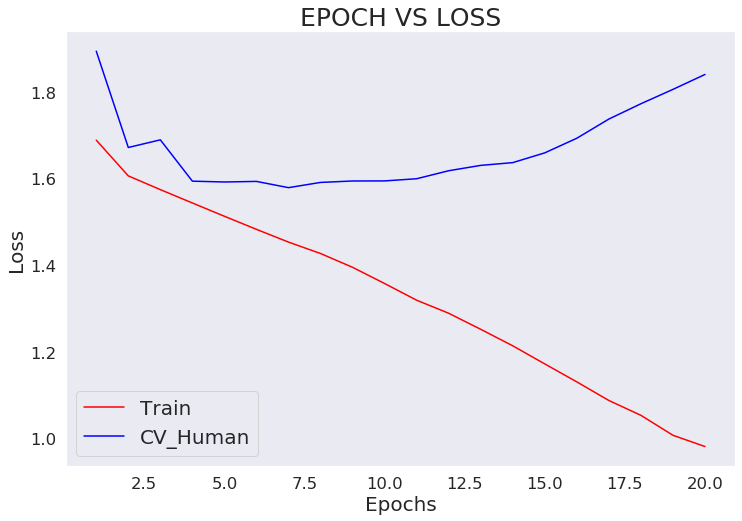

In [201]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Loss"]), list(log["CVHuman_Loss"]), "EPOCH VS LOSS")

In [202]:
def plotting(epoch, train_acc, CVHuman_acc, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_acc, color = 'red', label = "Train_Accuracy")
    axes.plot(epoch, CVHuman_acc, color = 'blue', label = "CV_Human_Accuracy")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Accuracy", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

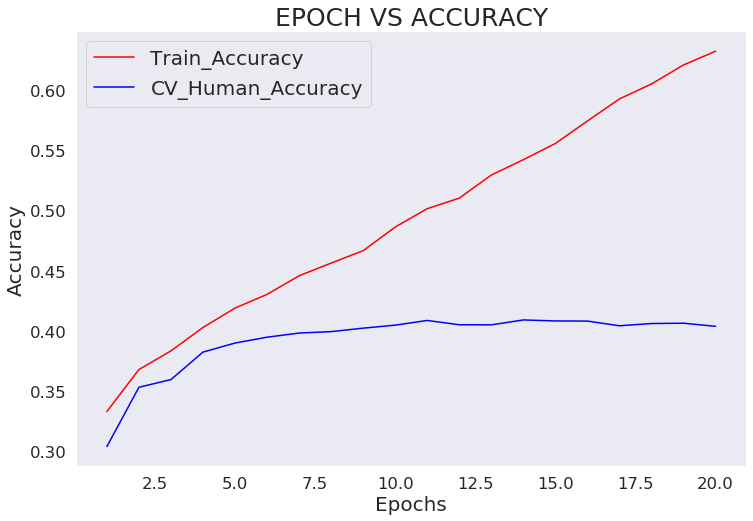

In [203]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Accuracy"]), list(log["CVHuman_Accuracy"]), "EPOCH VS ACCURACY")

In [204]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    # confusionMatx = [[1, 2],
    #                  [3, 4]]
    # confusionMatx.T = [[1, 3],
    #                   [2, 4]]
    # confusionMatx.sum(axis = 1)  axis=0 corresponds to columns and axis=1 corresponds to rows in two diamensional array
    # confusionMatx.sum(axix =1) = [[3, 7]]
    # (confusionMatx.T)/(confusionMatx.sum(axis=1)) = [[1/3, 3/7]
    #                                                  [2/3, 4/7]]

    # (confusionMatx.T)/(confusionMatx.sum(axis=1)).T = [[1/3, 2/3]
    #                                                    [3/7, 4/7]]
    # sum of row elements = 1
    
    labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [205]:
model = load_model("../Data/Model_Save/model.h5")
predicted_labels = []
true_labels = []
batch_size = 10
total_files = int(len(Test_Humans) / batch_size) + 2 #here, I have added 2 because there are 30 files in Test_Humans
for i in range(1, total_files, 1):
    img_load = np.load("../Data/Bottleneck_Features/Bottleneck_TestHumans/bottleneck_{}.npy".format(i))
    img_label = np.load("../Data/Bottleneck_Features/TestHumans_Labels/bottleneck_labels_{}.npy".format(i))
    img_bundle = img_load.reshape(img_load.shape[0], img_load.shape[1]*img_load.shape[2]*img_load.shape[3])
    for j in range(img_bundle.shape[0]):
        img = img_bundle[j]
        img = img.reshape(1, img_bundle.shape[1])
        pred = model.predict(img)
        predicted_labels.append(pred[0].argmax())
        true_labels.append(img_label[j].argmax())
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Human Test Data = {}%".format(np.round(float(acc*100), 2)))

Accuracy on Human Test Data = 38.83%


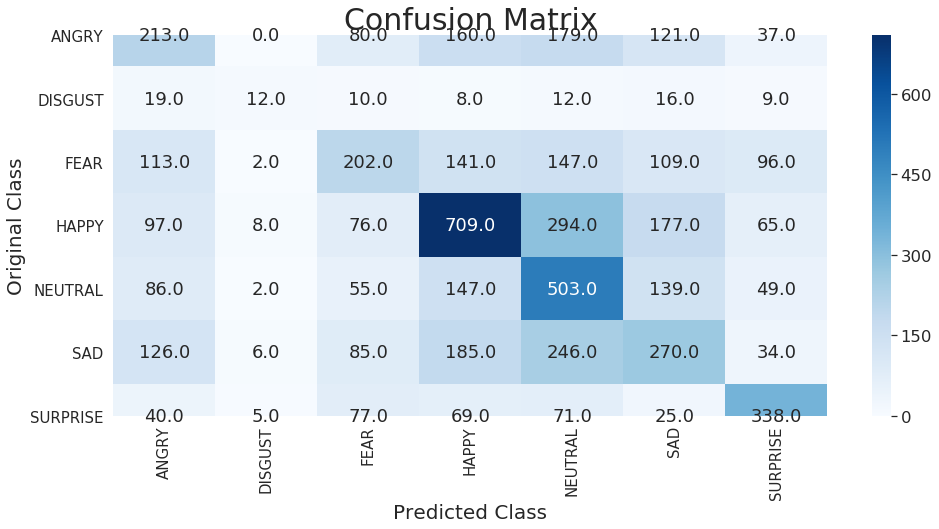

-----------------------------------------------------------------------------------------------------------------------------


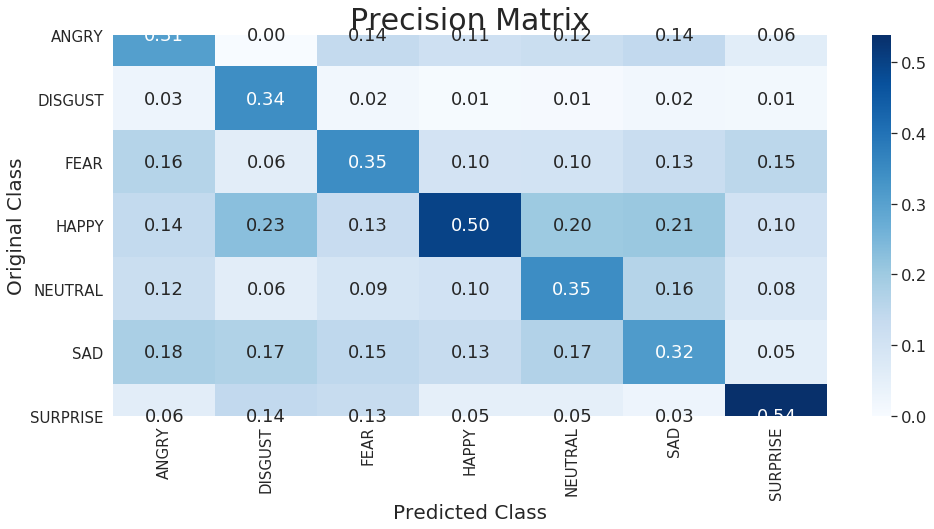

-----------------------------------------------------------------------------------------------------------------------------


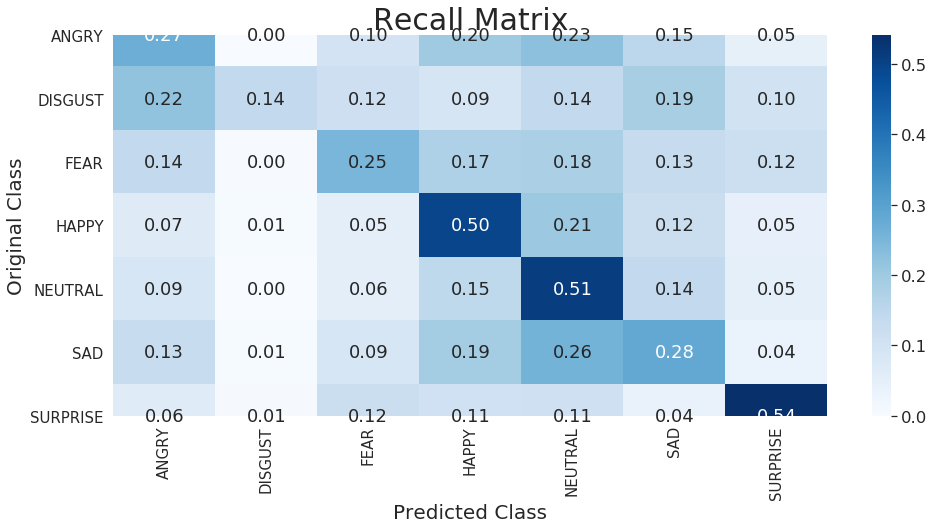

In [133]:
print_confusionMatrix(true_labels, predicted_labels)

In [ ]:
# Now for testing the model on real world images we have to follow all of the same steps which we have done on our training, CV
# and test images. Like here we have to first pre-preocess our images then create its VGG-16 bottleneck features then pass those 
# bottleneck features through our own MLP model for prediction.
# Steps are as follows:
# 1. Read the image, convert it to grayscale and save it.
# 2. Read that grayscale saved image, the detect face in it using HAAR cascade.
# 3. Crop the image to the detected face and resize it to 350*350 and save the image.
# 4. Read that processed cropped-resized image, then reshape it and normalize it.
# 5. Then feed that image to VGG-16 and create bottleneck features of that image and then reshape it.
# 6. Then use our own model for final prediction of expression.

In [206]:
EMOTION_DICT = {1:"ANGRY", 2:"DISGUST", 3:"FEAR", 4:"HAPPY", 5:"NEUTRAL", 6:"SAD", 7:"SURPRISE"}
model_VGG = VGG16(weights='imagenet', include_top=False)
model_top = load_model("../Data/Model_Save/model.h5")

In [207]:
def make_prediction(path):
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    
    #read the processed image then make prediction and display the result
    read_image = cv2.imread(path)
    read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
    read_image_final = read_image/255.0  #normalizing the image
    VGG_Pred = model_VGG.predict(read_image_final)  #creating bottleneck features of image using VGG-16.
    VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
    top_pred = model_top.predict(VGG_Pred)  #making prediction from our own model.
    emotion_label = top_pred[0].argmax() + 1
    print("Predicted Expression Probabilities")
    print("ANGRY: {}\nDISGUST: {}\nFEAR: {}\nHAPPY: {}\nNEUTRAL: {}\nSAD: {}\nSURPRISE: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6]))
    print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))

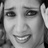

In [213]:
Image.open("../Data/Human/PrivateTest/Angry/PrivateTest_99938957.jpg")

In [214]:
make_prediction("../Data/Human/PrivateTest/Angry/PrivateTest_99938957.jpg")

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [217]:
import  cv2
import numpy as np
from keras.models import load_model
from keras.applications import VGG16

In [218]:
EMOTION_DICT = {1:"ANGRY", 2:"DISGUST", 3:"FEAR", 4:"HAPPY", 5:"NEUTRAL", 6:"SAD", 7:"SURPRISE"}
model_VGG = VGG16(weights='imagenet', include_top=False)
model_top = load_model("../Data/Model_Save/model.h5")

In [219]:
def return_prediction(path):
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    
    #read the processed image then make prediction and display the result
    read_image = cv2.imread(path)
    read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
    read_image_final = read_image/255.0
    VGG_Pred = model_VGG.predict(read_image_final)
    VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
    top_pred = model_top.predict(VGG_Pred)
    emotion_label = top_pred[0].argmax() + 1
    return EMOTION_DICT[emotion_label]

In [220]:
def rerun(text, cap):
    while(True):
        ret, img = cap.read()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, "Last Emotion was "+str(text), (95,30), font, 1.0, (255, 0, 0), 2, cv2.LINE_AA)
        
        cv2.putText(img, "Press SPACE: FOR EMOTION", (5,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
        cv2.putText(img, "Hold Q: To Quit", (460,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
        
        cv2.imshow("Image", img)
        
        if cv2.waitKey(1) == ord(' '):
            cv2.imwrite("test.jpg", img)
            text = return_prediction("test.jpg")
            first_run(text, cap)
            break
            
        if cv2.waitKey(1) == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

In [221]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

cap = cv2.VideoCapture(1)

def first_run(text, cap):
    while(True):
        ret, img = cap.read()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, "Last Emotion was "+str(text), (95,30), font, 1.0, (255, 0, 0), 2, cv2.LINE_AA)
        
        cv2.putText(img, "Press SPACE: FOR EMOTION", (5,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
        cv2.putText(img, "Hold Q: To Quit", (460,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
        
        cv2.imshow("Image", img)
        
        if cv2.waitKey(1) == ord(' '):
            cv2.imwrite("test.jpg", img)
            text = return_prediction("test.jpg")
            rerun(text, cap)
            break
            
        if cv2.waitKey(1) == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

In [222]:
first_run("None", cap)

ValueError: Error when checking input: expected dense_39_input to have shape (512,) but got array with shape (51200,)

In [2]:
df=pd.read_csv('fer2013.csv')

In [6]:
#! /usr/bin/env python3
# -*-coding: utf-8-*-

__author__ = 'Moonkie'

import numpy as np
import cv2
#import mxnet as mx
import pandas as pd
import random
import os

#curdir = os.path.abspath(os.path.dirname(__file__))
curdir = '.\\output'

def gen_record(csvfile, channel):
    data = pd.read_csv(csvfile, delimiter=',', dtype='a')
    labels = np.array(data['emotion'], np.float)
    # print(labels,'\n',data['emotion'])

    imagebuffer = np.array(data['pixels'])
    images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in imagebuffer])
    del imagebuffer
    num_shape = int(np.sqrt(images.shape[-1]))
    images.shape = (images.shape[0], num_shape, num_shape)
    # img=images[0];cv2.imshow('test',img);cv2.waitKey(0);cv2.destroyAllWindow();exit()
    dirs = set(data['Usage'])
    subdirs = set(labels)
    class_dir = {}
    for dr in dirs:
        dest = os.path.join(curdir, dr)
        class_dir[dr] = dest
        if not os.path.exists(dest):
            os.mkdir(dest)

    data = zip(labels, images, data['Usage'])

    for d in data:
        destdir = os.path.join(class_dir[d[-1]], str(int(d[0])))
        if not os.path.exists(destdir):
            os.mkdir(destdir)
        img = d[1]
        filepath = unique_name(destdir, d[-1])
        print('[^_^] Write image to %s' % filepath)
        if not filepath:
            continue
        sig = cv2.imwrite(filepath, img)
        if not sig:
            print('Error')
            exit(-1)


def unique_name(pardir, prefix, suffix='jpg'):
    filename = '{0}_{1}.{2}'.format(prefix, random.randint(1, 10 ** 8), suffix)
    filepath = os.path.join(pardir, filename)
    if not os.path.exists(filepath):
        return filepath
    unique_name(pardir, prefix, suffix)


if __name__ == '__main__':
    filename = 'fer2013.csv'
    filename = os.path.join(curdir, filename)
    gen_record(filename, 1)

    # ##################### test
    # tmp = unique_name('./Training','Training')
    # print(tmp)

[^_^] Write image to .\output\Training\0\Training_97395339.jpg
[^_^] Write image to .\output\Training\0\Training_67141059.jpg
[^_^] Write image to .\output\Training\2\Training_84800328.jpg
[^_^] Write image to .\output\Training\4\Training_65295914.jpg
[^_^] Write image to .\output\Training\6\Training_70054807.jpg
[^_^] Write image to .\output\Training\2\Training_39732280.jpg
[^_^] Write image to .\output\Training\4\Training_1962698.jpg
[^_^] Write image to .\output\Training\3\Training_58742274.jpg
[^_^] Write image to .\output\Training\3\Training_85793812.jpg
[^_^] Write image to .\output\Training\2\Training_72923601.jpg
[^_^] Write image to .\output\Training\0\Training_61771881.jpg
[^_^] Write image to .\output\Training\6\Training_99011665.jpg
[^_^] Write image to .\output\Training\6\Training_74699823.jpg
[^_^] Write image to .\output\Training\6\Training_58130032.jpg
[^_^] Write image to .\output\Training\3\Training_64644614.jpg
[^_^] Write image to .\output\Training\5\Training_460309

[^_^] Write image to .\output\Training\5\Training_49988060.jpg
[^_^] Write image to .\output\Training\2\Training_26929446.jpg
[^_^] Write image to .\output\Training\3\Training_72629204.jpg
[^_^] Write image to .\output\Training\4\Training_69143846.jpg
[^_^] Write image to .\output\Training\6\Training_38868219.jpg
[^_^] Write image to .\output\Training\3\Training_92656333.jpg
[^_^] Write image to .\output\Training\4\Training_59967692.jpg
[^_^] Write image to .\output\Training\3\Training_65704931.jpg
[^_^] Write image to .\output\Training\6\Training_84768448.jpg
[^_^] Write image to .\output\Training\0\Training_51312444.jpg
[^_^] Write image to .\output\Training\4\Training_81733664.jpg
[^_^] Write image to .\output\Training\4\Training_91977744.jpg
[^_^] Write image to .\output\Training\4\Training_14796455.jpg
[^_^] Write image to .\output\Training\2\Training_17121275.jpg
[^_^] Write image to .\output\Training\6\Training_99395544.jpg
[^_^] Write image to .\output\Training\5\Training_93762

[^_^] Write image to .\output\Training\0\Training_85034356.jpg
[^_^] Write image to .\output\Training\1\Training_70077608.jpg
[^_^] Write image to .\output\Training\2\Training_76877200.jpg
[^_^] Write image to .\output\Training\2\Training_94355246.jpg
[^_^] Write image to .\output\Training\5\Training_38771867.jpg
[^_^] Write image to .\output\Training\3\Training_27299510.jpg
[^_^] Write image to .\output\Training\5\Training_15068957.jpg
[^_^] Write image to .\output\Training\4\Training_73946895.jpg
[^_^] Write image to .\output\Training\4\Training_41343491.jpg
[^_^] Write image to .\output\Training\0\Training_61771017.jpg
[^_^] Write image to .\output\Training\2\Training_26245552.jpg
[^_^] Write image to .\output\Training\3\Training_26499585.jpg
[^_^] Write image to .\output\Training\4\Training_12390607.jpg
[^_^] Write image to .\output\Training\6\Training_88521375.jpg
[^_^] Write image to .\output\Training\4\Training_79706270.jpg
[^_^] Write image to .\output\Training\2\Training_17372

[^_^] Write image to .\output\Training\4\Training_59763895.jpg
[^_^] Write image to .\output\Training\6\Training_93665076.jpg
[^_^] Write image to .\output\Training\5\Training_50850356.jpg
[^_^] Write image to .\output\Training\3\Training_67977789.jpg
[^_^] Write image to .\output\Training\3\Training_43156849.jpg
[^_^] Write image to .\output\Training\3\Training_96553996.jpg
[^_^] Write image to .\output\Training\4\Training_76733462.jpg
[^_^] Write image to .\output\Training\4\Training_16255241.jpg
[^_^] Write image to .\output\Training\6\Training_61511161.jpg
[^_^] Write image to .\output\Training\3\Training_51523748.jpg
[^_^] Write image to .\output\Training\4\Training_3637745.jpg
[^_^] Write image to .\output\Training\2\Training_79238159.jpg
[^_^] Write image to .\output\Training\3\Training_68615567.jpg
[^_^] Write image to .\output\Training\2\Training_93586473.jpg
[^_^] Write image to .\output\Training\2\Training_85228476.jpg
[^_^] Write image to .\output\Training\3\Training_605231

[^_^] Write image to .\output\Training\3\Training_30983077.jpg
[^_^] Write image to .\output\Training\5\Training_11541083.jpg
[^_^] Write image to .\output\Training\6\Training_3359740.jpg
[^_^] Write image to .\output\Training\2\Training_26644062.jpg
[^_^] Write image to .\output\Training\4\Training_6083819.jpg
[^_^] Write image to .\output\Training\2\Training_80021159.jpg
[^_^] Write image to .\output\Training\2\Training_94634740.jpg
[^_^] Write image to .\output\Training\6\Training_25029012.jpg
[^_^] Write image to .\output\Training\6\Training_56803827.jpg
[^_^] Write image to .\output\Training\4\Training_45113077.jpg
[^_^] Write image to .\output\Training\6\Training_52884373.jpg
[^_^] Write image to .\output\Training\6\Training_87649383.jpg
[^_^] Write image to .\output\Training\3\Training_78385582.jpg
[^_^] Write image to .\output\Training\4\Training_30951099.jpg
[^_^] Write image to .\output\Training\0\Training_65459749.jpg
[^_^] Write image to .\output\Training\3\Training_3421960

[^_^] Write image to .\output\Training\3\Training_46931466.jpg
[^_^] Write image to .\output\Training\3\Training_7645683.jpg
[^_^] Write image to .\output\Training\2\Training_4480751.jpg
[^_^] Write image to .\output\Training\0\Training_46731524.jpg
[^_^] Write image to .\output\Training\2\Training_95458461.jpg
[^_^] Write image to .\output\Training\5\Training_97007374.jpg
[^_^] Write image to .\output\Training\0\Training_67285666.jpg
[^_^] Write image to .\output\Training\2\Training_53482313.jpg
[^_^] Write image to .\output\Training\2\Training_11363029.jpg
[^_^] Write image to .\output\Training\2\Training_2117899.jpg
[^_^] Write image to .\output\Training\6\Training_92307860.jpg
[^_^] Write image to .\output\Training\2\Training_88530795.jpg
[^_^] Write image to .\output\Training\4\Training_87228010.jpg
[^_^] Write image to .\output\Training\5\Training_95815497.jpg
[^_^] Write image to .\output\Training\5\Training_74953535.jpg
[^_^] Write image to .\output\Training\4\Training_10621475

[^_^] Write image to .\output\Training\3\Training_77313290.jpg
[^_^] Write image to .\output\Training\3\Training_99535042.jpg
[^_^] Write image to .\output\Training\4\Training_36341902.jpg
[^_^] Write image to .\output\Training\0\Training_98305766.jpg
[^_^] Write image to .\output\Training\6\Training_40020614.jpg
[^_^] Write image to .\output\Training\4\Training_73193386.jpg
[^_^] Write image to .\output\Training\4\Training_56803460.jpg
[^_^] Write image to .\output\Training\2\Training_85845099.jpg
[^_^] Write image to .\output\Training\6\Training_62019380.jpg
[^_^] Write image to .\output\Training\3\Training_65422594.jpg
[^_^] Write image to .\output\Training\2\Training_60725786.jpg
[^_^] Write image to .\output\Training\0\Training_86732092.jpg
[^_^] Write image to .\output\Training\5\Training_24737164.jpg
[^_^] Write image to .\output\Training\4\Training_79528094.jpg
[^_^] Write image to .\output\Training\2\Training_28465396.jpg
[^_^] Write image to .\output\Training\6\Training_95877

[^_^] Write image to .\output\Training\0\Training_28819291.jpg
[^_^] Write image to .\output\Training\3\Training_36966726.jpg
[^_^] Write image to .\output\Training\3\Training_92944299.jpg
[^_^] Write image to .\output\Training\6\Training_190855.jpg
[^_^] Write image to .\output\Training\4\Training_60368230.jpg
[^_^] Write image to .\output\Training\3\Training_22419201.jpg
[^_^] Write image to .\output\Training\3\Training_96991934.jpg
[^_^] Write image to .\output\Training\3\Training_17567837.jpg
[^_^] Write image to .\output\Training\5\Training_19692325.jpg
[^_^] Write image to .\output\Training\6\Training_61869345.jpg
[^_^] Write image to .\output\Training\0\Training_47811689.jpg
[^_^] Write image to .\output\Training\6\Training_94646903.jpg
[^_^] Write image to .\output\Training\2\Training_12122087.jpg
[^_^] Write image to .\output\Training\2\Training_1231821.jpg
[^_^] Write image to .\output\Training\3\Training_73386551.jpg
[^_^] Write image to .\output\Training\0\Training_81096102

[^_^] Write image to .\output\Training\2\Training_92613846.jpg
[^_^] Write image to .\output\Training\5\Training_23461999.jpg
[^_^] Write image to .\output\Training\2\Training_95120172.jpg
[^_^] Write image to .\output\Training\3\Training_12938119.jpg
[^_^] Write image to .\output\Training\0\Training_94516971.jpg
[^_^] Write image to .\output\Training\4\Training_11815828.jpg
[^_^] Write image to .\output\Training\2\Training_33105021.jpg
[^_^] Write image to .\output\Training\6\Training_30038915.jpg
[^_^] Write image to .\output\Training\3\Training_78088045.jpg
[^_^] Write image to .\output\Training\4\Training_29997540.jpg
[^_^] Write image to .\output\Training\6\Training_90434263.jpg
[^_^] Write image to .\output\Training\5\Training_54959519.jpg
[^_^] Write image to .\output\Training\0\Training_11042430.jpg
[^_^] Write image to .\output\Training\6\Training_87260278.jpg
[^_^] Write image to .\output\Training\0\Training_14820602.jpg
[^_^] Write image to .\output\Training\2\Training_65309

[^_^] Write image to .\output\Training\3\Training_90637199.jpg
[^_^] Write image to .\output\Training\0\Training_96169432.jpg
[^_^] Write image to .\output\Training\5\Training_18018159.jpg
[^_^] Write image to .\output\Training\0\Training_49283875.jpg
[^_^] Write image to .\output\Training\5\Training_38653040.jpg
[^_^] Write image to .\output\Training\4\Training_34167293.jpg
[^_^] Write image to .\output\Training\0\Training_37356194.jpg
[^_^] Write image to .\output\Training\3\Training_49112876.jpg
[^_^] Write image to .\output\Training\4\Training_59402340.jpg
[^_^] Write image to .\output\Training\2\Training_66162557.jpg
[^_^] Write image to .\output\Training\5\Training_12600072.jpg
[^_^] Write image to .\output\Training\2\Training_5102120.jpg
[^_^] Write image to .\output\Training\3\Training_14566760.jpg
[^_^] Write image to .\output\Training\0\Training_62004174.jpg
[^_^] Write image to .\output\Training\4\Training_24525000.jpg
[^_^] Write image to .\output\Training\0\Training_354788

[^_^] Write image to .\output\Training\2\Training_60747731.jpg
[^_^] Write image to .\output\Training\2\Training_79732163.jpg
[^_^] Write image to .\output\Training\6\Training_46490350.jpg
[^_^] Write image to .\output\Training\2\Training_88609755.jpg
[^_^] Write image to .\output\Training\4\Training_89922359.jpg
[^_^] Write image to .\output\Training\0\Training_33856800.jpg
[^_^] Write image to .\output\Training\6\Training_13389090.jpg
[^_^] Write image to .\output\Training\4\Training_32859867.jpg
[^_^] Write image to .\output\Training\3\Training_74496743.jpg
[^_^] Write image to .\output\Training\2\Training_48152270.jpg
[^_^] Write image to .\output\Training\5\Training_30372032.jpg
[^_^] Write image to .\output\Training\3\Training_35016463.jpg
[^_^] Write image to .\output\Training\5\Training_93464044.jpg
[^_^] Write image to .\output\Training\6\Training_25366823.jpg
[^_^] Write image to .\output\Training\1\Training_67098013.jpg
[^_^] Write image to .\output\Training\4\Training_67144

[^_^] Write image to .\output\Training\3\Training_92142397.jpg
[^_^] Write image to .\output\Training\2\Training_89701353.jpg
[^_^] Write image to .\output\Training\5\Training_2967257.jpg
[^_^] Write image to .\output\Training\4\Training_38788965.jpg
[^_^] Write image to .\output\Training\6\Training_35079285.jpg
[^_^] Write image to .\output\Training\3\Training_86492332.jpg
[^_^] Write image to .\output\Training\2\Training_55687669.jpg
[^_^] Write image to .\output\Training\3\Training_95230521.jpg
[^_^] Write image to .\output\Training\3\Training_44746918.jpg
[^_^] Write image to .\output\Training\5\Training_16697545.jpg
[^_^] Write image to .\output\Training\3\Training_39990085.jpg
[^_^] Write image to .\output\Training\0\Training_33576870.jpg
[^_^] Write image to .\output\Training\5\Training_61109550.jpg
[^_^] Write image to .\output\Training\3\Training_4716980.jpg
[^_^] Write image to .\output\Training\4\Training_76873532.jpg
[^_^] Write image to .\output\Training\3\Training_2406060

[^_^] Write image to .\output\Training\4\Training_55504443.jpg
[^_^] Write image to .\output\Training\5\Training_21102520.jpg
[^_^] Write image to .\output\Training\0\Training_19979320.jpg
[^_^] Write image to .\output\Training\5\Training_11158966.jpg
[^_^] Write image to .\output\Training\3\Training_23200711.jpg
[^_^] Write image to .\output\Training\4\Training_37548872.jpg
[^_^] Write image to .\output\Training\5\Training_31830031.jpg
[^_^] Write image to .\output\Training\0\Training_22093108.jpg
[^_^] Write image to .\output\Training\5\Training_62864409.jpg
[^_^] Write image to .\output\Training\0\Training_90731334.jpg
[^_^] Write image to .\output\Training\5\Training_88701224.jpg
[^_^] Write image to .\output\Training\6\Training_84171963.jpg
[^_^] Write image to .\output\Training\3\Training_90011389.jpg
[^_^] Write image to .\output\Training\5\Training_29433983.jpg
[^_^] Write image to .\output\Training\3\Training_30198892.jpg
[^_^] Write image to .\output\Training\6\Training_49779

[^_^] Write image to .\output\Training\2\Training_27829835.jpg
[^_^] Write image to .\output\Training\5\Training_15039353.jpg
[^_^] Write image to .\output\Training\4\Training_88490480.jpg
[^_^] Write image to .\output\Training\3\Training_33462574.jpg
[^_^] Write image to .\output\Training\6\Training_15889793.jpg
[^_^] Write image to .\output\Training\0\Training_16522976.jpg
[^_^] Write image to .\output\Training\4\Training_73255168.jpg
[^_^] Write image to .\output\Training\3\Training_89221655.jpg
[^_^] Write image to .\output\Training\2\Training_60054638.jpg
[^_^] Write image to .\output\Training\2\Training_68209419.jpg
[^_^] Write image to .\output\Training\6\Training_19638732.jpg
[^_^] Write image to .\output\Training\6\Training_40103447.jpg
[^_^] Write image to .\output\Training\3\Training_68263716.jpg
[^_^] Write image to .\output\Training\4\Training_11705849.jpg
[^_^] Write image to .\output\Training\2\Training_34522785.jpg
[^_^] Write image to .\output\Training\4\Training_64115

[^_^] Write image to .\output\Training\0\Training_71958915.jpg
[^_^] Write image to .\output\Training\4\Training_68313666.jpg
[^_^] Write image to .\output\Training\3\Training_45818485.jpg
[^_^] Write image to .\output\Training\2\Training_88550914.jpg
[^_^] Write image to .\output\Training\2\Training_38193813.jpg
[^_^] Write image to .\output\Training\5\Training_54821057.jpg
[^_^] Write image to .\output\Training\4\Training_92892356.jpg
[^_^] Write image to .\output\Training\6\Training_92702754.jpg
[^_^] Write image to .\output\Training\4\Training_11956515.jpg
[^_^] Write image to .\output\Training\4\Training_48885310.jpg
[^_^] Write image to .\output\Training\4\Training_17513135.jpg
[^_^] Write image to .\output\Training\3\Training_62058753.jpg
[^_^] Write image to .\output\Training\6\Training_73823011.jpg
[^_^] Write image to .\output\Training\0\Training_84052350.jpg
[^_^] Write image to .\output\Training\6\Training_31889001.jpg
[^_^] Write image to .\output\Training\2\Training_54262

[^_^] Write image to .\output\Training\0\Training_2017507.jpg
[^_^] Write image to .\output\Training\6\Training_40181113.jpg
[^_^] Write image to .\output\Training\0\Training_15170975.jpg
[^_^] Write image to .\output\Training\3\Training_16490563.jpg
[^_^] Write image to .\output\Training\0\Training_77566243.jpg
[^_^] Write image to .\output\Training\2\Training_97879258.jpg
[^_^] Write image to .\output\Training\0\Training_24257438.jpg
[^_^] Write image to .\output\Training\6\Training_18298448.jpg
[^_^] Write image to .\output\Training\2\Training_21436553.jpg
[^_^] Write image to .\output\Training\3\Training_73091985.jpg
[^_^] Write image to .\output\Training\3\Training_62438864.jpg
[^_^] Write image to .\output\Training\6\Training_31971612.jpg
[^_^] Write image to .\output\Training\6\Training_34366535.jpg
[^_^] Write image to .\output\Training\0\Training_54717914.jpg
[^_^] Write image to .\output\Training\2\Training_68189911.jpg
[^_^] Write image to .\output\Training\6\Training_371381

[^_^] Write image to .\output\Training\4\Training_76421372.jpg
[^_^] Write image to .\output\Training\6\Training_52724187.jpg
[^_^] Write image to .\output\Training\6\Training_66408242.jpg
[^_^] Write image to .\output\Training\0\Training_44163738.jpg
[^_^] Write image to .\output\Training\6\Training_91001849.jpg
[^_^] Write image to .\output\Training\0\Training_32192769.jpg
[^_^] Write image to .\output\Training\4\Training_11045084.jpg
[^_^] Write image to .\output\Training\6\Training_25016386.jpg
[^_^] Write image to .\output\Training\6\Training_77739453.jpg
[^_^] Write image to .\output\Training\6\Training_16322116.jpg
[^_^] Write image to .\output\Training\4\Training_82181874.jpg
[^_^] Write image to .\output\Training\4\Training_23404368.jpg
[^_^] Write image to .\output\Training\6\Training_52200783.jpg
[^_^] Write image to .\output\Training\3\Training_31534887.jpg
[^_^] Write image to .\output\Training\4\Training_40460202.jpg
[^_^] Write image to .\output\Training\3\Training_93884

[^_^] Write image to .\output\Training\6\Training_89397145.jpg
[^_^] Write image to .\output\Training\4\Training_64639733.jpg
[^_^] Write image to .\output\Training\0\Training_10925161.jpg
[^_^] Write image to .\output\Training\6\Training_58375247.jpg
[^_^] Write image to .\output\Training\4\Training_69637398.jpg
[^_^] Write image to .\output\Training\6\Training_57665809.jpg
[^_^] Write image to .\output\Training\6\Training_67281085.jpg
[^_^] Write image to .\output\Training\3\Training_34923355.jpg
[^_^] Write image to .\output\Training\5\Training_62063260.jpg
[^_^] Write image to .\output\Training\3\Training_85569332.jpg
[^_^] Write image to .\output\Training\3\Training_80014506.jpg
[^_^] Write image to .\output\Training\5\Training_90041285.jpg
[^_^] Write image to .\output\Training\5\Training_83805864.jpg
[^_^] Write image to .\output\Training\2\Training_81939090.jpg
[^_^] Write image to .\output\Training\6\Training_58051724.jpg
[^_^] Write image to .\output\Training\0\Training_13450

[^_^] Write image to .\output\Training\2\Training_35760479.jpg
[^_^] Write image to .\output\Training\5\Training_37795053.jpg
[^_^] Write image to .\output\Training\5\Training_24272629.jpg
[^_^] Write image to .\output\Training\0\Training_75474429.jpg
[^_^] Write image to .\output\Training\3\Training_4269935.jpg
[^_^] Write image to .\output\Training\3\Training_47266397.jpg
[^_^] Write image to .\output\Training\4\Training_17616433.jpg
[^_^] Write image to .\output\Training\3\Training_17601416.jpg
[^_^] Write image to .\output\Training\6\Training_489329.jpg
[^_^] Write image to .\output\Training\2\Training_29704283.jpg
[^_^] Write image to .\output\Training\4\Training_10571688.jpg
[^_^] Write image to .\output\Training\3\Training_27474945.jpg
[^_^] Write image to .\output\Training\3\Training_44743991.jpg
[^_^] Write image to .\output\Training\0\Training_11814101.jpg
[^_^] Write image to .\output\Training\3\Training_69625315.jpg
[^_^] Write image to .\output\Training\3\Training_39255444

[^_^] Write image to .\output\Training\0\Training_43447520.jpg
[^_^] Write image to .\output\Training\0\Training_53878767.jpg
[^_^] Write image to .\output\Training\3\Training_76106140.jpg
[^_^] Write image to .\output\Training\0\Training_49883676.jpg
[^_^] Write image to .\output\Training\3\Training_40832452.jpg
[^_^] Write image to .\output\Training\3\Training_10391631.jpg
[^_^] Write image to .\output\Training\5\Training_7407466.jpg
[^_^] Write image to .\output\Training\6\Training_25573729.jpg
[^_^] Write image to .\output\Training\3\Training_40467158.jpg
[^_^] Write image to .\output\Training\4\Training_52475153.jpg
[^_^] Write image to .\output\Training\2\Training_6733026.jpg
[^_^] Write image to .\output\Training\0\Training_94956336.jpg
[^_^] Write image to .\output\Training\6\Training_53175650.jpg
[^_^] Write image to .\output\Training\6\Training_65904338.jpg
[^_^] Write image to .\output\Training\3\Training_8320254.jpg
[^_^] Write image to .\output\Training\3\Training_41736066

[^_^] Write image to .\output\Training\3\Training_34384387.jpg
[^_^] Write image to .\output\Training\6\Training_68600552.jpg
[^_^] Write image to .\output\Training\4\Training_99722962.jpg
[^_^] Write image to .\output\Training\0\Training_93742996.jpg
[^_^] Write image to .\output\Training\4\Training_78476784.jpg
[^_^] Write image to .\output\Training\6\Training_95645222.jpg
[^_^] Write image to .\output\Training\0\Training_87320455.jpg
[^_^] Write image to .\output\Training\0\Training_51437730.jpg
[^_^] Write image to .\output\Training\2\Training_1016359.jpg
[^_^] Write image to .\output\Training\6\Training_6260701.jpg
[^_^] Write image to .\output\Training\0\Training_91421836.jpg
[^_^] Write image to .\output\Training\3\Training_22688364.jpg
[^_^] Write image to .\output\Training\6\Training_84642144.jpg
[^_^] Write image to .\output\Training\4\Training_87300091.jpg
[^_^] Write image to .\output\Training\3\Training_78050726.jpg
[^_^] Write image to .\output\Training\4\Training_9707511

[^_^] Write image to .\output\Training\3\Training_53995690.jpg
[^_^] Write image to .\output\Training\3\Training_62377647.jpg
[^_^] Write image to .\output\Training\5\Training_64803523.jpg
[^_^] Write image to .\output\Training\3\Training_49550626.jpg
[^_^] Write image to .\output\Training\6\Training_4105237.jpg
[^_^] Write image to .\output\Training\3\Training_16410924.jpg
[^_^] Write image to .\output\Training\4\Training_2695115.jpg
[^_^] Write image to .\output\Training\3\Training_99116021.jpg
[^_^] Write image to .\output\Training\3\Training_26672219.jpg
[^_^] Write image to .\output\Training\3\Training_55598200.jpg
[^_^] Write image to .\output\Training\2\Training_60310611.jpg
[^_^] Write image to .\output\Training\4\Training_7588578.jpg
[^_^] Write image to .\output\Training\6\Training_66738167.jpg
[^_^] Write image to .\output\Training\5\Training_57489216.jpg
[^_^] Write image to .\output\Training\6\Training_29952896.jpg
[^_^] Write image to .\output\Training\3\Training_87271165

[^_^] Write image to .\output\Training\2\Training_21029661.jpg
[^_^] Write image to .\output\Training\6\Training_43234178.jpg
[^_^] Write image to .\output\Training\2\Training_97519747.jpg
[^_^] Write image to .\output\Training\3\Training_22150274.jpg
[^_^] Write image to .\output\Training\0\Training_13794042.jpg
[^_^] Write image to .\output\Training\2\Training_63938535.jpg
[^_^] Write image to .\output\Training\2\Training_22612551.jpg
[^_^] Write image to .\output\Training\4\Training_20156372.jpg
[^_^] Write image to .\output\Training\3\Training_66444825.jpg
[^_^] Write image to .\output\Training\6\Training_68850818.jpg
[^_^] Write image to .\output\Training\3\Training_78609761.jpg
[^_^] Write image to .\output\Training\3\Training_14991709.jpg
[^_^] Write image to .\output\Training\6\Training_16754545.jpg
[^_^] Write image to .\output\Training\4\Training_32715088.jpg
[^_^] Write image to .\output\Training\4\Training_38734740.jpg
[^_^] Write image to .\output\Training\6\Training_28765

[^_^] Write image to .\output\Training\4\Training_96511766.jpg
[^_^] Write image to .\output\Training\4\Training_1332335.jpg
[^_^] Write image to .\output\Training\6\Training_66501237.jpg
[^_^] Write image to .\output\Training\2\Training_72760912.jpg
[^_^] Write image to .\output\Training\5\Training_55651226.jpg
[^_^] Write image to .\output\Training\3\Training_80877511.jpg
[^_^] Write image to .\output\Training\6\Training_59270627.jpg
[^_^] Write image to .\output\Training\3\Training_81032083.jpg
[^_^] Write image to .\output\Training\3\Training_16684669.jpg
[^_^] Write image to .\output\Training\4\Training_18806776.jpg
[^_^] Write image to .\output\Training\3\Training_27290095.jpg
[^_^] Write image to .\output\Training\0\Training_42201128.jpg
[^_^] Write image to .\output\Training\0\Training_90578340.jpg
[^_^] Write image to .\output\Training\5\Training_28894203.jpg
[^_^] Write image to .\output\Training\6\Training_64388207.jpg
[^_^] Write image to .\output\Training\6\Training_906952

[^_^] Write image to .\output\Training\2\Training_65051351.jpg
[^_^] Write image to .\output\Training\5\Training_96342104.jpg
[^_^] Write image to .\output\Training\3\Training_17085916.jpg
[^_^] Write image to .\output\Training\0\Training_64595691.jpg
[^_^] Write image to .\output\Training\0\Training_68268136.jpg
[^_^] Write image to .\output\Training\2\Training_24429310.jpg
[^_^] Write image to .\output\Training\3\Training_82126629.jpg
[^_^] Write image to .\output\Training\3\Training_11056743.jpg
[^_^] Write image to .\output\Training\4\Training_15415591.jpg
[^_^] Write image to .\output\Training\5\Training_56580264.jpg
[^_^] Write image to .\output\Training\4\Training_84274878.jpg
[^_^] Write image to .\output\Training\4\Training_11104739.jpg
[^_^] Write image to .\output\Training\3\Training_77170453.jpg
[^_^] Write image to .\output\Training\4\Training_16283146.jpg
[^_^] Write image to .\output\Training\5\Training_51166167.jpg
[^_^] Write image to .\output\Training\3\Training_80816

[^_^] Write image to .\output\Training\6\Training_97524985.jpg
[^_^] Write image to .\output\Training\3\Training_55597698.jpg
[^_^] Write image to .\output\Training\4\Training_20526560.jpg
[^_^] Write image to .\output\Training\2\Training_47579816.jpg
[^_^] Write image to .\output\Training\6\Training_75977671.jpg
[^_^] Write image to .\output\Training\6\Training_2312266.jpg
[^_^] Write image to .\output\Training\0\Training_3706780.jpg
[^_^] Write image to .\output\Training\5\Training_37190850.jpg
[^_^] Write image to .\output\Training\5\Training_13961266.jpg
[^_^] Write image to .\output\Training\6\Training_74646407.jpg
[^_^] Write image to .\output\Training\3\Training_52337464.jpg
[^_^] Write image to .\output\Training\2\Training_19918134.jpg
[^_^] Write image to .\output\Training\3\Training_32362043.jpg
[^_^] Write image to .\output\Training\4\Training_55301698.jpg
[^_^] Write image to .\output\Training\6\Training_5490226.jpg
[^_^] Write image to .\output\Training\0\Training_86592539

[^_^] Write image to .\output\Training\4\Training_81427934.jpg
[^_^] Write image to .\output\Training\2\Training_30585088.jpg
[^_^] Write image to .\output\Training\5\Training_68566337.jpg
[^_^] Write image to .\output\Training\4\Training_84831962.jpg
[^_^] Write image to .\output\Training\3\Training_71175215.jpg
[^_^] Write image to .\output\Training\2\Training_47156799.jpg
[^_^] Write image to .\output\Training\4\Training_17536133.jpg
[^_^] Write image to .\output\Training\6\Training_43465779.jpg
[^_^] Write image to .\output\Training\4\Training_69153638.jpg
[^_^] Write image to .\output\Training\2\Training_64086890.jpg
[^_^] Write image to .\output\Training\6\Training_8291877.jpg
[^_^] Write image to .\output\Training\0\Training_3880731.jpg
[^_^] Write image to .\output\Training\5\Training_8409087.jpg
[^_^] Write image to .\output\Training\6\Training_20186624.jpg
[^_^] Write image to .\output\Training\6\Training_36940997.jpg
[^_^] Write image to .\output\Training\6\Training_85018937

[^_^] Write image to .\output\Training\3\Training_1276789.jpg
[^_^] Write image to .\output\Training\2\Training_5578580.jpg
[^_^] Write image to .\output\Training\2\Training_39460700.jpg
[^_^] Write image to .\output\Training\5\Training_39749470.jpg
[^_^] Write image to .\output\Training\4\Training_72713805.jpg
[^_^] Write image to .\output\Training\5\Training_18220422.jpg
[^_^] Write image to .\output\Training\3\Training_15355004.jpg
[^_^] Write image to .\output\Training\5\Training_3100107.jpg
[^_^] Write image to .\output\Training\0\Training_54506865.jpg
[^_^] Write image to .\output\Training\4\Training_16266809.jpg
[^_^] Write image to .\output\Training\2\Training_470737.jpg
[^_^] Write image to .\output\Training\3\Training_12486472.jpg
[^_^] Write image to .\output\Training\4\Training_9513204.jpg
[^_^] Write image to .\output\Training\6\Training_28911093.jpg
[^_^] Write image to .\output\Training\0\Training_84164694.jpg
[^_^] Write image to .\output\Training\6\Training_31798705.jp

[^_^] Write image to .\output\Training\0\Training_92945823.jpg
[^_^] Write image to .\output\Training\3\Training_62560639.jpg
[^_^] Write image to .\output\Training\4\Training_40865464.jpg
[^_^] Write image to .\output\Training\5\Training_13245936.jpg
[^_^] Write image to .\output\Training\3\Training_18640975.jpg
[^_^] Write image to .\output\Training\0\Training_54655040.jpg
[^_^] Write image to .\output\Training\6\Training_85862413.jpg
[^_^] Write image to .\output\Training\6\Training_94303697.jpg
[^_^] Write image to .\output\Training\0\Training_31609270.jpg
[^_^] Write image to .\output\Training\2\Training_21849394.jpg
[^_^] Write image to .\output\Training\2\Training_83922742.jpg
[^_^] Write image to .\output\Training\3\Training_65197271.jpg
[^_^] Write image to .\output\Training\4\Training_299091.jpg
[^_^] Write image to .\output\Training\0\Training_64276406.jpg
[^_^] Write image to .\output\Training\5\Training_46705383.jpg
[^_^] Write image to .\output\Training\0\Training_4113050

[^_^] Write image to .\output\Training\0\Training_35707752.jpg
[^_^] Write image to .\output\Training\5\Training_68878145.jpg
[^_^] Write image to .\output\Training\3\Training_88409993.jpg
[^_^] Write image to .\output\Training\4\Training_32906588.jpg
[^_^] Write image to .\output\Training\5\Training_50124370.jpg
[^_^] Write image to .\output\Training\4\Training_73640128.jpg
[^_^] Write image to .\output\Training\3\Training_82827852.jpg
[^_^] Write image to .\output\Training\5\Training_46714199.jpg
[^_^] Write image to .\output\Training\3\Training_92493922.jpg
[^_^] Write image to .\output\Training\0\Training_15517831.jpg
[^_^] Write image to .\output\Training\0\Training_4541501.jpg
[^_^] Write image to .\output\Training\2\Training_93922558.jpg
[^_^] Write image to .\output\Training\6\Training_42680706.jpg
[^_^] Write image to .\output\Training\2\Training_87658183.jpg
[^_^] Write image to .\output\Training\6\Training_5413955.jpg
[^_^] Write image to .\output\Training\0\Training_6593351

[^_^] Write image to .\output\Training\4\Training_17143578.jpg
[^_^] Write image to .\output\Training\3\Training_60151733.jpg
[^_^] Write image to .\output\Training\6\Training_6700705.jpg
[^_^] Write image to .\output\Training\2\Training_89737756.jpg
[^_^] Write image to .\output\Training\5\Training_68613553.jpg
[^_^] Write image to .\output\Training\0\Training_66268931.jpg
[^_^] Write image to .\output\Training\3\Training_63419345.jpg
[^_^] Write image to .\output\Training\2\Training_67339450.jpg
[^_^] Write image to .\output\Training\3\Training_4854226.jpg
[^_^] Write image to .\output\Training\3\Training_8820194.jpg
[^_^] Write image to .\output\Training\6\Training_50310261.jpg
[^_^] Write image to .\output\Training\6\Training_24374223.jpg
[^_^] Write image to .\output\Training\3\Training_59865471.jpg
[^_^] Write image to .\output\Training\3\Training_66384718.jpg
[^_^] Write image to .\output\Training\6\Training_79635369.jpg
[^_^] Write image to .\output\Training\6\Training_40812055

[^_^] Write image to .\output\Training\0\Training_38712670.jpg
[^_^] Write image to .\output\Training\4\Training_66886849.jpg
[^_^] Write image to .\output\Training\6\Training_43853362.jpg
[^_^] Write image to .\output\Training\6\Training_23173957.jpg
[^_^] Write image to .\output\Training\2\Training_72538643.jpg
[^_^] Write image to .\output\Training\2\Training_89203464.jpg
[^_^] Write image to .\output\Training\1\Training_88607683.jpg
[^_^] Write image to .\output\Training\3\Training_60042561.jpg
[^_^] Write image to .\output\Training\2\Training_82438086.jpg
[^_^] Write image to .\output\Training\3\Training_15709264.jpg
[^_^] Write image to .\output\Training\0\Training_13082324.jpg
[^_^] Write image to .\output\Training\3\Training_76827182.jpg
[^_^] Write image to .\output\Training\1\Training_12713662.jpg
[^_^] Write image to .\output\Training\0\Training_56202377.jpg
[^_^] Write image to .\output\Training\4\Training_82368728.jpg
[^_^] Write image to .\output\Training\3\Training_95473

[^_^] Write image to .\output\Training\6\Training_88749738.jpg
[^_^] Write image to .\output\Training\3\Training_71761057.jpg
[^_^] Write image to .\output\Training\6\Training_11095659.jpg
[^_^] Write image to .\output\Training\4\Training_70111987.jpg
[^_^] Write image to .\output\Training\0\Training_16674048.jpg
[^_^] Write image to .\output\Training\0\Training_9333267.jpg
[^_^] Write image to .\output\Training\6\Training_49390203.jpg
[^_^] Write image to .\output\Training\0\Training_6733817.jpg
[^_^] Write image to .\output\Training\0\Training_18504326.jpg
[^_^] Write image to .\output\Training\6\Training_1964692.jpg
[^_^] Write image to .\output\Training\6\Training_60571418.jpg
[^_^] Write image to .\output\Training\2\Training_85257645.jpg
[^_^] Write image to .\output\Training\6\Training_42212307.jpg
[^_^] Write image to .\output\Training\0\Training_32881298.jpg
[^_^] Write image to .\output\Training\4\Training_37347519.jpg
[^_^] Write image to .\output\Training\3\Training_52702639

[^_^] Write image to .\output\Training\3\Training_570594.jpg
[^_^] Write image to .\output\Training\4\Training_86828598.jpg
[^_^] Write image to .\output\Training\0\Training_19856299.jpg
[^_^] Write image to .\output\Training\0\Training_4835737.jpg
[^_^] Write image to .\output\Training\6\Training_58918093.jpg
[^_^] Write image to .\output\Training\2\Training_22437800.jpg
[^_^] Write image to .\output\Training\0\Training_46715160.jpg
[^_^] Write image to .\output\Training\0\Training_83516157.jpg
[^_^] Write image to .\output\Training\4\Training_17896791.jpg
[^_^] Write image to .\output\Training\6\Training_57954090.jpg
[^_^] Write image to .\output\Training\2\Training_36713920.jpg
[^_^] Write image to .\output\Training\6\Training_74401745.jpg
[^_^] Write image to .\output\Training\5\Training_19898811.jpg
[^_^] Write image to .\output\Training\0\Training_63530331.jpg
[^_^] Write image to .\output\Training\3\Training_52940713.jpg
[^_^] Write image to .\output\Training\5\Training_42099666

[^_^] Write image to .\output\Training\3\Training_21020447.jpg
[^_^] Write image to .\output\Training\3\Training_48890570.jpg
[^_^] Write image to .\output\Training\4\Training_78978119.jpg
[^_^] Write image to .\output\Training\4\Training_85142582.jpg
[^_^] Write image to .\output\Training\3\Training_32350582.jpg
[^_^] Write image to .\output\Training\2\Training_78918101.jpg
[^_^] Write image to .\output\Training\2\Training_42705980.jpg
[^_^] Write image to .\output\Training\2\Training_83687626.jpg
[^_^] Write image to .\output\Training\3\Training_52870670.jpg
[^_^] Write image to .\output\Training\4\Training_48742251.jpg
[^_^] Write image to .\output\Training\3\Training_90721245.jpg
[^_^] Write image to .\output\Training\3\Training_97873478.jpg
[^_^] Write image to .\output\Training\3\Training_17370463.jpg
[^_^] Write image to .\output\Training\2\Training_46470534.jpg
[^_^] Write image to .\output\Training\0\Training_89289792.jpg
[^_^] Write image to .\output\Training\6\Training_92574

[^_^] Write image to .\output\Training\5\Training_43480129.jpg
[^_^] Write image to .\output\Training\2\Training_79454659.jpg
[^_^] Write image to .\output\Training\6\Training_19545385.jpg
[^_^] Write image to .\output\Training\3\Training_9507165.jpg
[^_^] Write image to .\output\Training\0\Training_93563804.jpg
[^_^] Write image to .\output\Training\5\Training_17589606.jpg
[^_^] Write image to .\output\Training\5\Training_64581710.jpg
[^_^] Write image to .\output\Training\3\Training_89321835.jpg
[^_^] Write image to .\output\Training\5\Training_55691978.jpg
[^_^] Write image to .\output\Training\0\Training_25796376.jpg
[^_^] Write image to .\output\Training\6\Training_15856061.jpg
[^_^] Write image to .\output\Training\3\Training_28992173.jpg
[^_^] Write image to .\output\Training\4\Training_19857026.jpg
[^_^] Write image to .\output\Training\0\Training_94739077.jpg
[^_^] Write image to .\output\Training\2\Training_19131735.jpg
[^_^] Write image to .\output\Training\1\Training_711597

[^_^] Write image to .\output\Training\4\Training_33836470.jpg
[^_^] Write image to .\output\Training\5\Training_67170305.jpg
[^_^] Write image to .\output\Training\2\Training_42116789.jpg
[^_^] Write image to .\output\Training\4\Training_62629204.jpg
[^_^] Write image to .\output\Training\2\Training_97979899.jpg
[^_^] Write image to .\output\Training\5\Training_55075197.jpg
[^_^] Write image to .\output\Training\4\Training_88043546.jpg
[^_^] Write image to .\output\Training\6\Training_26925088.jpg
[^_^] Write image to .\output\Training\5\Training_64057456.jpg
[^_^] Write image to .\output\Training\0\Training_36896980.jpg
[^_^] Write image to .\output\Training\3\Training_6528107.jpg
[^_^] Write image to .\output\Training\4\Training_29826933.jpg
[^_^] Write image to .\output\Training\0\Training_90202419.jpg
[^_^] Write image to .\output\Training\4\Training_4893020.jpg
[^_^] Write image to .\output\Training\4\Training_56632623.jpg
[^_^] Write image to .\output\Training\6\Training_4562531

[^_^] Write image to .\output\Training\5\Training_23818606.jpg
[^_^] Write image to .\output\Training\2\Training_79879300.jpg
[^_^] Write image to .\output\Training\4\Training_3397529.jpg
[^_^] Write image to .\output\Training\6\Training_82859103.jpg
[^_^] Write image to .\output\Training\6\Training_76924723.jpg
[^_^] Write image to .\output\Training\3\Training_55129654.jpg
[^_^] Write image to .\output\Training\5\Training_62949998.jpg
[^_^] Write image to .\output\Training\3\Training_69747882.jpg
[^_^] Write image to .\output\Training\4\Training_4312251.jpg
[^_^] Write image to .\output\Training\1\Training_25934001.jpg
[^_^] Write image to .\output\Training\4\Training_26585090.jpg
[^_^] Write image to .\output\Training\3\Training_61644708.jpg
[^_^] Write image to .\output\Training\3\Training_86633575.jpg
[^_^] Write image to .\output\Training\6\Training_28220361.jpg
[^_^] Write image to .\output\Training\3\Training_49762620.jpg
[^_^] Write image to .\output\Training\3\Training_4404535

[^_^] Write image to .\output\Training\2\Training_9922758.jpg
[^_^] Write image to .\output\Training\2\Training_59710461.jpg
[^_^] Write image to .\output\Training\0\Training_44101811.jpg
[^_^] Write image to .\output\Training\3\Training_25783474.jpg
[^_^] Write image to .\output\Training\3\Training_98578740.jpg
[^_^] Write image to .\output\Training\4\Training_88925770.jpg
[^_^] Write image to .\output\Training\3\Training_43651509.jpg
[^_^] Write image to .\output\Training\6\Training_34459088.jpg
[^_^] Write image to .\output\Training\3\Training_79984027.jpg
[^_^] Write image to .\output\Training\4\Training_3371401.jpg
[^_^] Write image to .\output\Training\0\Training_85226691.jpg
[^_^] Write image to .\output\Training\6\Training_11365317.jpg
[^_^] Write image to .\output\Training\4\Training_38654058.jpg
[^_^] Write image to .\output\Training\2\Training_83505126.jpg
[^_^] Write image to .\output\Training\5\Training_12614944.jpg
[^_^] Write image to .\output\Training\0\Training_7877561

[^_^] Write image to .\output\Training\0\Training_91880854.jpg
[^_^] Write image to .\output\Training\0\Training_43481693.jpg
[^_^] Write image to .\output\Training\2\Training_7638062.jpg
[^_^] Write image to .\output\Training\2\Training_55848975.jpg
[^_^] Write image to .\output\Training\4\Training_58706394.jpg
[^_^] Write image to .\output\Training\3\Training_3151400.jpg
[^_^] Write image to .\output\Training\4\Training_7457260.jpg
[^_^] Write image to .\output\Training\2\Training_91681875.jpg
[^_^] Write image to .\output\Training\4\Training_90292410.jpg
[^_^] Write image to .\output\Training\0\Training_91579495.jpg
[^_^] Write image to .\output\Training\6\Training_6044589.jpg
[^_^] Write image to .\output\Training\2\Training_7280221.jpg
[^_^] Write image to .\output\Training\0\Training_60534918.jpg
[^_^] Write image to .\output\Training\2\Training_94239207.jpg
[^_^] Write image to .\output\Training\3\Training_83666664.jpg
[^_^] Write image to .\output\Training\6\Training_43821029.j

[^_^] Write image to .\output\Training\5\Training_52171508.jpg
[^_^] Write image to .\output\Training\3\Training_11600011.jpg
[^_^] Write image to .\output\Training\3\Training_90073865.jpg
[^_^] Write image to .\output\Training\4\Training_3845706.jpg
[^_^] Write image to .\output\Training\3\Training_2232488.jpg
[^_^] Write image to .\output\Training\5\Training_30551917.jpg
[^_^] Write image to .\output\Training\5\Training_96995249.jpg
[^_^] Write image to .\output\Training\4\Training_85673164.jpg
[^_^] Write image to .\output\Training\5\Training_71076256.jpg
[^_^] Write image to .\output\Training\6\Training_62466042.jpg
[^_^] Write image to .\output\Training\2\Training_15999303.jpg
[^_^] Write image to .\output\Training\2\Training_67466258.jpg
[^_^] Write image to .\output\Training\2\Training_19077365.jpg
[^_^] Write image to .\output\Training\3\Training_88478705.jpg
[^_^] Write image to .\output\Training\6\Training_71064886.jpg
[^_^] Write image to .\output\Training\6\Training_8326685

[^_^] Write image to .\output\Training\2\Training_44818927.jpg
[^_^] Write image to .\output\Training\6\Training_35814299.jpg
[^_^] Write image to .\output\Training\3\Training_71743850.jpg
[^_^] Write image to .\output\Training\6\Training_17626052.jpg
[^_^] Write image to .\output\Training\4\Training_8675289.jpg
[^_^] Write image to .\output\Training\3\Training_12914514.jpg
[^_^] Write image to .\output\Training\3\Training_15644184.jpg
[^_^] Write image to .\output\Training\2\Training_91785194.jpg
[^_^] Write image to .\output\Training\2\Training_69628499.jpg
[^_^] Write image to .\output\Training\3\Training_1903162.jpg
[^_^] Write image to .\output\Training\3\Training_11286660.jpg
[^_^] Write image to .\output\Training\2\Training_64498589.jpg
[^_^] Write image to .\output\Training\4\Training_77056032.jpg
[^_^] Write image to .\output\Training\3\Training_95796721.jpg
[^_^] Write image to .\output\Training\4\Training_69043178.jpg
[^_^] Write image to .\output\Training\5\Training_5933146

[^_^] Write image to .\output\Training\6\Training_19911336.jpg
[^_^] Write image to .\output\Training\2\Training_83713391.jpg
[^_^] Write image to .\output\Training\4\Training_26206725.jpg
[^_^] Write image to .\output\Training\3\Training_24701109.jpg
[^_^] Write image to .\output\Training\5\Training_71497573.jpg
[^_^] Write image to .\output\Training\3\Training_68006011.jpg
[^_^] Write image to .\output\Training\6\Training_29675379.jpg
[^_^] Write image to .\output\Training\6\Training_54304357.jpg
[^_^] Write image to .\output\Training\4\Training_53611802.jpg
[^_^] Write image to .\output\Training\2\Training_54105526.jpg
[^_^] Write image to .\output\Training\3\Training_61734333.jpg
[^_^] Write image to .\output\Training\2\Training_70231111.jpg
[^_^] Write image to .\output\Training\3\Training_56019857.jpg
[^_^] Write image to .\output\Training\3\Training_66967503.jpg
[^_^] Write image to .\output\Training\4\Training_23570442.jpg
[^_^] Write image to .\output\Training\5\Training_80635

[^_^] Write image to .\output\Training\4\Training_11874689.jpg
[^_^] Write image to .\output\Training\4\Training_56425206.jpg
[^_^] Write image to .\output\Training\2\Training_68693085.jpg
[^_^] Write image to .\output\Training\3\Training_55429464.jpg
[^_^] Write image to .\output\Training\0\Training_11572269.jpg
[^_^] Write image to .\output\Training\3\Training_70385783.jpg
[^_^] Write image to .\output\Training\5\Training_40999866.jpg
[^_^] Write image to .\output\Training\6\Training_80667758.jpg
[^_^] Write image to .\output\Training\3\Training_3619512.jpg
[^_^] Write image to .\output\Training\0\Training_52085760.jpg
[^_^] Write image to .\output\Training\6\Training_92046002.jpg
[^_^] Write image to .\output\Training\3\Training_3019401.jpg
[^_^] Write image to .\output\Training\3\Training_38296256.jpg
[^_^] Write image to .\output\Training\0\Training_61642766.jpg
[^_^] Write image to .\output\Training\4\Training_13754619.jpg
[^_^] Write image to .\output\Training\2\Training_4526981

[^_^] Write image to .\output\Training\3\Training_51091690.jpg
[^_^] Write image to .\output\Training\1\Training_87023389.jpg
[^_^] Write image to .\output\Training\3\Training_86996794.jpg
[^_^] Write image to .\output\Training\6\Training_71895592.jpg
[^_^] Write image to .\output\Training\0\Training_21611554.jpg
[^_^] Write image to .\output\Training\4\Training_11053537.jpg
[^_^] Write image to .\output\Training\4\Training_20176331.jpg
[^_^] Write image to .\output\Training\6\Training_48592497.jpg
[^_^] Write image to .\output\Training\4\Training_71126812.jpg
[^_^] Write image to .\output\Training\5\Training_53500923.jpg
[^_^] Write image to .\output\Training\4\Training_45588296.jpg
[^_^] Write image to .\output\Training\2\Training_33830720.jpg
[^_^] Write image to .\output\Training\4\Training_31711009.jpg
[^_^] Write image to .\output\Training\5\Training_7315034.jpg
[^_^] Write image to .\output\Training\3\Training_9430747.jpg
[^_^] Write image to .\output\Training\0\Training_9114820

[^_^] Write image to .\output\Training\4\Training_89838774.jpg
[^_^] Write image to .\output\Training\2\Training_54324882.jpg
[^_^] Write image to .\output\Training\4\Training_97709507.jpg
[^_^] Write image to .\output\Training\4\Training_56867437.jpg
[^_^] Write image to .\output\Training\3\Training_45982712.jpg
[^_^] Write image to .\output\Training\6\Training_98084167.jpg
[^_^] Write image to .\output\Training\0\Training_17659964.jpg
[^_^] Write image to .\output\Training\5\Training_56375066.jpg
[^_^] Write image to .\output\Training\4\Training_54359354.jpg
[^_^] Write image to .\output\Training\2\Training_23626059.jpg
[^_^] Write image to .\output\Training\0\Training_95961141.jpg
[^_^] Write image to .\output\Training\0\Training_14995487.jpg
[^_^] Write image to .\output\Training\3\Training_54340495.jpg
[^_^] Write image to .\output\Training\2\Training_47392280.jpg
[^_^] Write image to .\output\Training\3\Training_58281055.jpg
[^_^] Write image to .\output\Training\6\Training_55943

[^_^] Write image to .\output\Training\5\Training_9181639.jpg
[^_^] Write image to .\output\Training\6\Training_48967069.jpg
[^_^] Write image to .\output\Training\4\Training_79254924.jpg
[^_^] Write image to .\output\Training\0\Training_73206781.jpg
[^_^] Write image to .\output\Training\6\Training_50734397.jpg
[^_^] Write image to .\output\Training\1\Training_96325010.jpg
[^_^] Write image to .\output\Training\5\Training_4628344.jpg
[^_^] Write image to .\output\Training\1\Training_68763344.jpg
[^_^] Write image to .\output\Training\0\Training_4614871.jpg
[^_^] Write image to .\output\Training\4\Training_75861362.jpg
[^_^] Write image to .\output\Training\2\Training_41478175.jpg
[^_^] Write image to .\output\Training\5\Training_10938026.jpg
[^_^] Write image to .\output\Training\6\Training_31710427.jpg
[^_^] Write image to .\output\Training\2\Training_98635736.jpg
[^_^] Write image to .\output\Training\5\Training_58041775.jpg
[^_^] Write image to .\output\Training\3\Training_21933227

[^_^] Write image to .\output\Training\3\Training_8779810.jpg
[^_^] Write image to .\output\Training\4\Training_67343942.jpg
[^_^] Write image to .\output\Training\3\Training_20146967.jpg
[^_^] Write image to .\output\Training\2\Training_52173813.jpg
[^_^] Write image to .\output\Training\2\Training_41727606.jpg
[^_^] Write image to .\output\Training\3\Training_41749851.jpg
[^_^] Write image to .\output\Training\3\Training_36848240.jpg
[^_^] Write image to .\output\Training\4\Training_31808784.jpg
[^_^] Write image to .\output\Training\2\Training_29735154.jpg
[^_^] Write image to .\output\Training\3\Training_70781466.jpg
[^_^] Write image to .\output\Training\3\Training_836028.jpg
[^_^] Write image to .\output\Training\0\Training_9106969.jpg
[^_^] Write image to .\output\Training\0\Training_5753786.jpg
[^_^] Write image to .\output\Training\0\Training_71243992.jpg
[^_^] Write image to .\output\Training\0\Training_70575977.jpg
[^_^] Write image to .\output\Training\4\Training_26459987.j

[^_^] Write image to .\output\Training\5\Training_32015462.jpg
[^_^] Write image to .\output\Training\3\Training_39381434.jpg
[^_^] Write image to .\output\Training\5\Training_61648881.jpg
[^_^] Write image to .\output\Training\3\Training_19775984.jpg
[^_^] Write image to .\output\Training\3\Training_51958922.jpg
[^_^] Write image to .\output\Training\5\Training_44394126.jpg
[^_^] Write image to .\output\Training\6\Training_219264.jpg
[^_^] Write image to .\output\Training\6\Training_99141957.jpg
[^_^] Write image to .\output\Training\5\Training_14688631.jpg
[^_^] Write image to .\output\Training\4\Training_36971101.jpg
[^_^] Write image to .\output\Training\6\Training_59949526.jpg
[^_^] Write image to .\output\Training\4\Training_59174991.jpg
[^_^] Write image to .\output\Training\2\Training_79532180.jpg
[^_^] Write image to .\output\Training\3\Training_4696067.jpg
[^_^] Write image to .\output\Training\0\Training_67779193.jpg
[^_^] Write image to .\output\Training\0\Training_34892554

[^_^] Write image to .\output\Training\0\Training_13438321.jpg
[^_^] Write image to .\output\Training\5\Training_10225239.jpg
[^_^] Write image to .\output\Training\0\Training_9344920.jpg
[^_^] Write image to .\output\Training\3\Training_92126805.jpg
[^_^] Write image to .\output\Training\6\Training_30272689.jpg
[^_^] Write image to .\output\Training\0\Training_43687350.jpg
[^_^] Write image to .\output\Training\3\Training_85527391.jpg
[^_^] Write image to .\output\Training\6\Training_12688005.jpg
[^_^] Write image to .\output\Training\2\Training_66049333.jpg
[^_^] Write image to .\output\Training\3\Training_24211744.jpg
[^_^] Write image to .\output\Training\6\Training_7245368.jpg
[^_^] Write image to .\output\Training\3\Training_8865941.jpg
[^_^] Write image to .\output\Training\6\Training_29247969.jpg
[^_^] Write image to .\output\Training\0\Training_95298791.jpg
[^_^] Write image to .\output\Training\4\Training_6870718.jpg
[^_^] Write image to .\output\Training\3\Training_76354754.

[^_^] Write image to .\output\Training\4\Training_47115075.jpg
[^_^] Write image to .\output\Training\5\Training_87522061.jpg
[^_^] Write image to .\output\Training\0\Training_48406238.jpg
[^_^] Write image to .\output\Training\0\Training_59353582.jpg
[^_^] Write image to .\output\Training\3\Training_33412939.jpg
[^_^] Write image to .\output\Training\6\Training_82406461.jpg
[^_^] Write image to .\output\Training\5\Training_44205140.jpg
[^_^] Write image to .\output\Training\2\Training_49612413.jpg
[^_^] Write image to .\output\Training\6\Training_16761849.jpg
[^_^] Write image to .\output\Training\2\Training_7549638.jpg
[^_^] Write image to .\output\Training\4\Training_36845014.jpg
[^_^] Write image to .\output\Training\0\Training_18676851.jpg
[^_^] Write image to .\output\Training\0\Training_25660908.jpg
[^_^] Write image to .\output\Training\2\Training_45774778.jpg
[^_^] Write image to .\output\Training\3\Training_49835826.jpg
[^_^] Write image to .\output\Training\3\Training_946700

[^_^] Write image to .\output\Training\6\Training_72289543.jpg
[^_^] Write image to .\output\Training\4\Training_40023923.jpg
[^_^] Write image to .\output\Training\3\Training_99751235.jpg
[^_^] Write image to .\output\Training\1\Training_93315398.jpg
[^_^] Write image to .\output\Training\5\Training_91176799.jpg
[^_^] Write image to .\output\Training\6\Training_13182206.jpg
[^_^] Write image to .\output\Training\5\Training_79019353.jpg
[^_^] Write image to .\output\Training\3\Training_14129241.jpg
[^_^] Write image to .\output\Training\2\Training_63083532.jpg
[^_^] Write image to .\output\Training\3\Training_33966476.jpg
[^_^] Write image to .\output\Training\4\Training_48136905.jpg
[^_^] Write image to .\output\Training\0\Training_28684257.jpg
[^_^] Write image to .\output\Training\6\Training_30457785.jpg
[^_^] Write image to .\output\Training\3\Training_35552870.jpg
[^_^] Write image to .\output\Training\4\Training_72209635.jpg
[^_^] Write image to .\output\Training\1\Training_45022

[^_^] Write image to .\output\Training\5\Training_41032575.jpg
[^_^] Write image to .\output\Training\2\Training_64555209.jpg
[^_^] Write image to .\output\Training\6\Training_13293037.jpg
[^_^] Write image to .\output\Training\2\Training_53954270.jpg
[^_^] Write image to .\output\Training\2\Training_90138349.jpg
[^_^] Write image to .\output\Training\6\Training_25428905.jpg
[^_^] Write image to .\output\Training\0\Training_33195839.jpg
[^_^] Write image to .\output\Training\3\Training_31347879.jpg
[^_^] Write image to .\output\Training\5\Training_4629322.jpg
[^_^] Write image to .\output\Training\2\Training_16444168.jpg
[^_^] Write image to .\output\Training\2\Training_22598031.jpg
[^_^] Write image to .\output\Training\2\Training_1278511.jpg
[^_^] Write image to .\output\Training\6\Training_73065754.jpg
[^_^] Write image to .\output\Training\6\Training_95138458.jpg
[^_^] Write image to .\output\Training\3\Training_84810241.jpg
[^_^] Write image to .\output\Training\2\Training_5351008

[^_^] Write image to .\output\Training\6\Training_99934230.jpg
[^_^] Write image to .\output\Training\0\Training_40956763.jpg
[^_^] Write image to .\output\Training\2\Training_97205498.jpg
[^_^] Write image to .\output\Training\3\Training_42778922.jpg
[^_^] Write image to .\output\Training\4\Training_52313597.jpg
[^_^] Write image to .\output\Training\4\Training_7720862.jpg
[^_^] Write image to .\output\Training\3\Training_29313099.jpg
[^_^] Write image to .\output\Training\5\Training_44526511.jpg
[^_^] Write image to .\output\Training\3\Training_33155740.jpg
[^_^] Write image to .\output\Training\6\Training_88504965.jpg
[^_^] Write image to .\output\Training\4\Training_77163963.jpg
[^_^] Write image to .\output\Training\1\Training_27327694.jpg
[^_^] Write image to .\output\Training\3\Training_55062737.jpg
[^_^] Write image to .\output\Training\5\Training_56659082.jpg
[^_^] Write image to .\output\Training\6\Training_84813802.jpg
[^_^] Write image to .\output\Training\0\Training_937536

[^_^] Write image to .\output\Training\6\Training_98466252.jpg
[^_^] Write image to .\output\Training\4\Training_28167741.jpg
[^_^] Write image to .\output\Training\6\Training_48046449.jpg
[^_^] Write image to .\output\Training\2\Training_46941224.jpg
[^_^] Write image to .\output\Training\6\Training_76004497.jpg
[^_^] Write image to .\output\Training\3\Training_25094467.jpg
[^_^] Write image to .\output\Training\3\Training_20649678.jpg
[^_^] Write image to .\output\Training\3\Training_21385241.jpg
[^_^] Write image to .\output\Training\6\Training_95085949.jpg
[^_^] Write image to .\output\Training\3\Training_8074062.jpg
[^_^] Write image to .\output\Training\4\Training_80050860.jpg
[^_^] Write image to .\output\Training\6\Training_49370593.jpg
[^_^] Write image to .\output\Training\3\Training_9019683.jpg
[^_^] Write image to .\output\Training\3\Training_12527527.jpg
[^_^] Write image to .\output\Training\3\Training_87287204.jpg
[^_^] Write image to .\output\Training\4\Training_5235385

[^_^] Write image to .\output\Training\6\Training_4982385.jpg
[^_^] Write image to .\output\Training\6\Training_75299954.jpg
[^_^] Write image to .\output\Training\2\Training_60931855.jpg
[^_^] Write image to .\output\Training\3\Training_89572147.jpg
[^_^] Write image to .\output\Training\4\Training_97291452.jpg
[^_^] Write image to .\output\Training\4\Training_10864512.jpg
[^_^] Write image to .\output\Training\6\Training_6702250.jpg
[^_^] Write image to .\output\Training\2\Training_47994491.jpg
[^_^] Write image to .\output\Training\2\Training_57522594.jpg
[^_^] Write image to .\output\Training\6\Training_95016399.jpg
[^_^] Write image to .\output\Training\4\Training_29426821.jpg
[^_^] Write image to .\output\Training\3\Training_1604743.jpg
[^_^] Write image to .\output\Training\6\Training_77718714.jpg
[^_^] Write image to .\output\Training\3\Training_50743247.jpg
[^_^] Write image to .\output\Training\6\Training_80298039.jpg
[^_^] Write image to .\output\Training\6\Training_92410734

[^_^] Write image to .\output\Training\0\Training_21778797.jpg
[^_^] Write image to .\output\Training\2\Training_65141093.jpg
[^_^] Write image to .\output\Training\3\Training_48435104.jpg
[^_^] Write image to .\output\Training\4\Training_43225005.jpg
[^_^] Write image to .\output\Training\6\Training_97836734.jpg
[^_^] Write image to .\output\Training\3\Training_39467867.jpg
[^_^] Write image to .\output\Training\0\Training_85449555.jpg
[^_^] Write image to .\output\Training\3\Training_32050075.jpg
[^_^] Write image to .\output\Training\2\Training_40840691.jpg
[^_^] Write image to .\output\Training\5\Training_19276751.jpg
[^_^] Write image to .\output\Training\6\Training_89835307.jpg
[^_^] Write image to .\output\Training\6\Training_4574489.jpg
[^_^] Write image to .\output\Training\0\Training_13180550.jpg
[^_^] Write image to .\output\Training\3\Training_92427076.jpg
[^_^] Write image to .\output\Training\2\Training_74437831.jpg
[^_^] Write image to .\output\Training\6\Training_235469

[^_^] Write image to .\output\Training\4\Training_5753457.jpg
[^_^] Write image to .\output\Training\5\Training_18486047.jpg
[^_^] Write image to .\output\Training\5\Training_61970837.jpg
[^_^] Write image to .\output\Training\6\Training_20293844.jpg
[^_^] Write image to .\output\Training\3\Training_36069950.jpg
[^_^] Write image to .\output\Training\2\Training_36903133.jpg
[^_^] Write image to .\output\Training\2\Training_87826242.jpg
[^_^] Write image to .\output\Training\0\Training_6568042.jpg
[^_^] Write image to .\output\Training\2\Training_21315860.jpg
[^_^] Write image to .\output\Training\0\Training_77242973.jpg
[^_^] Write image to .\output\Training\6\Training_69049397.jpg
[^_^] Write image to .\output\Training\0\Training_27415809.jpg
[^_^] Write image to .\output\Training\3\Training_41499069.jpg
[^_^] Write image to .\output\Training\3\Training_23095304.jpg
[^_^] Write image to .\output\Training\2\Training_69704470.jpg
[^_^] Write image to .\output\Training\3\Training_8852560

[^_^] Write image to .\output\Training\2\Training_69034276.jpg
[^_^] Write image to .\output\Training\1\Training_56753237.jpg
[^_^] Write image to .\output\Training\5\Training_45944401.jpg
[^_^] Write image to .\output\Training\5\Training_35093586.jpg
[^_^] Write image to .\output\Training\3\Training_76207601.jpg
[^_^] Write image to .\output\Training\0\Training_76649613.jpg
[^_^] Write image to .\output\Training\6\Training_96318234.jpg
[^_^] Write image to .\output\Training\0\Training_84555034.jpg
[^_^] Write image to .\output\Training\6\Training_95075834.jpg
[^_^] Write image to .\output\Training\3\Training_67441342.jpg
[^_^] Write image to .\output\Training\6\Training_42321440.jpg
[^_^] Write image to .\output\Training\4\Training_36002943.jpg
[^_^] Write image to .\output\Training\4\Training_3891129.jpg
[^_^] Write image to .\output\Training\0\Training_27075472.jpg
[^_^] Write image to .\output\Training\6\Training_36892499.jpg
[^_^] Write image to .\output\Training\4\Training_836527

[^_^] Write image to .\output\Training\3\Training_92749100.jpg
[^_^] Write image to .\output\Training\4\Training_81806595.jpg
[^_^] Write image to .\output\Training\3\Training_26512640.jpg
[^_^] Write image to .\output\Training\2\Training_23000207.jpg
[^_^] Write image to .\output\Training\2\Training_26867079.jpg
[^_^] Write image to .\output\Training\0\Training_62027165.jpg
[^_^] Write image to .\output\Training\6\Training_66794955.jpg
[^_^] Write image to .\output\Training\5\Training_99648864.jpg
[^_^] Write image to .\output\Training\2\Training_53588801.jpg
[^_^] Write image to .\output\Training\3\Training_21285572.jpg
[^_^] Write image to .\output\Training\3\Training_85168816.jpg
[^_^] Write image to .\output\Training\2\Training_20682457.jpg
[^_^] Write image to .\output\Training\6\Training_32149262.jpg
[^_^] Write image to .\output\Training\5\Training_18139063.jpg
[^_^] Write image to .\output\Training\2\Training_88199514.jpg
[^_^] Write image to .\output\Training\2\Training_44948

[^_^] Write image to .\output\Training\6\Training_911389.jpg
[^_^] Write image to .\output\Training\3\Training_62351716.jpg
[^_^] Write image to .\output\Training\3\Training_84538191.jpg
[^_^] Write image to .\output\Training\5\Training_55339590.jpg
[^_^] Write image to .\output\Training\4\Training_41491602.jpg
[^_^] Write image to .\output\Training\6\Training_76607521.jpg
[^_^] Write image to .\output\Training\0\Training_52507538.jpg
[^_^] Write image to .\output\Training\3\Training_49698082.jpg
[^_^] Write image to .\output\Training\5\Training_11395622.jpg
[^_^] Write image to .\output\Training\2\Training_56179260.jpg
[^_^] Write image to .\output\Training\5\Training_90167246.jpg
[^_^] Write image to .\output\Training\6\Training_27893167.jpg
[^_^] Write image to .\output\Training\0\Training_53956413.jpg
[^_^] Write image to .\output\Training\6\Training_91588486.jpg
[^_^] Write image to .\output\Training\5\Training_46391820.jpg
[^_^] Write image to .\output\Training\4\Training_5375840

[^_^] Write image to .\output\Training\2\Training_6545425.jpg
[^_^] Write image to .\output\Training\0\Training_28871592.jpg
[^_^] Write image to .\output\Training\3\Training_2361608.jpg
[^_^] Write image to .\output\Training\6\Training_97780618.jpg
[^_^] Write image to .\output\Training\2\Training_1952016.jpg
[^_^] Write image to .\output\Training\6\Training_33400564.jpg
[^_^] Write image to .\output\Training\0\Training_62896535.jpg
[^_^] Write image to .\output\Training\2\Training_76638026.jpg
[^_^] Write image to .\output\Training\2\Training_5635667.jpg
[^_^] Write image to .\output\Training\2\Training_15596560.jpg
[^_^] Write image to .\output\Training\5\Training_59396934.jpg
[^_^] Write image to .\output\Training\2\Training_73820388.jpg
[^_^] Write image to .\output\Training\5\Training_18654599.jpg
[^_^] Write image to .\output\Training\0\Training_11188087.jpg
[^_^] Write image to .\output\Training\0\Training_73484235.jpg
[^_^] Write image to .\output\Training\6\Training_58169368.

[^_^] Write image to .\output\Training\5\Training_15748209.jpg
[^_^] Write image to .\output\Training\2\Training_95992247.jpg
[^_^] Write image to .\output\Training\0\Training_53443817.jpg
[^_^] Write image to .\output\Training\3\Training_24064833.jpg
[^_^] Write image to .\output\Training\0\Training_2723559.jpg
[^_^] Write image to .\output\Training\3\Training_91621827.jpg
[^_^] Write image to .\output\Training\0\Training_49923079.jpg
[^_^] Write image to .\output\Training\5\Training_27041025.jpg
[^_^] Write image to .\output\Training\6\Training_82801878.jpg
[^_^] Write image to .\output\Training\6\Training_32964376.jpg
[^_^] Write image to .\output\Training\4\Training_43565109.jpg
[^_^] Write image to .\output\Training\6\Training_69757490.jpg
[^_^] Write image to .\output\Training\4\Training_78646141.jpg
[^_^] Write image to .\output\Training\5\Training_16364154.jpg
[^_^] Write image to .\output\Training\2\Training_58860713.jpg
[^_^] Write image to .\output\Training\5\Training_255056

[^_^] Write image to .\output\Training\3\Training_49646065.jpg
[^_^] Write image to .\output\Training\3\Training_39654367.jpg
[^_^] Write image to .\output\Training\2\Training_78845437.jpg
[^_^] Write image to .\output\Training\0\Training_80536517.jpg
[^_^] Write image to .\output\Training\3\Training_23440998.jpg
[^_^] Write image to .\output\Training\5\Training_68990109.jpg
[^_^] Write image to .\output\Training\5\Training_69268548.jpg
[^_^] Write image to .\output\Training\4\Training_94327849.jpg
[^_^] Write image to .\output\Training\3\Training_71997334.jpg
[^_^] Write image to .\output\Training\5\Training_9800110.jpg
[^_^] Write image to .\output\Training\5\Training_99923132.jpg
[^_^] Write image to .\output\Training\4\Training_82414355.jpg
[^_^] Write image to .\output\Training\2\Training_73208404.jpg
[^_^] Write image to .\output\Training\0\Training_29676222.jpg
[^_^] Write image to .\output\Training\6\Training_47360615.jpg
[^_^] Write image to .\output\Training\5\Training_698227

[^_^] Write image to .\output\Training\3\Training_49695986.jpg
[^_^] Write image to .\output\Training\3\Training_94874537.jpg
[^_^] Write image to .\output\Training\6\Training_42792458.jpg
[^_^] Write image to .\output\Training\5\Training_85363259.jpg
[^_^] Write image to .\output\Training\4\Training_71197850.jpg
[^_^] Write image to .\output\Training\6\Training_11228723.jpg
[^_^] Write image to .\output\Training\4\Training_45501990.jpg
[^_^] Write image to .\output\Training\0\Training_82732726.jpg
[^_^] Write image to .\output\Training\6\Training_93732358.jpg
[^_^] Write image to .\output\Training\0\Training_26677978.jpg
[^_^] Write image to .\output\Training\6\Training_42443660.jpg
[^_^] Write image to .\output\Training\2\Training_56790225.jpg
[^_^] Write image to .\output\Training\6\Training_96514647.jpg
[^_^] Write image to .\output\Training\4\Training_43613049.jpg
[^_^] Write image to .\output\Training\6\Training_72258252.jpg
[^_^] Write image to .\output\Training\3\Training_30727

[^_^] Write image to .\output\Training\3\Training_64173246.jpg
[^_^] Write image to .\output\Training\4\Training_38261522.jpg
[^_^] Write image to .\output\Training\6\Training_70723439.jpg
[^_^] Write image to .\output\Training\4\Training_69903772.jpg
[^_^] Write image to .\output\Training\2\Training_67660043.jpg
[^_^] Write image to .\output\Training\6\Training_20302898.jpg
[^_^] Write image to .\output\Training\5\Training_26860281.jpg
[^_^] Write image to .\output\Training\4\Training_12231749.jpg
[^_^] Write image to .\output\Training\5\Training_37937446.jpg
[^_^] Write image to .\output\Training\3\Training_96052222.jpg
[^_^] Write image to .\output\Training\0\Training_11395718.jpg
[^_^] Write image to .\output\Training\3\Training_13508624.jpg
[^_^] Write image to .\output\Training\5\Training_69310778.jpg
[^_^] Write image to .\output\Training\0\Training_49364321.jpg
[^_^] Write image to .\output\Training\5\Training_36678079.jpg
[^_^] Write image to .\output\Training\3\Training_77064

[^_^] Write image to .\output\Training\2\Training_53860147.jpg
[^_^] Write image to .\output\Training\2\Training_72810937.jpg
[^_^] Write image to .\output\Training\4\Training_80559623.jpg
[^_^] Write image to .\output\Training\0\Training_71456676.jpg
[^_^] Write image to .\output\Training\4\Training_68999511.jpg
[^_^] Write image to .\output\Training\4\Training_94919940.jpg
[^_^] Write image to .\output\Training\2\Training_63840457.jpg
[^_^] Write image to .\output\Training\0\Training_26776260.jpg
[^_^] Write image to .\output\Training\0\Training_80625988.jpg
[^_^] Write image to .\output\Training\3\Training_28449107.jpg
[^_^] Write image to .\output\Training\5\Training_16521530.jpg
[^_^] Write image to .\output\Training\3\Training_51861116.jpg
[^_^] Write image to .\output\Training\2\Training_4134695.jpg
[^_^] Write image to .\output\Training\0\Training_40442319.jpg
[^_^] Write image to .\output\Training\4\Training_51670448.jpg
[^_^] Write image to .\output\Training\3\Training_915840

[^_^] Write image to .\output\Training\3\Training_70982746.jpg
[^_^] Write image to .\output\Training\6\Training_31310226.jpg
[^_^] Write image to .\output\Training\4\Training_43504126.jpg
[^_^] Write image to .\output\Training\2\Training_63163196.jpg
[^_^] Write image to .\output\Training\4\Training_68664715.jpg
[^_^] Write image to .\output\Training\5\Training_53281278.jpg
[^_^] Write image to .\output\Training\4\Training_73379105.jpg
[^_^] Write image to .\output\Training\6\Training_75825060.jpg
[^_^] Write image to .\output\Training\3\Training_67651006.jpg
[^_^] Write image to .\output\Training\2\Training_96593969.jpg
[^_^] Write image to .\output\Training\3\Training_41965201.jpg
[^_^] Write image to .\output\Training\4\Training_76216607.jpg
[^_^] Write image to .\output\Training\2\Training_11224321.jpg
[^_^] Write image to .\output\Training\4\Training_7425360.jpg
[^_^] Write image to .\output\Training\6\Training_39744172.jpg
[^_^] Write image to .\output\Training\4\Training_656119

[^_^] Write image to .\output\Training\6\Training_37565711.jpg
[^_^] Write image to .\output\Training\5\Training_20792786.jpg
[^_^] Write image to .\output\Training\4\Training_62539225.jpg
[^_^] Write image to .\output\Training\6\Training_69624066.jpg
[^_^] Write image to .\output\Training\3\Training_85134025.jpg
[^_^] Write image to .\output\Training\6\Training_26755628.jpg
[^_^] Write image to .\output\Training\4\Training_18435962.jpg
[^_^] Write image to .\output\Training\3\Training_64351541.jpg
[^_^] Write image to .\output\Training\0\Training_13725381.jpg
[^_^] Write image to .\output\Training\3\Training_87090289.jpg
[^_^] Write image to .\output\Training\6\Training_70878147.jpg
[^_^] Write image to .\output\Training\0\Training_49989851.jpg
[^_^] Write image to .\output\Training\4\Training_9674888.jpg
[^_^] Write image to .\output\Training\4\Training_74967709.jpg
[^_^] Write image to .\output\Training\4\Training_76605194.jpg
[^_^] Write image to .\output\Training\4\Training_430390

[^_^] Write image to .\output\Training\3\Training_75396752.jpg
[^_^] Write image to .\output\Training\6\Training_57338760.jpg
[^_^] Write image to .\output\Training\6\Training_27157267.jpg
[^_^] Write image to .\output\Training\3\Training_57701949.jpg
[^_^] Write image to .\output\Training\6\Training_8144294.jpg
[^_^] Write image to .\output\Training\6\Training_75613611.jpg
[^_^] Write image to .\output\Training\2\Training_55112237.jpg
[^_^] Write image to .\output\Training\5\Training_89305854.jpg
[^_^] Write image to .\output\Training\3\Training_99702202.jpg
[^_^] Write image to .\output\Training\4\Training_43017665.jpg
[^_^] Write image to .\output\Training\2\Training_17030350.jpg
[^_^] Write image to .\output\Training\3\Training_68226725.jpg
[^_^] Write image to .\output\Training\6\Training_3613100.jpg
[^_^] Write image to .\output\Training\0\Training_7293512.jpg
[^_^] Write image to .\output\Training\6\Training_7272978.jpg
[^_^] Write image to .\output\Training\5\Training_1941835.j

[^_^] Write image to .\output\Training\6\Training_33932396.jpg
[^_^] Write image to .\output\Training\0\Training_23769895.jpg
[^_^] Write image to .\output\Training\4\Training_78270369.jpg
[^_^] Write image to .\output\Training\2\Training_70604071.jpg
[^_^] Write image to .\output\Training\0\Training_3971620.jpg
[^_^] Write image to .\output\Training\3\Training_15390494.jpg
[^_^] Write image to .\output\Training\5\Training_65446482.jpg
[^_^] Write image to .\output\Training\3\Training_77527383.jpg
[^_^] Write image to .\output\Training\0\Training_49929709.jpg
[^_^] Write image to .\output\Training\6\Training_66352321.jpg
[^_^] Write image to .\output\Training\6\Training_2174651.jpg
[^_^] Write image to .\output\Training\3\Training_59544519.jpg
[^_^] Write image to .\output\Training\3\Training_98199592.jpg
[^_^] Write image to .\output\Training\1\Training_93121996.jpg
[^_^] Write image to .\output\Training\0\Training_96021420.jpg
[^_^] Write image to .\output\Training\6\Training_1564664

[^_^] Write image to .\output\Training\1\Training_13112022.jpg
[^_^] Write image to .\output\Training\4\Training_57743143.jpg
[^_^] Write image to .\output\Training\2\Training_66651253.jpg
[^_^] Write image to .\output\Training\2\Training_21996361.jpg
[^_^] Write image to .\output\Training\3\Training_49765302.jpg
[^_^] Write image to .\output\Training\3\Training_67280113.jpg
[^_^] Write image to .\output\Training\3\Training_13678082.jpg
[^_^] Write image to .\output\Training\4\Training_87718719.jpg
[^_^] Write image to .\output\Training\4\Training_41291039.jpg
[^_^] Write image to .\output\Training\2\Training_2473453.jpg
[^_^] Write image to .\output\Training\0\Training_31883535.jpg
[^_^] Write image to .\output\Training\0\Training_11081611.jpg
[^_^] Write image to .\output\Training\5\Training_78276779.jpg
[^_^] Write image to .\output\Training\2\Training_95581560.jpg
[^_^] Write image to .\output\Training\0\Training_72654264.jpg
[^_^] Write image to .\output\Training\6\Training_789001

[^_^] Write image to .\output\Training\3\Training_31314037.jpg
[^_^] Write image to .\output\Training\4\Training_32578931.jpg
[^_^] Write image to .\output\Training\0\Training_25903187.jpg
[^_^] Write image to .\output\Training\2\Training_99118302.jpg
[^_^] Write image to .\output\Training\6\Training_54200111.jpg
[^_^] Write image to .\output\Training\2\Training_50348680.jpg
[^_^] Write image to .\output\Training\4\Training_27770386.jpg
[^_^] Write image to .\output\Training\2\Training_73407867.jpg
[^_^] Write image to .\output\Training\3\Training_26747044.jpg
[^_^] Write image to .\output\Training\6\Training_38604365.jpg
[^_^] Write image to .\output\Training\5\Training_31822201.jpg
[^_^] Write image to .\output\Training\5\Training_68680629.jpg
[^_^] Write image to .\output\Training\3\Training_94603238.jpg
[^_^] Write image to .\output\Training\0\Training_49959096.jpg
[^_^] Write image to .\output\Training\6\Training_29624353.jpg
[^_^] Write image to .\output\Training\4\Training_56298

[^_^] Write image to .\output\Training\4\Training_56043160.jpg
[^_^] Write image to .\output\Training\0\Training_67773070.jpg
[^_^] Write image to .\output\Training\4\Training_12375535.jpg
[^_^] Write image to .\output\Training\2\Training_45192408.jpg
[^_^] Write image to .\output\Training\2\Training_82706260.jpg
[^_^] Write image to .\output\Training\6\Training_73308299.jpg
[^_^] Write image to .\output\Training\4\Training_18380167.jpg
[^_^] Write image to .\output\Training\4\Training_71293147.jpg
[^_^] Write image to .\output\Training\4\Training_62266139.jpg
[^_^] Write image to .\output\Training\6\Training_29843981.jpg
[^_^] Write image to .\output\Training\6\Training_64264112.jpg
[^_^] Write image to .\output\Training\3\Training_78668894.jpg
[^_^] Write image to .\output\Training\6\Training_33404577.jpg
[^_^] Write image to .\output\Training\5\Training_43327168.jpg
[^_^] Write image to .\output\Training\3\Training_24270343.jpg
[^_^] Write image to .\output\Training\0\Training_38541

[^_^] Write image to .\output\Training\0\Training_54165172.jpg
[^_^] Write image to .\output\Training\4\Training_60924372.jpg
[^_^] Write image to .\output\Training\0\Training_13332145.jpg
[^_^] Write image to .\output\Training\6\Training_34801512.jpg
[^_^] Write image to .\output\Training\2\Training_85087580.jpg
[^_^] Write image to .\output\Training\5\Training_51207408.jpg
[^_^] Write image to .\output\Training\6\Training_75378374.jpg
[^_^] Write image to .\output\Training\0\Training_17970241.jpg
[^_^] Write image to .\output\Training\2\Training_17923419.jpg
[^_^] Write image to .\output\Training\2\Training_5520607.jpg
[^_^] Write image to .\output\Training\0\Training_94925698.jpg
[^_^] Write image to .\output\Training\3\Training_89669270.jpg
[^_^] Write image to .\output\Training\2\Training_96049093.jpg
[^_^] Write image to .\output\Training\3\Training_63461632.jpg
[^_^] Write image to .\output\Training\2\Training_89594385.jpg
[^_^] Write image to .\output\Training\0\Training_546367

[^_^] Write image to .\output\Training\3\Training_32139377.jpg
[^_^] Write image to .\output\Training\2\Training_7390464.jpg
[^_^] Write image to .\output\Training\5\Training_88549448.jpg
[^_^] Write image to .\output\Training\3\Training_18843125.jpg
[^_^] Write image to .\output\Training\2\Training_74976775.jpg
[^_^] Write image to .\output\Training\6\Training_84157152.jpg
[^_^] Write image to .\output\Training\2\Training_47039570.jpg
[^_^] Write image to .\output\Training\6\Training_11764038.jpg
[^_^] Write image to .\output\Training\4\Training_56558026.jpg
[^_^] Write image to .\output\Training\0\Training_53808307.jpg
[^_^] Write image to .\output\Training\6\Training_49918166.jpg
[^_^] Write image to .\output\Training\0\Training_70806612.jpg
[^_^] Write image to .\output\Training\5\Training_96785018.jpg
[^_^] Write image to .\output\Training\4\Training_45600820.jpg
[^_^] Write image to .\output\Training\3\Training_60328220.jpg
[^_^] Write image to .\output\Training\5\Training_973839

[^_^] Write image to .\output\Training\3\Training_11196424.jpg
[^_^] Write image to .\output\Training\4\Training_55024345.jpg
[^_^] Write image to .\output\Training\6\Training_6024570.jpg
[^_^] Write image to .\output\Training\3\Training_99319398.jpg
[^_^] Write image to .\output\Training\4\Training_2640768.jpg
[^_^] Write image to .\output\Training\5\Training_59261792.jpg
[^_^] Write image to .\output\Training\5\Training_33081283.jpg
[^_^] Write image to .\output\Training\4\Training_54112032.jpg
[^_^] Write image to .\output\Training\0\Training_13633960.jpg
[^_^] Write image to .\output\Training\3\Training_86836874.jpg
[^_^] Write image to .\output\Training\2\Training_40702459.jpg
[^_^] Write image to .\output\Training\3\Training_90211029.jpg
[^_^] Write image to .\output\Training\5\Training_17423220.jpg
[^_^] Write image to .\output\Training\3\Training_1363382.jpg
[^_^] Write image to .\output\Training\6\Training_83350778.jpg
[^_^] Write image to .\output\Training\0\Training_50308284

[^_^] Write image to .\output\Training\3\Training_93746106.jpg
[^_^] Write image to .\output\Training\4\Training_86058368.jpg
[^_^] Write image to .\output\Training\6\Training_9105023.jpg
[^_^] Write image to .\output\Training\2\Training_79108853.jpg
[^_^] Write image to .\output\Training\0\Training_45694336.jpg
[^_^] Write image to .\output\Training\3\Training_13298246.jpg
[^_^] Write image to .\output\Training\0\Training_47652165.jpg
[^_^] Write image to .\output\Training\6\Training_13127024.jpg
[^_^] Write image to .\output\Training\2\Training_90620800.jpg
[^_^] Write image to .\output\Training\6\Training_39354983.jpg
[^_^] Write image to .\output\Training\3\Training_92865782.jpg
[^_^] Write image to .\output\Training\6\Training_11229315.jpg
[^_^] Write image to .\output\Training\2\Training_14259959.jpg
[^_^] Write image to .\output\Training\3\Training_90614273.jpg
[^_^] Write image to .\output\Training\2\Training_13156540.jpg
[^_^] Write image to .\output\Training\4\Training_426021

[^_^] Write image to .\output\Training\2\Training_29257809.jpg
[^_^] Write image to .\output\Training\3\Training_95260824.jpg
[^_^] Write image to .\output\Training\6\Training_98167244.jpg
[^_^] Write image to .\output\Training\6\Training_49620530.jpg
[^_^] Write image to .\output\Training\3\Training_68409709.jpg
[^_^] Write image to .\output\Training\6\Training_8056610.jpg
[^_^] Write image to .\output\Training\3\Training_29120052.jpg
[^_^] Write image to .\output\Training\3\Training_58961449.jpg
[^_^] Write image to .\output\Training\6\Training_3544660.jpg
[^_^] Write image to .\output\Training\0\Training_79843015.jpg
[^_^] Write image to .\output\Training\2\Training_82957082.jpg
[^_^] Write image to .\output\Training\2\Training_14443882.jpg
[^_^] Write image to .\output\Training\3\Training_97468082.jpg
[^_^] Write image to .\output\Training\3\Training_54197139.jpg
[^_^] Write image to .\output\Training\4\Training_12530411.jpg
[^_^] Write image to .\output\Training\2\Training_7042395

[^_^] Write image to .\output\Training\3\Training_35306156.jpg
[^_^] Write image to .\output\Training\5\Training_25547773.jpg
[^_^] Write image to .\output\Training\2\Training_11386854.jpg
[^_^] Write image to .\output\Training\6\Training_25493094.jpg
[^_^] Write image to .\output\Training\5\Training_37450322.jpg
[^_^] Write image to .\output\Training\6\Training_73160882.jpg
[^_^] Write image to .\output\Training\2\Training_59964454.jpg
[^_^] Write image to .\output\Training\6\Training_42799020.jpg
[^_^] Write image to .\output\Training\4\Training_2664309.jpg
[^_^] Write image to .\output\Training\4\Training_61525629.jpg
[^_^] Write image to .\output\Training\3\Training_68911861.jpg
[^_^] Write image to .\output\Training\3\Training_63796766.jpg
[^_^] Write image to .\output\Training\6\Training_35074721.jpg
[^_^] Write image to .\output\Training\3\Training_48200409.jpg
[^_^] Write image to .\output\Training\5\Training_70226367.jpg
[^_^] Write image to .\output\Training\4\Training_792034

[^_^] Write image to .\output\Training\2\Training_93198575.jpg
[^_^] Write image to .\output\Training\5\Training_2865011.jpg
[^_^] Write image to .\output\Training\3\Training_66447558.jpg
[^_^] Write image to .\output\Training\5\Training_12903666.jpg
[^_^] Write image to .\output\Training\4\Training_12733495.jpg
[^_^] Write image to .\output\Training\6\Training_18977623.jpg
[^_^] Write image to .\output\Training\6\Training_90104918.jpg
[^_^] Write image to .\output\Training\3\Training_3899849.jpg
[^_^] Write image to .\output\Training\4\Training_38404536.jpg
[^_^] Write image to .\output\Training\3\Training_14625151.jpg
[^_^] Write image to .\output\Training\4\Training_35864707.jpg
[^_^] Write image to .\output\Training\4\Training_41145618.jpg
[^_^] Write image to .\output\Training\0\Training_97165456.jpg
[^_^] Write image to .\output\Training\5\Training_62805438.jpg
[^_^] Write image to .\output\Training\4\Training_25043006.jpg
[^_^] Write image to .\output\Training\2\Training_8529872

[^_^] Write image to .\output\Training\3\Training_85319019.jpg
[^_^] Write image to .\output\Training\4\Training_24616697.jpg
[^_^] Write image to .\output\Training\1\Training_40829252.jpg
[^_^] Write image to .\output\Training\3\Training_20123195.jpg
[^_^] Write image to .\output\Training\5\Training_36901835.jpg
[^_^] Write image to .\output\Training\3\Training_25658547.jpg
[^_^] Write image to .\output\Training\6\Training_20322826.jpg
[^_^] Write image to .\output\Training\0\Training_33563934.jpg
[^_^] Write image to .\output\Training\6\Training_48041756.jpg
[^_^] Write image to .\output\Training\6\Training_43131960.jpg
[^_^] Write image to .\output\Training\4\Training_65974033.jpg
[^_^] Write image to .\output\Training\6\Training_46472694.jpg
[^_^] Write image to .\output\Training\3\Training_98433431.jpg
[^_^] Write image to .\output\Training\3\Training_97680160.jpg
[^_^] Write image to .\output\Training\5\Training_41694083.jpg
[^_^] Write image to .\output\Training\4\Training_41681

[^_^] Write image to .\output\Training\4\Training_15865639.jpg
[^_^] Write image to .\output\Training\4\Training_6754030.jpg
[^_^] Write image to .\output\Training\5\Training_90943761.jpg
[^_^] Write image to .\output\Training\3\Training_50625669.jpg
[^_^] Write image to .\output\Training\2\Training_93341828.jpg
[^_^] Write image to .\output\Training\3\Training_32935096.jpg
[^_^] Write image to .\output\Training\2\Training_61002316.jpg
[^_^] Write image to .\output\Training\3\Training_79921829.jpg
[^_^] Write image to .\output\Training\2\Training_88270845.jpg
[^_^] Write image to .\output\Training\2\Training_25052419.jpg
[^_^] Write image to .\output\Training\4\Training_54229407.jpg
[^_^] Write image to .\output\Training\5\Training_22667646.jpg
[^_^] Write image to .\output\Training\3\Training_87439273.jpg
[^_^] Write image to .\output\Training\6\Training_85011347.jpg
[^_^] Write image to .\output\Training\6\Training_28644591.jpg
[^_^] Write image to .\output\Training\0\Training_998892

[^_^] Write image to .\output\Training\4\Training_29116436.jpg
[^_^] Write image to .\output\Training\4\Training_64939801.jpg
[^_^] Write image to .\output\Training\4\Training_98516264.jpg
[^_^] Write image to .\output\Training\2\Training_62329052.jpg
[^_^] Write image to .\output\Training\4\Training_98346048.jpg
[^_^] Write image to .\output\Training\2\Training_60734263.jpg
[^_^] Write image to .\output\Training\2\Training_46034126.jpg
[^_^] Write image to .\output\Training\1\Training_62174149.jpg
[^_^] Write image to .\output\Training\0\Training_49622354.jpg
[^_^] Write image to .\output\Training\3\Training_47000330.jpg
[^_^] Write image to .\output\Training\3\Training_90089094.jpg
[^_^] Write image to .\output\Training\0\Training_97265346.jpg
[^_^] Write image to .\output\Training\0\Training_30780885.jpg
[^_^] Write image to .\output\Training\2\Training_50954246.jpg
[^_^] Write image to .\output\Training\6\Training_25966364.jpg
[^_^] Write image to .\output\Training\6\Training_66252

[^_^] Write image to .\output\Training\4\Training_60713008.jpg
[^_^] Write image to .\output\Training\6\Training_76189894.jpg
[^_^] Write image to .\output\Training\5\Training_31437518.jpg
[^_^] Write image to .\output\Training\3\Training_13281743.jpg
[^_^] Write image to .\output\Training\2\Training_52710329.jpg
[^_^] Write image to .\output\Training\0\Training_48023314.jpg
[^_^] Write image to .\output\Training\4\Training_92604169.jpg
[^_^] Write image to .\output\Training\0\Training_67751696.jpg
[^_^] Write image to .\output\Training\3\Training_99341480.jpg
[^_^] Write image to .\output\Training\3\Training_92638988.jpg
[^_^] Write image to .\output\Training\3\Training_2826453.jpg
[^_^] Write image to .\output\Training\6\Training_98232172.jpg
[^_^] Write image to .\output\Training\3\Training_94494150.jpg
[^_^] Write image to .\output\Training\5\Training_34037144.jpg
[^_^] Write image to .\output\Training\3\Training_59838775.jpg
[^_^] Write image to .\output\Training\3\Training_978991

[^_^] Write image to .\output\Training\6\Training_21828062.jpg
[^_^] Write image to .\output\Training\5\Training_33770509.jpg
[^_^] Write image to .\output\Training\6\Training_80776254.jpg
[^_^] Write image to .\output\Training\5\Training_31615130.jpg
[^_^] Write image to .\output\Training\6\Training_51837737.jpg
[^_^] Write image to .\output\Training\4\Training_82652839.jpg
[^_^] Write image to .\output\Training\3\Training_56554430.jpg
[^_^] Write image to .\output\Training\5\Training_300279.jpg
[^_^] Write image to .\output\Training\3\Training_10065775.jpg
[^_^] Write image to .\output\Training\5\Training_30899405.jpg
[^_^] Write image to .\output\Training\0\Training_68256558.jpg
[^_^] Write image to .\output\Training\2\Training_854209.jpg
[^_^] Write image to .\output\Training\2\Training_65883457.jpg
[^_^] Write image to .\output\Training\0\Training_29559807.jpg
[^_^] Write image to .\output\Training\3\Training_90004216.jpg
[^_^] Write image to .\output\Training\3\Training_17212567.

[^_^] Write image to .\output\Training\3\Training_43247435.jpg
[^_^] Write image to .\output\Training\2\Training_78283638.jpg
[^_^] Write image to .\output\Training\3\Training_20270782.jpg
[^_^] Write image to .\output\Training\0\Training_21718033.jpg
[^_^] Write image to .\output\Training\6\Training_40854653.jpg
[^_^] Write image to .\output\Training\6\Training_69209370.jpg
[^_^] Write image to .\output\Training\3\Training_53474055.jpg
[^_^] Write image to .\output\Training\2\Training_57293603.jpg
[^_^] Write image to .\output\Training\3\Training_92138196.jpg
[^_^] Write image to .\output\Training\3\Training_49403027.jpg
[^_^] Write image to .\output\Training\3\Training_7052093.jpg
[^_^] Write image to .\output\Training\4\Training_27760605.jpg
[^_^] Write image to .\output\Training\6\Training_10020088.jpg
[^_^] Write image to .\output\Training\6\Training_99336131.jpg
[^_^] Write image to .\output\Training\4\Training_61713405.jpg
[^_^] Write image to .\output\Training\4\Training_975956

[^_^] Write image to .\output\Training\3\Training_63287270.jpg
[^_^] Write image to .\output\Training\3\Training_99655157.jpg
[^_^] Write image to .\output\Training\2\Training_5383.jpg
[^_^] Write image to .\output\Training\3\Training_75840269.jpg
[^_^] Write image to .\output\Training\3\Training_83142230.jpg
[^_^] Write image to .\output\Training\5\Training_83280247.jpg
[^_^] Write image to .\output\Training\5\Training_29719309.jpg
[^_^] Write image to .\output\Training\0\Training_5691104.jpg
[^_^] Write image to .\output\Training\3\Training_23725531.jpg
[^_^] Write image to .\output\Training\6\Training_86885341.jpg
[^_^] Write image to .\output\Training\5\Training_79042166.jpg
[^_^] Write image to .\output\Training\3\Training_44060873.jpg
[^_^] Write image to .\output\Training\3\Training_54169594.jpg
[^_^] Write image to .\output\Training\0\Training_3418296.jpg
[^_^] Write image to .\output\Training\3\Training_13492874.jpg
[^_^] Write image to .\output\Training\6\Training_86076757.jp

[^_^] Write image to .\output\Training\0\Training_6481763.jpg
[^_^] Write image to .\output\Training\6\Training_85171533.jpg
[^_^] Write image to .\output\Training\1\Training_23588933.jpg
[^_^] Write image to .\output\Training\6\Training_93432028.jpg
[^_^] Write image to .\output\Training\6\Training_60125814.jpg
[^_^] Write image to .\output\Training\4\Training_26395032.jpg
[^_^] Write image to .\output\Training\6\Training_50120067.jpg
[^_^] Write image to .\output\Training\2\Training_17740137.jpg
[^_^] Write image to .\output\Training\2\Training_61415026.jpg
[^_^] Write image to .\output\Training\2\Training_23033564.jpg
[^_^] Write image to .\output\Training\2\Training_12273396.jpg
[^_^] Write image to .\output\Training\3\Training_74704287.jpg
[^_^] Write image to .\output\Training\0\Training_65842251.jpg
[^_^] Write image to .\output\Training\3\Training_22835295.jpg
[^_^] Write image to .\output\Training\3\Training_6253852.jpg
[^_^] Write image to .\output\Training\2\Training_6718091

[^_^] Write image to .\output\Training\3\Training_17940337.jpg
[^_^] Write image to .\output\Training\3\Training_51029500.jpg
[^_^] Write image to .\output\Training\5\Training_80152935.jpg
[^_^] Write image to .\output\Training\6\Training_63382686.jpg
[^_^] Write image to .\output\Training\4\Training_41519340.jpg
[^_^] Write image to .\output\Training\5\Training_6692189.jpg
[^_^] Write image to .\output\Training\5\Training_53557058.jpg
[^_^] Write image to .\output\Training\2\Training_64973973.jpg
[^_^] Write image to .\output\Training\3\Training_55572915.jpg
[^_^] Write image to .\output\Training\6\Training_20193878.jpg
[^_^] Write image to .\output\Training\4\Training_2894442.jpg
[^_^] Write image to .\output\Training\2\Training_37851037.jpg
[^_^] Write image to .\output\Training\2\Training_45519408.jpg
[^_^] Write image to .\output\Training\5\Training_5212527.jpg
[^_^] Write image to .\output\Training\2\Training_14263493.jpg
[^_^] Write image to .\output\Training\4\Training_39563314

[^_^] Write image to .\output\Training\0\Training_57052718.jpg
[^_^] Write image to .\output\Training\3\Training_48451038.jpg
[^_^] Write image to .\output\Training\5\Training_49300323.jpg
[^_^] Write image to .\output\Training\4\Training_56347630.jpg
[^_^] Write image to .\output\Training\5\Training_86881966.jpg
[^_^] Write image to .\output\Training\6\Training_25261529.jpg
[^_^] Write image to .\output\Training\0\Training_83716652.jpg
[^_^] Write image to .\output\Training\5\Training_75523745.jpg
[^_^] Write image to .\output\Training\2\Training_80242121.jpg
[^_^] Write image to .\output\Training\0\Training_27490844.jpg
[^_^] Write image to .\output\Training\3\Training_94445982.jpg
[^_^] Write image to .\output\Training\3\Training_38638610.jpg
[^_^] Write image to .\output\Training\3\Training_45039867.jpg
[^_^] Write image to .\output\Training\0\Training_10713733.jpg
[^_^] Write image to .\output\Training\4\Training_89263329.jpg
[^_^] Write image to .\output\Training\0\Training_47348

[^_^] Write image to .\output\Training\3\Training_68210394.jpg
[^_^] Write image to .\output\Training\4\Training_61545322.jpg
[^_^] Write image to .\output\Training\5\Training_96853413.jpg
[^_^] Write image to .\output\Training\2\Training_28246597.jpg
[^_^] Write image to .\output\Training\4\Training_35324098.jpg
[^_^] Write image to .\output\Training\2\Training_91559734.jpg
[^_^] Write image to .\output\Training\0\Training_30595957.jpg
[^_^] Write image to .\output\Training\6\Training_75244663.jpg
[^_^] Write image to .\output\Training\5\Training_69270325.jpg
[^_^] Write image to .\output\Training\2\Training_30131912.jpg
[^_^] Write image to .\output\Training\0\Training_30925688.jpg
[^_^] Write image to .\output\Training\3\Training_75863180.jpg
[^_^] Write image to .\output\Training\5\Training_70575989.jpg
[^_^] Write image to .\output\Training\6\Training_70850864.jpg
[^_^] Write image to .\output\Training\5\Training_85280938.jpg
[^_^] Write image to .\output\Training\3\Training_23768

[^_^] Write image to .\output\Training\4\Training_82293618.jpg
[^_^] Write image to .\output\Training\4\Training_56510749.jpg
[^_^] Write image to .\output\Training\2\Training_62509071.jpg
[^_^] Write image to .\output\Training\6\Training_83791938.jpg
[^_^] Write image to .\output\Training\3\Training_86119891.jpg
[^_^] Write image to .\output\Training\3\Training_61273726.jpg
[^_^] Write image to .\output\Training\3\Training_21206224.jpg
[^_^] Write image to .\output\Training\4\Training_54515937.jpg
[^_^] Write image to .\output\Training\5\Training_79750458.jpg
[^_^] Write image to .\output\Training\3\Training_10022112.jpg
[^_^] Write image to .\output\Training\4\Training_5367803.jpg
[^_^] Write image to .\output\Training\3\Training_66555838.jpg
[^_^] Write image to .\output\Training\2\Training_10401461.jpg
[^_^] Write image to .\output\Training\2\Training_11279615.jpg
[^_^] Write image to .\output\Training\6\Training_51032932.jpg
[^_^] Write image to .\output\Training\3\Training_593577

[^_^] Write image to .\output\Training\3\Training_58137018.jpg
[^_^] Write image to .\output\Training\4\Training_59259170.jpg
[^_^] Write image to .\output\Training\4\Training_22209980.jpg
[^_^] Write image to .\output\Training\3\Training_69411168.jpg
[^_^] Write image to .\output\Training\2\Training_81534176.jpg
[^_^] Write image to .\output\Training\2\Training_37393704.jpg
[^_^] Write image to .\output\Training\3\Training_94582518.jpg
[^_^] Write image to .\output\Training\3\Training_15833673.jpg
[^_^] Write image to .\output\Training\0\Training_56843157.jpg
[^_^] Write image to .\output\Training\4\Training_6611137.jpg
[^_^] Write image to .\output\Training\0\Training_99603740.jpg
[^_^] Write image to .\output\Training\0\Training_60303893.jpg
[^_^] Write image to .\output\Training\4\Training_1650303.jpg
[^_^] Write image to .\output\Training\0\Training_75180422.jpg
[^_^] Write image to .\output\Training\3\Training_96346813.jpg
[^_^] Write image to .\output\Training\2\Training_4050687

[^_^] Write image to .\output\Training\6\Training_36816000.jpg
[^_^] Write image to .\output\Training\5\Training_50306218.jpg
[^_^] Write image to .\output\Training\6\Training_11520780.jpg
[^_^] Write image to .\output\Training\6\Training_29480197.jpg
[^_^] Write image to .\output\Training\2\Training_95184830.jpg
[^_^] Write image to .\output\Training\2\Training_77018308.jpg
[^_^] Write image to .\output\Training\0\Training_67312216.jpg
[^_^] Write image to .\output\Training\5\Training_84558611.jpg
[^_^] Write image to .\output\Training\3\Training_15643049.jpg
[^_^] Write image to .\output\Training\5\Training_52564696.jpg
[^_^] Write image to .\output\Training\0\Training_61231255.jpg
[^_^] Write image to .\output\Training\3\Training_5449754.jpg
[^_^] Write image to .\output\Training\1\Training_55971665.jpg
[^_^] Write image to .\output\Training\0\Training_59175206.jpg
[^_^] Write image to .\output\Training\1\Training_20681283.jpg
[^_^] Write image to .\output\Training\2\Training_671117

[^_^] Write image to .\output\Training\4\Training_86101228.jpg
[^_^] Write image to .\output\Training\4\Training_83512838.jpg
[^_^] Write image to .\output\Training\0\Training_47347472.jpg
[^_^] Write image to .\output\Training\4\Training_45748384.jpg
[^_^] Write image to .\output\Training\2\Training_5632354.jpg
[^_^] Write image to .\output\Training\0\Training_48936573.jpg
[^_^] Write image to .\output\Training\0\Training_85203363.jpg
[^_^] Write image to .\output\Training\6\Training_52455504.jpg
[^_^] Write image to .\output\Training\2\Training_54033110.jpg
[^_^] Write image to .\output\Training\0\Training_98751357.jpg
[^_^] Write image to .\output\Training\6\Training_53656774.jpg
[^_^] Write image to .\output\Training\5\Training_91247991.jpg
[^_^] Write image to .\output\Training\5\Training_93057519.jpg
[^_^] Write image to .\output\Training\3\Training_10777168.jpg
[^_^] Write image to .\output\Training\5\Training_79307975.jpg
[^_^] Write image to .\output\Training\6\Training_534800

[^_^] Write image to .\output\Training\3\Training_20858442.jpg
[^_^] Write image to .\output\Training\0\Training_87432564.jpg
[^_^] Write image to .\output\Training\3\Training_45851288.jpg
[^_^] Write image to .\output\Training\2\Training_70274399.jpg
[^_^] Write image to .\output\Training\2\Training_72251056.jpg
[^_^] Write image to .\output\Training\6\Training_59479622.jpg
[^_^] Write image to .\output\Training\6\Training_502096.jpg
[^_^] Write image to .\output\Training\5\Training_78292536.jpg
[^_^] Write image to .\output\Training\0\Training_69216525.jpg
[^_^] Write image to .\output\Training\6\Training_95256607.jpg
[^_^] Write image to .\output\Training\6\Training_76509258.jpg
[^_^] Write image to .\output\Training\5\Training_28891188.jpg
[^_^] Write image to .\output\Training\4\Training_89961755.jpg
[^_^] Write image to .\output\Training\3\Training_73012357.jpg
[^_^] Write image to .\output\Training\6\Training_19027286.jpg
[^_^] Write image to .\output\Training\0\Training_2362689

[^_^] Write image to .\output\Training\5\Training_68272492.jpg
[^_^] Write image to .\output\Training\3\Training_274375.jpg
[^_^] Write image to .\output\Training\3\Training_18977177.jpg
[^_^] Write image to .\output\Training\4\Training_27048209.jpg
[^_^] Write image to .\output\Training\4\Training_22301874.jpg
[^_^] Write image to .\output\Training\5\Training_4239880.jpg
[^_^] Write image to .\output\Training\2\Training_27747971.jpg
[^_^] Write image to .\output\Training\6\Training_68272256.jpg
[^_^] Write image to .\output\Training\4\Training_52060418.jpg
[^_^] Write image to .\output\Training\0\Training_36112440.jpg
[^_^] Write image to .\output\Training\3\Training_17634444.jpg
[^_^] Write image to .\output\Training\5\Training_62926617.jpg
[^_^] Write image to .\output\Training\6\Training_69693528.jpg
[^_^] Write image to .\output\Training\3\Training_69871088.jpg
[^_^] Write image to .\output\Training\5\Training_10039273.jpg
[^_^] Write image to .\output\Training\4\Training_5248947.

[^_^] Write image to .\output\Training\4\Training_55896118.jpg
[^_^] Write image to .\output\Training\2\Training_41451038.jpg
[^_^] Write image to .\output\Training\4\Training_4236521.jpg
[^_^] Write image to .\output\Training\3\Training_7576554.jpg
[^_^] Write image to .\output\Training\5\Training_9708006.jpg
[^_^] Write image to .\output\Training\3\Training_44101765.jpg
[^_^] Write image to .\output\Training\0\Training_91574860.jpg
[^_^] Write image to .\output\Training\0\Training_63197072.jpg
[^_^] Write image to .\output\Training\2\Training_73973693.jpg
[^_^] Write image to .\output\Training\0\Training_81722866.jpg
[^_^] Write image to .\output\Training\4\Training_11642104.jpg
[^_^] Write image to .\output\Training\3\Training_30584022.jpg
[^_^] Write image to .\output\Training\2\Training_52453241.jpg
[^_^] Write image to .\output\Training\0\Training_32892178.jpg
[^_^] Write image to .\output\Training\0\Training_36928500.jpg
[^_^] Write image to .\output\Training\0\Training_72504945

[^_^] Write image to .\output\Training\0\Training_51975576.jpg
[^_^] Write image to .\output\Training\3\Training_96879189.jpg
[^_^] Write image to .\output\Training\6\Training_83411885.jpg
[^_^] Write image to .\output\Training\5\Training_92393933.jpg
[^_^] Write image to .\output\Training\3\Training_53861260.jpg
[^_^] Write image to .\output\Training\0\Training_30621363.jpg
[^_^] Write image to .\output\Training\2\Training_656400.jpg
[^_^] Write image to .\output\Training\0\Training_57843687.jpg
[^_^] Write image to .\output\Training\3\Training_26153702.jpg
[^_^] Write image to .\output\Training\4\Training_8440586.jpg
[^_^] Write image to .\output\Training\2\Training_6155757.jpg
[^_^] Write image to .\output\Training\4\Training_64744216.jpg
[^_^] Write image to .\output\Training\4\Training_69833613.jpg
[^_^] Write image to .\output\Training\3\Training_41439846.jpg
[^_^] Write image to .\output\Training\0\Training_5388548.jpg
[^_^] Write image to .\output\Training\4\Training_76649007.j

[^_^] Write image to .\output\Training\4\Training_36918643.jpg
[^_^] Write image to .\output\Training\3\Training_49794726.jpg
[^_^] Write image to .\output\Training\6\Training_72374429.jpg
[^_^] Write image to .\output\Training\3\Training_49384901.jpg
[^_^] Write image to .\output\Training\4\Training_40109962.jpg
[^_^] Write image to .\output\Training\2\Training_98477684.jpg
[^_^] Write image to .\output\Training\6\Training_96804677.jpg
[^_^] Write image to .\output\Training\5\Training_93791031.jpg
[^_^] Write image to .\output\Training\5\Training_90817552.jpg
[^_^] Write image to .\output\Training\0\Training_88990711.jpg
[^_^] Write image to .\output\Training\6\Training_92018372.jpg
[^_^] Write image to .\output\Training\2\Training_89932376.jpg
[^_^] Write image to .\output\Training\2\Training_7124068.jpg
[^_^] Write image to .\output\Training\6\Training_90195280.jpg
[^_^] Write image to .\output\Training\0\Training_47491236.jpg
[^_^] Write image to .\output\Training\5\Training_154141

[^_^] Write image to .\output\Training\2\Training_14951593.jpg
[^_^] Write image to .\output\Training\2\Training_67205133.jpg
[^_^] Write image to .\output\Training\0\Training_69534818.jpg
[^_^] Write image to .\output\Training\3\Training_52870570.jpg
[^_^] Write image to .\output\Training\3\Training_51421951.jpg
[^_^] Write image to .\output\Training\2\Training_85944196.jpg
[^_^] Write image to .\output\Training\0\Training_20365917.jpg
[^_^] Write image to .\output\Training\3\Training_88228181.jpg
[^_^] Write image to .\output\Training\0\Training_26731620.jpg
[^_^] Write image to .\output\Training\5\Training_55705033.jpg
[^_^] Write image to .\output\Training\6\Training_16175663.jpg
[^_^] Write image to .\output\Training\5\Training_44924471.jpg
[^_^] Write image to .\output\Training\5\Training_69712110.jpg
[^_^] Write image to .\output\Training\6\Training_62136031.jpg
[^_^] Write image to .\output\Training\2\Training_22320008.jpg
[^_^] Write image to .\output\Training\4\Training_25014

[^_^] Write image to .\output\Training\5\Training_54147473.jpg
[^_^] Write image to .\output\Training\1\Training_14293751.jpg
[^_^] Write image to .\output\Training\0\Training_82191394.jpg
[^_^] Write image to .\output\Training\3\Training_62322052.jpg
[^_^] Write image to .\output\Training\0\Training_97110802.jpg
[^_^] Write image to .\output\Training\3\Training_10064963.jpg
[^_^] Write image to .\output\Training\0\Training_47204644.jpg
[^_^] Write image to .\output\Training\4\Training_16568245.jpg
[^_^] Write image to .\output\Training\6\Training_24154179.jpg
[^_^] Write image to .\output\Training\5\Training_55654217.jpg
[^_^] Write image to .\output\Training\2\Training_85927117.jpg
[^_^] Write image to .\output\Training\6\Training_34026428.jpg
[^_^] Write image to .\output\Training\2\Training_81261704.jpg
[^_^] Write image to .\output\Training\4\Training_70392996.jpg
[^_^] Write image to .\output\Training\0\Training_46818991.jpg
[^_^] Write image to .\output\Training\2\Training_11263

[^_^] Write image to .\output\Training\0\Training_97026063.jpg
[^_^] Write image to .\output\Training\3\Training_8379271.jpg
[^_^] Write image to .\output\Training\3\Training_21987087.jpg
[^_^] Write image to .\output\Training\5\Training_4639192.jpg
[^_^] Write image to .\output\Training\3\Training_62625294.jpg
[^_^] Write image to .\output\Training\3\Training_83880714.jpg
[^_^] Write image to .\output\Training\2\Training_69058542.jpg
[^_^] Write image to .\output\Training\0\Training_19796926.jpg
[^_^] Write image to .\output\Training\3\Training_3885424.jpg
[^_^] Write image to .\output\Training\4\Training_54864191.jpg
[^_^] Write image to .\output\Training\2\Training_88297557.jpg
[^_^] Write image to .\output\Training\4\Training_2598702.jpg
[^_^] Write image to .\output\Training\5\Training_33704484.jpg
[^_^] Write image to .\output\Training\3\Training_78994423.jpg
[^_^] Write image to .\output\Training\3\Training_13138201.jpg
[^_^] Write image to .\output\Training\6\Training_85815026.

[^_^] Write image to .\output\Training\0\Training_30809881.jpg
[^_^] Write image to .\output\Training\4\Training_36106102.jpg
[^_^] Write image to .\output\Training\4\Training_75910822.jpg
[^_^] Write image to .\output\Training\2\Training_24831790.jpg
[^_^] Write image to .\output\Training\4\Training_92573239.jpg
[^_^] Write image to .\output\Training\3\Training_85552415.jpg
[^_^] Write image to .\output\Training\3\Training_29252790.jpg
[^_^] Write image to .\output\Training\5\Training_14384742.jpg
[^_^] Write image to .\output\Training\2\Training_80624652.jpg
[^_^] Write image to .\output\Training\3\Training_68034076.jpg
[^_^] Write image to .\output\Training\6\Training_54925130.jpg
[^_^] Write image to .\output\Training\3\Training_45454745.jpg
[^_^] Write image to .\output\Training\1\Training_82171263.jpg
[^_^] Write image to .\output\Training\0\Training_75759808.jpg
[^_^] Write image to .\output\Training\4\Training_75752005.jpg
[^_^] Write image to .\output\Training\3\Training_82325

[^_^] Write image to .\output\Training\1\Training_57768151.jpg
[^_^] Write image to .\output\Training\3\Training_74661686.jpg
[^_^] Write image to .\output\Training\2\Training_39551381.jpg
[^_^] Write image to .\output\Training\6\Training_64449495.jpg
[^_^] Write image to .\output\Training\2\Training_67188027.jpg
[^_^] Write image to .\output\Training\3\Training_67490453.jpg
[^_^] Write image to .\output\Training\1\Training_25052898.jpg
[^_^] Write image to .\output\Training\3\Training_47249422.jpg
[^_^] Write image to .\output\Training\6\Training_76064443.jpg
[^_^] Write image to .\output\Training\3\Training_48158347.jpg
[^_^] Write image to .\output\Training\3\Training_10472297.jpg
[^_^] Write image to .\output\Training\3\Training_97820456.jpg
[^_^] Write image to .\output\Training\3\Training_85363385.jpg
[^_^] Write image to .\output\Training\4\Training_84076824.jpg
[^_^] Write image to .\output\Training\5\Training_31746522.jpg
[^_^] Write image to .\output\Training\1\Training_45620

[^_^] Write image to .\output\Training\3\Training_25846954.jpg
[^_^] Write image to .\output\Training\0\Training_90011112.jpg
[^_^] Write image to .\output\Training\3\Training_17946969.jpg
[^_^] Write image to .\output\Training\2\Training_85079849.jpg
[^_^] Write image to .\output\Training\2\Training_3477572.jpg
[^_^] Write image to .\output\Training\6\Training_91682899.jpg
[^_^] Write image to .\output\Training\6\Training_52294581.jpg
[^_^] Write image to .\output\Training\2\Training_35607941.jpg
[^_^] Write image to .\output\Training\0\Training_99992571.jpg
[^_^] Write image to .\output\Training\4\Training_25396392.jpg
[^_^] Write image to .\output\Training\5\Training_113071.jpg
[^_^] Write image to .\output\Training\0\Training_71858961.jpg
[^_^] Write image to .\output\Training\2\Training_42097308.jpg
[^_^] Write image to .\output\Training\2\Training_78118328.jpg
[^_^] Write image to .\output\Training\6\Training_14597901.jpg
[^_^] Write image to .\output\Training\4\Training_21838165

[^_^] Write image to .\output\Training\2\Training_33195145.jpg
[^_^] Write image to .\output\Training\5\Training_85408111.jpg
[^_^] Write image to .\output\Training\2\Training_73944364.jpg
[^_^] Write image to .\output\Training\5\Training_18284407.jpg
[^_^] Write image to .\output\Training\3\Training_21932816.jpg
[^_^] Write image to .\output\Training\5\Training_53287418.jpg
[^_^] Write image to .\output\Training\2\Training_894393.jpg
[^_^] Write image to .\output\Training\0\Training_64537433.jpg
[^_^] Write image to .\output\Training\0\Training_1396077.jpg
[^_^] Write image to .\output\Training\0\Training_92232968.jpg
[^_^] Write image to .\output\Training\4\Training_80780536.jpg
[^_^] Write image to .\output\Training\0\Training_54333827.jpg
[^_^] Write image to .\output\Training\6\Training_4712519.jpg
[^_^] Write image to .\output\Training\4\Training_27881089.jpg
[^_^] Write image to .\output\Training\3\Training_18179068.jpg
[^_^] Write image to .\output\Training\2\Training_97289703.

[^_^] Write image to .\output\Training\3\Training_61923088.jpg
[^_^] Write image to .\output\Training\3\Training_62507429.jpg
[^_^] Write image to .\output\Training\5\Training_66616453.jpg
[^_^] Write image to .\output\Training\2\Training_943058.jpg
[^_^] Write image to .\output\Training\3\Training_42829602.jpg
[^_^] Write image to .\output\Training\0\Training_92021143.jpg
[^_^] Write image to .\output\Training\1\Training_37078090.jpg
[^_^] Write image to .\output\Training\6\Training_70776147.jpg
[^_^] Write image to .\output\Training\5\Training_62081230.jpg
[^_^] Write image to .\output\Training\3\Training_38056277.jpg
[^_^] Write image to .\output\Training\0\Training_47206104.jpg
[^_^] Write image to .\output\Training\6\Training_33999798.jpg
[^_^] Write image to .\output\Training\3\Training_88072027.jpg
[^_^] Write image to .\output\Training\3\Training_8587688.jpg
[^_^] Write image to .\output\Training\2\Training_16422398.jpg
[^_^] Write image to .\output\Training\6\Training_57457243

[^_^] Write image to .\output\Training\5\Training_97729338.jpg
[^_^] Write image to .\output\Training\2\Training_52697930.jpg
[^_^] Write image to .\output\Training\3\Training_55519935.jpg
[^_^] Write image to .\output\Training\5\Training_57140687.jpg
[^_^] Write image to .\output\Training\4\Training_29406633.jpg
[^_^] Write image to .\output\Training\6\Training_77458567.jpg
[^_^] Write image to .\output\Training\2\Training_44460637.jpg
[^_^] Write image to .\output\Training\3\Training_68539580.jpg
[^_^] Write image to .\output\Training\6\Training_30657865.jpg
[^_^] Write image to .\output\Training\4\Training_8991815.jpg
[^_^] Write image to .\output\Training\4\Training_73795927.jpg
[^_^] Write image to .\output\Training\6\Training_59403532.jpg
[^_^] Write image to .\output\Training\4\Training_75926850.jpg
[^_^] Write image to .\output\Training\0\Training_77316856.jpg
[^_^] Write image to .\output\Training\3\Training_47436420.jpg
[^_^] Write image to .\output\Training\3\Training_342691

[^_^] Write image to .\output\Training\6\Training_20563781.jpg
[^_^] Write image to .\output\Training\2\Training_48176180.jpg
[^_^] Write image to .\output\Training\4\Training_60490108.jpg
[^_^] Write image to .\output\Training\0\Training_83009036.jpg
[^_^] Write image to .\output\Training\2\Training_83142823.jpg
[^_^] Write image to .\output\Training\0\Training_65850460.jpg
[^_^] Write image to .\output\Training\5\Training_97530938.jpg
[^_^] Write image to .\output\Training\4\Training_97663099.jpg
[^_^] Write image to .\output\Training\3\Training_11660235.jpg
[^_^] Write image to .\output\Training\2\Training_21243535.jpg
[^_^] Write image to .\output\Training\3\Training_84666061.jpg
[^_^] Write image to .\output\Training\3\Training_76228932.jpg
[^_^] Write image to .\output\Training\0\Training_98208492.jpg
[^_^] Write image to .\output\Training\0\Training_37859900.jpg
[^_^] Write image to .\output\Training\3\Training_36948101.jpg
[^_^] Write image to .\output\Training\2\Training_37755

[^_^] Write image to .\output\Training\2\Training_54890343.jpg
[^_^] Write image to .\output\Training\6\Training_65680711.jpg
[^_^] Write image to .\output\Training\0\Training_67079491.jpg
[^_^] Write image to .\output\Training\3\Training_27853364.jpg
[^_^] Write image to .\output\Training\3\Training_93043946.jpg
[^_^] Write image to .\output\Training\5\Training_41731967.jpg
[^_^] Write image to .\output\Training\4\Training_70790057.jpg
[^_^] Write image to .\output\Training\0\Training_38752332.jpg
[^_^] Write image to .\output\Training\2\Training_41199872.jpg
[^_^] Write image to .\output\Training\6\Training_31649421.jpg
[^_^] Write image to .\output\Training\6\Training_89198757.jpg
[^_^] Write image to .\output\Training\3\Training_51462106.jpg
[^_^] Write image to .\output\Training\0\Training_36298315.jpg
[^_^] Write image to .\output\Training\4\Training_81656505.jpg
[^_^] Write image to .\output\Training\0\Training_43571338.jpg
[^_^] Write image to .\output\Training\4\Training_83663

[^_^] Write image to .\output\Training\4\Training_64006106.jpg
[^_^] Write image to .\output\Training\3\Training_12901624.jpg
[^_^] Write image to .\output\Training\4\Training_77087182.jpg
[^_^] Write image to .\output\Training\5\Training_57669517.jpg
[^_^] Write image to .\output\Training\2\Training_80193336.jpg
[^_^] Write image to .\output\Training\3\Training_66180146.jpg
[^_^] Write image to .\output\Training\4\Training_92431645.jpg
[^_^] Write image to .\output\Training\2\Training_15592410.jpg
[^_^] Write image to .\output\Training\0\Training_19235615.jpg
[^_^] Write image to .\output\Training\2\Training_35299528.jpg
[^_^] Write image to .\output\Training\3\Training_67698831.jpg
[^_^] Write image to .\output\Training\3\Training_6899698.jpg
[^_^] Write image to .\output\Training\6\Training_59830847.jpg
[^_^] Write image to .\output\Training\3\Training_17855229.jpg
[^_^] Write image to .\output\Training\4\Training_44826212.jpg
[^_^] Write image to .\output\Training\5\Training_496699

[^_^] Write image to .\output\Training\6\Training_4431405.jpg
[^_^] Write image to .\output\Training\2\Training_20734159.jpg
[^_^] Write image to .\output\Training\4\Training_61912064.jpg
[^_^] Write image to .\output\Training\0\Training_20736520.jpg
[^_^] Write image to .\output\Training\5\Training_61628633.jpg
[^_^] Write image to .\output\Training\1\Training_97423023.jpg
[^_^] Write image to .\output\Training\0\Training_7872251.jpg
[^_^] Write image to .\output\Training\4\Training_2654036.jpg
[^_^] Write image to .\output\Training\0\Training_65572339.jpg
[^_^] Write image to .\output\Training\2\Training_8887826.jpg
[^_^] Write image to .\output\Training\6\Training_26737751.jpg
[^_^] Write image to .\output\Training\2\Training_52230065.jpg
[^_^] Write image to .\output\Training\6\Training_48406615.jpg
[^_^] Write image to .\output\Training\4\Training_14771093.jpg
[^_^] Write image to .\output\Training\0\Training_86307145.jpg
[^_^] Write image to .\output\Training\3\Training_22924347.

[^_^] Write image to .\output\Training\0\Training_70145894.jpg
[^_^] Write image to .\output\Training\3\Training_61405636.jpg
[^_^] Write image to .\output\Training\6\Training_2845273.jpg
[^_^] Write image to .\output\Training\6\Training_64731554.jpg
[^_^] Write image to .\output\Training\3\Training_5187814.jpg
[^_^] Write image to .\output\Training\3\Training_70128105.jpg
[^_^] Write image to .\output\Training\4\Training_6822182.jpg
[^_^] Write image to .\output\Training\4\Training_34701623.jpg
[^_^] Write image to .\output\Training\3\Training_78656511.jpg
[^_^] Write image to .\output\Training\4\Training_83098897.jpg
[^_^] Write image to .\output\Training\5\Training_56427715.jpg
[^_^] Write image to .\output\Training\0\Training_20899390.jpg
[^_^] Write image to .\output\Training\6\Training_27281052.jpg
[^_^] Write image to .\output\Training\3\Training_50563821.jpg
[^_^] Write image to .\output\Training\6\Training_68073789.jpg
[^_^] Write image to .\output\Training\0\Training_3918802.

[^_^] Write image to .\output\Training\4\Training_3192839.jpg
[^_^] Write image to .\output\Training\4\Training_22440586.jpg
[^_^] Write image to .\output\Training\2\Training_9756320.jpg
[^_^] Write image to .\output\Training\4\Training_31438530.jpg
[^_^] Write image to .\output\Training\5\Training_51337047.jpg
[^_^] Write image to .\output\Training\6\Training_3518922.jpg
[^_^] Write image to .\output\Training\1\Training_62534022.jpg
[^_^] Write image to .\output\Training\4\Training_30855799.jpg
[^_^] Write image to .\output\Training\6\Training_97800147.jpg
[^_^] Write image to .\output\Training\6\Training_99033609.jpg
[^_^] Write image to .\output\Training\3\Training_38033409.jpg
[^_^] Write image to .\output\Training\4\Training_28018492.jpg
[^_^] Write image to .\output\Training\2\Training_4719546.jpg
[^_^] Write image to .\output\Training\0\Training_77536647.jpg
[^_^] Write image to .\output\Training\3\Training_78125299.jpg
[^_^] Write image to .\output\Training\5\Training_4845029.j

[^_^] Write image to .\output\Training\2\Training_16074072.jpg
[^_^] Write image to .\output\Training\3\Training_70439261.jpg
[^_^] Write image to .\output\Training\0\Training_3039469.jpg
[^_^] Write image to .\output\Training\0\Training_50616112.jpg
[^_^] Write image to .\output\Training\6\Training_61577785.jpg
[^_^] Write image to .\output\Training\5\Training_73556190.jpg
[^_^] Write image to .\output\Training\4\Training_27359229.jpg
[^_^] Write image to .\output\Training\5\Training_44354442.jpg
[^_^] Write image to .\output\Training\0\Training_54592588.jpg
[^_^] Write image to .\output\Training\4\Training_3039109.jpg
[^_^] Write image to .\output\Training\2\Training_37529654.jpg
[^_^] Write image to .\output\Training\2\Training_75115362.jpg
[^_^] Write image to .\output\Training\3\Training_95625577.jpg
[^_^] Write image to .\output\Training\4\Training_34520422.jpg
[^_^] Write image to .\output\Training\3\Training_65415046.jpg
[^_^] Write image to .\output\Training\5\Training_2546911

[^_^] Write image to .\output\Training\2\Training_37402075.jpg
[^_^] Write image to .\output\Training\5\Training_72280343.jpg
[^_^] Write image to .\output\Training\2\Training_81969597.jpg
[^_^] Write image to .\output\Training\0\Training_4924286.jpg
[^_^] Write image to .\output\Training\2\Training_26171319.jpg
[^_^] Write image to .\output\Training\2\Training_82273954.jpg
[^_^] Write image to .\output\Training\2\Training_47194973.jpg
[^_^] Write image to .\output\Training\4\Training_62759443.jpg
[^_^] Write image to .\output\Training\6\Training_71985941.jpg
[^_^] Write image to .\output\Training\3\Training_85280173.jpg
[^_^] Write image to .\output\Training\0\Training_93903707.jpg
[^_^] Write image to .\output\Training\0\Training_25396421.jpg
[^_^] Write image to .\output\Training\3\Training_13552196.jpg
[^_^] Write image to .\output\Training\2\Training_71041157.jpg
[^_^] Write image to .\output\Training\4\Training_30009200.jpg
[^_^] Write image to .\output\Training\4\Training_447210

[^_^] Write image to .\output\Training\2\Training_60163428.jpg
[^_^] Write image to .\output\Training\4\Training_57133559.jpg
[^_^] Write image to .\output\Training\0\Training_43416185.jpg
[^_^] Write image to .\output\Training\3\Training_22021218.jpg
[^_^] Write image to .\output\Training\4\Training_85562821.jpg
[^_^] Write image to .\output\Training\4\Training_11182346.jpg
[^_^] Write image to .\output\Training\3\Training_77189944.jpg
[^_^] Write image to .\output\Training\4\Training_18210321.jpg
[^_^] Write image to .\output\Training\6\Training_96033655.jpg
[^_^] Write image to .\output\Training\4\Training_50397612.jpg
[^_^] Write image to .\output\Training\4\Training_71831913.jpg
[^_^] Write image to .\output\Training\3\Training_74555421.jpg
[^_^] Write image to .\output\Training\0\Training_68104026.jpg
[^_^] Write image to .\output\Training\5\Training_41489772.jpg
[^_^] Write image to .\output\Training\6\Training_1028738.jpg
[^_^] Write image to .\output\Training\3\Training_682176

[^_^] Write image to .\output\Training\2\Training_17829500.jpg
[^_^] Write image to .\output\Training\6\Training_35613714.jpg
[^_^] Write image to .\output\Training\6\Training_68137007.jpg
[^_^] Write image to .\output\Training\6\Training_2521809.jpg
[^_^] Write image to .\output\Training\2\Training_57601239.jpg
[^_^] Write image to .\output\Training\0\Training_62689573.jpg
[^_^] Write image to .\output\Training\6\Training_56720743.jpg
[^_^] Write image to .\output\Training\5\Training_30038063.jpg
[^_^] Write image to .\output\Training\0\Training_94539062.jpg
[^_^] Write image to .\output\Training\3\Training_91603008.jpg
[^_^] Write image to .\output\Training\5\Training_17263260.jpg
[^_^] Write image to .\output\Training\0\Training_96785197.jpg
[^_^] Write image to .\output\Training\3\Training_93421496.jpg
[^_^] Write image to .\output\Training\0\Training_43887733.jpg
[^_^] Write image to .\output\Training\5\Training_12974028.jpg
[^_^] Write image to .\output\Training\4\Training_613864

[^_^] Write image to .\output\Training\4\Training_8621685.jpg
[^_^] Write image to .\output\Training\6\Training_9385214.jpg
[^_^] Write image to .\output\Training\3\Training_26593208.jpg
[^_^] Write image to .\output\Training\4\Training_87705893.jpg
[^_^] Write image to .\output\Training\6\Training_86766794.jpg
[^_^] Write image to .\output\Training\3\Training_17429985.jpg
[^_^] Write image to .\output\Training\0\Training_48202804.jpg
[^_^] Write image to .\output\Training\4\Training_71866930.jpg
[^_^] Write image to .\output\Training\3\Training_3586236.jpg
[^_^] Write image to .\output\Training\6\Training_61757109.jpg
[^_^] Write image to .\output\Training\3\Training_71562813.jpg
[^_^] Write image to .\output\Training\3\Training_72193772.jpg
[^_^] Write image to .\output\Training\3\Training_30630685.jpg
[^_^] Write image to .\output\Training\6\Training_31355778.jpg
[^_^] Write image to .\output\Training\3\Training_85886338.jpg
[^_^] Write image to .\output\Training\5\Training_91482123

[^_^] Write image to .\output\Training\3\Training_55684111.jpg
[^_^] Write image to .\output\Training\4\Training_17120871.jpg
[^_^] Write image to .\output\Training\3\Training_76051352.jpg
[^_^] Write image to .\output\Training\3\Training_44981625.jpg
[^_^] Write image to .\output\Training\4\Training_53284523.jpg
[^_^] Write image to .\output\Training\4\Training_37207054.jpg
[^_^] Write image to .\output\Training\0\Training_18392245.jpg
[^_^] Write image to .\output\Training\4\Training_53302182.jpg
[^_^] Write image to .\output\Training\3\Training_99363257.jpg
[^_^] Write image to .\output\Training\4\Training_40788243.jpg
[^_^] Write image to .\output\Training\5\Training_89307558.jpg
[^_^] Write image to .\output\Training\0\Training_51443915.jpg
[^_^] Write image to .\output\Training\3\Training_94437793.jpg
[^_^] Write image to .\output\Training\3\Training_49704545.jpg
[^_^] Write image to .\output\Training\3\Training_96997533.jpg
[^_^] Write image to .\output\Training\0\Training_29869

[^_^] Write image to .\output\Training\3\Training_39716155.jpg
[^_^] Write image to .\output\Training\0\Training_92229574.jpg
[^_^] Write image to .\output\Training\4\Training_44121092.jpg
[^_^] Write image to .\output\Training\2\Training_95464923.jpg
[^_^] Write image to .\output\Training\6\Training_42676451.jpg
[^_^] Write image to .\output\Training\3\Training_9710287.jpg
[^_^] Write image to .\output\Training\4\Training_24383889.jpg
[^_^] Write image to .\output\Training\2\Training_13679639.jpg
[^_^] Write image to .\output\Training\5\Training_13308800.jpg
[^_^] Write image to .\output\Training\3\Training_96646945.jpg
[^_^] Write image to .\output\Training\4\Training_2293580.jpg
[^_^] Write image to .\output\Training\4\Training_80021197.jpg
[^_^] Write image to .\output\Training\0\Training_15740519.jpg
[^_^] Write image to .\output\Training\3\Training_68386305.jpg
[^_^] Write image to .\output\Training\3\Training_67019737.jpg
[^_^] Write image to .\output\Training\4\Training_4310412

[^_^] Write image to .\output\Training\5\Training_66653712.jpg
[^_^] Write image to .\output\Training\1\Training_29643537.jpg
[^_^] Write image to .\output\Training\3\Training_70110418.jpg
[^_^] Write image to .\output\Training\6\Training_12552775.jpg
[^_^] Write image to .\output\Training\0\Training_38499572.jpg
[^_^] Write image to .\output\Training\6\Training_93325223.jpg
[^_^] Write image to .\output\Training\3\Training_18196683.jpg
[^_^] Write image to .\output\Training\1\Training_87143907.jpg
[^_^] Write image to .\output\Training\4\Training_77455952.jpg
[^_^] Write image to .\output\Training\0\Training_65850411.jpg
[^_^] Write image to .\output\Training\5\Training_85138537.jpg
[^_^] Write image to .\output\Training\4\Training_47373899.jpg
[^_^] Write image to .\output\Training\4\Training_59207743.jpg
[^_^] Write image to .\output\Training\4\Training_72175538.jpg
[^_^] Write image to .\output\Training\4\Training_28914122.jpg
[^_^] Write image to .\output\Training\4\Training_62173

[^_^] Write image to .\output\Training\4\Training_55031767.jpg
[^_^] Write image to .\output\Training\2\Training_87161500.jpg
[^_^] Write image to .\output\Training\5\Training_19388646.jpg
[^_^] Write image to .\output\Training\6\Training_81444428.jpg
[^_^] Write image to .\output\Training\4\Training_39954338.jpg
[^_^] Write image to .\output\Training\2\Training_72265504.jpg
[^_^] Write image to .\output\Training\3\Training_49404097.jpg
[^_^] Write image to .\output\Training\4\Training_46111808.jpg
[^_^] Write image to .\output\Training\4\Training_25191349.jpg
[^_^] Write image to .\output\Training\6\Training_34923952.jpg
[^_^] Write image to .\output\Training\6\Training_36052556.jpg
[^_^] Write image to .\output\Training\5\Training_14122823.jpg
[^_^] Write image to .\output\Training\4\Training_32607777.jpg
[^_^] Write image to .\output\Training\5\Training_75299376.jpg
[^_^] Write image to .\output\Training\5\Training_40052903.jpg
[^_^] Write image to .\output\Training\4\Training_28004

[^_^] Write image to .\output\Training\3\Training_4862857.jpg
[^_^] Write image to .\output\Training\3\Training_2308273.jpg
[^_^] Write image to .\output\Training\4\Training_35269804.jpg
[^_^] Write image to .\output\Training\0\Training_9094588.jpg
[^_^] Write image to .\output\Training\4\Training_80351765.jpg
[^_^] Write image to .\output\Training\2\Training_28216206.jpg
[^_^] Write image to .\output\Training\0\Training_7533108.jpg
[^_^] Write image to .\output\Training\3\Training_96992938.jpg
[^_^] Write image to .\output\Training\4\Training_66587861.jpg
[^_^] Write image to .\output\Training\3\Training_90378826.jpg
[^_^] Write image to .\output\Training\2\Training_4672993.jpg
[^_^] Write image to .\output\Training\4\Training_96638843.jpg
[^_^] Write image to .\output\Training\4\Training_44537179.jpg
[^_^] Write image to .\output\Training\4\Training_63786858.jpg
[^_^] Write image to .\output\Training\0\Training_37587203.jpg
[^_^] Write image to .\output\Training\4\Training_15389646.j

[^_^] Write image to .\output\Training\6\Training_41259335.jpg
[^_^] Write image to .\output\Training\6\Training_63515128.jpg
[^_^] Write image to .\output\Training\0\Training_21811692.jpg
[^_^] Write image to .\output\Training\3\Training_33994101.jpg
[^_^] Write image to .\output\Training\4\Training_28476494.jpg
[^_^] Write image to .\output\Training\2\Training_76578089.jpg
[^_^] Write image to .\output\Training\6\Training_56611592.jpg
[^_^] Write image to .\output\Training\3\Training_37504392.jpg
[^_^] Write image to .\output\Training\6\Training_66653550.jpg
[^_^] Write image to .\output\Training\5\Training_57377748.jpg
[^_^] Write image to .\output\Training\4\Training_79272965.jpg
[^_^] Write image to .\output\Training\4\Training_91389287.jpg
[^_^] Write image to .\output\Training\6\Training_332007.jpg
[^_^] Write image to .\output\Training\6\Training_52027060.jpg
[^_^] Write image to .\output\Training\4\Training_20385554.jpg
[^_^] Write image to .\output\Training\2\Training_6001213

[^_^] Write image to .\output\Training\5\Training_29421344.jpg
[^_^] Write image to .\output\Training\2\Training_41199634.jpg
[^_^] Write image to .\output\Training\0\Training_88102959.jpg
[^_^] Write image to .\output\Training\4\Training_35420163.jpg
[^_^] Write image to .\output\Training\2\Training_74597781.jpg
[^_^] Write image to .\output\Training\5\Training_89090208.jpg
[^_^] Write image to .\output\Training\5\Training_68026962.jpg
[^_^] Write image to .\output\Training\3\Training_27916755.jpg
[^_^] Write image to .\output\Training\2\Training_59829259.jpg
[^_^] Write image to .\output\Training\4\Training_74474094.jpg
[^_^] Write image to .\output\Training\2\Training_31946109.jpg
[^_^] Write image to .\output\Training\3\Training_50868261.jpg
[^_^] Write image to .\output\Training\4\Training_14917968.jpg
[^_^] Write image to .\output\Training\5\Training_50415138.jpg
[^_^] Write image to .\output\Training\4\Training_16081993.jpg
[^_^] Write image to .\output\Training\6\Training_83447

[^_^] Write image to .\output\Training\3\Training_80292746.jpg
[^_^] Write image to .\output\Training\4\Training_90429840.jpg
[^_^] Write image to .\output\Training\2\Training_7961309.jpg
[^_^] Write image to .\output\Training\3\Training_48583920.jpg
[^_^] Write image to .\output\Training\4\Training_71009923.jpg
[^_^] Write image to .\output\Training\4\Training_76854659.jpg
[^_^] Write image to .\output\Training\2\Training_41904642.jpg
[^_^] Write image to .\output\Training\6\Training_60393336.jpg
[^_^] Write image to .\output\Training\6\Training_68084459.jpg
[^_^] Write image to .\output\Training\6\Training_92726171.jpg
[^_^] Write image to .\output\Training\5\Training_84329799.jpg
[^_^] Write image to .\output\Training\3\Training_14622940.jpg
[^_^] Write image to .\output\Training\3\Training_62021006.jpg
[^_^] Write image to .\output\Training\4\Training_10411602.jpg
[^_^] Write image to .\output\Training\0\Training_55163701.jpg
[^_^] Write image to .\output\Training\3\Training_732156

[^_^] Write image to .\output\Training\6\Training_58875864.jpg
[^_^] Write image to .\output\Training\6\Training_20842711.jpg
[^_^] Write image to .\output\Training\4\Training_42603717.jpg
[^_^] Write image to .\output\Training\3\Training_20682638.jpg
[^_^] Write image to .\output\Training\3\Training_9563241.jpg
[^_^] Write image to .\output\Training\3\Training_10784228.jpg
[^_^] Write image to .\output\Training\5\Training_47207772.jpg
[^_^] Write image to .\output\Training\0\Training_48002263.jpg
[^_^] Write image to .\output\Training\3\Training_81820411.jpg
[^_^] Write image to .\output\Training\3\Training_73348300.jpg
[^_^] Write image to .\output\Training\3\Training_53395732.jpg
[^_^] Write image to .\output\Training\3\Training_78726368.jpg
[^_^] Write image to .\output\Training\3\Training_6152372.jpg
[^_^] Write image to .\output\Training\3\Training_45665104.jpg
[^_^] Write image to .\output\Training\2\Training_56195622.jpg
[^_^] Write image to .\output\Training\3\Training_3213155

[^_^] Write image to .\output\Training\5\Training_55882583.jpg
[^_^] Write image to .\output\Training\4\Training_70295403.jpg
[^_^] Write image to .\output\Training\6\Training_8866289.jpg
[^_^] Write image to .\output\Training\3\Training_62986189.jpg
[^_^] Write image to .\output\Training\6\Training_50875407.jpg
[^_^] Write image to .\output\Training\3\Training_47850825.jpg
[^_^] Write image to .\output\Training\5\Training_11915879.jpg
[^_^] Write image to .\output\Training\5\Training_9133273.jpg
[^_^] Write image to .\output\Training\4\Training_95766363.jpg
[^_^] Write image to .\output\Training\6\Training_4605922.jpg
[^_^] Write image to .\output\Training\3\Training_91086539.jpg
[^_^] Write image to .\output\Training\4\Training_72287905.jpg
[^_^] Write image to .\output\Training\2\Training_39258448.jpg
[^_^] Write image to .\output\Training\3\Training_6632664.jpg
[^_^] Write image to .\output\Training\6\Training_36845318.jpg
[^_^] Write image to .\output\Training\3\Training_92665236.

[^_^] Write image to .\output\Training\6\Training_18279147.jpg
[^_^] Write image to .\output\Training\2\Training_8675739.jpg
[^_^] Write image to .\output\Training\6\Training_29426524.jpg
[^_^] Write image to .\output\Training\2\Training_37380690.jpg
[^_^] Write image to .\output\Training\2\Training_67553107.jpg
[^_^] Write image to .\output\Training\2\Training_65764776.jpg
[^_^] Write image to .\output\Training\3\Training_50220322.jpg
[^_^] Write image to .\output\Training\4\Training_87166891.jpg
[^_^] Write image to .\output\Training\6\Training_94092117.jpg
[^_^] Write image to .\output\Training\2\Training_17596844.jpg
[^_^] Write image to .\output\Training\4\Training_83853171.jpg
[^_^] Write image to .\output\Training\0\Training_51242735.jpg
[^_^] Write image to .\output\Training\6\Training_17338016.jpg
[^_^] Write image to .\output\Training\4\Training_49578658.jpg
[^_^] Write image to .\output\Training\6\Training_79204455.jpg
[^_^] Write image to .\output\Training\6\Training_481918

[^_^] Write image to .\output\Training\6\Training_99065388.jpg
[^_^] Write image to .\output\Training\2\Training_55851884.jpg
[^_^] Write image to .\output\Training\6\Training_8533672.jpg
[^_^] Write image to .\output\Training\4\Training_12666263.jpg
[^_^] Write image to .\output\Training\4\Training_18429095.jpg
[^_^] Write image to .\output\Training\0\Training_38203516.jpg
[^_^] Write image to .\output\Training\5\Training_72538498.jpg
[^_^] Write image to .\output\Training\2\Training_34362883.jpg
[^_^] Write image to .\output\Training\0\Training_54442581.jpg
[^_^] Write image to .\output\Training\6\Training_63788392.jpg
[^_^] Write image to .\output\Training\3\Training_46014180.jpg
[^_^] Write image to .\output\Training\4\Training_69519947.jpg
[^_^] Write image to .\output\Training\0\Training_1317057.jpg
[^_^] Write image to .\output\Training\3\Training_45264858.jpg
[^_^] Write image to .\output\Training\6\Training_21004088.jpg
[^_^] Write image to .\output\Training\4\Training_2002057

[^_^] Write image to .\output\Training\3\Training_25919882.jpg
[^_^] Write image to .\output\Training\2\Training_23709607.jpg
[^_^] Write image to .\output\Training\6\Training_59863221.jpg
[^_^] Write image to .\output\Training\3\Training_7455150.jpg
[^_^] Write image to .\output\Training\2\Training_85223717.jpg
[^_^] Write image to .\output\Training\6\Training_81348217.jpg
[^_^] Write image to .\output\Training\4\Training_28054059.jpg
[^_^] Write image to .\output\Training\2\Training_3880797.jpg
[^_^] Write image to .\output\Training\4\Training_80154688.jpg
[^_^] Write image to .\output\Training\4\Training_373104.jpg
[^_^] Write image to .\output\Training\3\Training_54412584.jpg
[^_^] Write image to .\output\Training\4\Training_34326974.jpg
[^_^] Write image to .\output\Training\4\Training_3793782.jpg
[^_^] Write image to .\output\Training\5\Training_36808612.jpg
[^_^] Write image to .\output\Training\2\Training_14330486.jpg
[^_^] Write image to .\output\Training\2\Training_17847769.j

[^_^] Write image to .\output\Training\6\Training_84571881.jpg
[^_^] Write image to .\output\Training\3\Training_34849913.jpg
[^_^] Write image to .\output\Training\2\Training_78695499.jpg
[^_^] Write image to .\output\Training\0\Training_62686655.jpg
[^_^] Write image to .\output\Training\6\Training_1196622.jpg
[^_^] Write image to .\output\Training\6\Training_83636139.jpg
[^_^] Write image to .\output\Training\5\Training_78901421.jpg
[^_^] Write image to .\output\Training\3\Training_43498764.jpg
[^_^] Write image to .\output\Training\4\Training_82488152.jpg
[^_^] Write image to .\output\Training\6\Training_79140732.jpg
[^_^] Write image to .\output\Training\5\Training_23021826.jpg
[^_^] Write image to .\output\Training\4\Training_88160044.jpg
[^_^] Write image to .\output\Training\6\Training_26701798.jpg
[^_^] Write image to .\output\Training\6\Training_46365335.jpg
[^_^] Write image to .\output\Training\5\Training_20815458.jpg
[^_^] Write image to .\output\Training\2\Training_790675

[^_^] Write image to .\output\Training\0\Training_39026086.jpg
[^_^] Write image to .\output\Training\4\Training_7572487.jpg
[^_^] Write image to .\output\Training\2\Training_88824894.jpg
[^_^] Write image to .\output\Training\3\Training_56113518.jpg
[^_^] Write image to .\output\Training\3\Training_56965150.jpg
[^_^] Write image to .\output\Training\3\Training_46003455.jpg
[^_^] Write image to .\output\Training\0\Training_28642465.jpg
[^_^] Write image to .\output\Training\6\Training_2274831.jpg
[^_^] Write image to .\output\Training\4\Training_53616708.jpg
[^_^] Write image to .\output\Training\2\Training_5132223.jpg
[^_^] Write image to .\output\Training\2\Training_4278281.jpg
[^_^] Write image to .\output\Training\4\Training_6972813.jpg
[^_^] Write image to .\output\Training\6\Training_90658069.jpg
[^_^] Write image to .\output\Training\5\Training_98588289.jpg
[^_^] Write image to .\output\Training\6\Training_41927972.jpg
[^_^] Write image to .\output\Training\6\Training_55824004.j

[^_^] Write image to .\output\Training\3\Training_753333.jpg
[^_^] Write image to .\output\Training\3\Training_48538879.jpg
[^_^] Write image to .\output\Training\3\Training_78647223.jpg
[^_^] Write image to .\output\Training\6\Training_57181612.jpg
[^_^] Write image to .\output\Training\3\Training_98444362.jpg
[^_^] Write image to .\output\Training\3\Training_39585488.jpg
[^_^] Write image to .\output\Training\3\Training_49349664.jpg
[^_^] Write image to .\output\Training\2\Training_24732234.jpg
[^_^] Write image to .\output\Training\3\Training_86862919.jpg
[^_^] Write image to .\output\Training\2\Training_10956601.jpg
[^_^] Write image to .\output\Training\5\Training_20109977.jpg
[^_^] Write image to .\output\Training\0\Training_76475267.jpg
[^_^] Write image to .\output\Training\4\Training_51503329.jpg
[^_^] Write image to .\output\Training\6\Training_48006388.jpg
[^_^] Write image to .\output\Training\4\Training_13037868.jpg
[^_^] Write image to .\output\Training\2\Training_3229176

[^_^] Write image to .\output\Training\6\Training_20897836.jpg
[^_^] Write image to .\output\Training\4\Training_4603924.jpg
[^_^] Write image to .\output\Training\4\Training_3054455.jpg
[^_^] Write image to .\output\Training\3\Training_61347427.jpg
[^_^] Write image to .\output\Training\4\Training_2503336.jpg
[^_^] Write image to .\output\Training\5\Training_98452585.jpg
[^_^] Write image to .\output\Training\6\Training_84124041.jpg
[^_^] Write image to .\output\Training\4\Training_94345863.jpg
[^_^] Write image to .\output\Training\0\Training_1008156.jpg
[^_^] Write image to .\output\Training\3\Training_65192728.jpg
[^_^] Write image to .\output\Training\6\Training_77736691.jpg
[^_^] Write image to .\output\Training\2\Training_17935384.jpg
[^_^] Write image to .\output\Training\3\Training_24259166.jpg
[^_^] Write image to .\output\Training\6\Training_83839085.jpg
[^_^] Write image to .\output\Training\3\Training_1665244.jpg
[^_^] Write image to .\output\Training\4\Training_34296971.j

[^_^] Write image to .\output\Training\0\Training_29688993.jpg
[^_^] Write image to .\output\Training\3\Training_65775486.jpg
[^_^] Write image to .\output\Training\0\Training_65481396.jpg
[^_^] Write image to .\output\Training\1\Training_15788636.jpg
[^_^] Write image to .\output\Training\5\Training_75131698.jpg
[^_^] Write image to .\output\Training\5\Training_8228743.jpg
[^_^] Write image to .\output\Training\6\Training_54546155.jpg
[^_^] Write image to .\output\Training\0\Training_53914259.jpg
[^_^] Write image to .\output\Training\4\Training_1893625.jpg
[^_^] Write image to .\output\Training\0\Training_47413993.jpg
[^_^] Write image to .\output\Training\5\Training_18863661.jpg
[^_^] Write image to .\output\Training\5\Training_44020238.jpg
[^_^] Write image to .\output\Training\3\Training_51091984.jpg
[^_^] Write image to .\output\Training\0\Training_76713769.jpg
[^_^] Write image to .\output\Training\3\Training_61366955.jpg
[^_^] Write image to .\output\Training\6\Training_8574006

[^_^] Write image to .\output\Training\3\Training_29499962.jpg
[^_^] Write image to .\output\Training\2\Training_71343411.jpg
[^_^] Write image to .\output\Training\6\Training_33033236.jpg
[^_^] Write image to .\output\Training\3\Training_50936989.jpg
[^_^] Write image to .\output\Training\4\Training_6721656.jpg
[^_^] Write image to .\output\Training\3\Training_96533430.jpg
[^_^] Write image to .\output\Training\6\Training_58789263.jpg
[^_^] Write image to .\output\Training\3\Training_89068126.jpg
[^_^] Write image to .\output\Training\4\Training_45006677.jpg
[^_^] Write image to .\output\Training\0\Training_15600882.jpg
[^_^] Write image to .\output\Training\0\Training_50077290.jpg
[^_^] Write image to .\output\Training\2\Training_69006290.jpg
[^_^] Write image to .\output\Training\3\Training_54351708.jpg
[^_^] Write image to .\output\Training\4\Training_10600568.jpg
[^_^] Write image to .\output\Training\5\Training_39936917.jpg
[^_^] Write image to .\output\Training\5\Training_640767

[^_^] Write image to .\output\Training\5\Training_7130693.jpg
[^_^] Write image to .\output\Training\5\Training_7469937.jpg
[^_^] Write image to .\output\Training\6\Training_34173930.jpg
[^_^] Write image to .\output\Training\5\Training_45300210.jpg
[^_^] Write image to .\output\Training\4\Training_25103328.jpg
[^_^] Write image to .\output\Training\0\Training_28344133.jpg
[^_^] Write image to .\output\Training\6\Training_59526256.jpg
[^_^] Write image to .\output\Training\2\Training_28550557.jpg
[^_^] Write image to .\output\Training\2\Training_32181154.jpg
[^_^] Write image to .\output\Training\4\Training_28456066.jpg
[^_^] Write image to .\output\Training\0\Training_53433215.jpg
[^_^] Write image to .\output\Training\2\Training_45617697.jpg
[^_^] Write image to .\output\Training\0\Training_90035923.jpg
[^_^] Write image to .\output\Training\3\Training_88154837.jpg
[^_^] Write image to .\output\Training\5\Training_33870058.jpg
[^_^] Write image to .\output\Training\6\Training_7772917

[^_^] Write image to .\output\Training\2\Training_2324692.jpg
[^_^] Write image to .\output\Training\3\Training_2091578.jpg
[^_^] Write image to .\output\Training\0\Training_12884158.jpg
[^_^] Write image to .\output\Training\4\Training_55075600.jpg
[^_^] Write image to .\output\Training\5\Training_47551764.jpg
[^_^] Write image to .\output\Training\4\Training_83467927.jpg
[^_^] Write image to .\output\Training\3\Training_81883005.jpg
[^_^] Write image to .\output\Training\6\Training_66321579.jpg
[^_^] Write image to .\output\Training\6\Training_10221700.jpg
[^_^] Write image to .\output\Training\0\Training_86982421.jpg
[^_^] Write image to .\output\Training\2\Training_37027631.jpg
[^_^] Write image to .\output\Training\3\Training_3603401.jpg
[^_^] Write image to .\output\Training\0\Training_7211860.jpg
[^_^] Write image to .\output\Training\5\Training_55864168.jpg
[^_^] Write image to .\output\Training\5\Training_52475524.jpg
[^_^] Write image to .\output\Training\3\Training_99129133.

[^_^] Write image to .\output\Training\2\Training_29887167.jpg
[^_^] Write image to .\output\Training\4\Training_61839708.jpg
[^_^] Write image to .\output\Training\4\Training_90623540.jpg
[^_^] Write image to .\output\Training\4\Training_96611498.jpg
[^_^] Write image to .\output\Training\6\Training_81949774.jpg
[^_^] Write image to .\output\Training\2\Training_54683512.jpg
[^_^] Write image to .\output\Training\3\Training_48868075.jpg
[^_^] Write image to .\output\Training\5\Training_8091013.jpg
[^_^] Write image to .\output\Training\3\Training_19378096.jpg
[^_^] Write image to .\output\Training\6\Training_54931918.jpg
[^_^] Write image to .\output\Training\4\Training_88901563.jpg
[^_^] Write image to .\output\Training\5\Training_75070833.jpg
[^_^] Write image to .\output\Training\0\Training_24444843.jpg
[^_^] Write image to .\output\Training\2\Training_74711956.jpg
[^_^] Write image to .\output\Training\5\Training_9594021.jpg
[^_^] Write image to .\output\Training\2\Training_3908783

[^_^] Write image to .\output\Training\3\Training_65792463.jpg
[^_^] Write image to .\output\Training\3\Training_60649068.jpg
[^_^] Write image to .\output\Training\3\Training_87548700.jpg
[^_^] Write image to .\output\Training\2\Training_19753934.jpg
[^_^] Write image to .\output\Training\3\Training_63744116.jpg
[^_^] Write image to .\output\Training\3\Training_66175177.jpg
[^_^] Write image to .\output\Training\3\Training_66295224.jpg
[^_^] Write image to .\output\Training\2\Training_21620218.jpg
[^_^] Write image to .\output\Training\6\Training_73593030.jpg
[^_^] Write image to .\output\Training\4\Training_28247311.jpg
[^_^] Write image to .\output\Training\2\Training_92139165.jpg
[^_^] Write image to .\output\Training\3\Training_42622514.jpg
[^_^] Write image to .\output\Training\5\Training_74870256.jpg
[^_^] Write image to .\output\Training\6\Training_97251287.jpg
[^_^] Write image to .\output\Training\5\Training_27355473.jpg
[^_^] Write image to .\output\Training\3\Training_37537

[^_^] Write image to .\output\Training\2\Training_94668408.jpg
[^_^] Write image to .\output\Training\0\Training_54618610.jpg
[^_^] Write image to .\output\Training\0\Training_36929224.jpg
[^_^] Write image to .\output\Training\3\Training_73774135.jpg
[^_^] Write image to .\output\Training\5\Training_33647314.jpg
[^_^] Write image to .\output\Training\5\Training_71380048.jpg
[^_^] Write image to .\output\Training\1\Training_37843253.jpg
[^_^] Write image to .\output\Training\6\Training_95367324.jpg
[^_^] Write image to .\output\Training\3\Training_23161133.jpg
[^_^] Write image to .\output\Training\3\Training_4174365.jpg
[^_^] Write image to .\output\Training\0\Training_63463549.jpg
[^_^] Write image to .\output\Training\3\Training_50349844.jpg
[^_^] Write image to .\output\Training\6\Training_69867039.jpg
[^_^] Write image to .\output\Training\5\Training_53704911.jpg
[^_^] Write image to .\output\Training\4\Training_14053751.jpg
[^_^] Write image to .\output\Training\4\Training_679586

[^_^] Write image to .\output\Training\3\Training_66150696.jpg
[^_^] Write image to .\output\Training\3\Training_47486630.jpg
[^_^] Write image to .\output\Training\3\Training_53847147.jpg
[^_^] Write image to .\output\Training\6\Training_65735593.jpg
[^_^] Write image to .\output\Training\6\Training_91011251.jpg
[^_^] Write image to .\output\Training\2\Training_44366421.jpg
[^_^] Write image to .\output\Training\2\Training_63960388.jpg
[^_^] Write image to .\output\Training\4\Training_69394535.jpg
[^_^] Write image to .\output\Training\4\Training_38814347.jpg
[^_^] Write image to .\output\Training\0\Training_92874962.jpg
[^_^] Write image to .\output\Training\2\Training_22302125.jpg
[^_^] Write image to .\output\Training\3\Training_41501057.jpg
[^_^] Write image to .\output\Training\3\Training_8569166.jpg
[^_^] Write image to .\output\Training\3\Training_64057594.jpg
[^_^] Write image to .\output\Training\3\Training_84193707.jpg
[^_^] Write image to .\output\Training\0\Training_300314

[^_^] Write image to .\output\Training\3\Training_87613501.jpg
[^_^] Write image to .\output\Training\3\Training_21283826.jpg
[^_^] Write image to .\output\Training\3\Training_74855180.jpg
[^_^] Write image to .\output\Training\4\Training_43616919.jpg
[^_^] Write image to .\output\Training\6\Training_21859065.jpg
[^_^] Write image to .\output\Training\2\Training_9612274.jpg
[^_^] Write image to .\output\Training\2\Training_18690350.jpg
[^_^] Write image to .\output\Training\3\Training_31389273.jpg
[^_^] Write image to .\output\Training\4\Training_68980072.jpg
[^_^] Write image to .\output\Training\3\Training_22430045.jpg
[^_^] Write image to .\output\Training\5\Training_61203186.jpg
[^_^] Write image to .\output\Training\3\Training_51874126.jpg
[^_^] Write image to .\output\Training\6\Training_30071787.jpg
[^_^] Write image to .\output\Training\6\Training_54593738.jpg
[^_^] Write image to .\output\Training\5\Training_19346328.jpg
[^_^] Write image to .\output\Training\4\Training_379431

[^_^] Write image to .\output\Training\4\Training_91563847.jpg
[^_^] Write image to .\output\Training\0\Training_6991464.jpg
[^_^] Write image to .\output\Training\3\Training_11409008.jpg
[^_^] Write image to .\output\Training\4\Training_33912748.jpg
[^_^] Write image to .\output\Training\6\Training_16760700.jpg
[^_^] Write image to .\output\Training\4\Training_92315434.jpg
[^_^] Write image to .\output\Training\6\Training_11837011.jpg
[^_^] Write image to .\output\Training\4\Training_11255823.jpg
[^_^] Write image to .\output\Training\0\Training_55547859.jpg
[^_^] Write image to .\output\Training\3\Training_86049423.jpg
[^_^] Write image to .\output\Training\4\Training_11527382.jpg
[^_^] Write image to .\output\Training\3\Training_3193131.jpg
[^_^] Write image to .\output\Training\5\Training_15199267.jpg
[^_^] Write image to .\output\Training\5\Training_30182477.jpg
[^_^] Write image to .\output\Training\5\Training_1336049.jpg
[^_^] Write image to .\output\Training\5\Training_18066267

[^_^] Write image to .\output\Training\3\Training_42449014.jpg
[^_^] Write image to .\output\Training\5\Training_68504417.jpg
[^_^] Write image to .\output\Training\0\Training_83083949.jpg
[^_^] Write image to .\output\Training\6\Training_4008510.jpg
[^_^] Write image to .\output\Training\0\Training_52840280.jpg
[^_^] Write image to .\output\Training\3\Training_71428661.jpg
[^_^] Write image to .\output\Training\0\Training_56413039.jpg
[^_^] Write image to .\output\Training\4\Training_99700917.jpg
[^_^] Write image to .\output\Training\3\Training_76475814.jpg
[^_^] Write image to .\output\Training\0\Training_85740213.jpg
[^_^] Write image to .\output\Training\2\Training_90500238.jpg
[^_^] Write image to .\output\Training\3\Training_79000405.jpg
[^_^] Write image to .\output\Training\0\Training_73564567.jpg
[^_^] Write image to .\output\Training\0\Training_94915812.jpg
[^_^] Write image to .\output\Training\0\Training_39753127.jpg
[^_^] Write image to .\output\Training\3\Training_677910

[^_^] Write image to .\output\Training\3\Training_90902682.jpg
[^_^] Write image to .\output\Training\2\Training_3438073.jpg
[^_^] Write image to .\output\Training\0\Training_82954265.jpg
[^_^] Write image to .\output\Training\3\Training_37981149.jpg
[^_^] Write image to .\output\Training\5\Training_72372485.jpg
[^_^] Write image to .\output\Training\3\Training_39236286.jpg
[^_^] Write image to .\output\Training\3\Training_83950523.jpg
[^_^] Write image to .\output\Training\6\Training_4531690.jpg
[^_^] Write image to .\output\Training\0\Training_71509481.jpg
[^_^] Write image to .\output\Training\2\Training_83005741.jpg
[^_^] Write image to .\output\Training\2\Training_54855261.jpg
[^_^] Write image to .\output\Training\3\Training_5633458.jpg
[^_^] Write image to .\output\Training\3\Training_89312829.jpg
[^_^] Write image to .\output\Training\2\Training_64421646.jpg
[^_^] Write image to .\output\Training\0\Training_49484051.jpg
[^_^] Write image to .\output\Training\3\Training_28313378

[^_^] Write image to .\output\Training\4\Training_32721369.jpg
[^_^] Write image to .\output\Training\3\Training_57117610.jpg
[^_^] Write image to .\output\Training\3\Training_33098329.jpg
[^_^] Write image to .\output\Training\3\Training_93909754.jpg
[^_^] Write image to .\output\Training\3\Training_96375558.jpg
[^_^] Write image to .\output\Training\5\Training_93468411.jpg
[^_^] Write image to .\output\Training\5\Training_98093839.jpg
[^_^] Write image to .\output\Training\2\Training_4427101.jpg
[^_^] Write image to .\output\Training\3\Training_23665291.jpg
[^_^] Write image to .\output\Training\3\Training_41225977.jpg
[^_^] Write image to .\output\Training\1\Training_80452401.jpg
[^_^] Write image to .\output\Training\5\Training_77174942.jpg
[^_^] Write image to .\output\Training\0\Training_57164478.jpg
[^_^] Write image to .\output\Training\6\Training_39001193.jpg
[^_^] Write image to .\output\Training\6\Training_33643687.jpg
[^_^] Write image to .\output\Training\6\Training_476843

[^_^] Write image to .\output\Training\4\Training_53440518.jpg
[^_^] Write image to .\output\Training\0\Training_89894410.jpg
[^_^] Write image to .\output\Training\4\Training_51204877.jpg
[^_^] Write image to .\output\Training\2\Training_20086870.jpg
[^_^] Write image to .\output\Training\6\Training_4958344.jpg
[^_^] Write image to .\output\Training\0\Training_59501634.jpg
[^_^] Write image to .\output\Training\4\Training_7088561.jpg
[^_^] Write image to .\output\Training\0\Training_98339817.jpg
[^_^] Write image to .\output\Training\3\Training_26441386.jpg
[^_^] Write image to .\output\Training\3\Training_30962815.jpg
[^_^] Write image to .\output\Training\0\Training_46802173.jpg
[^_^] Write image to .\output\Training\3\Training_78726228.jpg
[^_^] Write image to .\output\Training\3\Training_54815351.jpg
[^_^] Write image to .\output\Training\0\Training_8063655.jpg
[^_^] Write image to .\output\Training\3\Training_41254128.jpg
[^_^] Write image to .\output\Training\0\Training_17146325

[^_^] Write image to .\output\Training\6\Training_34257212.jpg
[^_^] Write image to .\output\Training\5\Training_62739504.jpg
[^_^] Write image to .\output\Training\5\Training_97035290.jpg
[^_^] Write image to .\output\Training\3\Training_3204716.jpg
[^_^] Write image to .\output\Training\3\Training_56546825.jpg
[^_^] Write image to .\output\Training\4\Training_77539311.jpg
[^_^] Write image to .\output\Training\6\Training_94174828.jpg
[^_^] Write image to .\output\Training\6\Training_98637921.jpg
[^_^] Write image to .\output\Training\3\Training_24034523.jpg
[^_^] Write image to .\output\Training\3\Training_68949594.jpg
[^_^] Write image to .\output\Training\0\Training_13296236.jpg
[^_^] Write image to .\output\Training\5\Training_34341810.jpg
[^_^] Write image to .\output\Training\3\Training_88651040.jpg
[^_^] Write image to .\output\Training\0\Training_88153631.jpg
[^_^] Write image to .\output\Training\0\Training_72489831.jpg
[^_^] Write image to .\output\Training\3\Training_531807

[^_^] Write image to .\output\Training\2\Training_41032752.jpg
[^_^] Write image to .\output\Training\0\Training_64111666.jpg
[^_^] Write image to .\output\Training\2\Training_66720231.jpg
[^_^] Write image to .\output\Training\3\Training_68072641.jpg
[^_^] Write image to .\output\Training\5\Training_44056900.jpg
[^_^] Write image to .\output\Training\3\Training_34983225.jpg
[^_^] Write image to .\output\Training\6\Training_63434726.jpg
[^_^] Write image to .\output\Training\0\Training_9060449.jpg
[^_^] Write image to .\output\Training\2\Training_68651305.jpg
[^_^] Write image to .\output\Training\4\Training_57665437.jpg
[^_^] Write image to .\output\Training\5\Training_78359007.jpg
[^_^] Write image to .\output\Training\4\Training_68326743.jpg
[^_^] Write image to .\output\Training\3\Training_76161736.jpg
[^_^] Write image to .\output\Training\5\Training_99340645.jpg
[^_^] Write image to .\output\Training\3\Training_28274565.jpg
[^_^] Write image to .\output\Training\0\Training_317923

[^_^] Write image to .\output\Training\3\Training_63910923.jpg
[^_^] Write image to .\output\Training\6\Training_40870743.jpg
[^_^] Write image to .\output\Training\6\Training_58059130.jpg
[^_^] Write image to .\output\Training\6\Training_90262702.jpg
[^_^] Write image to .\output\Training\2\Training_30326867.jpg
[^_^] Write image to .\output\Training\4\Training_37761075.jpg
[^_^] Write image to .\output\Training\3\Training_67274280.jpg
[^_^] Write image to .\output\Training\4\Training_34983748.jpg
[^_^] Write image to .\output\Training\0\Training_28678595.jpg
[^_^] Write image to .\output\Training\3\Training_42249549.jpg
[^_^] Write image to .\output\Training\0\Training_92893110.jpg
[^_^] Write image to .\output\Training\6\Training_76222333.jpg
[^_^] Write image to .\output\Training\2\Training_45597156.jpg
[^_^] Write image to .\output\Training\4\Training_33162740.jpg
[^_^] Write image to .\output\Training\4\Training_14885174.jpg
[^_^] Write image to .\output\Training\4\Training_39275

[^_^] Write image to .\output\Training\5\Training_49448317.jpg
[^_^] Write image to .\output\Training\3\Training_7940227.jpg
[^_^] Write image to .\output\Training\2\Training_76676518.jpg
[^_^] Write image to .\output\Training\3\Training_78023260.jpg
[^_^] Write image to .\output\Training\3\Training_9075940.jpg
[^_^] Write image to .\output\Training\4\Training_52028543.jpg
[^_^] Write image to .\output\Training\4\Training_61521405.jpg
[^_^] Write image to .\output\Training\0\Training_39481653.jpg
[^_^] Write image to .\output\Training\3\Training_93640728.jpg
[^_^] Write image to .\output\Training\3\Training_876388.jpg
[^_^] Write image to .\output\Training\0\Training_15752879.jpg
[^_^] Write image to .\output\Training\4\Training_42572516.jpg
[^_^] Write image to .\output\Training\6\Training_23234580.jpg
[^_^] Write image to .\output\Training\3\Training_85683065.jpg
[^_^] Write image to .\output\Training\3\Training_10473865.jpg
[^_^] Write image to .\output\Training\0\Training_91843088.

[^_^] Write image to .\output\Training\0\Training_10450925.jpg
[^_^] Write image to .\output\Training\4\Training_21598092.jpg
[^_^] Write image to .\output\Training\4\Training_92607443.jpg
[^_^] Write image to .\output\Training\3\Training_90756752.jpg
[^_^] Write image to .\output\Training\6\Training_12611353.jpg
[^_^] Write image to .\output\Training\5\Training_98493696.jpg
[^_^] Write image to .\output\Training\0\Training_91785810.jpg
[^_^] Write image to .\output\Training\3\Training_67543397.jpg
[^_^] Write image to .\output\Training\2\Training_47502949.jpg
[^_^] Write image to .\output\Training\3\Training_62543270.jpg
[^_^] Write image to .\output\Training\3\Training_94363191.jpg
[^_^] Write image to .\output\Training\0\Training_5166354.jpg
[^_^] Write image to .\output\Training\4\Training_61523273.jpg
[^_^] Write image to .\output\Training\5\Training_1291071.jpg
[^_^] Write image to .\output\Training\5\Training_25707527.jpg
[^_^] Write image to .\output\Training\3\Training_8614289

[^_^] Write image to .\output\Training\2\Training_26333920.jpg
[^_^] Write image to .\output\Training\3\Training_65799192.jpg
[^_^] Write image to .\output\Training\5\Training_33159170.jpg
[^_^] Write image to .\output\Training\6\Training_54262177.jpg
[^_^] Write image to .\output\Training\0\Training_24431506.jpg
[^_^] Write image to .\output\Training\3\Training_21891849.jpg
[^_^] Write image to .\output\Training\4\Training_40817962.jpg
[^_^] Write image to .\output\Training\6\Training_65801633.jpg
[^_^] Write image to .\output\Training\6\Training_37653738.jpg
[^_^] Write image to .\output\Training\5\Training_61582155.jpg
[^_^] Write image to .\output\Training\3\Training_5265553.jpg
[^_^] Write image to .\output\Training\6\Training_91865818.jpg
[^_^] Write image to .\output\Training\0\Training_14403777.jpg
[^_^] Write image to .\output\Training\6\Training_28349730.jpg
[^_^] Write image to .\output\Training\2\Training_24428281.jpg
[^_^] Write image to .\output\Training\6\Training_728565

[^_^] Write image to .\output\Training\6\Training_35334604.jpg
[^_^] Write image to .\output\Training\0\Training_25652205.jpg
[^_^] Write image to .\output\Training\4\Training_58706515.jpg
[^_^] Write image to .\output\Training\3\Training_69735138.jpg
[^_^] Write image to .\output\Training\6\Training_35760618.jpg
[^_^] Write image to .\output\Training\2\Training_92844423.jpg
[^_^] Write image to .\output\Training\5\Training_16456306.jpg
[^_^] Write image to .\output\Training\4\Training_21069649.jpg
[^_^] Write image to .\output\Training\4\Training_62408454.jpg
[^_^] Write image to .\output\Training\3\Training_4758031.jpg
[^_^] Write image to .\output\Training\4\Training_1697655.jpg
[^_^] Write image to .\output\Training\5\Training_77309583.jpg
[^_^] Write image to .\output\Training\6\Training_48279820.jpg
[^_^] Write image to .\output\Training\3\Training_98595068.jpg
[^_^] Write image to .\output\Training\6\Training_18380548.jpg
[^_^] Write image to .\output\Training\3\Training_6698499

[^_^] Write image to .\output\Training\2\Training_75195480.jpg
[^_^] Write image to .\output\Training\2\Training_87816583.jpg
[^_^] Write image to .\output\Training\4\Training_25640457.jpg
[^_^] Write image to .\output\Training\3\Training_12078101.jpg
[^_^] Write image to .\output\Training\6\Training_98026275.jpg
[^_^] Write image to .\output\Training\5\Training_36534118.jpg
[^_^] Write image to .\output\Training\0\Training_36538579.jpg
[^_^] Write image to .\output\Training\3\Training_16062642.jpg
[^_^] Write image to .\output\Training\3\Training_96710919.jpg
[^_^] Write image to .\output\Training\3\Training_7368620.jpg
[^_^] Write image to .\output\Training\5\Training_64233376.jpg
[^_^] Write image to .\output\Training\0\Training_53982002.jpg
[^_^] Write image to .\output\Training\6\Training_32012114.jpg
[^_^] Write image to .\output\Training\6\Training_98133179.jpg
[^_^] Write image to .\output\Training\4\Training_84153935.jpg
[^_^] Write image to .\output\Training\3\Training_383957

[^_^] Write image to .\output\Training\3\Training_68937690.jpg
[^_^] Write image to .\output\Training\3\Training_44814241.jpg
[^_^] Write image to .\output\Training\2\Training_49429977.jpg
[^_^] Write image to .\output\Training\2\Training_74544902.jpg
[^_^] Write image to .\output\Training\3\Training_92053141.jpg
[^_^] Write image to .\output\Training\2\Training_25088311.jpg
[^_^] Write image to .\output\Training\4\Training_50952025.jpg
[^_^] Write image to .\output\Training\3\Training_39700540.jpg
[^_^] Write image to .\output\Training\1\Training_59335294.jpg
[^_^] Write image to .\output\Training\6\Training_43993044.jpg
[^_^] Write image to .\output\Training\3\Training_4648457.jpg
[^_^] Write image to .\output\Training\0\Training_78076357.jpg
[^_^] Write image to .\output\Training\6\Training_75230945.jpg
[^_^] Write image to .\output\Training\5\Training_67756516.jpg
[^_^] Write image to .\output\Training\0\Training_26881380.jpg
[^_^] Write image to .\output\Training\0\Training_386764

[^_^] Write image to .\output\PublicTest\0\PublicTest_60371370.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_97931249.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_59655799.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_68619906.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_92716225.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_97458458.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_46729555.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_90986549.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_44400162.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_70758467.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_44866755.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_90011612.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_12013618.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_73285186.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_47298654

[^_^] Write image to .\output\PublicTest\4\PublicTest_87416744.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_7448737.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_24076384.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_95060791.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_5444115.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_16798672.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_53299816.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_21615094.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_48285229.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_7947488.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_82223845.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_48439786.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_17080896.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_34717048.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_22552116.jp

[^_^] Write image to .\output\PublicTest\6\PublicTest_216121.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_96958267.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_66105783.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_58337545.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_83182759.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_58854842.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_85218149.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_84153061.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_52746849.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_10344160.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_19840527.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_52797795.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_99382404.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_44836977.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_26917557.j

[^_^] Write image to .\output\PublicTest\4\PublicTest_25066501.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_18040093.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_91265707.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_10050582.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_71736647.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_54692912.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_28259768.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_66819544.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_78847301.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_58729868.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_42565878.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_64804687.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_4465349.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_68917468.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_63267212.

[^_^] Write image to .\output\PublicTest\0\PublicTest_54503640.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_78749311.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_20056856.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_46229494.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_92393484.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_70381347.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_50710374.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_49466769.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_49757782.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_74241880.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_5246092.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_29044320.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_50998662.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_71367586.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_9060804.j

[^_^] Write image to .\output\PublicTest\2\PublicTest_97358345.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_33040633.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_41020115.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_95221896.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_99934938.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_64304344.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_63881119.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_27444069.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_35169795.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_23371471.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_95465983.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_2828232.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_97307040.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_72561270.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_30991507.

[^_^] Write image to .\output\PublicTest\4\PublicTest_58586461.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_94282559.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_39169261.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_9974293.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_84815948.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_9981637.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_33485945.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_21491108.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_16068069.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_77935716.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_72272422.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_11854896.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_5041778.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_5832981.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_31322744.jpg

[^_^] Write image to .\output\PublicTest\6\PublicTest_25899088.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_49956382.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_76068270.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_22419725.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_60769382.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_37996487.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_92191434.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_62748828.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_68671319.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_4212111.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_73751797.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_79753510.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_29650373.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_43111702.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_72203077.

[^_^] Write image to .\output\PublicTest\6\PublicTest_93790355.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_82085211.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_56655443.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_95273602.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_38174468.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_82287867.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_18762390.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_42785742.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_70913750.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_20904803.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_78217692.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_50716512.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_11824027.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_66497877.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_13705838

[^_^] Write image to .\output\PublicTest\2\PublicTest_48066974.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_60394895.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_14219478.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_6169436.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_74051131.jpg
[^_^] Write image to .\output\PublicTest\1\PublicTest_61579315.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_64372452.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_95806481.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_64067732.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_97929341.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_66595707.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_10763349.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_76610526.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_21333118.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_20792156.

[^_^] Write image to .\output\PublicTest\4\PublicTest_36100850.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_14045266.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_61845701.jpg
[^_^] Write image to .\output\PublicTest\1\PublicTest_97266103.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_98829093.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_49512214.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_20471241.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_57591089.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_51379210.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_79818546.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_2487620.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_78916100.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_39081272.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_99313.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_55849865.jpg

[^_^] Write image to .\output\PublicTest\5\PublicTest_35552304.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_28373391.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_86348302.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_77257598.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_94862886.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_47176383.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_18272530.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_45229006.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_3911556.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_57778185.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_36539356.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_39591984.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_74406586.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_59046228.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_30861601.

[^_^] Write image to .\output\PublicTest\3\PublicTest_96605213.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_69351226.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_9958354.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_66923035.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_72457579.jpg
[^_^] Write image to .\output\PublicTest\1\PublicTest_90778531.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_99834665.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_86836169.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_8154562.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_5424414.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_25890320.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_38855389.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_769524.jpg
[^_^] Write image to .\output\PublicTest\1\PublicTest_39834779.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_66768121.jpg


[^_^] Write image to .\output\PublicTest\3\PublicTest_39596339.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_75943382.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_28708397.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_74560528.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_60319991.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_82845608.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_30766479.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_50151987.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_38931758.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_91088516.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_40295942.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_11240750.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_23521433.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_86663390.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_15973839

[^_^] Write image to .\output\PublicTest\4\PublicTest_43435431.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_97111541.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_11207774.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_39178083.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_38564091.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_49387611.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_5478677.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_15215632.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_48850184.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_56656882.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_82337667.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_52723499.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_88785289.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_33156417.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_26805211.

[^_^] Write image to .\output\PublicTest\0\PublicTest_87614921.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_78721957.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_94990644.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_18615284.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_48256894.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_77684556.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_30747169.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_55819772.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_20343769.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_45003875.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_20078218.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_46040071.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_24569049.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_23079029.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_63296260

[^_^] Write image to .\output\PublicTest\2\PublicTest_73289636.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_82219039.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_1298162.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_77176719.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_77944395.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_35155938.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_28394085.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_8250026.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_10611771.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_87084636.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_62427350.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_12520919.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_19091308.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_10209165.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_47682215.j

[^_^] Write image to .\output\PublicTest\3\PublicTest_71262316.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_94501310.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_3109413.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_88395311.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_61541371.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_58527107.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_20642203.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_93577634.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_35960181.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_64402476.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_86382999.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_79684841.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_56951971.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_30261427.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_81211504.

[^_^] Write image to .\output\PublicTest\3\PublicTest_30843849.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_22301561.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_87393740.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_54044280.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_21148560.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_71381282.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_96418255.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_43271919.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_30831466.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_42135019.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_63089804.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_5888884.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_54626280.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_97123389.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_15121397.

[^_^] Write image to .\output\PublicTest\3\PublicTest_78038940.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_13801642.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_48329723.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_92518569.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_96909925.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_71185262.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_37728960.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_13523172.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_67770614.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_34332110.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_12348068.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_17588675.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_96040008.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_22873218.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_77037607

[^_^] Write image to .\output\PublicTest\2\PublicTest_2715155.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_36657113.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_82940506.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_75456888.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_23211121.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_45346618.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_23324937.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_34099828.jpg
[^_^] Write image to .\output\PublicTest\2\PublicTest_14020742.jpg
[^_^] Write image to .\output\PublicTest\4\PublicTest_3872988.jpg
[^_^] Write image to .\output\PublicTest\0\PublicTest_45957501.jpg
[^_^] Write image to .\output\PublicTest\3\PublicTest_35769354.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_26102797.jpg
[^_^] Write image to .\output\PublicTest\5\PublicTest_23489429.jpg
[^_^] Write image to .\output\PublicTest\6\PublicTest_64873525.j

[^_^] Write image to .\output\PrivateTest\0\PrivateTest_7447148.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_85389705.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_88258804.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_12583680.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_14444405.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_97065178.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_25242371.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_8190247.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_30601685.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_50055213.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_59406189.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_48971985.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_72501112.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_46977903.jpg
[^_^] Write image to .\output\Privat

[^_^] Write image to .\output\PrivateTest\3\PrivateTest_36079468.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_57524130.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_71633532.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_85314785.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_69112508.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_17121397.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_54725599.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_16307520.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_8629578.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_75039318.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_87879166.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_40156180.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_94475186.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_88281326.jpg
[^_^] Write image to .\output\Priva

[^_^] Write image to .\output\PrivateTest\2\PrivateTest_93576667.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_19794171.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_3790747.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_2812877.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_79743537.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_86032502.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_25238192.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_61386387.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_46672807.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_86361813.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_75396190.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_53658256.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_73449742.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_81688941.jpg
[^_^] Write image to .\output\Privat

[^_^] Write image to .\output\PrivateTest\6\PrivateTest_12346401.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_71607242.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_11104733.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_73759040.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_88561522.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_65014246.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_76380077.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_10438367.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_23549386.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_94351425.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_13076384.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_22737946.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_16977617.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_9611857.jpg
[^_^] Write image to .\output\Priva

[^_^] Write image to .\output\PrivateTest\0\PrivateTest_32381816.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_77540523.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_81657982.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_33042426.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_27203459.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_16933863.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_15970670.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_14312574.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_28844444.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_27928270.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_50520177.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_20961438.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_73513636.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_44519597.jpg
[^_^] Write image to .\output\Priv

[^_^] Write image to .\output\PrivateTest\3\PrivateTest_91313382.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_18465011.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_24382367.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_48502657.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_23189296.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_82376388.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_27063257.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_7725531.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_97347962.jpg
[^_^] Write image to .\output\PrivateTest\1\PrivateTest_12012522.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_72584566.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_40061393.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_83151736.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_94830750.jpg
[^_^] Write image to .\output\Priva

[^_^] Write image to .\output\PrivateTest\3\PrivateTest_15221896.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_82814102.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_3267063.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_79604535.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_77987505.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_50538969.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_45090887.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_94507125.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_2175000.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_22809327.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_25800465.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_87053484.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_33486697.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_20890485.jpg
[^_^] Write image to .\output\Privat

[^_^] Write image to .\output\PrivateTest\2\PrivateTest_45062905.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_65401770.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_41434853.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_57506207.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_84368735.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_16926765.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_90079905.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_46772993.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_43908659.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_31611366.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_9016689.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_7993908.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_97003062.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_27200544.jpg
[^_^] Write image to .\output\Privat

[^_^] Write image to .\output\PrivateTest\0\PrivateTest_16282665.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_70297416.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_38277701.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_47406647.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_60150348.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_58312474.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_41657950.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_20507268.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_22465432.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_79070836.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_59804493.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_58099186.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_76538655.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_74184272.jpg
[^_^] Write image to .\output\Priv

[^_^] Write image to .\output\PrivateTest\4\PrivateTest_76172361.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_72076592.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_54163277.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_90091115.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_81158431.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_31457833.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_3971018.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_24721819.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_50617993.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_86737733.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_51881.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_21851880.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_75912094.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_90824677.jpg
[^_^] Write image to .\output\PrivateT

[^_^] Write image to .\output\PrivateTest\2\PrivateTest_11875803.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_66839677.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_64385245.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_47711213.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_72230228.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_31670326.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_76564017.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_45339906.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_98081283.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_58017715.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_52906793.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_78159040.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_15292734.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_93870357.jpg
[^_^] Write image to .\output\Priv

[^_^] Write image to .\output\PrivateTest\4\PrivateTest_76716490.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_81007481.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_72725429.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_76311855.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_48002423.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_55943890.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_44018200.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_33510583.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_67706727.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_11174446.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_8184520.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_97628030.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_11676596.jpg
[^_^] Write image to .\output\PrivateTest\1\PrivateTest_63700959.jpg
[^_^] Write image to .\output\Priva

[^_^] Write image to .\output\PrivateTest\6\PrivateTest_69005014.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_22668546.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_34370122.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_98148817.jpg
[^_^] Write image to .\output\PrivateTest\1\PrivateTest_5538340.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_59819783.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_3797462.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_94602556.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_63915699.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_76405102.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_24598444.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_78116035.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_8012425.jpg
[^_^] Write image to .\output\PrivateTest\1\PrivateTest_7227806.jpg
[^_^] Write image to .\output\PrivateT

[^_^] Write image to .\output\PrivateTest\3\PrivateTest_77410049.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_6089067.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_7844494.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_72565746.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_8687515.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_85862278.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_80323711.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_70039064.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_58948720.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_25069135.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_77461393.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_506703.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_55583542.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_63339092.jpg
[^_^] Write image to .\output\PrivateTe

[^_^] Write image to .\output\PrivateTest\0\PrivateTest_9063431.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_29844665.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_60678093.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_99511341.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_24276011.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_94023736.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_85961152.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_70985446.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_88462956.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_91925688.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_66442714.jpg
[^_^] Write image to .\output\PrivateTest\1\PrivateTest_41031866.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_85830573.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_55016870.jpg
[^_^] Write image to .\output\Priva

[^_^] Write image to .\output\PrivateTest\3\PrivateTest_60223870.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_80368160.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_99452510.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_17309604.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_80640086.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_49343067.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_24474560.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_2871029.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_67562479.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_95548827.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_85599182.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_23587085.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_58702456.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_3643081.jpg
[^_^] Write image to .\output\Privat

[^_^] Write image to .\output\PrivateTest\3\PrivateTest_52037213.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_17014829.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_43127091.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_8083324.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_30845619.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_49202394.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_49504090.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_90797274.jpg
[^_^] Write image to .\output\PrivateTest\1\PrivateTest_42804139.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_49822050.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_58142554.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_16565074.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_61031574.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_20713323.jpg
[^_^] Write image to .\output\Priva

[^_^] Write image to .\output\PrivateTest\0\PrivateTest_50599707.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_56609444.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_35724627.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_73533763.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_20325540.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_59128146.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_19124127.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_38377402.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_53624456.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_5911718.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_70779656.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_63435103.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_5859339.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_50577875.jpg
[^_^] Write image to .\output\Privat

[^_^] Write image to .\output\PrivateTest\2\PrivateTest_43008953.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_73785228.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_37960555.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_22876199.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_26358807.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_85308317.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_56012601.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_27656259.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_59584060.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_83850814.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_46325381.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_55969503.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_54949829.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_83236148.jpg
[^_^] Write image to .\output\Priv

[^_^] Write image to .\output\PrivateTest\2\PrivateTest_45984897.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_79447301.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_85656220.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_23731957.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_80680456.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_91807175.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_55905735.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_7126618.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_94291232.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_38927444.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_51924129.jpg
[^_^] Write image to .\output\PrivateTest\0\PrivateTest_51992586.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_64768679.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_61222227.jpg
[^_^] Write image to .\output\Priva

[^_^] Write image to .\output\PrivateTest\4\PrivateTest_20767494.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_93954497.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_34066521.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_11192178.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_54969511.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_29179930.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_96224950.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_3678180.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_13431946.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_8655144.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_6451895.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_63050844.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_89412946.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_56581410.jpg
[^_^] Write image to .\output\Private

[^_^] Write image to .\output\PrivateTest\0\PrivateTest_54926587.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_66166522.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_52674622.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_82212847.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_43898288.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_34152446.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_55686583.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_81554519.jpg
[^_^] Write image to .\output\PrivateTest\2\PrivateTest_85820859.jpg
[^_^] Write image to .\output\PrivateTest\5\PrivateTest_97239817.jpg
[^_^] Write image to .\output\PrivateTest\4\PrivateTest_66416959.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_5357928.jpg
[^_^] Write image to .\output\PrivateTest\6\PrivateTest_12893960.jpg
[^_^] Write image to .\output\PrivateTest\3\PrivateTest_97848540.jpg
[^_^] Write image to .\output\Priva

In [48]:
def label_emotion(row):
    if row['emotion'] == 0 :
        return 'Angry'
    if row['emotion'] == 1 :
        return 'Disgust'
    if row['emotion'] == 2 :
        return 'Fear'
    if row['emotion'] == 3:
        return 'Happy'
    if row['emotion']  == 4:
        return 'Sad'
    if row['emotion'] == 5:
        return 'Surprise'
    if row['emotion'] == 6:
        return 'Neutral'

In [49]:
df['labels'] = df.apply(lambda row: label_emotion(row), axis=1)

In [50]:
df.head()

emotion                                             pixels     Usage  \
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training   
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training   
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training   
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training   
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training   

    labels  
0    Angry  
1    Angry  
2     Fear  
3      Sad  
4  Neutral

In [51]:
df.columns = ['Labels', 'pixels', 'Usage','Emotion']

In [81]:
pwd

'C:\\Users\\Mehrtoos\\Desktop\\Desktop\\AQM\\Kaggle\\CMPT726_OpenCV\\Realtime-Emotion-Detection-master'

In [86]:
import os
import csv
import argparse
import numpy as np 
import scipy.misc
file='fer2013.csv'
ouput='.\\output'
w, h = 48, 48
image = np.zeros((h, w), dtype=np.uint8)
id = 1
with open(file, 'rt') as csvfile:
    datareader = csv.reader(csvfile, delimiter =',')
    headers = next(datareader)
    print(headers) 
    for row in datareader:    
        emotion = row[0]
        pixels = map(int, row[1].split())
        usage = row[2]
        #print emotion, type(pixels[0]), usage
        pixels_array = np.asarray(pixels)

        image = pixels_array.reshape(w, h)
        #print image.shape

        stacked_image = np.dstack((image,) * 3)
        #print stacked_image.shape

        image_folder = os.path.join(output, usage)
        if not os.path.exists(image_folder):
            os.makedirs(image_folder)
        image_file =  os.path.join(image_folder , str(id) + '.jpg')
        scipy.misc.imsave(image_file, stacked_image)
        id += 1 
        if id % 100 == 0:
            print('Processed {} images'.format(id))

print("Finished processing {} images".format(id))

['emotion', 'pixels', 'Usage']


ValueError: cannot reshape array of size 1 into shape (48,48)

In [52]:
df.head()

Labels                                             pixels     Usage  \
0       0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training   
1       0  151 150 147 155 148 133 111 140 170 174 182 15...  Training   
2       2  231 212 156 164 174 138 161 173 182 200 106 38...  Training   
3       4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training   
4       6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training   

   Emotion  
0    Angry  
1    Angry  
2     Fear  
3      Sad  
4  Neutral

In [53]:
training =  df['Usage']=='Training'
test =  df['Usage']=='PublicTest'

In [54]:
training = df[training]
test = df[test]

In [61]:
print(training.head())
print(test.head())

   Labels                                             pixels     Usage  \
0       0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training   
1       0  151 150 147 155 148 133 111 140 170 174 182 15...  Training   
2       2  231 212 156 164 174 138 161 173 182 200 106 38...  Training   
3       4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training   
4       6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training   

   Emotion  
0    Angry  
1    Angry  
2     Fear  
3      Sad  
4  Neutral  
       Labels                                             pixels       Usage  \
28709       0  254 254 254 254 254 249 255 160 2 58 53 70 77 ...  PublicTest   
28710       1  156 184 198 202 204 207 210 212 213 214 215 21...  PublicTest   
28711       4  69 118 61 60 96 121 103 87 103 88 70 90 115 12...  PublicTest   
28712       6  205 203 236 157 83 158 120 116 94 86 155 180 2...  PublicTest   
28713       3  87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...  PublicTest 

In [62]:
training.to_pickle("df_human_train.pkl")
test.to_pickle("df_human_test.pkl")

In [63]:
df_human_train = pd.read_pickle("df_human_train.pkl")
df_human_train.head()

Labels                                             pixels     Usage  \
0       0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training   
1       0  151 150 147 155 148 133 111 140 170 174 182 15...  Training   
2       2  231 212 156 164 174 138 161 173 182 200 106 38...  Training   
3       4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training   
4       6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training   

   Emotion  
0    Angry  
1    Angry  
2     Fear  
3      Sad  
4  Neutral

In [64]:
df_human_test = pd.read_pickle("df_human_test.pkl")
df_human_test.head()

Labels                                             pixels       Usage  \
28709       0  254 254 254 254 254 249 255 160 2 58 53 70 77 ...  PublicTest   
28710       1  156 184 198 202 204 207 210 212 213 214 215 21...  PublicTest   
28711       4  69 118 61 60 96 121 103 87 103 88 70 90 115 12...  PublicTest   
28712       6  205 203 236 157 83 158 120 116 94 86 155 180 2...  PublicTest   
28713       3  87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...  PublicTest   

       Emotion  
28709    Angry  
28710  Disgust  
28711      Sad  
28712  Neutral  
28713    Happy

In [65]:
df_human_train.shape

(28709, 4)

In [66]:
df_human_test.shape

(3589, 4)

In [68]:
df_temp_train = df_human_train.sort_values(by = "Emotion", inplace = False)
#df_temp_cv = df_human_cv.sort_values(by = "Labels", inplace = False)
df_temp_test = df_human_test.sort_values(by = "Emotion", inplace = False)

TrainData_distribution = df_human_train["Emotion"].value_counts().sort_index()
#CVData_distribution = df_human_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_human_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
#CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)

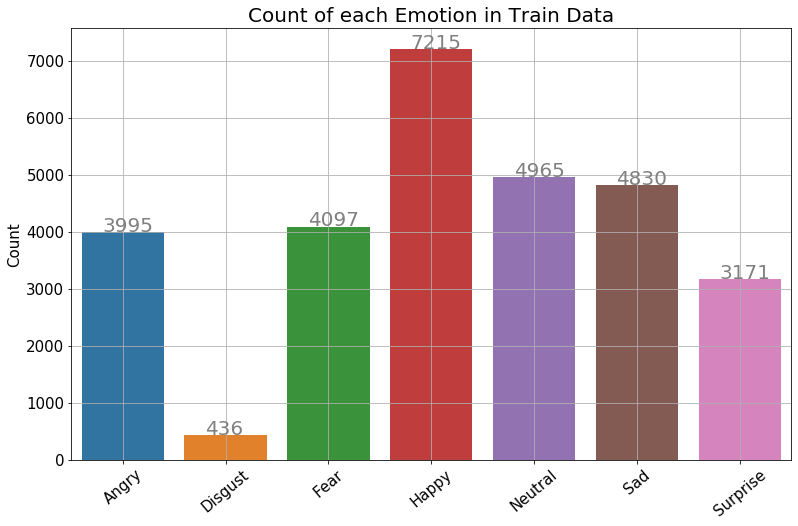

Number of training data points in class Happy = 7215(25.1315%)
Number of training data points in class Neutral = 4965(17.2942%)
Number of training data points in class Sad = 4830(16.824%)
Number of training data points in class Fear = 4097(14.2708%)
Number of training data points in class Angry = 3995(13.9155%)
Number of training data points in class Surprise = 3171(11.0453%)
Number of training data points in class Disgust = 436(1.5187%)
--------------------------------------------------------------------------------


NameError: name 'df_temp_cv' is not defined

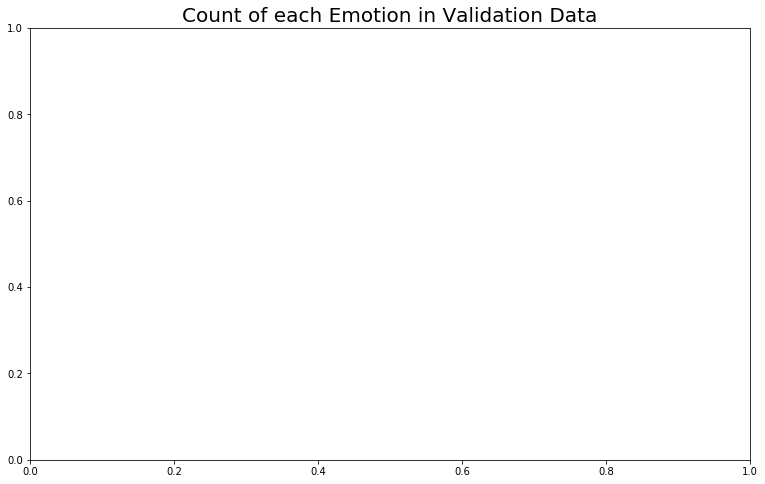

In [69]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_test.shape[0])*100), 4))+"%)")

In [70]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        img = cv2.imread(os.path.join(path1, path2))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1, path2), gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [72]:
#detect the face in image using HAAR cascade then crop it then resize it and finally save it.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
#download this xml file from link: https://github.com/opencv/opencv/tree/master/data/haarcascades.
def face_det_crop_resize(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]  #cropping the face in image
        cv2.imwrite(img_path, cv2.resize(face_clip, (350, 350)))  #resizing image then saving it

In [73]:
Train_Combined = pd.read_pickle("df_human_train.pkl")
# CV_Humans = pd.read_pickle("../Data/Dataframes/Human/df_human_cv.pkl")
# CV_Animated = pd.read_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")
Test_Humans = pd.read_pickle("df_human_test.pkl")
# Test_Animated = pd.read_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")

Train_Combined.shape, Test_Humans.shape

((28709, 4), (3589, 4))

In [75]:
TrainCombined_batch_pointer = 0
#CVHumans_batch_pointer = 0
#CVAnimated_batch_pointer = 0
TestHumans_batch_pointer = 0
#TestAnimated_batch_pointer = 0

In [76]:
TrainCombined_Labels = pd.get_dummies(Train_Combined["Labels"]).as_matrix()
TrainCombined_Labels.shape

C:\Users\Mehrtoos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(28709, 7)

In [77]:
def loadCombinedTrainBatch(batch_size):
    global TrainCombined_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["folderName"]
        path2 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TrainCombined_Labels[TrainCombined_batch_pointer + i]) #appending corresponding labels
        
    TrainCombined_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [78]:
#creating bottleneck features for train data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 38s 1us/step


In [79]:
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"
batch_size = 10
for i in range(int(len(Train_Combined)/batch_size)):
    x, y = loadCombinedTrainBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

KeyError: 'folderName'

In [10]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           #train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           #test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


In [5]:
X_train

[array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32),
 array([151., 150., 147., ..., 193., 183., 184.], dtype=float32),
 array([231., 212., 156., ...,  88., 110., 152.], dtype=float32),
 array([ 24.,  32.,  36., ..., 142., 143., 142.], dtype=float32),
 array([ 4.,  0.,  0., ..., 30., 29., 30.], dtype=float32),
 array([55., 55., 55., ..., 34., 30., 57.], dtype=float32),
 array([ 20.,  17.,  19., ...,  99., 107., 118.], dtype=float32),
 array([ 77.,  78.,  79., ..., 125.,  67.,  68.], dtype=float32),
 array([85., 84., 90., ..., 58., 73., 84.], dtype=float32),
 array([255., 254., 255., ..., 254., 255., 255.], dtype=float32),
 array([ 30.,  24.,  21., ..., 172., 173., 173.], dtype=float32),
 array([39., 75., 78., ..., 84., 83., 87.], dtype=float32),
 array([219., 213., 206., ...,   0.,   0.,   0.], dtype=float32),
 array([148., 144., 130., ..., 112., 111., 111.], dtype=float32),
 array([ 4.,  2., 13., ...,  3.,  7., 12.], dtype=float32),
 array([107., 107., 109., ...,  83.,  84

In [9]:

num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)